In [1]:
from keras.layers import Input, Flatten, Dense
from keras.models import Model

Using TensorFlow backend.
C:\Users\uSer\AnacondaMy\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\uSer\AnacondaMy\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\uSer\AnacondaMy\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\uSer\AnacondaMy\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
input_layer = Input(shape=(28,28))
x = Flatten()(input_layer)
x = Dense(units=200, activation = 'relu')(x)
#x = Dense(units=150, activation = 'relu')(x)
output_layer = Dense(units=10, activation = 'softmax')(x)
model = Model(input_layer, output_layer)

In [3]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


In [4]:
from keras.optimizers import Adam
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [5]:
from keras.datasets import mnist

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
y_train.shape

(60000,)

In [9]:
import numpy as np
from keras.utils import to_categorical

In [10]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [11]:
y_train.shape

(60000, 10)

In [13]:
model.fit(x_train, y_train, batch_size = 32, epochs = 10, shuffle = True)


Epoch 1/10
60000/60000 [==============================] - 7s 111us/step - loss: 4.0833 - accuracy: 0.8935
Epoch 2/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.7141 - accuracy: 0.9383
Epoch 3/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.3366 - accuracy: 0.9441
Epoch 4/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.2448 - accuracy: 0.9535
Epoch 5/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.1857 - accuracy: 0.9592
Epoch 6/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.1649 - accuracy: 0.9633
Epoch 7/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.1475 - accuracy: 0.9658
Epoch 8/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.1291 - accuracy: 0.9707
Epoch 9/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.1272 - accuracy: 0.9727
Epoch 10/10
60000/60000 [===========================

In [14]:
preds = model.predict(x_test) 
print(preds)

[[0.0000000e+00 8.1500578e-25 8.7268097e-17 ... 1.0000000e+00
  5.8965489e-32 1.8943617e-22]
 [6.3463092e-38 5.9718983e-20 1.0000000e+00 ... 0.0000000e+00
  3.3693038e-23 0.0000000e+00]
 [1.0307995e-22 1.0000000e+00 1.2834586e-13 ... 1.6634530e-08
  1.0509757e-11 3.8440674e-11]
 ...
 [0.0000000e+00 4.4170902e-31 7.2973039e-27 ... 1.0432522e-16
  5.1010182e-16 3.4263385e-06]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.1015912e-24 0.0000000e+00]
 [4.4447533e-18 0.0000000e+00 3.7535280e-16 ... 2.4942346e-16
  6.6016737e-19 1.7478403e-21]]


In [15]:
x_test.shape

(10000, 28, 28)

In [38]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 91us/step


[0.26376311328710544, 0.9610999822616577]

In [39]:
import pandas as pd
data = pd.read_csv("train.csv",
                    delimiter=',',
                    decimal='.')


In [50]:
Test_data = pd.read_csv("test.csv",
                    delimiter=',',
                    decimal='.')

In [51]:
X_test = Test_data.to_numpy()
Test_data.size/784

28000.0

In [52]:
X_test[9]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,  68,  86, 163, 228, 255, 254, 176, 156,  73,
        53,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0, 171, 252, 225, 198, 198, 199, 198, 245,
       253, 253, 249, 131,   8,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0, 191, 107,  18,   0,   

In [54]:
def row_to_matrix(row):
    matrix = []
    k = 0
    one_row = []
    for i in range(len(row)):
        one_row.append(row[i])
        k += 1
        if k == 28:
            k = 0
            matrix.append(one_row)
            one_row = []
    return matrix

In [60]:
test_2828 = np.zeros((28000,28,28))

In [63]:

for i in range(28000):
    k = 0
    g = 0
    for j in range(784):
        test_2828[i][k][g] = X_test[i][j]
        g += 1
        if g == 28:
            g = 0
            k += 1


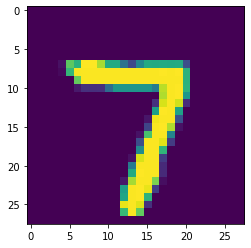

In [65]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
im = ax.imshow(test_2828[510])
plt.show()

In [66]:
preds = model.predict(test_2828) 
preds.shape

(28000, 10)

In [67]:
ans = []
for i in range(28000):
    predL = list(preds[i])
    print(*predL)
    print()
    pr_prop = max(predL)
    p = predL.index(pr_prop)
    ans.append([i+1,p])
    print(*[i+1,p])
a = np.asarray(ans)
np.savetxt("prediction2_Keras.csv", a, delimiter=",")

1.0444544e-16 2.5146632e-10 1.0 5.1727905e-10 2.3900554e-27 5.893898e-16 1.1301902e-17 3.378904e-09 4.717068e-19 1.8935487e-26

1 2
1.0 2.2452407e-27 4.3429192e-17 1.08542706e-16 7.167345e-16 8.5241346e-13 1.9458626e-10 1.5698249e-26 5.534795e-25 8.7043816e-14

2 0
3.7960453e-25 1.6582903e-10 9.174832e-16 1.2187807e-11 0.00014863872 1.378832e-12 2.0859514e-23 2.9971525e-09 4.2547686e-06 0.99984705

3 9
0.9359292 3.0706088e-15 0.00012474717 0.00036912295 1.269568e-10 1.291184e-12 3.0394244e-29 1.5645657e-05 0.01936784 0.044193618

4 0
2.5531305e-31 5.2775037e-13 2.2754408e-08 1.0 2.9353852e-24 1.00305896e-10 1.9432362e-33 1.1956228e-26 5.3257994e-09 2.249421e-15

5 3
4.9305408e-29 7.0163134e-17 5.7521817e-11 0.1572867 1.237179e-08 1.2869936e-14 4.497743e-36 0.84270835 2.2756754e-09 4.944008e-06

6 7
1.0 0.0 3.070264e-18 0.0 0.0 2.824679e-38 2.6591486e-27 0.0 6.590031e-32 9.1298763e-29

7 0
2.4224535e-30 1.6062857e-19 4.6939734e-16 1.0 6.5483023e-26 6.7399387e-22 0.0 1.0646846e-09 4.7085


93 6
6.528085e-23 6.7928283e-29 1.370628e-16 2.706306e-26 1.1206401e-21 2.1402099e-12 1.0 1.9157864e-36 6.020468e-17 2.6391206e-26

94 6
2.8882234e-32 0.9999889 3.2396924e-26 1.1162103e-24 2.6179511e-21 4.4979728e-10 1.0370975e-13 1.3580487e-24 1.1130129e-05 2.0374328e-20

95 1
1.8767014e-15 1.0541921e-09 3.351434e-14 1.766122e-14 0.99999905 4.9941923e-22 8.783595e-21 8.0530907e-07 1.0901981e-16 6.005191e-08

96 4
7.755233e-27 4.9978075e-18 2.2709456e-18 0.99999976 2.5654295e-17 1.2015069e-11 0.0 6.9937824e-09 1.0966736e-14 2.3091242e-07

97 3
9.4181166e-33 8.925752e-16 9.593292e-14 7.247405e-11 0.0013655499 1.572967e-08 7.4642035e-24 1.0346111e-05 1.2338321e-06 0.9986229

98 9
0.0 0.0 1.152279e-17 1.620539e-35 9.0535276e-32 5.3996025e-37 0.0 1.0 0.0 2.537427e-26

99 7
5.861401e-33 2.329183e-19 2.5966412e-16 3.246031e-14 0.9999995 5.206269e-23 2.122348e-26 4.4575282e-07 2.3192893e-18 5.0824775e-11

100 4
1.0 1.1316858e-27 3.2716863e-17 4.383887e-30 1.0553355e-17 3.6194627e-26 9.074476

5.7153776e-16 2.096231e-20 2.6896896e-16 6.6723846e-06 6.5765123e-13 8.511177e-09 3.00416e-32 4.033264e-07 1.6535606e-10 0.99999297

212 9
2.7433064e-28 3.388205e-12 4.6975966e-14 1.0 2.7594443e-16 4.4982963e-18 0.0 3.36936e-09 2.6445128e-18 8.297019e-11

213 3
1.364716e-09 2.7225685e-14 2.8838902e-09 5.661323e-15 7.041182e-08 1.0696375e-07 0.99999976 3.519839e-22 1.0423186e-09 4.587728e-13

214 6
0.0 3.4050612e-20 5.084503e-16 1.0 7.708131e-35 1.5263369e-15 0.0 1.1638733e-13 7.3180804e-09 7.934254e-16

215 3
3.6398895e-21 1.3192717e-06 0.99999857 4.96438e-10 1.7182116e-17 4.121538e-18 1.8171402e-26 1.06625706e-07 1.0464592e-08 5.2488147e-17

216 2
0.0 1.0 7.738534e-28 1.2828308e-30 1.8623126e-14 4.01336e-31 1.733991e-24 3.534798e-17 2.1383134e-30 5.19994e-38

217 1
2.6305631e-14 7.3650744e-24 1.9623634e-13 6.17874e-21 1.2485585e-13 3.7210022e-12 1.0 2.8179438e-14 5.935465e-14 3.1248435e-17

218 6
0.0 3.4408666e-19 4.0793461e-16 1.0 1.0957876e-36 6.992241e-23 0.0 7.8027056e-14 1.665482

1.1320855e-11 1.0726056e-08 1.8992972e-17 4.8622434e-13 1.0802014e-09 8.080525e-14 3.6879646e-22 0.9999254 1.03464244e-14 7.4634685e-05

292 7
0.0 2.2729134e-18 2.3805133e-17 7.4387246e-21 1.4627623e-20 6.4059194e-32 0.0 1.0 5.214159e-24 3.935828e-22

293 7
0.0 7.9981864e-32 4.530681e-14 4.9087987e-09 8.767825e-08 5.8335955e-15 0.0 1.9432216e-10 4.301658e-13 0.9999999

294 9
1.8867153e-22 2.8468732e-16 2.8938295e-12 8.2608364e-07 2.227914e-05 1.5604906e-12 2.1663183e-36 7.564003e-07 5.4413807e-09 0.99997616

295 9
1.4194253e-19 0.0 1.541087e-14 7.9565135e-28 2.674523e-25 1.89612e-13 1.0 9.8990524e-29 6.3492847e-09 1.0853487e-23

296 6
0.0 7.300535e-26 4.231119e-23 1.0 1.2054654e-32 1.9950833e-14 0.0 7.706667e-26 2.5531552e-12 9.892006e-19

297 3
1.0 0.0 5.343228e-13 3.1943335e-27 0.0 7.3099574e-25 4.4839624e-23 7.9851824e-29 1.0586509e-15 8.9668716e-26

298 0
3.8325026e-36 5.038898e-15 9.124747e-09 1.0 1.8498785e-30 3.270618e-29 0.0 5.9151386e-16 5.504575e-19 1.906892e-20

299 3
2.0356

1.1941714e-10 3.0610314e-14 1.551405e-08 9.772619e-08 2.2584812e-09 5.269284e-06 2.5075412e-06 1.10094285e-14 0.99999034 1.7999101e-06

372 8
1.1136541e-06 8.024521e-25 3.1832175e-31 2.3764612e-27 7.743528e-25 4.6576836e-18 4.1273576e-27 0.9999989 1.9918269e-36 4.686517e-12

373 7
1.8515196e-17 1.9216184e-09 7.0024533e-09 7.222008e-05 0.0012968084 3.275907e-08 1.2467977e-18 0.00029371315 8.270133e-08 0.99833715

374 9
0.0 1.1085428e-15 2.5908082e-21 1.7378132e-15 4.489002e-27 2.7498233e-28 0.0 1.0 4.8608257e-28 1.0102956e-14

375 7
2.3729665e-20 0.0 1.0352688e-21 0.0 1.1519652e-20 1.9856805e-17 1.0 1.2481725e-21 2.6536602e-24 5.7415616e-28

376 6
3.3670587e-13 1.5748649e-16 6.542386e-10 0.00043487907 1.4991005e-07 7.2698375e-11 4.8561687e-22 2.723143e-08 4.820588e-13 0.99956495

377 9
0.0 3.0880564e-35 0.0 4.550836e-25 1.0558562e-37 1.0 1.0714291e-21 1.9868247e-32 1.6900702e-20 4.5460562e-21

378 5
3.4179138e-38 1.5903796e-25 3.32702e-13 1.0 1.5360555e-31 3.9989095e-28 0.0 9.830031e-23

464 0
0.0 0.0 0.0 3.7410542e-13 0.0 1.0 1.593439e-34 3.6480389e-37 1.0529956e-16 2.1428285e-23

465 5
7.669493e-15 1.0 1.8020115e-11 4.4234767e-17 3.3124086e-19 1.914117e-25 3.366264e-09 9.528705e-11 4.5186645e-12 1.722215e-08

466 1
0.0 1.6639879e-21 2.8898476e-21 1.2621313e-18 1.2378876e-21 1.9196298e-33 0.0 1.0 3.3710274e-30 1.5105439e-19

467 7
3.2460933e-28 6.1146257e-22 1.420917e-22 2.7399247e-10 0.95548064 2.3737844e-08 1.8387961e-22 1.560775e-14 1.9302412e-08 0.044519294

468 4
2.0006315e-14 1.5525906e-10 2.0043526e-13 7.112406e-17 1.0 6.902167e-22 1.6773787e-20 6.6117636e-09 2.4387419e-17 7.510229e-11

469 4
0.0 1.0 3.518123e-21 3.3795925e-36 2.735555e-26 0.0 1.8932872e-20 3.096737e-21 1.447772e-37 7.1606645e-27

470 1
2.8661726e-17 1.0 1.41309915e-11 5.5867924e-23 3.4085895e-24 1.0938342e-34 7.9084455e-13 3.2976033e-10 3.5652663e-18 1.7266329e-11

471 1
0.0 0.0 0.0 0.0 1.0 1.5407977e-38 0.0 3.699159e-30 0.0 2.811592e-18

472 4
3.7051573e-12 1.049147e-10 4.5524043e-10 2.838193

553 0
2.1955595e-32 0.0 3.7095349e-28 2.5856392e-10 2.0407115e-38 1.0 2.2426362e-29 4.255031e-28 5.959197e-21 1.2513855e-14

554 5
0.99997973 5.009246e-14 1.3312408e-06 6.59838e-06 3.556403e-08 7.847085e-06 4.2320867e-06 3.6708015e-15 2.1134474e-11 2.030497e-07

555 0
1.0 0.0 0.0 0.0 0.0 0.0 5.0259443e-36 0.0 0.0 2.72313e-29

556 0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0

557 7
0.0 0.0 0.0 7.746254e-25 0.0 1.0 0.0 0.0 6.794065e-31 0.0

558 5
3.1044795e-24 0.0 3.2205745e-22 0.0 1.3134537e-21 1.00077745e-17 1.0 1.0389045e-36 1.6537204e-25 5.1762065e-32

559 6
5.0663525e-27 7.812227e-24 1.0 2.7533662e-09 1.0364896e-29 9.451307e-26 0.0 1.9134672e-25 1.31288125e-23 5.3937886e-25

560 2
0.97329956 1.7346496e-05 0.004086485 0.0019718932 6.8585396e-05 0.010158431 0.009323896 3.1908387e-06 0.00057727157 0.0004933714

561 0
0.0 2.786497e-20 1.4782846e-19 1.0 3.0788164e-24 1.3931964e-14 0.0 4.394469e-30 5.9350407e-12 6.0456323e-10

562 3
7.4765896e-36 1.0741213e-22 7.537924e-23 6.375812e-13 1.527

6.685479e-20 3.7263765e-17 6.705833e-21 6.110294e-22 1.0 7.8275415e-21 1.0314333e-21 1.8426088e-09 2.5516286e-14 1.9085558e-08

708 4
1.0062522e-12 1.4184944e-26 2.7037298e-12 2.7112042e-18 1.1065654e-15 6.7394716e-08 0.9999999 1.0970431e-27 1.2851457e-14 1.6333593e-22

709 6
2.8689546e-37 2.1147938e-25 0.0 2.5834467e-13 1.1058611e-37 1.0 2.7090481e-15 4.9505956e-27 2.1532448e-14 9.550095e-20

710 5
1.2524405e-16 0.99995875 6.4680745e-09 8.272443e-06 2.6615482e-10 3.3019947e-05 4.769327e-11 2.280255e-09 4.526915e-08 2.0911313e-09

711 1
2.9684612e-14 1.4118631e-14 5.115552e-09 3.4064787e-08 6.485564e-16 1.293543e-12 1.2595189e-08 6.656075e-24 1.0 1.420185e-13

712 8
2.580898e-26 1.0 7.2682674e-20 2.6486192e-20 1.3541354e-27 1.0500631e-24 1.2458238e-19 1.8475919e-13 4.3830342e-15 1.5440672e-18

713 1
0.0 0.0 0.0 6.5532137e-22 0.0 1.0 2.6955975e-36 0.0 3.0482946e-22 1.7193405e-26

714 5
0.0 1.1778065e-16 3.5712462e-23 0.9999809 2.1025637e-13 9.4046794e-07 0.0 2.7661158e-16 7.136661e-06 1

4.836518e-22 1.0 1.994964e-19 6.6262887e-22 6.721006e-25 5.937799e-21 2.4370705e-15 1.4960935e-14 1.6138737e-12 4.184199e-17

797 1
6.3292196e-22 5.3760763e-27 1.5361149e-15 7.391088e-22 3.7550526e-20 2.7042861e-09 1.0 1.5301573e-35 2.9836473e-09 1.1905064e-20

798 6
4.740994e-35 5.456862e-16 4.5194713e-13 3.6128546e-07 3.6003796e-05 2.7389235e-10 2.728768e-31 1.1742294e-07 1.1803804e-10 0.9999635

799 9
1.09914915e-07 9.363774e-05 3.543802e-07 0.00012114562 0.0009248935 6.651559e-07 6.815617e-11 0.017776899 2.1593298e-05 0.98106074

800 9
8.6096105e-35 1.0 2.4919805e-16 1.5305476e-36 2.2266885e-35 0.0 1.4252315e-18 1.00388735e-22 6.6670425e-27 6.4668394e-23

801 1
9.8976176e-29 1.0 2.6048586e-15 2.327626e-22 3.8367478e-12 1.4124919e-31 1.4744601e-12 5.4985635e-15 4.291837e-22 4.8740546e-17

802 1
0.0 8.3245634e-20 4.357042e-24 1.0 9.653443e-38 3.035887e-16 0.0 1.3735897e-32 1.1857356e-17 1.9535192e-14

803 3
0.0 1.2516493e-27 2.828196e-14 1.0 1.2553749e-26 6.759115e-31 0.0 4.2482386e-

1.791191e-10 1.0452283e-11 0.9992736 4.1790602e-07 2.4130508e-15 4.184745e-12 5.1956394e-11 5.3410865e-10 0.00072591135 1.4498991e-12

869 2
0.0 2.9547559e-15 2.1908115e-21 1.0 1.04441484e-23 2.7756247e-19 0.0 8.751061e-21 7.669657e-18 2.2095903e-14

870 3
5.47313e-10 2.0940128e-30 1.1194072e-25 5.661934e-28 0.9999999 6.227342e-21 1.6173321e-07 1.6901307e-17 2.5448714e-26 1.587769e-11

871 4
0.0 0.0 0.0 2.0411227e-32 0.0 1.0 3.623337e-15 0.0 5.833607e-19 1.0709706e-30

872 5
2.1128256e-33 1.0286635e-35 1.3986537e-30 1.23699684e-26 0.9999999 6.7785834e-16 3.7583416e-31 2.8671344e-17 7.070621e-14 1.00228775e-07

873 4
7.2480786e-09 1.6575849e-14 0.9999976 2.985855e-09 8.869107e-20 4.2601402e-19 7.645719e-13 1.1420407e-17 2.4213318e-06 4.2036897e-18

874 2
6.897266e-08 0.00010506023 0.0031039317 0.8151492 8.0297435e-11 0.10846858 4.246039e-09 1.5924653e-09 0.050802533 0.022370676

875 3
8.874907e-15 1.2959191e-12 5.2311606e-07 0.9914124 1.330601e-13 4.4654602e-08 6.8021027e-32 2.1354232e-

8.896318e-25 3.283204e-16 3.272404e-14 2.3849924e-12 6.9037455e-08 1.7238508e-06 1.9695262e-13 6.0702684e-14 0.9999927 5.494481e-06

969 8
0.0 0.0 0.0 5.5403616e-21 0.0 1.0 1.758388e-27 0.0 5.1956783e-30 1.479633e-19

970 5
0.0 1.244215e-32 2.1059287e-34 1.0 0.0 6.601499e-11 0.0 1.4298221e-18 4.663419e-23 1.2921421e-16

971 3
5.5279115e-19 3.3466526e-14 1.0 8.4947896e-13 2.7869998e-33 8.7653444e-17 4.822531e-16 2.2583767e-14 5.276635e-14 4.5437884e-27

972 2
1.2374768e-21 7.667275e-36 3.5368276e-21 1.1781891e-15 1.5175632e-09 8.5727784e-19 0.0 3.5881883e-18 6.759624e-33 1.0

973 9
1.1963536e-17 1.0904939e-32 2.5038725e-16 3.86755e-26 9.018777e-18 1.0576706e-14 1.0 2.7693035e-09 3.8537513e-18 1.5614981e-20

974 6
2.064352e-28 1.5148078e-12 3.0098012e-25 3.2130744e-16 2.0069699e-20 2.4415076e-16 2.996124e-32 1.0 1.3047614e-18 7.293711e-12

975 7
1.0 0.0 4.0431774e-28 0.0 0.0 1.3753531e-37 0.0 0.0 3.6932943e-37 0.0

976 0
7.1097906e-20 4.637332e-12 2.0491772e-10 2.3447522e-09 4.1998122e-2

1115 0
2.6319396e-18 9.428896e-11 2.6182746e-15 0.0017960382 5.45961e-14 0.99820364 2.1391127e-09 6.126031e-10 2.77666e-07 9.888691e-08

1116 5
7.623251e-10 3.4170802e-15 1.0 1.4899873e-11 1.7578017e-15 1.6026994e-11 1.3323053e-08 3.9554188e-10 6.604022e-10 8.124451e-17

1117 2
1.2223715e-16 6.49052e-20 1.6091322e-09 2.5011999e-14 5.497604e-19 4.6927935e-06 0.99999535 1.8716089e-25 3.3571435e-09 6.632739e-20

1118 6
1.9948854e-21 1.7731442e-21 7.1794154e-11 2.0528037e-17 0.99999595 8.269079e-20 1.1936456e-17 3.996902e-06 1.1192756e-16 1.895328e-09

1119 4
9.430422e-24 9.292153e-13 1.6031439e-12 2.9322385e-09 0.06085207 2.6822033e-07 1.7286918e-18 1.6865164e-06 2.319927e-06 0.9391437

1120 9
6.8067375e-12 3.3231714e-12 1.9936426e-09 5.2146685e-08 3.6375306e-12 1.11516325e-08 7.13684e-09 1.05489154e-19 0.9999999 3.3086835e-11

1121 8
0.0 0.0 0.0 0.0 0.0 1.0 6.570708e-23 0.0 5.31686e-23 4.957313e-31

1122 5
1.132066e-12 3.8484e-13 3.9372167e-15 7.6672205e-17 0.99999833 1.3535097e-10 4.696


1209 4
1.0 1.1989282e-28 4.4895525e-11 7.7313697e-19 4.4394523e-13 4.497752e-16 7.189805e-11 7.920906e-19 5.2129897e-15 1.324233e-09

1210 0
1.3330649e-07 4.173231e-16 4.3187018e-07 6.4355327e-15 0.99999917 1.5072156e-19 8.505062e-09 2.9352793e-07 1.1802708e-15 1.1641088e-11

1211 4
9.641116e-25 1.6640827e-07 3.6035042e-16 1.1278167e-05 4.463056e-11 5.0119106e-12 5.645869e-22 0.99998593 1.745972e-11 2.6260302e-06

1212 7
4.7962622e-29 3.8645508e-13 4.1533426e-19 3.45912e-11 1.0679789e-09 2.3262428e-05 1.4712362e-10 3.2598717e-19 0.99997675 2.895913e-08

1213 8
0.0 0.0 1.5414508e-30 1.4965286e-31 1.0 7.883609e-21 0.0 5.1685403e-21 3.2067355e-21 5.5093425e-12

1214 4
1.1116417e-29 1.4355769e-08 8.0382336e-20 9.580993e-19 3.697759e-29 0.97606635 0.02393367 2.142041e-38 2.2127823e-12 9.83777e-18

1215 5
4.0811517e-23 6.6115116e-31 2.8263488e-23 2.946127e-12 1.9967955e-07 4.62167e-18 7.941923e-36 3.7569337e-10 4.4075223e-18 0.99999976

1216 9
4.510999e-11 1.59045e-15 4.3097224e-08 2.561418

1.0 0.0 2.5712048e-14 2.5820278e-28 5.081154e-29 2.9517252e-30 8.859106e-38 1.8457464e-24 6.70753e-26 1.6363377e-18

1277 0
4.3715413e-17 8.098381e-06 0.99998474 2.526625e-06 2.0308278e-21 1.9415103e-10 9.806345e-11 9.063603e-09 4.657104e-06 4.3032558e-18

1278 2
1.4749894e-13 2.912811e-09 5.693144e-11 9.58818e-08 3.1883184e-07 0.0001390693 1.5757304e-18 0.99980253 1.0090743e-09 5.803567e-05

1279 7
2.1700046e-17 3.4293105e-25 1.0183682e-11 2.2338036e-17 1.2689407e-21 7.947893e-06 0.999992 2.435178e-34 6.6657015e-13 6.9459696e-26

1280 6
1.29597e-13 0.9999621 2.9806473e-11 3.073919e-12 3.4231307e-06 2.889034e-20 1.3693639e-08 4.652373e-06 4.1638085e-11 2.9842631e-05

1281 1
0.0 0.0 3.535186e-23 4.2969774e-28 0.99840134 3.0936456e-09 1.3683761e-28 2.5898228e-16 8.40318e-09 0.00159871

1282 4
0.0 8.0488426e-17 5.381452e-27 2.0679097e-25 6.481706e-16 1.0800365e-32 7.636269e-38 1.0 3.8622568e-26 5.243215e-11

1283 7
1.0 9.6275826e-32 4.714939e-14 6.0625136e-14 2.2447373e-14 8.13334e-12 1.3

2.7784695e-36 1.7708713e-07 0.9999993 3.1946515e-10 8.355086e-23 3.728274e-27 3.4699224e-30 1.584141e-11 5.941712e-07 7.832285e-21

1358 2
3.374773e-29 0.9999999 1.2814251e-18 4.356769e-12 2.9658405e-14 7.0598525e-18 1.1591464e-19 8.6534875e-08 2.005912e-10 2.8767264e-13

1359 1
0.0 0.0 0.0 1.1447127e-32 0.0 1.0 0.0 0.0 2.8268124e-31 0.0

1360 5
7.039944e-21 6.2271356e-12 2.5392792e-17 1.0829458e-05 0.00064396404 8.082662e-09 2.2752802e-20 1.0769514e-09 7.879849e-07 0.9993444

1361 9
6.3153385e-20 1.6566266e-13 9.036588e-14 2.9943227e-12 9.9222334e-14 7.916336e-11 3.2101523e-06 2.4610343e-23 0.9999968 6.532535e-12

1362 8
0.0 4.189812e-14 2.477983e-13 2.8048425e-11 5.6500565e-17 3.5882174e-32 3.8910694e-31 1.0 1.093813e-27 8.0584956e-23

1363 7
3.195289e-24 1.7266569e-10 1.1062206e-13 1.0 7.892114e-16 2.1251998e-12 0.0 1.4388231e-10 2.0779456e-09 1.9483593e-09

1364 3
2.3696467e-35 1.2378061e-23 2.037256e-25 3.144219e-14 6.092066e-16 4.225064e-11 5.5394373e-19 7.872343e-35 1.0 1.062612

0.0 9.307265e-18 2.8174929e-21 1.0 9.638992e-21 5.0170524e-15 0.0 2.7778716e-18 1.9460015e-12 1.8573108e-14

1492 3
1.1495959e-35 2.397297e-21 8.955541e-24 1.8825183e-17 4.9270132e-12 2.7596827e-06 2.5749498e-12 6.973093e-24 0.99999726 6.574992e-11

1493 8
7.911623e-21 1.3753389e-19 2.6511517e-15 4.1945424e-07 1.15136976e-08 2.1259286e-12 8.2300613e-26 8.965098e-09 2.6625973e-09 0.9999995

1494 9
0.16419855 1.236767e-05 7.800973e-08 0.5046099 7.1526065e-09 0.22211911 0.005914745 5.5823786e-09 0.10282145 0.00032387418

1495 3
1.0 0.0 0.0 0.0 0.0 0.0 2.0743347e-31 0.0 0.0 7.4699015e-33

1496 0
7.865897e-18 1.9481512e-09 8.702336e-11 1.0733619e-10 9.485224e-18 1.2082331e-12 4.994618e-10 2.7551263e-20 1.0 2.4777908e-12

1497 8
2.692849e-09 1.3444105e-15 5.4847957e-09 1.8548366e-25 7.0491736e-17 2.610953e-18 1.0 0.0 3.8315527e-21 5.0766075e-19

1498 6
0.999764 4.16715e-13 2.3529667e-08 1.1071834e-06 5.884665e-17 0.00023473123 1.1251548e-07 1.5362778e-10 8.649231e-09 2.829849e-10

1499 0
1.4

3.8068646e-09 2.511266e-06 2.925005e-07 1.0095359e-05 3.3717595e-07 4.932721e-05 1.1693979e-09 9.099257e-14 0.99993455 2.8181712e-06

1567 8
9.706079e-13 6.764589e-08 1.0978974e-09 1.2803941e-08 0.032862604 1.2486755e-10 3.0164318e-16 9.7984164e-05 3.431714e-05 0.967005

1568 9
1.929723e-23 6.4636664e-12 4.065743e-12 4.6086516e-06 3.9571155e-06 1.6174855e-11 3.3694337e-25 5.2036535e-06 1.3060166e-09 0.9999862

1569 9
7.64692e-12 2.6039631e-23 4.0087027e-11 6.004363e-18 3.0467052e-12 4.3951748e-10 0.99999976 2.1738519e-07 5.8041597e-12 8.6463985e-14

1570 6
1.3113498e-33 5.6251797e-18 5.671444e-24 0.99999 2.021922e-17 3.226914e-06 0.0 5.80599e-14 2.8219227e-10 6.7812407e-06

1571 3
1.0 0.0 2.3444755e-31 0.0 0.0 0.0 5.4736692e-34 0.0 0.0 4.219413e-25

1572 0
8.021507e-38 6.2736505e-20 4.7966396e-25 5.222683e-15 6.0618105e-17 4.3738757e-10 9.9026405e-14 2.4049488e-31 1.0 3.079866e-14

1573 8
3.9363826e-30 4.1324104e-16 1.1483615e-15 5.024347e-16 7.2851167e-20 1.6465641e-24 1.0322161e-37 1

0.0 0.0 0.0 3.3494705e-28 0.0 1.0 1.27884675e-33 0.0 3.7761936e-22 2.2803615e-21

1692 5
2.892661e-13 2.5066198e-20 1.8425823e-11 6.037415e-18 1.7505507e-12 1.6143226e-09 1.0 1.4241087e-15 3.6004502e-12 1.4095968e-15

1693 6
2.9708465e-15 2.4717896e-11 1.0113117e-08 3.32609e-05 1.8677744e-14 0.99995685 2.9159361e-08 8.328818e-18 9.7720595e-06 9.0072604e-08

1694 5
2.7867516e-19 0.99999917 1.2511064e-12 3.0867635e-09 5.591184e-14 3.525706e-09 2.5999621e-15 3.3584497e-09 8.7723396e-07 2.9102068e-13

1695 1
0.0 5.8785814e-32 1.0764525e-12 9.453246e-20 3.2427272e-22 1.7908856e-30 7.1118232e-28 1.0 0.0 2.7083598e-27

1696 7
1.130553e-31 0.0 1.7126471e-30 1.6524527e-33 1.0 7.260209e-26 6.327454e-38 9.5848035e-20 1.4067594e-24 1.1076721e-15

1697 4
0.0 2.297433e-27 0.0 1.3969614e-33 0.0 1.0 2.7253518e-38 0.0 3.9544773e-28 9.077431e-38

1698 5
2.3325294e-24 3.3756236e-28 8.145484e-18 6.061394e-09 2.6343097e-05 1.2574482e-06 7.473229e-34 3.899535e-10 3.2974265e-06 0.9999691

1699 9
4.9727383e-0

1771 3
2.608356e-17 4.7577083e-20 1.0 3.1583167e-16 8.336009e-26 9.2899055e-21 9.7602945e-18 7.1420335e-19 1.5087037e-23 2.8807475e-27

1772 2
7.846193e-20 2.0818808e-15 0.99999917 4.9365214e-09 3.4859862e-24 2.1332066e-12 2.8671462e-15 8.3015885e-07 1.12571775e-11 1.9786517e-27

1773 2
0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 6.84551e-35 0.0

1774 5
3.9906501e-19 2.2104892e-08 4.222934e-11 0.99993443 3.876853e-11 5.3322063e-10 3.7009618e-38 6.538533e-05 5.904835e-11 1.2275572e-07

1775 3
1.6659684e-13 4.6780313e-09 5.3872117e-07 1.5623747e-06 5.835778e-17 4.898513e-10 7.0455195e-07 8.387306e-19 0.99999714 9.822332e-13

1776 8
2.498152e-29 1.0536963e-14 1.6693628e-19 1.5870631e-20 1.78266e-07 3.1974414e-06 1.887783e-15 1.3615888e-21 0.99999666 2.540003e-12

1777 8
0.0 3.0228763e-30 1.0 1.7448566e-35 0.0 0.0 0.0 0.0 8.769064e-38 0.0

1778 2
1.9728676e-32 4.862142e-13 2.3693298e-13 1.2831104e-14 3.2407923e-18 5.3541553e-20 1.6504652e-29 1.0 1.701583e-15 1.0428317e-13

1779 7
4.6116223e-30 0.0 4.8

1891 9
1.2583521e-28 4.2383267e-08 3.9899535e-20 2.9147202e-18 4.6200756e-12 1.04488796e-19 1.7252652e-29 0.9999969 1.7978296e-13 3.1335892e-06

1892 7
6.078466e-15 6.3453007e-28 1.8233096e-10 2.0598875e-17 2.4520535e-17 3.9856776e-08 1.0 1.1933086e-10 6.318376e-11 1.3661237e-15

1893 6
0.0 2.1603479e-34 2.8510215e-35 1.9052338e-13 0.0 1.0 0.0 0.0 1.0762008e-22 7.439916e-21

1894 5
1.0 3.0013406e-32 1.5781222e-08 7.3482154e-22 2.8359796e-18 1.2065573e-22 4.1552204e-16 2.9631942e-18 6.8105425e-16 1.4189268e-12

1895 0
1.370183e-12 2.6574057e-10 4.240863e-07 1.3066482e-11 9.8577244e-11 3.3950898e-10 0.9999995 9.10933e-14 5.9019376e-09 1.8741643e-13

1896 6
9.0418385e-18 0.9995784 8.876098e-09 3.8102097e-08 0.0004185767 4.6693184e-16 1.1593994e-06 1.8150099e-06 2.4663942e-08 1.37469714e-11

1897 1
1.3967997e-28 3.1879117e-16 1.7693438e-10 1.0 0.0 1.1285051e-18 0.0 3.6501944e-38 1.7421493e-28 1.2455016e-10

1898 3
1.062877e-27 4.2576254e-22 3.7410228e-22 3.783253e-25 3.4843964e-15 1.067779

5.312672e-08 4.5429363e-20 2.5223286e-14 9.916954e-16 0.9999958 1.7318385e-13 7.1141926e-10 2.1581876e-09 2.5771448e-14 4.1766943e-06

2023 4
4.8251047e-17 0.0 2.1185527e-21 2.329149e-26 1.9700504e-29 2.892284e-14 1.0 0.0 9.528245e-16 4.105024e-24

2024 6
3.365393e-34 1.7168719e-16 1.0 1.4837866e-20 0.0 0.0 0.0 6.726866e-29 3.8971974e-27 0.0

2025 2
2.624509e-14 1.2745542e-36 1.2942443e-15 1.0965676e-32 8.14044e-14 5.8496498e-12 1.0 4.732679e-18 5.641746e-16 3.6217545e-19

2026 6
0.0 3.0028178e-17 3.4212584e-20 7.195851e-12 4.820997e-34 8.051295e-33 0.0 1.0 6.5748413e-24 3.444064e-23

2027 7
3.87691e-36 3.746184e-19 1.0279714e-16 1.0 7.346612e-16 1.6302928e-12 0.0 3.529939e-14 3.7398383e-11 2.46004e-10

2028 3
2.4680395e-36 4.2868395e-14 1.0 4.1207417e-18 0.0 1.1154626e-28 1.5051699e-21 1.2295119e-34 1.7117834e-13 0.0

2029 2
9.017048e-30 7.6694196e-29 5.2504152e-23 4.3474824e-10 1.7799655e-05 2.661611e-10 0.0 7.194519e-11 3.3441433e-10 0.99998224

2030 9
5.221974e-15 2.8757956e-11 7.0

2131 2
0.0 0.0 0.0 0.0 1.0 1.2201494e-25 0.0 1.2492035e-25 1.8028705e-19 1.2529726e-12

2132 4
4.852723e-38 0.0 2.5504709e-25 8.7923255e-27 1.0 1.41875e-17 1.2649427e-31 5.1737113e-20 5.153642e-19 5.5077567e-08

2133 4
4.46164e-16 7.2567997e-07 7.8374034e-19 9.906209e-09 3.806234e-12 0.9999993 6.6517853e-15 7.3378516e-13 7.151781e-10 8.01069e-12

2134 5
1.4607092e-33 1.6093296e-06 6.855522e-12 5.44788e-12 3.6894134e-12 4.73806e-23 2.5050791e-33 0.99999833 1.5665813e-13 7.5820705e-10

2135 7
3.0591143e-16 6.655093e-29 1.3403562e-13 9.877511e-22 5.210718e-17 1.1672492e-11 1.0 8.239262e-09 4.823545e-15 4.063004e-18

2136 6
4.8050847e-20 4.614161e-09 3.1457123e-14 2.285901e-09 2.4418782e-06 0.00040172364 8.543338e-06 7.944623e-13 0.999567 2.0287029e-05

2137 8
0.0 1.0 3.8196986e-23 3.2029472e-35 8.634276e-28 5.0972295e-36 3.4715174e-28 2.4641009e-26 1.3795898e-35 7.86016e-35

2138 1
4.7181846e-20 1.8741357e-23 2.6820462e-16 1.7462516e-14 0.99993205 8.9048946e-10 6.4650074e-19 2.1256077e-11

1.0 9.905487e-34 2.3393098e-14 5.4621494e-21 1.7538121e-20 1.8788698e-19 5.2760415e-14 1.7770148e-32 1.7243023e-23 1.6838748e-18

2211 0
5.0165595e-13 0.0 0.0 0.0 1.0 0.0 2.5069717e-14 3.3067601e-37 0.0 9.666363e-11

2212 4
1.8642344e-26 7.9198334e-15 2.3145545e-09 0.9999999 7.879757e-29 3.118876e-10 1.5285337e-37 9.055243e-27 5.447917e-13 1.15286284e-07

2213 3
8.717631e-31 1.0 4.969901e-25 2.5459755e-21 2.7651367e-22 2.0268154e-13 9.699426e-25 9.101339e-19 8.155259e-12 1.8772282e-20

2214 1
0.0 1.1310197e-22 1.0 3.1444124e-28 0.0 0.0 0.0 0.0 2.0330182e-24 0.0

2215 2
3.7385374e-16 2.9008877e-24 1.2219309e-10 1.7618523e-12 2.7639842e-24 3.8285736e-05 0.99996173 1.6993418e-26 2.2783945e-11 4.0740954e-28

2216 6
1.7389643e-21 1.869976e-13 4.6438237e-17 5.2113388e-18 1.562469e-08 1.7348233e-21 9.6593235e-36 0.9998908 8.642777e-16 0.00010914516

2217 7
4.0010212e-25 1.776193e-19 1.2726244e-15 1.0 5.3993088e-24 3.286546e-10 0.0 5.837668e-12 1.9666295e-11 8.311825e-12

2218 3
2.3106814e-17 

1.2657846e-09 3.0413372e-22 4.0062172e-12 1.931931e-22 1.0 7.49893e-20 4.2762368e-19 2.6635376e-17 1.314418e-18 3.4149503e-11

2371 4
8.754598e-14 9.009926e-21 1.0 1.3859926e-14 2.5957988e-25 3.001984e-23 2.4716454e-23 4.5673986e-15 3.4638002e-16 9.6394396e-27

2372 2
6.418179e-38 0.0 0.0 0.0 1.0 0.0 0.0 1.6905095e-34 0.0 3.4209894e-17

2373 4
7.6165355e-17 4.9363786e-14 0.99995375 1.8367315e-08 3.39302e-24 1.7293129e-17 2.8302559e-14 4.6225192e-05 3.7276703e-31 2.3558165e-30

2374 2
0.0 1.0 1.2372317e-28 4.6008182e-29 1.6526829e-29 3.8583027e-30 1.5803357e-31 1.1255046e-25 5.7368243e-31 0.0

2375 1
3.0367493e-20 1.0 1.1428868e-13 5.330327e-22 3.989953e-34 8.112319e-30 3.9921167e-18 3.581145e-11 1.1255512e-11 8.082955e-12

2376 1
1.9231838e-19 1.0923745e-27 1.07133074e-14 2.0021416e-23 2.423842e-21 3.1293423e-16 1.0 5.455468e-35 4.8065393e-14 3.3819216e-24

2377 6
0.0 3.1244764e-23 1.44963e-28 4.8646417e-30 7.0649e-23 0.0 0.0 1.0 1.4570736e-31 5.4930746e-21

2378 7
1.2573546e-18 2.4135

2442 5
1.9050803e-20 1.14941485e-11 5.100962e-13 1.7582478e-06 1.4737868e-05 7.495037e-12 7.841182e-24 1.47531955e-05 2.530597e-10 0.99996877

2443 9
8.69103e-22 1.0509965e-07 0.9999987 1.5463721e-08 9.935862e-19 8.0202665e-17 4.557223e-25 6.236302e-12 1.2119395e-06 2.1878253e-15

2444 2
2.4688385e-22 8.5662036e-20 1.0 2.0596867e-10 1.9633153e-27 2.175312e-15 7.283035e-27 2.1951293e-20 1.4306904e-17 5.4968937e-27

2445 2
2.9094525e-33 6.265662e-35 1.7506798e-17 1.0 0.0 2.5721443e-12 0.0 1.322523e-37 5.709595e-25 3.4169926e-28

2446 3
9.766296e-32 3.3064111e-12 1.02187405e-20 1.0 7.775698e-21 9.543014e-12 0.0 2.986377e-11 2.663886e-15 3.6735187e-10

2447 3
0.0 2.184532e-32 4.5230627e-38 0.0 1.0 3.7104697e-35 0.0 3.9050006e-17 4.584462e-26 2.9860933e-18

2448 4
3.0813834e-28 0.0 1.6512078e-22 1.4154061e-29 1.0 1.4218024e-29 1.6965897e-33 3.5389364e-19 0.0 1.8701778e-08

2449 4
1.1955419e-24 1.0 1.0627141e-21 4.0378434e-21 6.1112966e-22 1.8662007e-16 5.1237182e-23 3.079284e-18 1.8336999e-

1.3202362e-27 0.0 0.0 9.90594e-34 0.0 1.0 5.252194e-37 2.924003e-35 7.5644228e-31 4.897776e-19

2562 5
0.0 4.7587042e-21 8.538212e-20 1.5583589e-09 4.1524655e-15 5.108615e-37 0.0 1.0 5.6263906e-27 1.9643662e-25

2563 7
1.4343145e-23 1.0 1.9718133e-18 1.1494517e-17 7.353291e-22 9.55823e-26 6.723425e-15 3.4022882e-13 1.1360792e-14 4.3524436e-15

2564 1
0.0 0.0 6.022206e-27 1.0 0.0 0.0 0.0 1.7777548e-31 0.0 0.0

2565 3
4.6013333e-19 9.627646e-34 2.3912452e-16 0.0 2.528457e-21 1.3929268e-12 1.0 2.5630801e-19 4.2439713e-15 1.1035164e-25

2566 6
1.0 0.0 0.0 0.0 4.8396317e-24 4.0399286e-26 3.7843903e-19 1.6133876e-38 0.0 4.466716e-17

2567 0
4.9184237e-20 2.1773034e-23 3.596732e-14 2.433995e-07 1.7108097e-10 6.5160496e-13 7.366011e-36 3.073668e-14 6.3175984e-20 0.99999976

2568 9
3.758063e-26 6.8782524e-20 2.0402405e-11 8.046589e-08 0.006231865 6.2938903e-09 4.0897435e-28 1.2755849e-06 1.7277869e-09 0.9937668

2569 9
1.12619206e-32 1.8500477e-30 3.9042983e-18 1.993371e-37 1.0 5.5889385e-18 3.

7.044402e-31 0.9999976 3.9895354e-10 1.426604e-11 8.9289694e-17 5.5814977e-30 5.4685066e-17 2.404451e-06 4.4280775e-16 4.863009e-18

2651 1
1.0 2.753951e-34 9.742915e-12 1.4314332e-24 9.549284e-22 7.338628e-24 1.7949806e-17 3.7959908e-24 1.2297323e-19 1.6207641e-17

2652 0
0.0 1.0 0.0 2.7019006e-34 2.7548215e-35 7.8039125e-25 0.0 1.3178477e-32 0.0 0.0

2653 1
1.0501839e-23 7.008499e-17 7.42631e-20 8.1410825e-09 0.022331486 1.5975601e-07 3.0693612e-19 3.052402e-11 1.8632014e-06 0.97766644

2654 9
1.0 0.0 0.0 0.0 0.0 0.0 5.3680715e-24 0.0 0.0 1.1124653e-23

2655 0
1.2630333e-31 3.9155263e-12 7.5094796e-16 2.7938058e-15 7.939314e-15 2.9216906e-23 0.0 1.0 1.6678733e-18 7.796878e-13

2656 7
2.2539136e-35 2.2614402e-28 5.46996e-22 4.1511963e-29 0.99927443 7.150352e-16 1.7549131e-29 5.8594454e-13 1.3511013e-10 0.0007255853

2657 4
0.0 1.2629674e-18 6.347978e-13 8.262584e-10 0.00019978093 6.859317e-08 4.6493713e-34 4.722463e-11 1.11068155e-10 0.99980015

2658 9
1.0 1.2111425e-27 7.831669e-12 3

1.0043644e-18 0.0 6.46743e-16 1.2239434e-26 2.5573067e-20 5.025083e-13 1.0 2.229787e-16 7.353064e-15 7.7580733e-20

2731 6
4.724209e-25 4.239857e-12 5.928504e-10 1.2964341e-09 0.22645673 4.9465637e-08 2.1921282e-05 8.957779e-06 0.7734106 0.000101686746

2732 8
2.7318293e-17 4.8794625e-23 2.7169084e-15 1.645725e-10 1.8708398e-06 4.6567476e-14 5.2749747e-29 1.410481e-12 8.031259e-23 0.9999981

2733 9
1.3862671e-06 2.9151538e-08 5.154339e-07 6.21044e-05 0.0048086494 3.6200137e-07 2.9126443e-10 9.1086324e-05 2.2715392e-06 0.9950336

2734 9
3.7930856e-21 0.9999957 3.9183487e-12 2.4158314e-11 2.8573554e-06 2.4145465e-22 1.3110032e-09 1.4697245e-06 5.207698e-12 2.2892402e-11

2735 1
0.0 0.0 4.297262e-21 0.0 8.203251e-37 3.982432e-31 1.0 1.7828673e-25 4.027567e-36 4.1817494e-36

2736 6
0.0 5.27246e-22 7.2650394e-20 6.729057e-08 9.256214e-06 5.0888205e-09 0.0 5.860278e-10 4.3634006e-11 0.9999907

2737 9
2.750914e-28 3.674662e-13 1.091109e-18 5.258174e-12 4.7074875e-11 3.938563e-06 2.960349e-09 

0.0 1.4491663e-12 1.1092786e-23 3.8414626e-20 7.302733e-19 7.994641e-34 0.0 1.0 1.0768107e-18 2.6641528e-13

2851 7
0.00021214435 4.4043747e-07 0.0016105389 1.4798097e-05 0.9972113 3.2964223e-07 0.0002493707 0.00062653684 2.6907847e-07 7.425855e-05

2852 4
0.0 7.7431736e-27 3.2150573e-18 6.8057485e-13 1.816477e-34 7.558306e-24 0.0 1.0 3.2156167e-36 2.4863447e-20

2853 7
4.8250753e-29 1.0 1.586667e-15 1.6014902e-25 1.5363508e-13 1.0069495e-34 2.4216996e-12 2.734934e-15 5.976099e-25 1.8729465e-17

2854 1
1.0 1.2566405e-25 1.05288255e-17 2.7065647e-18 2.818173e-19 4.920012e-12 2.0258997e-09 4.1844324e-20 1.5264346e-24 1.3505377e-15

2855 0
4.9145662e-18 0.0 8.014908e-21 9.739372e-37 3.1864374e-18 2.983551e-20 1.0 3.942679e-15 1.4528849e-21 6.322987e-24

2856 6
3.3417773e-34 6.001239e-29 6.722447e-31 2.157625e-31 1.0 5.609968e-29 0.0 6.4327155e-15 2.2409082e-22 2.3322127e-14

2857 4
1.2774156e-22 0.0 2.0776602e-24 0.0 0.0 8.345754e-24 1.0 0.0 1.4409271e-17 2.2910524e-35

2858 6
0.0 0.0 0.0

2.5836082e-25 1.0 3.4939398e-15 1.728056e-30 7.717303e-22 0.0 1.7910387e-12 1.1625516e-12 1.1873537e-21 8.9408017e-13

2931 1
0.0 5.914111e-20 1.7816128e-29 1.3192257e-25 4.1963135e-33 3.5001945e-31 0.0 1.0 3.145978e-32 8.288035e-26

2932 7
3.2751686e-16 2.9728333e-06 4.9173967e-09 4.742891e-12 7.1944836e-05 3.1498763e-14 6.2025886e-20 0.9981201 2.859465e-09 0.0018049444

2933 7
8.671103e-30 2.4789615e-17 2.1840814e-10 1.0 9.836095e-33 4.4161304e-15 0.0 8.418433e-24 9.304542e-16 3.4820185e-11

2934 3
0.0 0.0 1.8091104e-21 7.405101e-33 2.1676028e-35 0.0 0.0 1.0 0.0 3.0801565e-31

2935 7
2.5394224e-18 2.5618326e-16 6.2075553e-12 1.4107354e-10 4.5934996e-24 3.9471657e-14 4.2952577e-12 3.7676027e-30 1.0 5.9087693e-19

2936 8
1.3872886e-29 1.5393091e-11 3.5775183e-23 3.3816755e-17 1.0 3.8547923e-27 4.1298963e-20 1.3801194e-08 5.6093916e-21 1.993449e-09

2937 4
4.395106e-30 9.965123e-15 1.0 1.3241582e-15 0.0 9.66343e-30 1.7834255e-32 2.9761698e-30 3.324605e-23 0.0

2938 2
1.0240614e-31 4.316

2.7079055e-13 2.0314963e-05 0.9999796 1.3179175e-08 8.688445e-22 6.694436e-14 2.4191144e-13 6.5171655e-08 5.309541e-10 9.5460706e-21

3012 2
0.0 3.6490126e-37 3.036205e-20 3.3960055e-13 2.1609603e-09 1.0629718e-09 0.0 1.07164915e-07 3.1210334e-08 0.9999999

3013 9
9.426577e-13 3.8169745e-08 4.2448078e-06 1.2797036e-06 1.2603024e-15 3.399903e-08 0.00012230936 5.01006e-23 0.9998721 5.7991334e-13

3014 8
2.686876e-25 8.3665756e-15 2.600014e-15 4.4760406e-12 1.2924549e-20 5.7207732e-12 4.2176933e-09 2.2610468e-27 1.0 2.1537519e-16

3015 8
3.884001e-05 5.4628596e-16 0.0003503347 7.7609e-08 0.0005151232 0.00027469045 0.00015132742 1.6885172e-08 0.99631953 0.0023499387

3016 8
0.0 1.2743363e-27 9.525291e-18 5.774888e-19 4.6364195e-24 2.226351e-33 0.0 1.0 0.0 2.1877565e-27

3017 7
2.388306e-23 1.0987039e-12 8.453463e-09 0.9999982 2.9017262e-30 9.018729e-10 1.401774e-33 1.3179068e-23 1.8498277e-13 1.7383021e-06

3018 3
1.9115495e-08 0.99975926 0.00016550154 1.7948612e-12 4.3116734e-15 5.7843805

3.0835574e-14 1.8874581e-15 1.6215239e-18 5.4693748e-17 8.0947976e-21 4.198027e-14 8.878997e-31 1.0 6.669164e-24 6.964714e-12

3131 7
8.220633e-34 1.8701912e-20 9.21763e-28 8.0057277e-13 0.6539161 0.3416003 2.0014082e-12 2.9003873e-22 0.000526264 0.003957342

3132 4
2.7818433e-29 1.0 1.5627495e-20 1.7059904e-14 3.9454154e-16 3.5177717e-15 1.7881873e-17 7.26872e-10 6.699865e-09 4.9577465e-13

3133 1
1.4140418e-09 3.81687e-06 0.9997179 3.268535e-05 2.5277125e-06 5.644479e-09 7.338067e-17 0.00024255882 2.1168736e-07 3.5623773e-07

3134 2
7.075987e-14 2.9868331e-06 2.482347e-10 3.2469123e-09 2.9623545e-08 0.00033453215 3.6900412e-06 4.4372006e-12 0.9996581 6.165819e-07

3135 8
1.0866155e-37 1.9863862e-21 1.0153206e-22 3.7744047e-10 8.857955e-06 1.5026328e-13 0.0 1.3421641e-12 8.582133e-10 0.9999912

3136 9
5.2108544e-33 6.290881e-20 1.3462375e-15 1.0 8.9646486e-26 7.367506e-20 0.0 3.7040804e-11 7.256833e-18 3.0684336e-13

3137 3
1.3414686e-22 8.8191275e-14 1.7865028e-15 5.1320935e-08 8.018


3248 2
3.0882007e-33 1.4510811e-11 1.0 8.575626e-11 0.0 0.0 7.520264e-37 1.5421664e-25 7.681509e-12 0.0

3249 2
1.4677223e-17 1.0 1.660067e-13 1.6571774e-22 2.848501e-19 5.060687e-22 3.7945377e-08 5.3928547e-13 3.1747646e-11 2.203962e-11

3250 1
0.0 2.23106e-19 3.713962e-23 1.9898875e-26 5.8362066e-13 5.642888e-38 0.0 1.0 1.1382913e-22 7.91803e-13

3251 7
7.5296165e-37 4.6177264e-23 4.1000203e-13 3.1478907e-13 6.067945e-07 2.0107351e-16 0.0 2.6045281e-08 2.4777894e-08 0.9999993

3252 9
2.0551865e-12 0.99999 1.0368384e-06 2.3860172e-17 6.713571e-14 2.8929243e-13 6.4313457e-09 1.3685612e-12 8.911087e-06 3.2285696e-10

3253 1
1.5140469e-24 2.1660502e-18 4.4919524e-17 4.1705925e-06 2.31029e-12 2.0481226e-09 1.9154252e-16 1.2421453e-27 0.9999958 3.5434092e-10

3254 8
2.9601915e-11 1.3965185e-06 2.0609796e-12 3.2908976e-13 9.837141e-06 5.281686e-10 1.8437908e-14 0.9999553 2.0956308e-10 3.3503246e-05

3255 7
1.9866928e-22 0.00039342395 2.5539884e-10 5.5240514e-22 4.5880604e-08 0.00011052156 

3.5587882e-31 3.470762e-21 1.0 2.500397e-17 0.0 1.3707513e-34 1.5484916e-25 1.7642617e-18 6.308981e-19 2.6485235e-31

3349 2
4.879263e-17 3.4329894e-10 5.4993648e-06 5.9291865e-06 7.376049e-14 6.386453e-08 2.6326973e-17 1.1273328e-14 0.99998856 2.7285073e-13

3350 8
5.27661e-16 7.283607e-30 2.3886159e-19 1.5374453e-23 1.0 1.661823e-23 4.279838e-29 3.7156273e-19 8.314913e-28 1.6519236e-10

3351 4
4.677027e-22 2.391921e-13 3.8538832e-16 3.0353337e-12 1.4981992e-10 1.1653955e-06 2.1051096e-09 1.0447226e-19 0.9999988 2.7174663e-10

3352 8
2.8340957e-27 1.0 7.0529176e-23 1.3522413e-19 1.0380505e-18 5.4910144e-16 7.760293e-20 1.6033369e-13 1.893172e-12 8.614847e-17

3353 1
7.698051e-33 1.3501981e-27 3.0819105e-27 1.6923186e-29 0.999995 1.054437e-24 1.6179741e-27 1.2590012e-15 9.366946e-19 5.042569e-06

3354 4
1.3225933e-30 5.4745086e-10 4.177789e-09 1.0 6.090738e-17 3.2609599e-16 0.0 3.1802062e-19 1.0023149e-14 9.654041e-10

3355 3
0.0 4.037332e-15 3.2152183e-17 1.4611122e-19 1.5043934e-08 7

4.620584e-38 1.481395e-19 6.078557e-23 1.0 7.438223e-26 4.5153004e-10 0.0 3.453393e-22 1.2103402e-10 2.0683379e-08

3466 3
7.883284e-27 1.7089677e-21 0.9999809 1.9123554e-05 5.186895e-34 1.1132986e-21 7.6121817e-32 1.6389916e-27 2.0680762e-13 6.15975e-28

3467 2
0.0 5.0102498e-20 3.3544292e-22 1.919198e-18 4.4666764e-27 2.054651e-34 0.0 1.0 1.0441219e-27 2.5788445e-16

3468 7
5.1990263e-16 2.2979525e-10 1.0 8.923506e-10 5.9331392e-27 4.795396e-10 1.3827633e-10 2.117266e-08 8.5929575e-09 8.27815e-25

3469 2
3.903678e-09 4.0904964e-13 5.3091946e-07 1.1252165e-12 1.8950899e-10 7.705261e-07 0.9999987 2.3851375e-24 1.3620343e-08 5.245013e-13

3470 6
4.423757e-14 1.5423373e-11 3.2740584e-07 8.5276064e-05 2.6685827e-18 1.4333543e-06 9.773526e-11 5.1043873e-16 0.999913 2.6174048e-12

3471 8
8.2806955e-13 0.999979 2.7648003e-10 6.644788e-12 1.7941478e-07 7.361568e-19 4.841721e-08 1.4963128e-07 1.4281006e-09 2.0631007e-05

3472 1
1.0 0.0 1.1811246e-35 0.0 2.6514887e-21 1.9190818e-32 4.361502e-15

4.273406e-09 9.477444e-12 3.654006e-08 5.620879e-12 3.6465264e-13 1.0986934e-05 0.9999889 8.439506e-37 5.5710352e-08 1.673441e-14

3565 6
4.266834e-27 1.0 3.060016e-14 9.632986e-24 2.6703444e-09 1.0684233e-32 1.3796962e-11 2.67407e-13 2.1433272e-23 1.761639e-14

3566 1
9.634889e-33 1.7023992e-17 1.0384158e-16 3.2703778e-16 3.2101657e-19 5.253514e-23 2.3218158e-31 1.0 3.9551018e-25 2.2010944e-17

3567 7
1.6296585e-12 1.7867373e-37 1.992701e-23 3.4306658e-10 4.6084978e-35 1.0 1.5424977e-15 5.2214124e-21 1.4609071e-10 1.4679095e-10

3568 5
7.757851e-05 0.04284503 0.8030146 0.07330472 1.036462e-06 0.008155832 0.00045346573 0.062797524 0.009345171 5.0811786e-06

3569 2
1.6345102e-25 1.1675137e-08 1.0 1.7400987e-11 4.1972772e-24 4.159605e-20 4.18055e-30 5.0996555e-08 3.3272436e-12 1.9129217e-23

3570 2
1.4272438e-19 0.0 2.8483518e-17 4.171652e-34 2.4496004e-20 3.8106183e-15 1.0 9.986208e-22 2.0934257e-19 2.6698686e-22

3571 6
2.112215e-24 1.1094203e-12 5.7630282e-11 1.0 8.362796e-26 7.765896

4.987714e-17 3.1690612e-07 7.916988e-08 9.793948e-07 0.0009890604 3.687981e-05 5.5059484e-15 6.281228e-08 6.740738e-05 0.9989052

3648 9
1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 3.0734467e-36

3649 0
6.7600586e-19 0.0 9.191171e-21 9.5291605e-37 5.750268e-19 9.64238e-20 1.0 2.1189725e-14 7.277027e-22 9.63831e-25

3650 6
7.976747e-36 2.0175908e-22 2.4678838e-13 2.5296979e-08 4.2365664e-05 6.5955374e-09 1.8612142e-33 3.6227938e-09 9.101485e-09 0.99995756

3651 9
2.1218932e-21 1.8597965e-17 1.19623684e-29 1.939555e-26 4.9261783e-28 7.5675955e-24 1.8430845e-34 1.0 9.194398e-36 1.067726e-18

3652 7
6.674378e-25 0.0 5.5107693e-28 4.4775003e-16 2.7166703e-11 5.9989152e-18 0.0 1.4980037e-14 2.9121796e-21 1.0

3653 9
2.8371274e-37 1.8977815e-28 2.6836563e-17 5.4857614e-05 0.0 4.1360717e-12 8.073454e-34 8.462926e-30 0.99994516 1.1242528e-20

3654 8
2.4564375e-15 6.593423e-14 3.4292544e-09 0.0001416642 2.5252342e-16 0.9998398 1.9484883e-10 4.70357e-13 1.1783726e-05 6.6459043e-06

3655 5
1.3319032e-24 0

0.0 1.0 3.7144994e-31 3.8816275e-30 1.0238552e-22 6.238718e-33 3.8838652e-22 3.176799e-19 2.830549e-29 0.0

3758 1
0.0 0.0 2.0808974e-23 1.5026659e-32 1.0 1.0943885e-28 0.0 3.3708853e-23 4.9761626e-32 4.6512305e-16

3759 4
2.3100553e-22 2.5437246e-17 1.6489202e-15 8.946692e-09 8.514553e-05 4.9407523e-11 4.618652e-25 1.779881e-07 1.7591965e-09 0.99991465

3760 9
0.0 1.0 0.0 0.0 4.7729964e-35 1.2196301e-37 0.0 0.0 0.0 0.0

3761 1
0.0 1.8242335e-19 1.2555355e-22 2.4584606e-24 1.3668063e-23 9.2532994e-36 0.0 1.0 2.0620852e-28 6.5656378e-18

3762 7
2.6549254e-32 2.4793216e-24 1.4983925e-10 1.0 1.116038e-34 7.927776e-17 1.21645034e-32 1.4489224e-28 1.4023876e-16 5.0704967e-17

3763 3
4.652861e-30 0.99999905 1.4191323e-18 1.5017557e-14 1.003929e-06 1.7668674e-17 3.6700595e-08 2.8181885e-10 1.0781704e-10 1.1555088e-17

3764 1
9.093561e-21 1.4397923e-22 1.0009433e-15 2.7999728e-16 2.0455834e-16 0.00018774737 0.9998098 3.2128847e-28 2.452873e-06 6.575552e-15

3765 6
4.0986588e-30 5.2793492e-08 1

0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0

3889 7
3.9881743e-33 9.033323e-22 5.7487267e-21 1.0 1.9163277e-28 1.6817431e-11 0.0 1.1334753e-18 4.07021e-14 2.395515e-11

3890 3
7.849719e-15 1.728456e-09 5.276273e-13 2.0360256e-08 0.9715908 1.04009255e-08 2.9768844e-11 5.004254e-07 5.707793e-07 0.02840814

3891 4
0.0 3.8519485e-23 2.872101e-27 1.0 1.1317663e-37 7.152565e-17 0.0 2.2992801e-37 1.01156334e-16 1.727734e-14

3892 3
7.899932e-26 5.2449665e-21 5.517763e-16 2.7774263e-10 0.0040544714 0.00013686817 1.4999099e-18 2.470426e-10 6.86169e-05 0.99574006

3893 9
1.0 0.0 3.0912512e-12 7.8764724e-24 0.0 2.3930843e-27 2.5261091e-25 5.4230566e-28 1.9913798e-22 4.745541e-22

3894 0
3.5944363e-25 1.0 2.1638884e-17 6.3075595e-12 1.3312005e-19 6.8819144e-17 5.064214e-17 3.040625e-10 3.956694e-10 9.7558104e-14

3895 1
6.650031e-32 0.0 1.1539157e-31 3.45125e-27 0.99999976 4.11815e-17 1.5265402e-30 6.4836844e-23 2.3215902e-19 2.5888997e-07

3896 4
5.482626e-27 1.9259331e-13 1.5473513e-16 1.3263643e-10

6.8726307e-31 1.9857e-20 1.0 1.9874593e-34 0.0 7.645102e-30 3.007895e-18 0.0 2.4483834e-22 0.0

4015 2
0.0 0.0 1.7904927e-19 1.0 3.723543e-35 1.26323435e-33 0.0 7.2464615e-25 3.1283349e-34 0.0

4016 3
2.602949e-11 2.5681107e-13 5.4433034e-08 2.441025e-05 0.000117709824 2.8099736e-08 5.226793e-19 7.4014266e-09 8.5211666e-13 0.9998578

4017 9
8.1442177e-13 1.0 2.7948348e-11 7.913464e-22 6.681992e-26 7.529005e-33 1.7907766e-11 3.2858392e-09 6.1576495e-16 7.211082e-10

4018 1
3.4972372e-10 1.4473589e-14 2.899311e-14 2.5032393e-06 3.331149e-07 0.9966719 2.0618058e-14 4.795087e-06 0.00013712017 0.0031833954

4019 5
1.6281237e-12 3.080227e-31 6.2666886e-13 7.296485e-22 3.0062897e-14 2.6222014e-11 1.0 1.6740691e-18 6.6030198e-12 1.9826852e-15

4020 6
1.857668e-11 0.0 2.613246e-17 1.365864e-29 5.780134e-19 2.2709294e-10 1.0 2.6065418e-20 1.9664539e-14 4.0169247e-18

4021 6
0.0 1.0 1.4060158e-21 1.8675624e-37 8.9422044e-27 0.0 1.8356992e-23 4.2861065e-24 1.1189223e-37 3.5732676e-28

4022 1
0.0 0

1.9863817e-13 2.7015107e-18 4.3325478e-12 1.9445107e-08 7.5007865e-06 1.9490564e-11 1.9381938e-19 1.4721688e-10 1.4837872e-12 0.9999925

4166 9
0.0 3.9966565e-26 2.230249e-36 1.5584073e-08 0.0 1.0 6.926338e-34 7.7673004e-38 7.447293e-15 8.106685e-16

4167 5
5.495632e-13 5.890552e-11 0.99999976 4.972782e-10 5.509318e-09 2.0347672e-09 2.5736633e-17 2.6181831e-07 2.1371216e-12 3.038973e-13

4168 2
0.0 1.2367516e-26 8.574636e-28 1.125241e-28 1.7408485e-34 6.068335e-32 0.0 1.0 0.0 1.4584953e-26

4169 7
1.2337421e-16 7.6311507e-10 1.0 1.081051e-16 1.3999931e-31 9.246005e-19 8.16137e-13 5.576444e-12 3.0014782e-13 3.633095e-30

4170 2
2.1563168e-16 3.1573458e-13 1.0 5.2357944e-13 9.4133485e-33 8.4655365e-19 8.182645e-17 8.469725e-14 4.1957982e-12 1.3168552e-21

4171 2
1.0459118e-20 2.1070376e-12 1.8946021e-13 4.4381063e-06 1.1708861e-15 0.9999926 4.5955992e-11 9.447822e-24 3.0321241e-06 4.5977866e-09

4172 5
5.9258663e-16 3.6158048e-34 4.8592246e-12 3.1426633e-27 6.4142873e-23 6.8429134e-12 1.

4.3375714e-10 0.0002401343 0.99970275 5.7216052e-06 2.0789946e-11 3.5767473e-05 6.678544e-10 1.5602436e-05 1.0102122e-08 2.6192688e-14

4251 2
2.5612176e-32 1.0845851e-13 7.4611804e-21 1.3954153e-14 0.16359973 1.651127e-11 2.7864112e-22 4.044174e-10 9.722824e-07 0.83639926

4252 9
1.31981005e-05 1.5415348e-16 7.348283e-11 3.2416775e-17 4.0942518e-07 1.06836776e-10 0.9999864 1.8323055e-27 1.5218517e-14 3.4376273e-14

4253 6
3.3092923e-14 6.1124253e-16 7.031673e-11 1.7641956e-06 0.000102667116 1.2587611e-07 1.6971568e-18 1.1950631e-06 0.00027715205 0.9996171

4254 9
0.9999993 1.3172689e-17 3.6662893e-08 2.6922592e-07 3.454861e-10 3.464484e-07 1.5585584e-07 4.718396e-19 2.4529303e-14 3.0315443e-09

4255 0
3.9236764e-19 3.91639e-36 1.2574409e-18 3.902444e-37 2.833421e-15 9.937498e-13 1.0 3.5982867e-20 8.506017e-15 5.929101e-23

4256 6
5.092608e-27 1.0 7.9653344e-17 3.4357244e-12 3.281751e-23 2.4179506e-13 1.2134017e-23 1.3621377e-15 2.2974123e-11 2.1423228e-22

4257 1
7.275641e-29 1.0 1.22

4331 8
1.5412834e-26 9.112882e-17 1.6336446e-09 1.0 3.2330486e-19 8.381747e-12 1.2466174e-12 4.5982333e-09 7.931232e-15 1.2579419e-15

4332 3
1.6578497e-27 1.4816697e-22 7.932422e-20 1.0729629e-21 1.0 3.6224536e-22 2.6965724e-30 4.496065e-11 1.3106335e-17 3.5796513e-10

4333 4
9.446556e-16 1.0837137e-16 4.761592e-20 8.323098e-09 2.300715e-17 0.9999995 4.8316544e-08 1.4598604e-12 8.296078e-08 4.0046595e-07

4334 5
2.0950704e-35 1.0 1.2609779e-23 1.1434052e-14 1.8886927e-27 1.3660886e-13 5.4965597e-34 2.3180067e-19 9.037887e-19 1.6950957e-25

4335 1
0.0 4.1883554e-18 5.448189e-23 1.9927136e-21 0.9992198 5.9032194e-17 1.4009955e-29 2.590405e-15 5.3812576e-11 0.000780231

4336 4
0.0 1.4066926e-19 6.6452763e-28 2.9048302e-12 0.0015022632 4.66238e-14 8.3339916e-36 2.2818468e-15 9.462743e-10 0.9984977

4337 9
2.0746159e-12 7.534547e-34 6.4838075e-16 2.5888048e-27 1.903425e-13 8.2397784e-17 1.0 2.2786328e-12 5.4979887e-18 6.4863244e-18

4338 6
7.6543685e-26 1.0 1.09651905e-14 6.5126175e-22 1.6

4398 6
1.0 0.0 1.7144669e-12 1.580635e-26 0.0 1.5196877e-26 1.0540322e-24 1.365922e-28 1.5578577e-19 1.0090931e-23

4399 0
1.0 4.075837e-28 5.848448e-11 1.2367218e-21 7.4724135e-17 1.0500532e-20 1.8491202e-11 1.397826e-24 1.6113267e-16 2.3563838e-15

4400 0
3.9518024e-38 7.874695e-25 2.5345696e-21 7.3808476e-10 1.2602811e-07 9.4239615e-15 0.0 2.00383e-08 2.75563e-13 0.9999999

4401 9
1.7322443e-33 1.0 6.0305065e-19 5.8625677e-25 1.6513838e-15 1.1355295e-28 6.421567e-13 7.4117893e-13 5.4449546e-25 1.0508186e-20

4402 1
0.0 0.0 1.1222566e-37 0.0 1.0 2.375877e-25 0.0 6.9132996e-26 4.5562763e-31 3.4347457e-17

4403 4
2.0344673e-15 1.5527809e-06 0.99999845 1.880412e-08 5.717171e-25 7.865256e-14 7.1178305e-15 2.2406898e-08 3.029712e-11 2.1112701e-23

4404 2
8.3801933e-22 3.4371792e-29 4.7397068e-20 1.2253402e-13 3.730763e-12 0.99999714 1.6718822e-10 6.3196155e-17 2.4653882e-06 3.3770294e-07

4405 5
3.243526e-14 8.888972e-21 2.8345886e-15 1.0637451e-27 1.1593163e-16 1.2558131e-15 1.0 5.619043

4570 8
0.0 0.0 2.1981984e-18 1.00269934e-25 1.890324e-32 3.8672923e-37 0.0 1.0 0.0 2.0495261e-24

4571 7
1.05835015e-05 3.50248e-24 0.9999893 5.8120106e-15 1.3827721e-14 1.4203011e-15 7.185964e-13 6.705294e-08 1.11971176e-13 2.364937e-14

4572 2
1.0056942e-19 1.0 4.8656235e-12 1.4859864e-25 2.7832493e-18 7.010008e-36 2.2801393e-10 1.7457468e-11 2.2578142e-20 1.4935533e-10

4573 1
1.0 0.0 1.524992e-23 7.384839e-35 0.0 6.588888e-28 6.33039e-26 3.2683665e-33 5.6378647e-34 5.665765e-26

4574 0
9.579956e-32 3.0268227e-15 0.0 3.526601e-29 4.5016127e-24 6.4284177e-24 0.0 1.0 3.941396e-25 2.268227e-11

4575 7
2.1228377e-16 1.0 5.6685017e-14 2.2570624e-11 1.4621745e-15 3.8348192e-18 1.382435e-12 1.9854517e-11 2.9970892e-10 1.430278e-10

4576 1
0.0 0.0 0.0 4.685261e-31 0.0 1.0 4.0538287e-38 0.0 1.7675458e-29 1.8339525e-27

4577 5
0.0 2.2964325e-21 1.884864e-34 9.4531385e-35 1.984862e-25 0.0 0.0 1.0 8.05593e-34 9.957901e-23

4578 7
1.0 4.989528e-31 7.724697e-14 3.534539e-26 7.558512e-23 1.1451011

4650 2
2.5145944e-30 5.3427396e-24 1.0 1.0133773e-11 0.0 9.908613e-21 1.6653222e-35 2.8381556e-25 6.2853e-25 0.0

4651 2
5.2936905e-25 1.1106844e-11 1.0545002e-13 2.5189215e-09 1.3415045e-05 7.063995e-08 2.6515272e-18 2.888143e-14 0.9999634 2.312604e-05

4652 8
0.0 0.0 0.0 5.2310097e-33 0.0 1.0 0.0 0.0 4.3174547e-29 2.6251185e-30

4653 5
0.0 2.2014117e-26 4.459612e-34 5.1667373e-32 1.8139444e-32 9.409665e-30 0.0 1.0 1.7112164e-38 5.179778e-26

4654 7
6.767235e-18 1.0 3.174239e-14 4.717323e-25 1.6404206e-31 6.809337e-34 6.3584094e-13 8.2008483e-13 9.420938e-16 1.179927e-12

4655 1
0.0 1.0 6.0122516e-32 1.7613879e-28 4.0583436e-17 8.742904e-32 2.397528e-17 3.3645714e-19 2.519911e-25 0.0

4656 1
1.5972016e-17 1.0 1.3104837e-13 3.9923767e-25 2.6056582e-34 1.42933675e-33 1.1539485e-13 2.4540236e-13 8.631797e-15 8.145985e-14

4657 1
1.21308615e-32 3.2461267e-17 1.0 1.1114054e-22 0.0 1.2515102e-28 8.8773736e-23 0.0 8.717372e-22 0.0

4658 2
3.489858e-10 2.7901923e-09 4.9297655e-10 1.9725516e-0

4730 1
5.6336144e-30 1.5809833e-26 2.5877562e-19 2.9022802e-09 9.551607e-07 6.289746e-13 0.0 1.3268902e-11 5.2324656e-09 0.99999905

4731 9
3.298301e-33 7.360435e-14 1.15531235e-23 1.200193e-25 9.907094e-15 1.567545e-26 2.4166443e-33 1.0 1.3966648e-23 2.41927e-13

4732 7
1.785049e-28 0.0 3.452549e-30 7.154317e-23 1.0 1.5385412e-17 1.8946426e-23 2.4540898e-20 5.6077413e-22 3.4922998e-08

4733 4
0.0 0.0 0.0 2.5384016e-21 0.0 1.0 8.4453125e-34 0.0 4.680702e-25 2.4107614e-25

4734 5
1.0 0.0 1.2502559e-12 6.606309e-19 2.6762347e-27 3.536885e-19 5.851124e-19 1.2499847e-26 4.8675734e-23 2.5360768e-15

4735 0
3.4215325e-28 1.3925598e-13 1.6343489e-17 1.156688e-09 7.3614074e-06 3.7009334e-10 2.2734857e-26 1.1378257e-13 6.3924848e-09 0.9999926

4736 9
5.287078e-14 6.7105227e-10 4.8891956e-11 6.975717e-08 1.7872573e-07 5.2913065e-06 1.5738576e-09 7.538901e-14 0.99999344 1.0270116e-06

4737 8
4.981792e-14 2.723786e-28 2.2990144e-13 6.4035367e-21 6.3129363e-13 4.5382302e-11 1.0 4.8678724e-11 9.3248

5.627265e-20 1.8391825e-07 1.2699905e-07 2.0278356e-05 0.01512303 0.004035722 1.8199495e-09 9.948122e-07 0.94803447 0.03278518

4802 8
7.179253e-18 0.017249648 7.3375375e-08 7.9579695e-05 8.5448715e-09 6.853974e-16 4.3644688e-16 0.9826707 1.0584034e-09 2.877681e-09

4803 7
1.8336664e-11 0.00028825612 0.00090240536 0.00048794437 0.025030183 0.071045004 9.106481e-07 2.43184e-05 0.15282993 0.7493911

4804 9
1.239209e-31 5.1324555e-18 1.3336345e-20 5.732984e-20 1.6894296e-23 7.429925e-23 0.0 1.0 6.7043135e-24 2.0472637e-13

4805 7
3.6436565e-17 8.271e-08 7.93508e-12 4.0864922e-08 7.357142e-07 0.00044246583 8.421924e-06 1.630823e-12 0.99953187 1.6488633e-05

4806 8
1.7555657e-06 8.886893e-13 0.6788356 3.3296836e-08 1.3463667e-11 3.10298e-11 0.32069224 0.00047041138 1.3362878e-17 8.983329e-18

4807 2
1.6267149e-19 0.0 2.5033994e-20 5.840398e-34 4.5948584e-20 2.8132214e-19 1.0 3.5027492e-14 1.736688e-21 6.3009555e-24

4808 6
0.08859546 0.0043019503 0.019103441 0.16369642 0.007961898 0.2934802

8.879551e-19 4.5640385e-20 4.4533176e-19 1.9091714e-17 0.99994946 4.0444498e-15 3.163849e-23 5.6495598e-08 7.2387e-15 5.057194e-05

4912 4
7.4089425e-33 7.662147e-24 9.665819e-24 0.9999999 1.6991138e-20 1.274919e-13 0.0 2.5684746e-10 2.5818719e-19 9.3116434e-08

4913 3
0.0 5.416706e-29 3.618755e-13 3.435684e-20 2.0381551e-20 6.5477114e-31 5.813881e-26 1.0 0.0 8.8970934e-33

4914 7
0.9999999 5.8428665e-28 4.650803e-09 5.1971365e-18 7.435542e-37 1.4887319e-18 6.6944314e-14 5.854309e-29 9.6076846e-08 4.4103925e-21

4915 0
6.6602673e-31 1.6339945e-08 1.1060909e-11 1.2213619e-11 6.7785465e-12 3.3081512e-20 6.7802703e-37 1.0 1.10883796e-13 1.8994115e-08

4916 7
9.13463e-25 4.864587e-14 7.350688e-20 1.5886603e-06 0.00057655096 5.6018145e-08 4.2250072e-22 1.337895e-11 1.7536836e-06 0.99942005

4917 9
3.5528352e-30 1.1653566e-14 3.1345348e-19 6.39995e-20 3.4255768e-15 6.160505e-27 1.1975466e-30 1.0 7.75771e-22 2.6191556e-16

4918 7
2.3811054e-38 1.7085448e-20 8.648831e-24 7.026643e-26 1.0 3.773

6.776702e-37 3.7594434e-25 1.6436506e-26 1.4840652e-26 1.0 9.373235e-29 4.0269394e-35 2.0208561e-16 3.4236764e-26 5.9069394e-13

5006 4
0.0 5.5366052e-27 4.004249e-22 1.0 4.10618e-33 6.52807e-20 0.0 3.4855644e-16 3.6122357e-18 1.2849734e-19

5007 3
5.6607596e-17 0.00035472756 0.007998218 7.659788e-06 7.36091e-12 1.2310346e-09 1.0189155e-14 0.9916319 7.472473e-06 5.8131655e-10

5008 7
3.4385186e-16 8.131784e-18 0.99988806 1.24393155e-05 1.4296919e-22 5.76557e-19 2.0204978e-17 9.94731e-05 1.5103013e-32 1.2930743e-28

5009 2
0.0 3.5181707e-30 1.1901961e-13 5.0234036e-08 1.0510535e-06 2.0944214e-12 0.0 3.6847989e-10 1.2606896e-13 0.9999989

5010 9
0.0 1.7856593e-16 1.3880267e-18 2.8331976e-20 2.2294384e-16 1.247606e-36 0.0 1.0 2.0581386e-22 5.4048147e-15

5011 7
4.096148e-36 6.2948663e-21 1.0927909e-10 9.918867e-06 4.6594614e-06 2.2093097e-10 0.0 7.741688e-08 5.351776e-10 0.99998534

5012 9
0.0 5.924991e-29 2.6557519e-20 1.0 0.0 6.738158e-24 0.0 1.0921858e-14 7.640236e-22 3.9045148e-29

50

9.663032e-36 9.160104e-18 5.2248197e-21 1.0 3.0834498e-15 4.6553312e-12 0.0 4.1900388e-20 2.3201816e-09 1.4662789e-09

5082 3
9.394287e-08 3.4312688e-23 2.4243126e-13 4.8518567e-24 2.5453764e-06 4.2579808e-14 0.9999974 9.786287e-19 1.1522733e-14 3.0842784e-14

5083 6
5.1552293e-36 1.0 9.926288e-27 8.0604016e-38 8.568916e-35 1.68626e-25 0.0 4.961261e-26 6.900691e-15 0.0

5084 1
1.8869781e-20 1.12511224e-13 9.860665e-33 3.5132533e-22 7.7218966e-22 6.6048006e-18 1.700294e-35 1.0 2.3459779e-24 1.9242693e-12

5085 7
2.5579824e-18 0.0 4.275232e-16 5.420285e-28 3.930039e-21 2.7297656e-14 1.0 1.5318366e-16 4.6715016e-16 6.7636374e-21

5086 6
1.6211586e-26 2.8555356e-22 1.0 3.617854e-15 3.8015834e-32 8.19844e-28 8.640031e-38 1.5114038e-25 1.8692407e-26 3.6722315e-24

5087 2
3.3695875e-30 1.3377335e-09 2.3164226e-13 7.31555e-14 3.836115e-10 7.4850495e-25 1.5258812e-17 1.0 2.5001425e-22 1.1370878e-13

5088 7
5.6942067e-21 1.0 7.936452e-19 1.9418198e-19 7.085052e-18 2.0996901e-17 2.2276775e-17 2.2

0.0004888895 2.84449e-05 0.0007514999 0.0009957063 0.6325866 0.0042612785 2.9089767e-06 0.001035258 9.266365e-05 0.35975668

5159 4
4.746039e-25 1.735442e-14 1.1594731e-12 7.0602903e-12 7.551806e-05 5.218241e-15 9.665609e-36 0.004848811 3.4201658e-10 0.99507564

5160 9
0.0 4.7016505e-28 2.3927125e-25 1.0 2.5233252e-33 9.647968e-21 0.0 5.8653285e-22 1.3207e-19 4.6494494e-19

5161 3
2.4561733e-24 1.6631219e-17 3.3806472e-15 1.0 1.4565767e-19 1.023062e-12 0.0 7.678855e-09 3.1330944e-15 1.11106155e-08

5162 3
0.0 2.3859227e-17 1.6603678e-28 3.1181102e-13 7.96389e-21 1.0 2.5050127e-21 1.4818102e-23 8.274957e-11 1.0595546e-10

5163 5
0.0 8.868799e-18 6.22332e-09 1.0 3.8930936e-36 9.6422665e-28 0.0 1.6034805e-28 8.886346e-17 1.1025475e-27

5164 3
1.0 0.0 2.879783e-14 6.2115845e-30 7.7404155e-30 1.067179e-28 9.397794e-22 8.211874e-34 3.6818944e-25 1.8195057e-21

5165 0
1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

5166 0
0.0 6.675994e-29 7.0066466e-34 9.572261e-22 2.7717774e-31 1.0 6.895263e-17 5.6

2.044795e-28 1.3716973e-18 1.3946079e-16 1.259542e-11 4.7882726e-13 5.1443198e-14 3.537537e-37 3.4651461e-15 0.9999951 4.868279e-06

5248 8
0.0 0.0 0.0 0.0 1.0 1.0797953e-36 0.0 7.794037e-32 1.1435706e-37 1.6227297e-19

5249 4
5.689686e-30 1.3945517e-15 1.0 2.0007602e-15 0.0 4.132772e-24 6.5284835e-23 5.1399064e-31 1.2434556e-10 0.0

5250 2
2.6217805e-19 1.2726354e-28 2.6888418e-12 6.4540126e-19 2.0177323e-20 1.441875e-14 1.0 9.0193874e-20 2.7034306e-16 4.6714465e-24

5251 6
0.0 3.3577468e-21 6.866062e-21 1.0284152e-15 1.0 3.0533066e-17 5.8045693e-35 7.266702e-16 3.2650285e-17 1.2666378e-08

5252 4
1.5144418e-37 0.0 0.0 2.2388751e-14 0.0 1.0 2.9768519e-37 8.411497e-32 4.489913e-18 2.0362832e-19

5253 5
3.731989e-28 6.423735e-13 5.6687553e-16 1.5424281e-10 1.1611792e-13 2.3155604e-10 8.731767e-18 6.5291544e-16 1.0 1.1223892e-11

5254 8
2.2057507e-24 4.0674233e-25 6.4473895e-12 0.99999964 5.7938095e-22 2.1178495e-13 1.760194e-33 3.424688e-07 1.8052133e-15 1.03702766e-13

5255 3
1.0 6.468

5.1026683e-29 6.7557594e-22 1.0912882e-15 1.1144977e-09 0.00040552847 1.9380169e-08 2.0807791e-27 1.7689575e-09 1.4746924e-07 0.9995943

5332 9
9.285826e-22 2.6369342e-13 1.0 9.30024e-10 7.865301e-32 1.483017e-20 1.1059677e-20 3.4696252e-20 1.7715159e-13 4.8280643e-34

5333 2
4.371469e-27 5.9798945e-29 1.1170024e-23 8.362552e-08 2.7706783e-08 2.0029964e-16 0.0 1.3619189e-08 4.5763205e-18 0.9999999

5334 9
1.0998986e-15 0.9999993 2.2054765e-09 1.9435472e-17 4.3147807e-12 9.552874e-13 1.9393686e-11 1.2923877e-12 7.1885455e-07 4.986219e-10

5335 1
0.0 1.2113132e-20 1.0 2.054581e-26 0.0 2.0122087e-32 5.478419e-31 0.0 1.0699318e-18 0.0

5336 2
0.0 1.0 1.0432651e-21 2.0329587e-29 4.6081273e-28 4.0834582e-30 1.1499759e-28 1.561186e-23 5.8486087e-32 4.7302448e-32

5337 1
3.5805257e-36 4.7867274e-12 6.628645e-13 1.1880861e-16 1.3684358e-13 2.0410978e-26 1.2059937e-33 1.0 4.556697e-22 6.9231713e-18

5338 7
5.881052e-16 2.127149e-17 1.6901504e-13 4.2675207e-18 2.6215913e-11 1.5809081e-09 1.0 3.32

1.7472224e-26 1.0 4.522054e-19 7.272829e-24 3.705861e-26 3.6410938e-26 1.5230817e-20 7.3205394e-16 3.906403e-16 2.8895626e-20

5397 1
0.0 0.0 1.9148292e-21 0.0 6.3074148e-27 0.0 0.0 1.0 0.0 2.2469057e-32

5398 7
4.5056034e-14 0.9999999 1.5425536e-11 4.4397245e-16 3.453644e-14 6.944809e-25 3.9965284e-10 6.3993135e-09 1.6944149e-12 1.5678351e-07

5399 1
1.6651867e-15 6.481832e-30 6.731492e-20 5.214889e-19 3.354013e-26 1.5597097e-08 1.0 2.5338558e-35 9.65092e-12 7.63981e-19

5400 6
1.0 1.6850354e-36 7.263179e-17 1.8026258e-31 9.211195e-25 7.9148084e-33 3.6359137e-20 2.4666275e-36 9.0461194e-29 1.0825576e-23

5401 0
1.4261894e-17 3.9221878e-15 1.0 1.1962917e-10 4.6957106e-31 1.971691e-20 1.527492e-20 2.1648648e-15 4.52374e-21 1.3143091e-31

5402 2
1.9599224e-31 1.5797896e-10 3.5198358e-10 4.4909046e-12 0.007588667 1.0009614e-09 9.530436e-22 3.7714334e-09 2.7600555e-09 0.9924114

5403 9
1.1784416e-16 1.1326244e-08 3.462454e-10 8.9978515e-05 2.0822648e-05 7.4954015e-10 7.1659215e-19 5.544652

9.640988e-07 0.0013044766 0.00026063906 0.15815166 0.012762549 0.05678135 3.8896986e-05 0.00012668308 0.6986638 0.07190902

5471 8
1.0009688e-24 1.8467708e-21 3.23302e-14 9.590647e-07 1.655909e-05 9.832174e-07 1.3982692e-31 5.116804e-08 4.459895e-07 0.99998105

5472 9
0.0 1.4617567e-22 1.1397269e-19 1.0 4.8519788e-17 7.471195e-15 0.0 4.520264e-10 2.0494553e-17 8.521205e-10

5473 3
6.351455e-23 4.59016e-10 1.9918487e-09 2.6114965e-06 0.004315848 1.1162384e-07 1.2057497e-22 1.49428915e-05 1.6370647e-07 0.99566627

5474 9
6.5258855e-18 2.1758914e-24 1.07189e-23 7.90813e-09 1.4925704e-33 1.0 2.0164909e-15 9.562042e-22 9.682771e-14 1.14308264e-10

5475 5
0.99993336 2.8418028e-09 2.8082773e-05 3.124435e-08 8.915138e-06 6.7133485e-09 2.6934611e-05 5.781624e-11 2.9876016e-08 2.5868806e-06

5476 0
0.0 4.0769284e-19 1.9196558e-14 7.4259474e-11 2.6376157e-15 1.557326e-30 1.6010992e-25 1.0 4.8102307e-27 2.8770275e-25

5477 7
3.8414384e-16 2.4679103e-10 1.3920136e-10 6.5946435e-05 1.42131985e-05 4.

2.3961316e-30 5.6221865e-34 4.4231584e-16 1.3788519e-22 1.267258e-28 4.5605424e-21 5.5827475e-37 1.0 9.960048e-34 1.9369405e-23

5610 7
2.4882972e-18 2.8690581e-15 0.9999982 1.0291578e-06 6.11684e-21 7.6508765e-12 9.280443e-11 2.3365379e-09 7.226267e-07 2.2950149e-24

5611 2
3.2756133e-09 3.607801e-10 1.5692528e-07 0.1426412 7.250768e-11 0.8572494 7.641908e-11 9.598177e-08 6.20989e-05 4.7047357e-05

5612 5
0.0 0.0 2.9270512e-34 1.6792712e-38 1.0 1.8448693e-36 1.2090724e-38 5.1957918e-17 0.0 4.623624e-20

5613 4
0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0

5614 7
6.1739186e-08 3.26978e-05 0.00045536956 0.0005456863 2.957415e-10 3.9704746e-06 0.00018156138 1.01174444e-10 0.99878055 1.198457e-07

5615 8
7.9035666e-30 1.0 3.5335737e-23 1.6149943e-16 1.3420487e-22 4.1627067e-17 4.1679152e-26 1.3131735e-13 1.24687725e-11 5.5709574e-16

5616 1
1.1520241e-31 4.4617243e-32 3.5252922e-23 5.213108e-07 1.5585218e-20 0.9999995 8.289315e-14 1.20871395e-20 1.415976e-09 6.585449e-11

5617 5
5.231615e-38 1

0.0 0.0 6.4391265e-29 1.7978502e-34 1.0 3.382234e-30 0.0 4.2310587e-21 2.855758e-34 1.2880622e-16

5725 4
8.233134e-28 0.0 7.477377e-24 0.0 3.9402926e-28 2.1644001e-17 1.0 1.2564331e-27 9.713326e-22 2.943838e-33

5726 6
2.9332354e-17 9.1544424e-26 1.3312063e-18 7.701314e-27 9.805079e-10 2.1897164e-14 1.0 2.6407372e-22 5.771263e-16 4.853661e-18

5727 6
3.788713e-17 0.0 3.3391096e-14 3.299095e-32 1.9433009e-20 3.414403e-11 1.0 6.7791685e-19 2.0516575e-13 1.7122882e-22

5728 6
1.0784742e-14 0.99999666 3.0151004e-10 8.161237e-16 8.601395e-08 8.47657e-24 8.66284e-08 1.6868029e-08 3.1217178e-13 3.057393e-06

5729 1
8.640812e-22 0.99999833 3.998108e-10 5.538087e-15 1.866405e-15 7.224881e-28 5.3527946e-14 1.6721841e-06 2.9042642e-14 5.7976566e-12

5730 1
0.0 3.5809373e-20 1.0290022e-18 1.0 1.6251254e-36 2.241506e-15 0.0 2.1689775e-26 2.0200046e-12 2.292327e-14

5731 3
1.7487464e-37 0.0 4.1566387e-35 7.579559e-16 0.0 1.0 1.9693958e-30 3.8183592e-30 4.9081725e-20 3.3695163e-19

5732 5
3.527058e-

2.9808173e-11 0.85751134 4.83905e-09 2.613098e-16 2.8655023e-08 1.9954956e-07 0.119386956 1.0556472e-10 0.023091834 9.718613e-06

5850 1
2.5530317e-17 1.0143331e-25 1.0 1.3526382e-27 3.3423808e-24 2.158938e-20 3.900568e-30 8.9175123e-26 2.2127487e-37 2.8152977e-31

5851 2
4.6553756e-27 0.0 1.2847717e-35 0.0 0.0 8.4735706e-29 1.0 0.0 1.7748004e-31 0.0

5852 6
1.5000847e-08 4.347329e-10 2.4239432e-07 7.385151e-07 2.0158823e-09 5.5246534e-07 2.4902846e-09 2.737675e-15 0.99999845 3.2215983e-09

5853 8
0.99999285 8.406495e-25 6.0098966e-12 1.0230079e-12 1.9078724e-08 1.0034355e-08 1.2036427e-08 2.3035881e-14 6.191065e-19 7.1696545e-06

5854 0
1.0 0.0 0.0 0.0 0.0 0.0 2.6727313e-30 0.0 0.0 1.1448047e-24

5855 0
1.0336141e-31 1.0 1.5076554e-17 2.5833946e-15 9.932202e-26 8.631808e-20 2.4316869e-28 3.3042398e-21 1.657038e-11 8.4256984e-23

5856 1
0.0 5.5225163e-19 2.7021165e-12 4.5931175e-15 2.5125732e-21 5.8982826e-24 2.1482188e-26 1.0 2.8445838e-32 2.6339002e-19

5857 7
0.00013995585 8.1074995

1.0 2.569847e-25 2.508969e-12 3.0934168e-15 1.8527637e-26 1.6072983e-10 2.508786e-09 3.9095614e-32 1.8401982e-14 3.1147822e-20

5930 0
1.220607e-30 3.200834e-20 1.1754329e-22 1.6233953e-15 1.7422993e-16 6.115248e-11 1.7342838e-07 1.5458772e-32 0.9999999 4.6551372e-15

5931 8
1.0 5.0902296e-38 4.7887966e-10 1.2121757e-23 6.663969e-26 3.4307248e-25 2.5335865e-19 1.2569988e-27 1.8958711e-16 1.1788739e-20

5932 0
0.0 0.0 9.655368e-36 2.1735458e-37 1.0 2.1029745e-34 0.0 2.8437925e-24 1.1493847e-34 3.2328564e-16

5933 4
1.9473349e-38 1.0 6.127377e-23 2.758031e-26 4.9952627e-30 8.599149e-18 9.6567745e-27 2.2612189e-20 1.187142e-19 5.8109805e-32

5934 1
4.296745e-25 1.01458235e-22 4.895426e-25 0.0 2.3512453e-17 1.697638e-11 1.0 6.046064e-16 2.3991205e-24 1.9614055e-28

5935 6
0.0 3.0587818e-10 1.4594339e-34 1.128374e-12 1.3440787e-18 6.829155e-18 6.510247e-38 0.9931787 1.7221656e-06 0.0068194973

5936 7
7.345216e-37 6.466268e-09 7.093985e-08 1.4174138e-13 2.8267152e-16 7.255893e-25 0.0 0.99999

1.70689e-27 0.0 3.3988322e-27 2.5088374e-21 0.99999976 5.735621e-23 5.07194e-27 5.8678232e-18 3.4390392e-28 1.9626684e-07

6018 4
3.899334e-11 0.00035884624 0.99706143 0.0015322904 2.242613e-16 3.1966538e-06 5.4228404e-09 0.0010440426 7.128492e-08 1.0159518e-14

6019 2
1.0744592e-26 1.0 6.969969e-14 7.7437167e-13 9.88509e-14 5.120915e-19 1.012423e-11 1.2432877e-13 3.298559e-14 2.912192e-20

6020 1
4.211092e-21 1.0 2.0209551e-17 1.9152797e-16 1.7143295e-12 1.5217316e-16 6.0040296e-15 1.6259336e-11 6.064365e-10 3.3993763e-09

6021 1
1.52134e-27 4.0492136e-35 0.0 7.517297e-33 1.7048832e-38 2.958905e-31 5.393609e-38 1.0 0.0 3.3981398e-23

6022 7
6.5014205e-10 1.301307e-07 4.4628527e-07 1.173995e-05 7.192074e-08 0.00020453164 2.2752768e-06 6.545139e-11 0.99978 8.361539e-07

6023 8
0.0 0.0 0.0 5.4167024e-38 0.0 1.0 0.0 0.0 4.875656e-31 0.0

6024 5
4.0405935e-23 1.544348e-11 2.1503666e-13 1.6718386e-05 0.0155561585 1.6880446e-06 9.656763e-20 3.4299788e-08 5.0811987e-06 0.98442036

6025 9
1.13

1.0 0.0 7.093078e-27 1.1755508e-35 0.0 4.967389e-29 1.1509613e-24 1.4450383e-33 5.472894e-35 2.2504496e-31

6116 0
1.0 0.0 1.6221267e-11 9.789464e-31 6.904198e-21 3.8180264e-29 1.5002252e-18 7.1930224e-20 3.8897366e-22 3.633192e-15

6117 0
0.9966366 1.1532873e-21 4.249137e-07 6.962415e-11 9.118348e-07 2.2649964e-07 0.0033606393 6.2052067e-16 6.686788e-09 1.050687e-06

6118 0
5.149206e-17 2.4017278e-11 1.0 1.123287e-10 1.0313127e-26 5.390895e-15 4.8561797e-18 5.0981384e-08 2.7195953e-14 8.7266037e-26

6119 2
8.5650313e-19 0.0 4.124815e-18 7.069347e-31 8.953696e-22 8.4660657e-16 1.0 7.0623296e-26 6.671191e-19 9.7463126e-24

6120 6
3.5152623e-15 2.1755443e-07 5.900514e-15 8.790231e-15 8.5167304e-11 4.0999777e-12 4.532467e-19 0.99999976 1.2283133e-16 7.3137243e-13

6121 7
0.0 0.0 1.5604814e-33 2.0622662e-13 0.0 1.0 1.5537234e-31 1.0470128e-36 3.0101948e-23 1.845968e-13

6122 5
1.6085046e-20 1.0 1.2967504e-14 1.3129584e-20 4.4007754e-23 4.1224523e-27 8.52661e-12 7.8128625e-14 1.8898178e-11 

3.688174e-18 2.2737382e-08 4.1578577e-12 7.2600446e-09 4.3863746e-08 0.00018022915 3.7449932e-05 4.796244e-13 0.9997818 5.3001725e-07

6201 8
8.2671765e-23 1.0 8.7908366e-15 8.650982e-15 7.2409614e-14 7.1733844e-25 7.8438176e-17 1.4540138e-09 3.834454e-14 3.776742e-14

6202 1
4.1583053e-11 4.127878e-05 1.0224696e-06 3.1748696e-05 1.6963264e-07 0.00019782757 0.00010211473 7.7321864e-09 0.9996124 1.3482841e-05

6203 8
1.699473e-30 9.976109e-07 0.99999905 1.4079533e-08 3.269439e-31 5.798442e-17 2.7936646e-15 4.9739954e-09 8.4192536e-18 1.3405441e-28

6204 2
6.5188215e-33 7.5773295e-25 2.7271576e-19 1.5514781e-10 1.8767063e-05 1.9793648e-11 2.4989527e-36 7.4864803e-10 2.0490479e-11 0.9999813

6205 9
1.104571e-37 1.0 1.6060014e-22 2.4646962e-16 1.2589958e-11 1.5556129e-19 1.0020699e-11 6.122461e-11 1.5748909e-14 3.8386385e-26

6206 1
1.348593e-30 3.5117738e-12 1.9678552e-18 1.386819e-14 0.004228181 6.2141535e-14 1.0127379e-24 9.4272985e-11 1.0423323e-08 0.9957718

6207 9
0.0 2.5422202e-13 2

6277 1
5.317425e-09 8.1204494e-18 4.3167862e-26 3.3248638e-20 0.0 1.0 5.278115e-14 1.6824498e-25 3.1478353e-19 1.2804756e-28

6278 5
1.886581e-21 3.0317467e-14 2.7528002e-23 6.4459286e-08 7.322358e-15 0.9999999 1.38763445e-11 7.0451945e-13 6.076406e-10 7.8851e-09

6279 5
2.6444605e-27 7.323134e-13 1.0 4.7038284e-10 0.0 1.4689737e-14 1.8661605e-21 6.0001526e-10 1.0036157e-14 4.923359e-36

6280 2
0.0 1.3252138e-16 3.3270072e-13 3.4533578e-12 1.0109265e-24 2.9487002e-21 0.0 1.0 7.602547e-17 3.4348768e-17

6281 7
8.984505e-11 1.4125303e-30 6.1427484e-17 1.0528807e-28 2.6377545e-09 8.752519e-16 1.0 8.99518e-24 1.7250557e-19 6.576137e-19

6282 6
5.1753387e-23 1.8371419e-11 5.403581e-07 0.9999994 6.0253164e-23 8.051369e-14 1.3138387e-36 9.334486e-20 5.759082e-14 3.7321652e-09

6283 3
1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 7.150512e-34

6284 0
7.92261e-23 3.5050342e-14 2.034842e-12 0.8450383 1.2442093e-33 0.15444572 6.130998e-31 1.3411091e-26 5.759887e-10 0.0005160211

6285 3
1.0 0.0 4.590831e-34

6422 5
0.0 0.0 2.495711e-30 0.0 0.0 0.0 0.0 1.0 0.0 0.0

6423 7
5.157368e-23 5.661003e-14 8.912075e-25 2.1794966e-09 9.107959e-22 1.0 1.2803443e-12 1.1094804e-18 1.12884986e-10 8.9047725e-13

6424 5
0.0 4.49281e-25 1.8514433e-10 1.4480839e-26 1.0 1.1212278e-10 0.0 1.3510873e-10 1.3494563e-15 1.8650881e-11

6425 4
4.6206083e-09 1.1643632e-18 1.0 2.3011368e-10 1.8215791e-17 3.011658e-20 4.263063e-14 1.6832535e-16 9.722352e-11 2.1286752e-17

6426 2
0.0 9.309798e-38 0.0 5.6645688e-21 2.156546e-32 1.0 0.0 4.016157e-34 1.5294162e-20 1.9197519e-13

6427 5
5.8376035e-30 1.0 3.7150406e-22 1.0055896e-21 1.2322173e-25 1.7333641e-15 1.9355582e-24 7.3036413e-22 7.35323e-12 8.676675e-27

6428 1
1.0 1.4735889e-19 5.517122e-09 1.0419198e-08 4.107831e-30 7.656e-12 3.0654312e-14 3.5306697e-12 2.658914e-13 5.929417e-12

6429 0
2.7084154e-13 5.8939716e-29 1.4984303e-13 7.369567e-25 8.369089e-17 1.2417601e-15 1.0 7.213512e-15 7.215829e-21 1.538911e-17

6430 6
7.666974e-16 2.5944795e-27 4.942556e-20 3.67352

0.006767985 4.5496544e-11 0.047284957 0.9134119 8.1431415e-07 0.00013486431 1.5064136e-10 5.1327833e-13 2.5079018e-05 0.03237446

6610 3
1.1606754e-30 1.728139e-33 3.3990164e-26 6.920452e-33 1.0 9.9225834e-26 1.5826938e-32 4.991755e-16 3.1644688e-30 3.1478916e-14

6611 4
3.922406e-18 2.597206e-32 5.5535345e-17 2.1546947e-33 3.557517e-21 3.3985375e-18 1.0 4.8226685e-20 1.18479e-18 3.3006376e-28

6612 6
6.696721e-22 1.1866209e-06 0.9999988 2.846117e-09 3.860848e-21 5.648779e-17 1.277559e-24 1.5099975e-08 1.836492e-08 1.7452748e-19

6613 2
2.0123681e-29 7.629981e-18 9.251827e-14 6.804169e-07 1.6234549e-06 1.749028e-12 7.8907505e-36 1.1969276e-07 3.8114074e-12 0.9999976

6614 9
2.2932251e-29 0.0 7.2497097e-19 3.0122802e-09 5.721015e-09 8.40829e-07 0.0 2.0712921e-12 3.4966163e-07 0.9999988

6615 9
0.0 0.0 0.0 6.805364e-19 0.0 1.0 0.0 0.0 1.0807475e-28 0.0

6616 5
0.0 8.025976e-23 1.1095492e-16 1.0 2.4156937e-34 2.8760501e-18 0.0 3.286399e-38 2.1433554e-12 6.4239137e-22

6617 3
1.1562644e-16

1.7080703e-07 1.0285811e-18 2.5185614e-07 7.2993925e-07 1.1594876e-23 1.0714502e-10 5.673972e-09 9.746996e-19 0.9999988 1.1826796e-11

6688 8
4.3344683e-22 3.921336e-11 2.7143848e-16 2.3781275e-09 4.603682e-06 0.00020023828 1.3156226e-10 6.0139075e-16 0.99955016 0.00024504153

6689 8
2.5266613e-21 0.03362647 1.8779778e-06 3.5594984e-12 4.3881508e-07 1.1996854e-15 0.9663712 9.2549673e-10 9.481854e-10 1.6053894e-12

6690 6
3.3205844e-16 0.9994425 6.851791e-06 8.259424e-06 5.2450578e-05 1.1441288e-10 0.00047381106 3.1879637e-09 1.6110904e-05 1.9608382e-14

6691 1
0.11622626 0.08068162 0.08243036 0.09652436 0.10093514 0.0859373 0.090186335 0.081825905 0.1462604 0.11899239

6692 8
1.0 4.229856e-25 4.4385047e-09 4.4404803e-19 4.8167702e-11 3.8209832e-22 3.2215474e-13 1.1786997e-18 3.0178022e-18 2.6609865e-11

6693 0
0.0 2.8477962e-21 6.673453e-23 3.3888715e-11 9.37669e-05 5.707774e-14 0.0 7.071499e-13 4.8908207e-11 0.9999062

6694 9
1.0 0.0 6.7781564e-35 0.0 0.0 0.0 2.5906337e-26 4.7276013e-

0.0 6.5923964e-23 3.209424e-15 1.6896225e-15 9.2055234e-05 3.5447516e-15 0.0 7.1263635e-09 2.2941152e-10 0.999908

6782 9
3.7940398e-22 8.053301e-08 0.9999999 9.051768e-09 3.035598e-23 5.2839816e-16 3.1615507e-21 4.5947014e-12 3.521115e-11 6.0434036e-26

6783 2
2.1138635e-17 9.4801926e-08 6.2499436e-13 1.5607651e-10 2.918819e-07 5.7958097e-16 2.9099348e-19 0.9998306 4.1741597e-12 0.00016904747

6784 7
6.958137e-13 2.3174172e-24 3.4032065e-11 5.802076e-17 4.0847625e-17 2.1774698e-08 0.9999999 2.1135053e-23 8.0176825e-08 4.028332e-15

6785 6
6.3001273e-16 0.999998 1.8051167e-12 2.6049903e-13 1.70884e-10 4.170301e-22 3.6535914e-09 6.9429655e-07 6.5952907e-12 1.3524873e-06

6786 1
2.4807915e-32 2.1408075e-14 1.0962565e-12 1.9321764e-08 0.028269775 2.2121795e-10 1.0149293e-28 7.4109444e-08 2.553482e-11 0.9717301

6787 9
2.2833658e-30 0.0 2.5143495e-29 4.0943976e-15 1.4683346e-17 0.00085663167 0.0 2.8920195e-24 2.1237455e-18 0.99914336

6788 9
4.5364046e-22 0.0 1.0 1.6940859e-19 8.217452e-34

1.3954493e-23 2.667289e-08 2.342207e-05 7.9647325e-06 1.264411e-12 2.8107465e-15 3.97032e-14 0.9999685 7.239964e-13 1.6181478e-19

6863 7
1.3489333e-27 4.8327677e-17 1.5008358e-28 2.6557667e-09 2.5453235e-22 1.0 1.3189837e-18 6.3230306e-18 1.6924965e-12 2.963116e-10

6864 5
1.6846791e-24 1.0793042e-23 6.432544e-15 1.0 1.2948609e-31 1.2242115e-08 0.0 2.5479736e-16 7.67921e-12 6.703591e-11

6865 3
2.0345088e-18 9.1287674e-08 4.807105e-10 7.3715563e-07 6.1625203e-09 1.6543388e-05 5.126547e-09 1.94498e-12 0.99998224 3.5986378e-07

6866 8
2.1149806e-10 1.1696026e-12 4.4501972e-05 1.3745686e-05 2.4874632e-07 0.0005417812 5.0877036e-10 1.3508447e-08 0.99937135 2.8365626e-05

6867 8
1.065914e-20 1.0 7.85036e-13 4.466139e-31 4.4249082e-26 1.5842784e-37 4.31101e-11 1.02917756e-13 5.9179505e-19 4.3861307e-14

6868 1
7.523748e-36 2.8598646e-16 4.3262308e-10 1.9646249e-08 5.2342435e-05 7.816408e-09 1.437213e-31 5.6701226e-09 6.362802e-11 0.99994767

6869 9
0.0 1.3396419e-11 1.0 6.6423794e-16 0.0 2.

7.1073687e-22 9.441247e-08 0.99999976 1.0576801e-07 3.8238818e-23 5.163108e-18 2.8453646e-32 3.4111132e-12 2.9215505e-08 1.7398431e-22

6992 2
0.0 0.0 0.0 0.0 0.0 6.6661504e-35 0.0 1.0 0.0 1.5020439e-36

6993 7
9.359073e-24 1.7693324e-15 3.094334e-17 9.307891e-13 1.9349184e-14 9.527264e-08 6.2721996e-17 4.2682507e-19 0.9999999 1.9769877e-10

6994 8
1.0 3.600805e-32 2.1555369e-11 1.5225712e-19 1.631223e-23 8.96862e-14 1.3274066e-09 5.193043e-15 5.057393e-12 1.6255545e-12

6995 0
0.0 3.088668e-28 1.0 7.554916e-36 0.0 0.0 1.5656688e-33 0.0 1.3331391e-23 0.0

6996 2
1.0 5.829542e-32 1.184746e-16 1.0563007e-27 2.2114862e-19 3.7229836e-23 9.267373e-18 3.658862e-25 4.798094e-29 1.7222558e-14

6997 0
0.0 1.4276679e-35 1.0359472e-23 8.967586e-27 1.0 5.9798024e-22 0.0 2.9594537e-19 3.3442905e-26 4.917636e-13

6998 4
1.3912327e-24 1.9398608e-28 1.1709394e-12 6.903001e-14 0.99999845 4.7395723e-11 2.0391427e-32 1.5088536e-12 4.4584178e-10 1.5684259e-06

6999 4
1.9982404e-25 7.8077727e-20 3.8523373e

7.6379793e-13 5.75298e-06 7.5923914e-08 2.916998e-06 3.4006153e-08 0.00015321637 0.000115210365 2.8733518e-10 0.9997211 1.6201326e-06

7089 8
0.0 7.1353075e-19 8.20186e-18 7.0663234e-17 2.3661142e-28 1.8011685e-31 0.0 1.0 1.0063788e-31 1.0747599e-16

7090 7
7.1540335e-26 1.3273857e-10 1.0 3.3710584e-12 1.2799527e-36 1.5936541e-16 5.8187903e-24 9.4384445e-11 1.2289001e-15 2.9440177e-33

7091 2
1.0315241e-07 1.6205187e-05 4.0951445e-08 0.00061920704 0.0010843404 1.5817223e-07 4.3406254e-11 0.0030194395 1.48868485e-05 0.99524564

7092 9
2.8544502e-27 4.0676275e-32 1.976031e-32 5.6780112e-11 1.3874656e-33 1.0 7.585801e-25 3.3670426e-23 1.2370512e-15 1.5127267e-11

7093 5
1.5166781e-16 6.0190886e-25 5.337284e-15 2.9714542e-09 9.698326e-23 1.0908364e-11 1.0417287e-31 1.1690334e-23 1.0 7.3847525e-13

7094 8
1.0 0.0 1.6118054e-17 1.6214117e-34 3.1868166e-24 6.6807256e-31 2.720108e-22 3.3124127e-24 1.6797577e-31 6.359148e-17

7095 0
6.473564e-27 8.7335217e-13 2.729815e-16 2.595874e-13 8.079952e

0.0 4.4583318e-17 3.1793288e-25 1.3205973e-18 9.669502e-06 2.8961984e-21 0.0 1.930077e-12 1.2897825e-13 0.99999034

7169 9
1.3177375e-09 3.2405986e-23 2.9454324e-11 1.553053e-17 2.0908802e-11 2.9296282e-10 1.0 2.1778522e-08 8.625992e-14 1.1460564e-13

7170 6
2.7306774e-10 3.5361942e-28 1.7433967e-12 8.45112e-25 1.7775658e-15 5.3893038e-18 1.0 4.638152e-32 4.6886306e-20 1.4616627e-21

7171 6
2.217224e-17 0.0 3.573296e-20 3.877468e-38 4.53745e-19 5.573922e-20 1.0 4.0560644e-19 5.698208e-20 8.615473e-24

7172 6
0.0 3.7135537e-14 1.0 1.5037806e-14 0.0 0.0 0.0 2.0238e-34 1.3476266e-20 0.0

7173 2
1.4179165e-25 1.0 3.2432362e-21 1.02989435e-13 3.6298154e-13 2.6419719e-18 1.0245981e-21 7.748116e-10 1.4845033e-12 1.1675681e-10

7174 1
8.227326e-38 1.6351305e-24 1.0728663e-13 1.372752e-19 0.9999975 5.4549564e-12 7.060372e-26 1.3111786e-12 3.4286435e-13 2.4581768e-06

7175 4
8.122735e-27 5.074003e-30 4.8650425e-18 3.3302864e-11 2.4035202e-29 0.9999999 2.833854e-22 4.1430432e-26 1.4199824e-12 1.3

3.5548022e-21 0.9999995 1.5565712e-11 1.7726192e-14 2.42158e-07 5.958074e-23 2.2171456e-07 4.64551e-12 1.580305e-12 2.176194e-12

7249 1
1.0948512e-14 1.6384037e-12 2.2659262e-11 2.9724059e-09 2.0736435e-11 5.986681e-08 3.817002e-09 1.7774399e-19 0.9999999 8.6069075e-11

7250 8
5.104512e-27 6.2038376e-24 9.537896e-21 1.6255168e-13 0.012231511 1.7836139e-05 1.5303305e-23 3.2803432e-12 4.4487802e-08 0.9877506

7251 9
6.781646e-28 1.5989027e-24 1.6578607e-29 5.2697195e-20 1.0 4.263069e-15 2.804904e-13 4.368453e-19 2.0072857e-18 3.4470343e-08

7252 4
0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0

7253 7
2.4503754e-28 1.0 4.5548362e-15 2.1201771e-29 8.9019186e-17 0.0 9.733618e-14 8.3194416e-15 1.0902488e-24 7.626398e-16

7254 1
1.8778882e-34 1.0 5.0266564e-20 1.2627975e-23 6.7369307e-22 4.5907552e-29 6.630882e-17 4.1205845e-18 1.501481e-23 1.5173274e-22

7255 1
3.6900673e-17 1.7555702e-09 4.1417116e-11 4.5907314e-07 1.7803848e-06 0.0012044912 1.0410207e-08 3.513892e-11 0.99876934 2.3924556e-05

7

2.048027e-26 3.4013807e-12 7.437755e-18 6.355308e-08 4.1235588e-05 0.0034045898 1.0197464e-11 8.6828966e-16 0.99639183 0.00016226147

7329 8
4.9553646e-09 3.7760576e-14 1.0 1.5206192e-10 4.488453e-20 5.6451115e-21 7.697774e-16 1.3291279e-15 4.9256976e-10 5.2102727e-20

7330 2
1.4789786e-16 2.7627158e-05 5.3867084e-06 0.9999604 8.8375324e-10 7.228494e-13 2.9968089e-30 6.4913797e-06 7.7091215e-12 6.784151e-08

7331 3
2.830453e-28 3.7896614e-20 2.2327967e-19 9.272728e-11 1.1083134e-17 5.245503e-12 3.5433203e-15 2.4829647e-32 1.0 7.4517546e-15

7332 8
0.0 8.04251e-12 5.916518e-30 5.1701314e-16 0.0 1.7043539e-26 0.0 1.0 9.777382e-29 3.1036094e-20

7333 7
4.2639572e-18 1.0 3.3443158e-11 5.2974017e-24 1.168993e-16 1.0908054e-33 1.6100699e-09 2.6223964e-11 4.9951953e-19 2.881613e-10

7334 1
6.426564e-21 2.2751776e-18 2.2369608e-12 1.02195485e-22 6.094145e-20 1.3908746e-12 1.0 1.1342472e-22 7.7525605e-15 1.9053942e-20

7335 6
0.0 6.3095555e-35 2.0064809e-19 1.0 1.7416589e-34 1.4505944e-33 0.0 1

1.0012016e-24 0.0 5.597345e-33 1.3299867e-20 1.0349439e-23 1.0 1.627624e-23 1.3070244e-16 8.781549e-12 4.548007e-10

7415 5
1.0 0.0 2.0707057e-16 3.5655445e-37 2.1511752e-22 4.2801655e-36 1.0988895e-21 3.4325914e-28 1.10214275e-29 4.7186875e-19

7416 0
2.5208643e-29 6.344762e-20 8.2788024e-14 1.0478216e-08 6.219315e-05 6.597023e-11 5.3536534e-37 4.6536574e-08 1.9968304e-08 0.9999378

7417 9
1.0 0.0 0.0 0.0 6.4658876e-35 0.0 3.0916528e-34 1.6094867e-35 0.0 4.361848e-24

7418 0
3.37195e-32 0.0 2.5248934e-34 8.3826597e-19 1.155018e-29 1.0 3.750817e-34 3.2296967e-26 1.07129566e-11 1.0418835e-09

7419 5
3.2532616e-12 1.6662615e-13 1.5965554e-09 3.999657e-12 1.7103439e-16 2.1120852e-07 0.99987555 2.5252528e-27 0.00012415036 5.254514e-19

7420 6
1.5073383e-18 4.0740253e-17 2.5664219e-11 1.7976921e-08 2.7428138e-21 1.0123673e-14 3.0698362e-22 1.2290826e-23 1.0 9.3924875e-15

7421 8
1.1398374e-17 1.4242453e-15 1.5512326e-14 8.801884e-07 0.0010954327 1.3377568e-06 3.530565e-19 2.4051483e-08 1.88

1.8685223e-13 6.0263763e-16 3.0313638e-15 9.470245e-13 0.99996185 2.3832101e-11 1.9348376e-10 5.1782568e-11 8.043307e-12 3.8154376e-05

7503 4
4.0253463e-33 1.3781353e-24 1.8922215e-17 1.0 2.9581315e-35 1.5278922e-15 0.0 5.1419563e-12 2.7109771e-18 2.9608712e-15

7504 3
3.5873553e-17 3.3470803e-29 1.2095657e-16 4.2787313e-20 1.0 1.1671444e-15 3.8138913e-22 7.628268e-14 4.514832e-19 3.493209e-10

7505 4
7.6158786e-28 3.5307166e-14 8.0159175e-08 3.8469373e-08 0.99974734 3.401868e-14 2.7677956e-28 2.3593382e-06 5.0243035e-16 0.00025012603

7506 4
0.0 7.027664e-18 2.3934062e-25 1.08957414e-26 4.9940787e-16 5.6401935e-32 0.0 1.0 1.7134365e-24 1.0450146e-12

7507 7
7.856855e-09 3.728867e-14 1.6382552e-05 3.7208133e-07 7.999989e-15 4.4801027e-08 0.95198435 1.8207846e-18 0.047998898 9.4339216e-14

7508 6
2.5844004e-11 1.2163563e-19 9.201612e-09 2.1701357e-19 1.3628739e-14 4.940246e-09 1.0 2.9611866e-38 9.4949674e-17 3.896389e-15

7509 6
1.6915045e-19 7.380831e-09 1.07374626e-13 3.3360148e-09 1

3.4392224e-13 2.3446631e-23 1.1800007e-16 4.4857707e-17 0.99999964 4.9635813e-21 1.1489097e-21 7.329262e-14 1.0153839e-21 3.9020333e-07

7580 4
2.939055e-35 5.222071e-28 5.2527885e-17 1.0 0.0 1.2521829e-29 0.0 3.208696e-12 3.9957134e-25 7.4230295e-26

7581 3
2.1102886e-09 5.442483e-09 4.173856e-07 9.494055e-06 1.4113711e-08 3.9766887e-06 5.740308e-10 1.9061196e-13 0.99998605 5.6987282e-08

7582 8
0.0 1.8416137e-25 9.4348875e-21 3.3380646e-26 0.9999982 1.7915863e-15 4.5488017e-38 1.951611e-12 1.7284065e-14 1.7964397e-06

7583 4
1.0 0.0 5.705529e-38 0.0 1.3387119e-34 5.0886813e-36 4.5483344e-26 3.2871251e-31 0.0 9.031166e-19

7584 0
2.0747824e-34 5.2637706e-13 2.2096279e-14 1.4085865e-07 1.8900153e-08 1.1959626e-22 3.9699068e-29 0.9999999 2.8098276e-22 3.5589407e-14

7585 7
1.0 0.0 5.08656e-12 2.3716013e-19 2.7806855e-30 2.114866e-18 1.4229119e-18 9.035226e-28 2.2886666e-21 2.2104162e-18

7586 0
0.99999976 1.3976934e-30 3.9480214e-15 8.801874e-15 5.1217013e-09 3.572849e-14 2.100922e-07 2

1.0 0.0 0.0 0.0 0.0 0.0 2.0400773e-34 0.0 0.0 2.9691975e-29

7668 0
0.9999939 1.2037096e-21 6.0945354e-06 1.9981682e-13 5.1109854e-13 2.0876855e-13 1.8812608e-08 1.8454912e-14 1.2831451e-09 8.876583e-10

7669 0
3.457189e-22 0.0 0.0 9.890544e-17 0.0 1.0 5.677998e-23 2.1386174e-28 4.845456e-22 1.4889497e-23

7670 5
1.0886864e-16 6.7119786e-35 8.252354e-26 9.991793e-14 3.0915712e-26 1.0 1.3406893e-12 2.4829232e-20 8.6389213e-13 5.5050414e-10

7671 5
1.0 0.0 6.1071393e-25 0.0 0.0 0.0 0.0 0.0 4.3325985e-15 0.0

7672 0
0.0 2.744983e-11 3.9103435e-13 2.5744206e-16 8.411561e-09 7.2650995e-29 0.0 0.99999964 1.3258227e-12 3.885983e-07

7673 7
1.0317979e-18 7.965372e-17 3.616271e-15 2.6366542e-06 3.902859e-06 4.409209e-07 2.0450463e-23 1.0045333e-08 7.263393e-06 0.9999857

7674 9
0.0 1.0 1.0711109e-35 3.13946e-37 3.8817896e-38 1.0612055e-24 0.0 6.565726e-29 1.0764605e-20 0.0

7675 1
2.4490084e-21 4.2400278e-11 8.508917e-07 0.99999917 4.1447125e-20 3.903336e-21 1.1769396e-37 2.7167756e-08 6.042060

0.0 0.0 0.0 4.269896e-34 0.0 1.0 0.0 0.0 3.433172e-33 0.0

7746 5
1.7741655e-24 4.1945425e-10 0.4924767 7.227411e-05 4.3810956e-17 9.115912e-18 7.371633e-16 0.507451 3.8200627e-14 2.980441e-25

7747 7
1.835814e-20 2.3142588e-13 1.0 4.622882e-13 1.157106e-33 2.80254e-13 4.0413497e-17 2.9545405e-12 1.7602485e-14 6.4549583e-31

7748 2
6.6442327e-15 7.8227415e-27 6.247605e-13 1.30141966e-20 2.0510606e-15 2.7836733e-11 1.0 4.760724e-08 2.7586054e-14 7.6221484e-17

7749 6
1.7376421e-21 1.0 2.5625882e-10 1.9468663e-16 6.7878925e-18 7.7573825e-30 7.2426054e-14 3.176315e-11 3.1457188e-14 1.0046768e-14

7750 1
0.0 0.0 0.0 6.632734e-38 0.0 1.0 1.1050593e-23 0.0 1.9009535e-25 1.3408601e-24

7751 5
1.5114882e-09 2.6586725e-34 1.6474902e-21 0.0 7.065172e-30 1.4688612e-22 1.0 1.9213734e-33 6.506993e-18 1.0366952e-29

7752 6
0.999987 1.1817659e-11 4.960679e-06 7.044951e-07 6.253206e-07 1.7874622e-07 5.82412e-06 2.4274013e-13 2.6151212e-10 6.758027e-07

7753 0
9.755049e-25 1.8287645e-13 4.363643e-10 1.

7822 1
8.265579e-11 0.99476385 2.0526318e-06 4.911537e-10 2.0511927e-05 6.026832e-12 3.8006463e-05 0.005171576 1.5250882e-06 2.5178192e-06

7823 1
1.11314175e-26 5.342013e-27 6.951407e-24 9.202227e-07 2.784422e-28 0.99999905 1.1721597e-13 1.446781e-24 1.0272767e-12 1.042711e-10

7824 5
0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 2.702643e-34 0.0

7825 5
1.2990977e-36 1.0071233e-17 9.825557e-18 1.8142355e-24 1.0 1.2907242e-22 1.1648019e-35 1.0317199e-11 1.1796776e-15 6.234074e-12

7826 4
0.0 1.0 1.2327571e-19 0.0 4.2537683e-34 0.0 1.1488236e-19 1.8538713e-21 0.0 2.0162498e-25

7827 1
3.0404404e-16 3.9616443e-22 3.697812e-10 7.417199e-10 4.0721236e-19 5.1771093e-07 0.9999995 5.953496e-27 1.1592839e-10 3.8417742e-17

7828 6
2.3926757e-20 2.881968e-10 1.2837097e-13 4.312173e-08 0.0063852593 1.7519233e-07 1.145165e-15 1.1853202e-07 1.4724794e-06 0.99361295

7829 9
8.5743865e-09 4.3399453e-09 0.99930537 0.00044848325 1.0756077e-17 2.2861246e-11 9.3739425e-07 0.000245154 1.7204063e-29 1.0098652e-18

7830

1.3080184e-17 2.9827132e-09 5.1685178e-14 1.18447705e-08 1.4861355e-07 8.6935687e-16 5.2514125e-25 0.9280239 6.121919e-12 0.07197601

7889 7
1.0 0.0 2.2914842e-17 2.199908e-27 1.7934953e-17 1.1113317e-25 5.3828986e-16 4.70815e-27 5.0279396e-28 2.7978906e-15

7890 0
1.1128225e-19 3.7448685e-13 2.2259439e-11 0.99999475 1.987673e-15 4.0085797e-09 1.1192089e-33 1.3256603e-07 1.7126604e-08 5.094054e-06

7891 3
4.29212e-35 1.0 5.7195874e-22 4.971132e-33 7.4972005e-31 5.893113e-23 3.6474377e-31 4.1785834e-25 2.548149e-12 1.8463699e-35

7892 1
3.3135485e-14 6.0936723e-06 0.9939399 0.005787937 2.8940419e-16 5.0180797e-14 1.8713986e-06 0.00026416988 2.3775102e-28 8.736792e-16

7893 2
1.2247593e-11 1.9381088e-09 2.3745821e-07 8.8068555e-07 1.082424e-12 1.5165842e-08 2.9707308e-09 8.22859e-16 0.9999988 9.638459e-11

7894 8
4.225563e-34 1.0 9.283472e-18 1.0780267e-34 4.9585225e-24 0.0 2.67273e-16 5.8384633e-18 2.6332284e-33 2.2754108e-19

7895 1
0.0 5.4333348e-15 5.2549092e-23 3.2277228e-25 0.99999

0.9999999 3.834357e-15 3.9650306e-08 2.4919842e-13 1.1007211e-09 1.4043168e-13 9.1106465e-08 1.9465459e-17 1.8520665e-12 3.327361e-10

8009 0
7.862129e-15 2.8645234e-31 6.637538e-17 3.1334578e-27 7.910146e-14 1.7761144e-16 1.0 2.4510548e-08 1.6600089e-18 7.0002615e-19

8010 6
4.1982875e-15 0.9999728 1.9923979e-10 1.0569992e-09 9.2651185e-08 1.480158e-18 6.2028036e-09 5.0430344e-06 5.351977e-09 2.2091654e-05

8011 1
7.038336e-27 1.0 4.1966025e-10 9.2750166e-32 4.4384495e-26 0.0 6.204723e-13 2.738363e-19 4.050752e-23 1.4024985e-18

8012 1
2.5446467e-09 0.011618329 0.6595531 0.000763349 1.4380422e-09 2.7516688e-07 5.0560325e-09 2.3268376e-06 0.32806244 1.8355833e-07

8013 2
4.663454e-34 2.896687e-19 2.9936217e-28 1.3546708e-18 6.87178e-15 1.8880325e-20 0.0 0.9880723 4.0166177e-14 0.011927692

8014 7
0.0 1.4092017e-26 1.0 3.1069003e-29 2.509266e-23 1.3910634e-34 1.5430494e-32 3.8494554e-21 1.271499e-37 0.0

8015 2
1.5201214e-20 4.6800248e-17 4.235335e-15 8.245247e-10 1.141076e-18 1.2677266

3.1080874e-11 7.773388e-07 3.8663187e-05 0.00011326891 8.58981e-15 1.3773484e-07 6.730002e-07 6.509157e-15 0.99984646 8.752938e-10

8089 8
8.142548e-15 3.5791675e-32 1.6713781e-16 8.1501734e-27 4.1204277e-14 3.6219812e-16 1.0 3.1887746e-09 6.4520224e-18 1.2585783e-18

8090 6
3.0399366e-21 2.6377683e-07 1.9337068e-09 5.0971023e-11 0.0007421814 3.2228486e-15 2.798664e-20 0.9974783 6.2298966e-07 0.0017786288

8091 7
2.3991133e-30 3.104833e-10 1.0 1.7198967e-09 1.6841301e-35 7.941717e-20 5.337558e-19 4.2871258e-29 2.632295e-10 0.0

8092 2
0.0 0.0 0.0 0.0 0.0 1.0 5.3845857e-30 0.0 4.6228126e-20 2.568072e-26

8093 5
3.469244e-29 2.4105164e-18 2.2577425e-18 0.9926474 7.457582e-19 0.007352554 8.5566003e-16 1.960485e-13 3.2218406e-10 7.412979e-12

8094 3
3.6022646e-20 5.8152806e-15 3.2605466e-15 1.5793289e-10 1.4190123e-11 1.4636714e-07 0.00014604862 1.1263167e-22 0.99985373 1.4200635e-10

8095 8
1.0 0.0 8.2452266e-30 4.2317484e-38 0.0 1.2934331e-25 1.0314939e-18 4.4432614e-33 4.7507516e-32 1.0

7.0425005e-34 9.2392165e-23 1.8495646e-11 1.0 2.022616e-37 4.721504e-31 0.0 7.526415e-12 2.7423926e-23 6.3284165e-24

8195 3
0.0 8.9552017e-29 1.0 6.27147e-36 0.0 0.0 0.0 0.0 1.9300732e-31 0.0

8196 2
3.5496283e-12 1.5084923e-05 0.999908 1.395311e-05 1.832367e-13 1.7796025e-09 2.6637235e-14 6.26839e-05 2.5467645e-07 6.331914e-13

8197 2
1.5876038e-11 8.624925e-11 4.3932157e-11 0.0006230098 5.968762e-08 2.8183413e-08 2.7481626e-21 5.650979e-05 3.204682e-07 0.99932003

8198 9
1.0 0.0 0.0 0.0 2.0389038e-33 1.7692034e-31 3.2726264e-22 0.0 0.0 2.3868234e-25

8199 0
0.9999969 2.059865e-25 3.0335214e-20 1.5017734e-24 2.209514e-12 2.5316612e-15 3.1372133e-06 5.4263904e-21 1.9038616e-21 1.1578114e-10

8200 0
2.8465218e-28 1.7260852e-16 1.0 1.808176e-13 3.2841496e-34 7.180987e-20 1.4720863e-15 2.1763877e-18 2.3358942e-18 2.602925e-35

8201 2
2.5273415e-28 1.7977519e-12 1.3327702e-14 4.1688732e-11 0.0002035757 6.3097235e-07 4.2137242e-17 4.06644e-08 7.92976e-07 0.999795

8202 9
1.4692356e-16 1.0 

1.8647267e-32 2.4680113e-21 1.2900295e-23 1.4990521e-11 9.402755e-12 4.463977e-08 1.8537721e-21 5.8092385e-29 1.0 5.585953e-11

8329 8
3.5052576e-27 6.7937016e-19 1.8393937e-18 0.9998222 5.6290123e-14 6.845678e-12 0.0 2.8671644e-07 1.5106321e-12 0.00017764598

8330 3
1.0 0.0 0.0 3.086855e-35 0.0 1.1967224e-11 1.7962697e-23 5.4961223e-33 0.0 0.0

8331 0
1.2881629e-20 1.3306749e-23 7.86633e-15 2.5872882e-24 2.0254514e-09 2.6288854e-12 1.0 1.3137175e-16 4.009873e-15 7.297975e-18

8332 6
4.1684528e-35 4.749409e-10 1.4722937e-08 5.255605e-13 1.3903273e-17 1.7197533e-19 2.3216285e-32 1.0 3.38019e-11 4.6342173e-13

8333 7
2.7169666e-14 1.9401721e-38 8.640589e-16 1.6721723e-27 9.059309e-22 9.400756e-10 1.0 1.8356343e-25 1.6427237e-10 1.1604959e-19

8334 6
3.8675742e-21 4.2405512e-10 1.0 1.1126255e-10 3.103398e-34 3.545729e-14 7.887377e-19 1.8259996e-14 1.6463992e-11 5.5210797e-28

8335 2
1.3357228e-24 1.608839e-14 2.2797372e-17 1.7547483e-11 3.3726785e-10 1.0649286e-06 3.4421824e-15 2.173731e-

2.005356e-34 1.0 3.1034217e-19 2.6638148e-30 2.8424846e-21 2.3855058e-38 3.146206e-17 8.443283e-19 9.608692e-31 5.1774798e-21

8430 1
0.0 0.0 0.0 6.4059943e-24 0.0 1.0 2.5229337e-23 0.0 3.586569e-13 1.5607564e-24

8431 5
2.9200877e-22 5.408276e-13 3.2845912e-10 1.1717248e-06 0.0012151536 7.331046e-09 1.0233394e-23 3.5205203e-06 6.6557204e-09 0.9987802

8432 9
8.436076e-20 4.3850334e-28 1.1719736e-14 1.0310484e-07 0.00012079006 1.8263405e-09 1.4993256e-37 8.8912785e-08 4.05179e-09 0.999879

8433 9
2.0828674e-07 1.2821067e-07 0.99999964 1.5658532e-11 6.424632e-19 1.1862051e-18 1.6237806e-13 5.6038117e-12 3.7345723e-13 2.1491928e-19

8434 2
0.0 1.7858373e-30 0.0 6.3066225e-19 0.0 1.0 3.7097725e-22 9.9105714e-30 1.1617394e-21 3.5872502e-22

8435 5
1.0 0.0 1.5370093e-18 1.6132732e-35 3.389571e-37 7.024447e-33 7.4096915e-22 7.955597e-22 1.2147664e-33 2.0876245e-15

8436 0
0.9999999 1.4536427e-38 1.04273724e-07 1.1572892e-14 4.388557e-14 1.608227e-14 2.9082279e-13 2.3561307e-16 3.3142424e-18 

0.0 1.0515859e-25 8.32688e-13 1.8241399e-15 1.0 9.730705e-25 0.0 3.2358487e-12 3.772525e-28 1.6917447e-08

8502 4
1.8288055e-14 2.3785115e-36 2.5754167e-21 3.4710195e-25 1.0 1.4635447e-26 1.2718276e-24 2.4204521e-20 4.992334e-28 7.722503e-10

8503 4
6.197011e-13 1.9852008e-27 1.6243238e-16 4.6545054e-27 2.2166304e-11 2.8558618e-15 1.0 1.1136349e-27 1.3867559e-19 1.744617e-20

8504 6
1.7869539e-16 8.73988e-22 1.0088894e-15 3.0736649e-09 1.0092278e-08 3.6301183e-14 3.1999593e-25 4.8490056e-11 7.6296824e-17 1.0

8505 9
1.0 0.0 9.222995e-13 1.6191125e-19 3.1998688e-28 3.1844446e-18 3.3171647e-18 6.667544e-29 3.1958147e-23 4.126987e-18

8506 0
3.1365485e-06 1.1287266e-12 0.99999666 3.1019876e-10 1.7352835e-15 1.9267436e-14 2.6682047e-11 1.84994e-07 1.3796554e-10 2.3918965e-14

8507 2
9.302161e-16 6.569571e-10 1.8515479e-11 6.886653e-13 0.99999976 6.81658e-21 5.9749625e-16 2.475293e-07 6.7319115e-17 5.072705e-08

8508 4
2.4863662e-33 0.0 3.6049206e-36 0.0 1.0 1.6437011e-33 0.0 6.581327e-28 5

0.0 2.2597333e-22 1.8223672e-14 1.0 0.0 3.2455432e-18 0.0 3.9776746e-26 9.870385e-16 2.947125e-14

8619 3
0.0 0.0 0.0 9.864061e-31 0.0 1.0 0.0 0.0 3.846814e-28 1.0989979e-37

8620 5
0.0 1.0 8.639712e-28 9.2125744e-38 3.074126e-29 1.0673374e-36 4.1599846e-28 2.9222783e-25 2.5428695e-36 9.540031e-38

8621 1
1.656317e-38 2.9978995e-15 4.436215e-11 5.477516e-10 7.924811e-10 2.9595245e-32 3.6725212e-34 1.0 1.4030065e-26 1.4381087e-19

8622 7
0.0 7.3682007e-22 2.6982395e-30 2.602553e-31 6.524296e-17 1.2410296e-32 0.0 1.0 2.2530631e-29 1.4936507e-13

8623 7
1.2625503e-18 1.0 1.4332977e-11 1.645151e-17 5.329633e-08 1.7172749e-27 1.1513659e-08 4.099039e-09 1.4319039e-15 1.0325936e-08

8624 1
2.2407644e-33 0.0 1.8488362e-33 3.710686e-23 0.9999987 2.8738107e-17 4.755889e-27 5.5159554e-21 1.6336129e-22 1.2728325e-06

8625 4
5.453049e-17 0.99995553 4.426771e-11 9.374122e-18 2.5199093e-10 1.5433501e-19 3.935784e-09 2.3949349e-06 2.3650192e-18 4.2070456e-05

8626 1
0.11622626 0.08068162 0.08243036 0.

4.5828155e-14 5.2196485e-12 3.8384204e-08 2.9407783e-13 2.0538572e-08 1.0511596e-06 0.999997 1.3919053e-16 1.8990455e-06 9.49069e-12

8729 6
0.0 0.0 2.8070525e-30 0.0 0.0 0.0 0.0 1.0 0.0 0.0

8730 7
2.9292234e-35 2.634817e-07 3.1440738e-12 1.1592984e-06 5.349598e-19 9.0253153e-23 2.2505889e-34 0.99999857 3.705864e-14 6.196465e-11

8731 7
3.7276156e-38 3.1879283e-28 1.106701e-29 8.125154e-19 4.5425113e-17 0.9999999 3.989911e-17 1.3826106e-32 1.4134469e-07 1.2561065e-13

8732 5
0.0 9.054668e-17 9.236195e-21 1.0 5.2764312e-15 1.7131763e-15 0.0 1.5515077e-13 7.196965e-15 1.544634e-09

8733 3
8.18788e-27 1.0 2.6062763e-14 1.0982083e-25 2.2054842e-11 7.895888e-36 5.028947e-13 3.9231557e-10 9.0881024e-23 1.2041622e-10

8734 1
1.34511695e-14 1.8547822e-12 6.295514e-13 4.2276493e-09 1.9740107e-15 0.00052906206 4.078545e-05 9.611736e-20 0.9994301 6.7331425e-11

8735 8
8.50049e-30 4.6836306e-15 2.697992e-20 1.0845661e-06 0.0009724116 5.3473297e-09 1.3075053e-25 1.8775528e-11 2.3881077e-07 0.99902

8848 1
1.23335005e-11 1.1133243e-13 1.0 1.969075e-09 2.5379342e-23 1.90479e-21 5.239018e-18 4.282902e-17 4.1184146e-11 6.007828e-24

8849 2
0.0 3.2007992e-19 2.0625054e-25 7.781461e-27 8.3303933e-16 0.0 0.0 1.0 1.9748011e-26 2.0900947e-15

8850 7
4.910318e-16 0.0 1.3054505e-15 5.872491e-30 2.2201492e-20 1.0282834e-12 1.0 1.5090398e-20 2.8073216e-14 3.2185145e-20

8851 6
0.0 0.0 0.0 6.228282e-32 0.0 1.0 0.0 0.0 6.132751e-32 6.9120815e-20

8852 5
2.2843474e-30 3.3065228e-13 2.5581231e-15 1.0 1.2817081e-19 6.302199e-11 0.0 4.2803364e-10 1.4760705e-11 2.4527054e-12

8853 3
1.0 0.0 0.0 0.0 0.0 0.0 1.4720592e-36 0.0 0.0 7.8208757e-31

8854 0
0.0 0.0 0.0 4.513415e-36 0.0 1.0 0.0 0.0 1.8208472e-27 8.393319e-33

8855 5
1.4924296e-16 1.2075064e-36 2.3367277e-14 4.4192334e-29 7.7611855e-19 4.8957574e-12 1.0 8.8616386e-16 4.0694648e-14 5.6307877e-21

8856 6
0.0 5.598905e-37 2.6272749e-25 1.9346892e-19 1.5490596e-06 1.9822222e-21 0.0 1.9073187e-12 1.5064423e-14 0.99999845

8857 9
1.0 0.0 9.415843e-

1.1146346e-18 2.8034847e-18 3.7755656e-19 2.1113127e-24 1.0 1.2793942e-24 7.140946e-26 5.906013e-14 6.891538e-22 1.5145094e-13

8934 4
0.0 1.28114525e-20 1.7576154e-21 4.8394104e-24 5.446021e-30 6.9356077e-37 0.0 1.0 1.5042997e-33 2.3082758e-25

8935 7
0.0 0.0 0.0 4.652581e-30 0.0 1.0 1.2255089e-33 0.0 2.798761e-26 1.2087554e-21

8936 5
0.0031716991 1.0177695e-06 0.00024568196 1.9737927e-05 4.599041e-11 0.00017152018 0.01385501 1.4755372e-11 0.98253536 3.543641e-08

8937 8
1.0 5.7366577e-28 5.0709323e-13 2.0171662e-24 7.871953e-20 5.6919583e-25 1.821817e-15 1.0720718e-27 1.5481758e-21 1.3965405e-18

8938 0
0.0 0.0 0.0 1.4807656e-22 0.0 1.0 0.0 0.0 3.284868e-24 1.4222849e-37

8939 5
0.0 2.7032707e-27 6.8896287e-19 6.589049e-10 9.627515e-08 5.3180105e-10 0.0 1.4777549e-11 1.728001e-10 0.9999999

8940 9
2.259009e-22 2.2895031e-11 4.112657e-09 0.29357776 6.116216e-11 4.663898e-16 1.2947728e-37 0.041513044 4.2587017e-05 0.66486657

8941 9
1.0 4.0915678e-37 4.653953e-13 3.4302713e-15 4.44687

1.0 0.0 2.7992665e-16 9.9422805e-27 2.974928e-33 3.6289024e-20 2.8037214e-17 2.9240022e-28 3.5398508e-21 1.9549147e-20

9045 0
1.2705034e-22 2.6340432e-11 7.397456e-10 2.8964878e-06 0.0003750197 9.4914675e-08 7.913027e-23 4.4663093e-06 1.2906906e-07 0.99961734

9046 9
1.3820737e-23 8.9909395e-13 8.330785e-13 4.752894e-15 0.99999976 1.2082512e-12 2.0268116e-20 2.8819353e-11 3.2963773e-17 1.9319452e-07

9047 4
3.6433197e-17 5.9975654e-33 1.0987e-15 5.1068225e-22 1.1004216e-19 2.410552e-12 1.0 3.1606353e-13 1.3840408e-17 1.1917565e-19

9048 6
0.9999672 7.0953625e-12 1.1598793e-06 1.0190323e-08 1.3692944e-13 1.6378171e-05 1.5176511e-05 2.5066886e-14 1.0132785e-07 1.5012297e-10

9049 0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0

9050 7
0.0 0.0 0.0 1.6350943e-35 0.0 1.0 0.0 0.0 7.596287e-24 3.6742932e-23

9051 5
0.9999975 0.0 2.5380466e-06 2.784009e-24 0.0 2.2364454e-29 3.8451466e-28 3.5280265e-32 3.0908007e-16 9.774533e-27

9052 0
2.4980434e-16 1.0 4.260251e-10 2.633151e-12 2.908037e-11 1.1681

9119 6
0.0 1.3273228e-17 1.8434271e-21 1.848313e-22 1.6052125e-13 2.7653295e-35 0.0 1.0 3.732216e-21 8.352931e-14

9120 7
5.218225e-28 1.5724915e-33 4.1195205e-22 1.187944e-10 5.3880973e-07 4.6661388e-08 0.0 4.9293924e-12 1.6733416e-09 0.9999994

9121 9
1.0 0.0 0.0 0.0 3.725991e-33 2.6146454e-37 9.672363e-21 2.0690896e-36 0.0 5.7761e-34

9122 0
1.8671076e-14 4.2004794e-29 3.4289436e-23 7.1330994e-17 0.99999845 2.328061e-19 4.900461e-11 6.4825397e-15 1.7828594e-23 1.505202e-06

9123 4
0.0 3.5879637e-36 0.0 5.974045e-26 0.0 1.0 2.5116582e-32 0.0 2.3966507e-24 4.626897e-31

9124 5
0.0 5.0855143e-30 1.9830663e-27 1.9040433e-27 1.0 2.9406146e-27 0.0 1.80582e-15 1.928977e-23 2.4575003e-12

9125 4
4.3948016e-33 1.00441944e-17 3.7995323e-15 0.9999361 1.4025765e-08 1.3046903e-07 0.0 2.4072152e-11 1.2165796e-05 5.1666553e-05

9126 3
1.23147594e-29 0.13612215 6.362173e-14 1.5521792e-08 0.86381423 3.8898333e-09 2.3836628e-07 8.740881e-09 6.341352e-05 6.406025e-13

9127 4
4.1402238e-19 6.0800714e-1

9208 1
1.9088504e-27 0.0 2.4866938e-29 0.0 5.621159e-26 5.802182e-26 1.0 1.2178836e-27 3.0706678e-37 2.9701528e-34

9209 6
7.724528e-22 1.5756119e-09 3.5657214e-13 4.5046242e-09 8.824621e-06 0.0036773218 1.4495596e-06 1.3402895e-12 0.9962888 2.363177e-05

9210 8
1.5401251e-19 1.0 5.5534555e-15 2.7755342e-23 1.2452017e-26 5.8851735e-26 2.1795432e-12 5.378304e-15 1.03252955e-10 1.730147e-15

9211 1
5.7251118e-15 4.1480608e-10 2.1464446e-07 0.000742163 0.0012279265 1.273986e-06 1.7442785e-20 0.00019289744 2.2300323e-05 0.9978132

9212 9
2.4123436e-14 1.3148705e-09 1.8750084e-14 1.171431e-15 0.99990857 3.3043297e-09 2.613174e-19 3.968517e-09 4.3770837e-05 4.7625483e-05

9213 4
9.967272e-19 4.3668287e-08 8.980558e-09 0.9999925 1.6238603e-15 1.2725538e-08 1.2642784e-29 6.381261e-10 7.495409e-06 2.2009483e-09

9214 3
2.475769e-30 5.904389e-14 1.4881108e-13 7.142118e-10 2.313497e-07 0.003938688 3.1031338e-13 1.4783554e-14 0.9960516 9.45075e-06

9215 8
7.453003e-08 4.5801545e-29 1.7587715e-18 1

9293 4
1.7890868e-18 6.008553e-08 3.81217e-13 0.99986255 1.5736709e-15 3.5672517e-07 1.6754897e-30 0.0001262328 1.0863069e-09 1.0776189e-05

9294 3
0.0 8.1581324e-13 1.0 2.6318358e-23 0.0 1.6427376e-31 7.538959e-38 1.6137134e-16 1.6473843e-20 0.0

9295 2
8.421654e-35 3.881706e-26 2.7637732e-15 1.9884631e-07 7.6038833e-07 3.6404532e-10 0.0 4.6890303e-08 6.111019e-12 0.99999905

9296 9
4.161335e-35 1.0 2.2740206e-28 9.8968394e-26 2.4638553e-27 4.373243e-17 3.8313792e-35 4.9332858e-21 3.8310548e-14 2.4075788e-27

9297 1
0.0 1.0 1.7015354e-25 9.77457e-32 3.1573288e-16 1.8494551e-30 3.735906e-13 2.8454007e-15 2.5270865e-22 1.6862086e-25

9298 1
1.9717643e-31 1.974117e-34 1.176369e-19 6.076258e-11 5.961621e-11 0.0048393374 5.1924215e-27 8.6111226e-14 3.1397144e-07 0.9951604

9299 9
1.0 9.603847e-25 1.1596576e-11 3.5182772e-25 3.0711277e-20 9.621632e-25 2.0155921e-14 1.0396091e-23 9.946347e-18 2.8661382e-18

9300 0
0.0 1.9748361e-10 1.0 1.1454882e-13 0.0 4.530723e-26 2.2426903e-34 2.0839368e-

3.8851793e-32 1.9506105e-26 7.920799e-23 1.455075e-22 1.0 1.2379219e-19 1.451964e-30 7.966276e-17 5.4292624e-22 1.5380369e-09

9372 4
4.7223024e-24 0.99999774 4.450577e-08 4.397214e-09 5.5483135e-13 2.528011e-11 1.3506362e-17 2.28332e-06 1.5621971e-13 1.3317633e-16

9373 1
6.558263e-14 3.9423952e-13 2.7047564e-11 6.1088656e-08 4.2111554e-09 4.817751e-07 7.2927395e-14 2.8802534e-18 0.9999994 2.4382432e-09

9374 8
1.0 0.0 1.8555448e-17 5.2863355e-33 5.126983e-23 1.6135312e-28 5.202538e-16 2.1347642e-26 4.8949036e-25 5.900667e-17

9375 0
2.2117269e-16 1.3270942e-19 6.7053486e-14 2.123303e-06 3.5202916e-07 1.4032395e-08 2.10299e-28 7.3760367e-07 8.424802e-08 0.99999666

9376 9
2.3883686e-28 7.504099e-12 7.0082638e-12 7.81215e-10 2.6419195e-05 3.011901e-08 5.0690436e-26 5.5078338e-11 5.396437e-09 0.99997354

9377 9
4.234264e-17 0.0 3.2353995e-15 1.5027393e-26 3.1448898e-22 7.925286e-12 1.0 1.2842579e-19 1.5592052e-14 1.18369744e-17

9378 6
1.4074013e-27 1.0 5.7883433e-26 1.2295171e-33 2.681

1.0779914e-22 2.453514e-30 8.1743676e-18 6.2178307e-10 6.145752e-07 1.5042833e-08 2.9543855e-35 4.706257e-10 4.876007e-08 0.9999993

9453 9
1.5190891e-24 3.3897977e-14 6.970035e-18 1.2000115e-11 1.2361578e-14 0.98648316 0.008178318 1.3234853e-28 0.0053385277 8.9622676e-12

9454 5
8.851287e-34 1.0 2.3806122e-18 4.038856e-38 1.045673e-26 0.0 8.011583e-12 1.2798857e-19 2.0630315e-26 6.957947e-22

9455 1
8.735612e-15 1.8513816e-08 1.3831419e-12 3.1039702e-09 0.989689 0.0012582927 5.855283e-06 3.266171e-08 0.0015462746 0.0075006112

9456 4
1.0 0.0 5.0842145e-15 3.6164896e-29 0.0 1.5501397e-26 5.0691247e-24 1.6508775e-33 3.1334014e-25 3.079555e-25

9457 0
2.4973307e-22 1.4667715e-16 1.0 4.15694e-20 0.0 4.9402965e-34 0.0 9.358239e-27 3.450139e-23 0.0

9458 2
0.0 1.1642904e-36 4.3940787e-17 3.4902586e-25 0.0 2.9714183e-29 0.0 1.0 0.0 7.1191936e-24

9459 7
2.1770835e-27 1.0 3.10634e-16 4.47859e-25 8.258506e-16 7.319945e-33 1.0133155e-11 9.904053e-11 6.23715e-17 1.6317572e-13

9460 1
9.297972e-3

0.0 0.0 0.0 2.8105384e-20 0.0 1.0 0.0 0.0 2.1753053e-21 1.713915e-30

9524 5
1.0 6.2469036e-35 6.8755873e-14 1.1752814e-28 4.3483645e-21 3.3685335e-30 2.1075129e-18 4.2649418e-29 8.771832e-25 1.286484e-19

9525 0
1.6333074e-28 3.3622312e-14 1.8012176e-18 5.3646523e-05 0.0019618003 1.1910822e-06 1.4654879e-23 1.8716758e-12 2.4287989e-05 0.997959

9526 9
0.0 9.944478e-20 9.065063e-26 5.6832465e-29 1.2350889e-16 1.963913e-36 0.0 1.0 4.4241822e-26 3.4369155e-13

9527 7
0.0 1.1994903e-29 0.0 1.1033691e-25 0.0 1.0 0.0 1.8461586e-35 4.387714e-17 4.3299094e-28

9528 5
3.1952313e-37 7.2351475e-22 1.6348669e-16 1.0 1.1480001e-34 1.2957262e-15 0.0 5.636498e-23 6.1512527e-12 3.6703233e-26

9529 3
2.0680382e-21 6.6816517e-19 2.8870313e-16 1.4048639e-18 1.1978583e-19 3.415164e-06 0.99999523 0.0 1.321998e-06 3.0219565e-19

9530 6
7.1441454e-19 3.1982836e-16 4.3994908e-12 1.5181234e-22 0.9999981 5.0333896e-13 1.01892514e-13 1.5047685e-09 5.0906602e-14 1.8766438e-06

9531 4
0.0 0.0 1.697412e-25 1.91378

3.736027e-34 0.9848957 5.5211413e-12 9.614256e-20 3.3272742e-15 1.074405e-15 0.015104318 2.8084423e-19 9.7659825e-11 5.7837223e-31

9688 1
9.560398e-26 9.078567e-13 3.20417e-23 9.244178e-06 6.125374e-17 0.99999034 7.942467e-18 1.1267881e-15 1.858437e-07 6.536357e-08

9689 5
3.2469886e-35 7.351464e-23 1.0 1.05147375e-32 0.0 0.0 0.0 0.0 0.0 0.0

9690 2
2.2038088e-24 1.0 1.1054705e-19 4.399127e-17 3.7922809e-19 1.327811e-14 1.4941898e-16 1.307552e-10 1.18229035e-08 7.977088e-13

9691 1
1.08126304e-13 1.0405907e-35 8.1677464e-15 3.9898858e-22 5.4812746e-19 1.366513e-10 1.0 1.5445829e-14 8.6221754e-14 1.8355937e-16

9692 6
6.238371e-13 7.394634e-07 4.1345324e-06 7.5696175e-07 6.4215365e-13 0.0048917052 0.9637757 8.907484e-24 0.03132694 1.0936874e-11

9693 6
1.0 0.0 1.0440601e-31 0.0 0.0 7.260187e-32 6.7858697e-19 0.0 2.686537e-33 9.023205e-28

9694 0
6.924224e-29 2.8824877e-12 1.00727874e-16 9.745848e-15 0.0004106731 4.8712026e-15 4.4097407e-29 1.1158626e-08 1.2470091e-08 0.99958926

9695 9

1.0337123e-09 2.41922e-16 1.2459002e-11 3.775308e-18 1.0 3.1797866e-16 1.7044193e-18 3.1269085e-12 1.6247647e-15 8.708783e-10

9773 4
7.1706613e-10 4.944277e-14 1.431721e-11 3.243909e-18 9.189478e-08 5.4625204e-11 0.9999999 3.0484555e-23 7.544477e-13 2.113246e-13

9774 6
1.6367983e-10 8.833076e-05 3.6393514e-05 5.7954032e-05 1.8269211e-10 1.1328418e-05 3.1904994e-05 6.183755e-10 0.9997739 1.1724269e-07

9775 8
1.0 0.0 0.0 0.0 7.5782534e-32 7.319139e-32 1.8443322e-16 0.0 0.0 1.8334648e-25

9776 0
1.2505106e-24 1.0 8.796752e-20 5.92605e-15 2.1546783e-18 2.8281435e-13 4.885304e-22 1.2871219e-12 7.289876e-11 3.7699586e-16

9777 1
0.0 8.3339126e-33 0.0 4.0278264e-37 0.0 1.8851081e-27 0.0 1.0 0.0 2.1019179e-32

9778 7
0.0 2.6825267e-15 1.9081583e-20 1.0 6.6003497e-16 3.7698934e-20 0.0 6.1848225e-14 2.0569164e-20 3.062911e-11

9779 3
4.015832e-17 7.952266e-13 0.9964568 0.0034832219 4.5528256e-17 1.842059e-11 1.0327265e-14 5.9976624e-05 2.9278031e-09 3.5331379e-22

9780 2
0.9999721 5.5607156e-

1.0 8.274368e-31 2.8388283e-09 1.4710447e-19 0.0 3.971245e-19 2.115351e-17 3.6226554e-25 1.1908952e-08 9.634171e-22

9870 0
1.6717197e-27 1.6592363e-11 1.3123479e-12 3.1938441e-06 4.943796e-07 2.1530468e-15 3.7311098e-34 0.9999963 2.6291844e-10 6.0529866e-09

9871 7
1.1585188e-19 0.0 2.445545e-15 4.2552573e-36 2.7004937e-23 9.82109e-12 1.0 2.9095493e-20 1.1585476e-15 3.860517e-27

9872 6
1.1611361e-18 2.2215394e-15 8.2304974e-16 4.7293423e-09 0.028770437 2.8411396e-06 5.1400913e-16 1.8046277e-08 4.137961e-05 0.97118527

9873 9
9.9734186e-14 6.4612736e-36 5.0326244e-27 1.309796e-10 4.688546e-33 1.0 3.0055114e-13 5.9533214e-18 8.2136224e-13 2.331117e-08

9874 5
0.0 1.0 8.360369e-19 6.406553e-14 1.8473599e-16 6.552185e-23 5.7996346e-12 6.5270758e-12 6.3269346e-12 2.2541515e-32

9875 1
1.6720681e-37 1.6454151e-09 2.5700149e-09 2.6814976e-12 2.2106135e-15 2.7558355e-24 0.0 1.0 3.0557802e-15 1.3556445e-12

9876 7
1.5449255e-13 2.3234204e-30 1.4970829e-23 0.0 1.5364223e-34 2.5252504e-26 1.0 6

9947 3
3.032477e-26 2.595088e-10 5.0187393e-12 1.9711387e-10 2.9999808e-06 8.173323e-21 5.6217417e-30 0.9825257 1.5315803e-09 0.01747122

9948 7
3.3804604e-10 1.1731716e-12 2.6870578e-07 4.560853e-06 1.385563e-11 3.4488014e-08 1.2863035e-05 3.8029066e-18 0.99998224 1.5542911e-09

9949 8
1.0792461e-30 3.0568172e-14 8.97603e-20 4.9868135e-12 2.3265088e-12 7.595014e-07 2.1999074e-11 7.05943e-22 0.9999993 3.1649453e-10

9950 8
1.3858036e-12 2.3157913e-24 2.344338e-19 1.1533734e-18 1.0 9.852448e-22 2.2604957e-19 7.079812e-14 5.325182e-23 1.3664831e-08

9951 4
5.221165e-31 3.2734472e-16 6.812255e-16 1.6766016e-08 0.07211934 2.3042745e-08 5.1571593e-27 3.5484447e-08 3.5109844e-09 0.9278805

9952 9
7.655889e-18 6.254455e-11 2.179751e-27 1.0465567e-15 1.9473101e-18 7.144777e-14 1.9393552e-26 1.0 2.0231351e-20 2.7529041e-09

9953 7
1.0 0.0 2.2394035e-15 1.9520546e-26 0.0 3.0698552e-25 2.599903e-24 7.5285635e-36 3.8623348e-24 3.2761923e-26

9954 0
1.2638623e-31 9.4711427e-29 9.800054e-13 1.0 2.35

0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0

10026 7
5.849225e-20 1.0 4.8742426e-16 3.3706545e-15 5.550341e-23 1.1598563e-23 2.7877845e-12 2.8925782e-13 4.968339e-13 2.2556946e-14

10027 1
0.0 3.6465786e-29 1.5495721e-26 2.0966071e-26 1.0 3.2005013e-22 4.61546e-37 1.5138897e-19 6.0458454e-27 1.7967176e-13

10028 4
6.8790206e-17 3.774089e-10 1.4127583e-11 9.670508e-10 1.2048618e-10 0.00041301464 0.0014325669 7.463816e-21 0.99815446 6.762405e-10

10029 8
1.0 0.0 2.5484513e-30 0.0 2.8848924e-35 1.0778411e-35 1.6128617e-34 2.5256724e-35 0.0 5.7889867e-25

10030 0
5.954724e-07 0.0010314095 4.9729697e-06 7.012045e-07 1.4730897e-07 2.0292706e-05 0.00042292 5.96587e-11 0.9982317 0.0002872283

10031 8
0.0 3.6847663e-37 8.6595643e-38 2.8576395e-14 0.0 1.0 3.4659095e-19 1.232821e-37 1.3235183e-13 2.8872883e-23

10032 5
6.402792e-32 0.0 2.441378e-23 0.0 0.0 1.1885948e-22 1.0 2.3351724e-33 1.0586881e-21 0.0

10033 6
1.0 0.0 9.681695e-15 2.5973956e-31 0.0 3.846232e-33 3.5870213e-35 7.655177e-36 1.347505

0.0008866961 0.92666245 0.0006484826 5.796505e-07 0.06725273 4.298502e-13 0.00017323247 1.25148745e-08 9.223575e-06 0.0043667275

10098 1
1.5600814e-13 0.00019720577 0.99915206 0.00060012325 2.8829977e-19 5.618472e-07 1.9233953e-10 4.6734014e-05 3.3456595e-06 8.880504e-17

10099 2
1.0866497e-30 4.12773e-24 4.994841e-16 1.0 4.018616e-23 7.806147e-17 0.0 1.3169084e-09 8.3929435e-16 4.4963005e-13

10100 3
9.296479e-24 1.4205838e-11 2.4880398e-10 0.9999993 2.1049061e-20 2.787073e-10 1.9956512e-23 5.449917e-10 7.096718e-07 6.1179447e-13

10101 3
5.4068557e-30 6.369001e-33 7.653763e-24 4.3422817e-13 7.4323825e-10 8.269635e-08 2.7006693e-30 1.017017e-12 9.588613e-11 0.9999999

10102 9
0.0 0.0 0.0 0.0 1.0 1.7971777e-27 0.0 9.875057e-38 6.3558194e-34 8.2354983e-26

10103 4
0.0 8.685811e-28 2.1714207e-25 1.1382221e-29 1.3524655e-38 4.5948803e-33 0.0 1.0 0.0 6.8117394e-23

10104 7
0.015642721 2.6057216e-06 0.35701987 0.049337078 1.2497484e-05 7.202176e-07 5.6532364e-05 7.417465e-09 0.57789993 2.8

6.4423656e-13 9.2113555e-07 0.99998546 4.101656e-06 6.506266e-14 4.998755e-11 2.4450127e-17 9.526401e-06 5.239355e-09 1.8412503e-13

10185 2
1.283778e-11 0.9999751 4.4042048e-10 2.8555335e-12 2.0596728e-08 4.607948e-18 8.421825e-08 6.064969e-09 6.0703154e-09 2.4743138e-05

10186 1
0.0 8.114924e-23 6.9322804e-22 0.9999932 1.06601325e-11 2.3815059e-09 0.0 8.50682e-11 1.1666726e-09 6.8161708e-06

10187 3
0.0 2.61794e-36 1.4269021e-17 2.7779435e-12 3.439211e-05 5.8824096e-12 0.0 1.6360937e-11 2.5001988e-15 0.99996555

10188 9
1.7589862e-33 0.0 2.0974122e-36 0.0 1.0 3.968372e-32 0.0 5.3462896e-23 1.0952811e-30 3.3593747e-13

10189 4
1.0 0.0 0.0 0.0 3.5841371e-34 0.0 4.2995638e-33 0.0 0.0 2.803325e-25

10190 0
1.4039938e-23 1.0 9.364046e-15 1.4633973e-14 1.4797714e-15 3.3783188e-27 1.869891e-17 1.4602747e-10 1.5667513e-13 2.7580505e-12

10191 1
6.1483165e-09 0.0005397586 0.9881421 0.011297513 1.4434156e-14 5.062416e-06 3.8405146e-06 1.163718e-05 2.225105e-08 1.6573467e-12

10192 2
7.53539e-1

2.4749862e-27 4.7059886e-12 0.0003658533 0.057505727 3.8937373e-23 1.0610116e-09 1.6054418e-22 0.9421284 6.607688e-11 1.4435407e-14

10302 7
3.04833e-20 2.8398202e-18 1.31915895e-14 0.999858 5.71788e-15 2.8263432e-07 0.0 2.139075e-07 3.5019567e-11 0.0001415331

10303 3
1.906895e-32 6.7094374e-22 1.5321457e-13 1.0 2.2835306e-28 7.6066953e-17 0.0 9.412668e-14 5.7879065e-17 3.9312673e-14

10304 3
4.609582e-30 1.0040507e-32 2.7092195e-33 0.0 1.0 2.6209906e-34 4.6368273e-31 1.7316396e-22 0.0 1.8397244e-14

10305 4
0.0 2.0832436e-35 3.0592792e-30 6.0339277e-29 1.0 3.0955393e-24 0.0 1.0314674e-16 2.5012586e-22 4.778447e-11

10306 4
7.401928e-19 0.999984 6.2315136e-12 2.8960402e-11 1.5456204e-05 1.1562586e-17 3.3934887e-07 1.1220418e-07 1.2134187e-09 8.680613e-11

10307 1
2.0390276e-26 1.0 9.159775e-21 4.5165934e-17 2.4527177e-17 4.0638918e-16 5.0694393e-22 3.3715617e-11 3.815919e-12 7.227942e-16

10308 1
5.3332877e-14 5.0247542e-29 1.8030053e-22 4.6155084e-24 1.0 3.6266945e-24 4.4377227e-18 2

2.651354e-26 6.2162124e-12 1.7229327e-09 6.3145203e-06 4.6964595e-20 1.3469324e-08 1.0402335e-15 0.9999937 1.2274886e-12 8.45984e-10

10399 7
1.0 0.0 0.0 0.0 0.0 6.3963344e-36 4.8637128e-23 1.2070588e-30 0.0 4.240011e-28

10400 0
4.592501e-24 6.7782654e-11 6.7734403e-16 2.3402193e-11 2.5964822e-10 1.4454613e-05 8.079122e-07 4.7871903e-17 0.99998474 6.6519372e-09

10401 8
9.44035e-34 1.0 5.865302e-16 5.296347e-33 9.7525656e-23 0.0 3.0024087e-15 4.7724758e-17 3.4256176e-29 1.2860473e-19

10402 1
1.8341032e-38 5.5768356e-35 5.453713e-30 1.0723475e-24 1.0 3.813189e-24 0.0 1.0263381e-15 2.7146985e-21 1.1106912e-11

10403 4
1.1566182e-37 1.0 6.669418e-24 4.3675246e-17 6.766507e-27 4.0497336e-15 1.2974534e-36 2.5865845e-19 3.2124002e-16 1.01332704e-26

10404 1
1.594255e-25 1.0 8.513877e-14 3.4838205e-10 1.5951905e-19 3.2185688e-13 1.6309376e-22 1.3516704e-13 1.3119494e-09 1.6945392e-18

10405 1
5.8133247e-34 1.0 5.610787e-27 1.7151463e-28 3.885352e-27 5.941906e-19 7.733106e-35 2.7225386e-21 1

1.0 0.0 4.1866337e-21 0.0 0.0 8.912361e-37 0.0 0.0 7.475321e-17 2.6920597e-38

10488 0
1.0 0.0 2.4813382e-08 4.770116e-22 6.564831e-27 2.6313667e-21 7.840788e-19 7.7228884e-17 1.5194744e-17 3.0233967e-14

10489 0
3.4738189e-12 2.0461099e-27 7.4624404e-11 9.621905e-15 5.1544628e-14 0.0012044081 0.9987956 5.2011754e-29 7.7864034e-13 7.806257e-20

10490 6
1.0696848e-14 1.4783124e-19 1.328546e-13 2.5513603e-29 4.4734148e-14 1.6866875e-10 0.99999976 4.1768804e-16 2.9668695e-07 9.911111e-20

10491 6
2.0561305e-31 4.2258284e-14 1.9094154e-10 1.3003295e-05 1.8121042e-05 6.9499995e-10 1.3050046e-29 1.965272e-06 8.528191e-10 0.99996686

10492 9
0.0 1.0 2.2428963e-26 9.324614e-24 2.7115914e-30 1.9477157e-21 4.4601167e-29 4.4083047e-22 1.3231064e-25 6.419655e-36

10493 1
2.2229452e-28 1.1740211e-15 1.4967889e-19 4.8525925e-16 1.0 2.3093901e-21 5.3387843e-25 1.2340601e-12 5.495637e-19 5.5796336e-09

10494 4
1.3675368e-30 0.0 3.680783e-26 1.8086297e-26 1.0 5.609609e-20 2.5105005e-31 2.0658977e-19 3.

10582 3
7.6511474e-36 1.0 4.33956e-16 9.203852e-33 4.66208e-25 0.0 3.5087754e-17 2.9067442e-19 1.8417426e-26 5.5021134e-21

10583 1
1.8548016e-17 1.0983303e-24 6.575944e-13 4.0783595e-19 4.991081e-19 5.668105e-09 1.0 3.2773815e-25 1.3954923e-13 1.6313732e-22

10584 6
0.0 3.2105451e-12 1.5981803e-13 1.0115816e-07 1.2407883e-06 4.9185126e-19 0.0 0.99973506 5.8437517e-12 0.00026362474

10585 7
5.486509e-31 5.421147e-14 1.719384e-20 3.2962942e-13 4.486932e-06 2.9404078e-14 1.5814759e-29 1.4960446e-13 1.7188656e-09 0.99999547

10586 9
5.3442417e-20 2.4137432e-07 2.1524406e-11 2.079172e-09 0.0001822322 8.3036974e-13 5.1930277e-22 0.99981755 3.1313287e-22 7.343561e-09

10587 7
8.7354404e-27 7.9147036e-25 1.5070694e-20 2.05831e-12 0.00010123125 3.9879788e-13 3.0366506e-35 8.432815e-09 2.637647e-10 0.9998988

10588 9
1.3728658e-11 1.8749981e-32 4.0287455e-16 1.9659554e-25 7.991848e-16 2.6270647e-13 1.0 4.3058724e-38 4.461445e-21 2.062574e-27

10589 6
3.185158e-34 1.2237816e-15 3.605493e-23 3.78

4.9120285e-36 0.0 0.0 3.9192674e-32 1.0 1.909263e-22 6.7324264e-32 1.2710173e-17 5.986904e-21 2.932755e-09

10677 4
3.876854e-27 0.0 6.10453e-25 1.667595e-16 2.9217232e-16 1.0 1.006822e-13 1.0134265e-28 5.243615e-11 6.907967e-13

10678 5
3.5042755e-35 1.0 7.3248186e-22 6.871411e-35 2.966939e-25 2.859246e-34 6.725978e-11 1.1177999e-15 5.7120523e-19 2.417889e-18

10679 1
4.5724476e-17 7.654928e-09 1.3732432e-10 3.4051848e-08 0.999603 9.488205e-07 9.765689e-11 1.4874172e-07 7.804859e-07 0.0003951968

10680 4
4.3511752e-38 2.696304e-28 1.0675964e-14 2.2837587e-09 1.2629561e-06 1.6834178e-09 0.0 9.013673e-11 1.0616615e-09 0.9999987

10681 9
1.08823084e-29 2.174709e-20 1.0 2.394295e-15 0.0 0.0 0.0 0.0 7.8755013e-19 0.0

10682 2
2.4579873e-14 0.00035835587 0.00057097146 3.406415e-05 1.5584789e-09 2.293497e-06 1.3476557e-09 8.001983e-08 0.99903417 6.302454e-08

10683 8
6.143377e-09 2.7983578e-15 2.6656332e-14 1.770083e-12 1.2456668e-10 8.571951e-12 3.0622668e-29 0.9997969 7.430843e-11 0.000203

1.6465743e-12 9.707128e-17 2.3305077e-12 2.087488e-16 1.0 2.77874e-26 2.9905262e-19 2.366208e-10 2.2081048e-20 5.4062205e-10

10746 4
0.99999917 1.0920944e-27 7.788527e-07 3.0897867e-12 3.8334207e-21 1.7210263e-14 9.150131e-13 7.803945e-15 6.7678925e-13 5.5297013e-11

10747 0
7.411676e-28 1.0 1.8300535e-19 8.0973124e-14 1.0852137e-20 1.7126083e-22 7.722026e-19 1.2742727e-09 2.6159157e-12 1.0544307e-12

10748 1
1.0 1.3127301e-32 1.3286638e-08 1.9512014e-23 1.5615775e-10 2.7057692e-26 1.7070134e-13 3.8820215e-18 9.3031164e-17 5.2961135e-11

10749 0
0.0 6.368906e-30 5.45765e-19 1.7601677e-08 2.4837717e-13 0.0025881024 2.2711782e-32 2.4384927e-13 1.3625316e-14 0.9974119

10750 9
0.0 8.665539e-32 1.3669496e-27 0.0 1.0 5.2732094e-31 4.752606e-37 1.4109377e-13 1.9274897e-32 2.395223e-18

10751 4
1.0 0.0 0.0 0.0 3.2052834e-34 2.5612692e-36 1.685673e-27 1.06619454e-35 0.0 1.1556051e-20

10752 0
2.3337318e-24 1.0 5.557677e-21 1.3568838e-23 8.62845e-20 1.0307274e-17 1.0435214e-18 1.2451855e-14 1.

8.954946e-14 1.2067081e-09 6.482004e-12 2.1710694e-06 0.016387843 3.0698953e-07 3.757015e-13 6.1200253e-06 5.6707016e-05 0.98354685

10848 9
2.8866598e-31 6.992344e-24 1.2450607e-16 2.9680906e-12 5.0279516e-16 8.393759e-05 8.746711e-16 4.792539e-19 0.9999161 6.5919874e-11

10849 8
0.0 0.0 1.7265541e-37 0.0 0.0 0.0 0.0 1.0 0.0 6.0098025e-38

10850 7
0.0 2.1062889e-35 1.7345039e-20 9.224973e-11 1.7237177e-07 5.631629e-12 0.0 5.4785967e-12 3.6004787e-15 0.9999999

10851 9
0.0 2.051439e-20 6.1683336e-20 2.7833343e-18 1.0 4.38553e-21 7.313494e-34 4.2690178e-11 9.9912044e-21 2.1737435e-08

10852 4
5.054434e-25 0.9999974 3.7275934e-15 9.458725e-16 2.5604418e-06 5.477615e-22 6.861599e-08 1.1133237e-09 7.71183e-13 1.3478636e-14

10853 1
6.5637374e-23 2.420942e-18 2.5490423e-15 8.174599e-07 1.4232475e-10 2.0108505e-08 4.3851364e-23 3.7608836e-09 6.186089e-11 0.99999917

10854 9
0.0 1.1640879e-18 4.273494e-28 8.348677e-33 7.6230127e-19 1.3613076e-36 0.0 1.0 1.3151831e-29 3.8774524e-16

10855 7
0.

1.1133937e-18 1.5566577e-34 7.0554486e-15 2.2465452e-25 7.354241e-23 1.627612e-15 1.0 1.0521596e-10 6.678934e-26 3.3993957e-24

10930 6
1.941277e-18 1.3364599e-11 7.7057176e-14 1.533199e-05 0.0015241881 7.391115e-08 1.1810834e-18 1.2219276e-07 1.7296935e-06 0.9984585

10931 9
1.0 3.3165632e-37 4.268313e-13 2.2804537e-24 6.189211e-22 5.669208e-24 6.440591e-17 4.2828127e-28 1.8557798e-23 1.9787304e-18

10932 0
0.42702448 3.0674298e-34 0.0030117875 4.209002e-11 0.00019674396 4.841869e-08 3.7052943e-12 5.6333665e-06 1.3943153e-07 0.56976116

10933 9
2.06525e-28 1.0 9.0093966e-24 3.1082895e-20 6.328347e-23 6.8264873e-16 1.6399125e-25 7.897708e-18 4.3821026e-13 2.0621714e-21

10934 1
2.1619005e-24 1.943809e-16 9.7457105e-18 5.81747e-20 1.0 1.1055692e-31 7.7528526e-31 8.469124e-11 3.6973042e-26 1.2857796e-12

10935 4
1.2880673e-27 6.729555e-12 3.0779309e-16 6.379933e-10 5.5081846e-09 1.0282722e-07 1.0999298e-13 5.746754e-17 0.9999981 1.762278e-06

10936 8
0.0 2.3502547e-28 2.0651408e-27 1.183

8.288851e-20 5.028491e-30 1.0 1.0964857e-14 1.7652818e-29 6.509835e-22 2.8857878e-25 2.3437959e-31 1.9096865e-36 3.5661096e-18

11016 2
1.4198628e-13 1.7014515e-17 9.522673e-11 1.8733833e-16 1.4969199e-12 5.0237443e-08 1.0 1.04798726e-22 5.2742886e-11 2.6768113e-16

11017 6
1.0 0.0 2.7141138e-17 5.947734e-34 0.0 0.0 1.6619131e-29 9.158352e-34 1.9050317e-34 3.1612594e-30

11018 0
0.99548656 1.6139347e-10 0.00023754075 4.6299276e-05 9.5407515e-05 0.00036884373 0.0035746887 2.0020885e-09 2.754328e-06 0.00018787094

11019 0
2.0842124e-21 0.0 1.189531e-34 1.03810054e-13 0.0 1.0 4.7236173e-21 5.288276e-24 1.4992705e-17 2.816419e-13

11020 5
4.380424e-29 1.4523156e-17 8.960935e-21 2.7608405e-17 0.9999989 9.385418e-12 6.294757e-22 2.7914143e-13 7.991984e-14 1.0491786e-06

11021 4
1.0 2.89052e-36 2.7776258e-12 1.766798e-21 0.0 4.453339e-19 6.0698245e-22 1.3319313e-20 9.835014e-13 1.8785884e-21

11022 0
3.2513665e-15 6.0998146e-26 2.8417813e-09 3.30904e-06 0.00029286934 0.085990064 3.6447997e-25

7.988761e-33 7.332464e-11 1.3978367e-09 7.259969e-16 2.2248567e-18 8.110469e-21 2.716177e-38 1.0 1.1384902e-16 1.6808927e-23

11095 7
0.0 1.0 9.727617e-34 1.9176785e-30 1.2445932e-27 1.014795e-30 1.1001313e-28 9.836441e-24 3.90827e-29 0.0

11096 1
6.555986e-23 1.0 2.400018e-16 5.4548684e-26 8.676126e-24 1.6664708e-22 1.4314674e-22 1.644839e-15 1.11490746e-13 2.3726055e-19

11097 1
1.3692698e-30 7.531633e-37 0.0 6.7532956e-22 7.524584e-33 1.0 5.4464683e-11 0.0 1.750139e-17 7.097522e-18

11098 5
0.0 0.0 0.0 0.0 1.0 3.6074117e-28 0.0 9.6828614e-33 0.0 2.127702e-16

11099 4
2.5897833e-19 3.3803292e-35 3.1993765e-23 0.0 2.6283604e-11 1.6395314e-17 1.0 1.10788707e-16 4.8759066e-20 2.680346e-24

11100 6
1.0 4.357966e-27 6.3606605e-22 1.0716477e-25 9.347747e-20 2.9212506e-19 6.823114e-20 2.0983988e-19 3.0157345e-23 5.1889195e-13

11101 0
1.6123918e-26 4.0042e-05 0.9999372 2.3113367e-11 3.0242225e-36 5.4666977e-16 1.049601e-12 4.449146e-15 2.2758351e-05 1.6907882e-29

11102 2
9.776467e-33 5.429

2.853051e-16 1.6768677e-34 1.0255608e-12 4.9636925e-30 4.4485654e-20 2.6463791e-11 1.0 3.0396617e-18 4.1132943e-12 4.2062433e-21

11168 6
1.3067576e-35 6.24182e-23 2.9998486e-12 1.0 3.5732123e-36 3.1870978e-23 0.0 7.4358585e-21 1.7830359e-19 2.8938218e-19

11169 3
0.8991162 1.5722895e-08 2.4193217e-11 3.2722027e-13 1.2804377e-06 3.4837103e-07 0.10063494 1.331463e-07 2.5196607e-09 0.00024703785

11170 0
2.0025083e-22 3.83523e-09 1.952936e-15 1.343762e-10 3.1391333e-12 2.1728208e-17 4.075042e-28 0.9999995 1.4791402e-13 4.80826e-07

11171 7
1.0 0.0 4.2808102e-10 2.431489e-23 0.0 7.71647e-24 2.3347836e-23 1.2631094e-25 1.9518629e-13 3.867556e-23

11172 0
1.497477e-23 4.605825e-13 1.0 5.466648e-15 0.0 2.4060212e-32 0.0 6.922092e-17 9.102571e-23 0.0

11173 2
0.0 4.587631e-25 2.0845113e-24 1.970511e-27 2.3246694e-31 2.2039342e-32 0.0 1.0 0.0 1.1921421e-28

11174 7
2.3562495e-37 5.6971906e-11 8.29306e-12 6.963013e-16 1.1886549e-20 4.3348767e-24 0.0 1.0 2.2885426e-15 6.076611e-15

11175 7
1.228

0.00045068868 0.02133505 0.10386838 0.045781415 1.8640527e-05 0.002770139 0.0053308946 0.00016725149 0.8198807 0.0003968516

11271 8
6.352666e-12 7.7877795e-21 9.848956e-10 4.341861e-16 9.438312e-12 8.8271925e-08 0.9999999 1.2470859e-08 9.997193e-09 1.9542104e-12

11272 6
7.836699e-27 0.9997228 8.689714e-17 3.449817e-10 6.210749e-08 1.4138186e-10 8.851736e-19 3.0623676e-06 0.0002651075 8.991551e-06

11273 1
7.9458446e-26 1.0022017e-11 4.841189e-29 5.338946e-18 1.684014e-28 3.0258252e-18 1.5328845e-29 1.0 1.2419806e-26 2.4881892e-17

11274 7
0.0 2.0699212e-26 3.5551247e-31 1.0 0.0 8.230266e-23 0.0 0.0 3.148258e-25 7.9664855e-18

11275 3
4.2980183e-35 1.0 1.0603984e-20 3.824246e-24 1.353874e-09 4.1830066e-30 1.3105639e-09 3.456585e-13 6.325943e-20 5.84378e-21

11276 1
3.0154082e-10 2.53883e-11 2.8181032e-07 3.4458434e-08 5.1719127e-13 1.5188201e-08 1.10730904e-10 4.0610479e-19 0.99999964 5.543186e-12

11277 8
3.6376038e-29 4.673375e-15 2.8681105e-23 2.2182855e-21 5.3820318e-14 2.0843411e

11378 1
1.1926674e-16 4.9672114e-16 4.605145e-10 5.3238017e-07 1.7237533e-18 2.1151527e-13 1.3475151e-24 1.2047511e-19 0.9999995 4.8098804e-12

11379 8
0.0 1.0 9.257041e-21 6.415212e-32 1.0497568e-20 2.6188264e-38 4.5403613e-18 1.7222621e-18 1.5598826e-30 2.0927944e-27

11380 1
4.96451e-06 7.4264467e-06 0.00017975843 0.0008514902 4.3572598e-08 0.0015986712 0.22296509 4.629416e-11 0.77439255 1.4041296e-09

11381 8
1.0 4.624074e-31 3.0113508e-18 1.2453737e-32 1.7856965e-20 5.733417e-29 1.0046814e-20 4.2179323e-25 3.7381364e-32 1.09334e-15

11382 0
7.6565526e-35 9.083398e-21 2.4637098e-23 0.0 1.0 1.2026639e-24 6.950086e-17 1.8498488e-24 6.343734e-26 1.2110233e-18

11383 4
9.429295e-20 3.9557772e-19 1.1163841e-13 5.597113e-09 1.9603655e-13 1.1949639e-07 8.0426116e-17 3.8227303e-23 0.9999999 1.8622077e-12

11384 8
1.0 0.0 1.3542714e-17 2.643589e-30 4.3081856e-32 5.90237e-27 1.6654947e-19 5.729949e-26 1.0792712e-23 1.5300712e-18

11385 0
1.6402375e-23 5.0560045e-17 4.35098e-14 8.4109644e-08 

2.0553158e-28 1.253094e-24 1.2320911e-24 0.0 2.0274437e-15 2.1372472e-13 1.0 0.0 6.575415e-25 2.2057178e-24

11527 6
3.043137e-29 3.6911852e-20 1.5963398e-13 6.0818474e-24 1.0 9.877903e-19 2.2873515e-26 2.4196545e-08 2.6127756e-11 2.0333838e-08

11528 4
6.578004e-31 7.539237e-33 5.4617496e-30 1.07728945e-14 1.3502759e-21 1.0 1.4923199e-18 3.2818795e-21 3.9067724e-10 1.43883e-08

11529 5
1.6520887e-16 8.6648205e-30 1.5000063e-20 2.7925187e-21 2.439666e-37 5.5667327e-15 7.721954e-30 8.492305e-37 1.0 2.6379846e-25

11530 8
0.0 0.0 0.0 9.683337e-34 0.0 1.0 0.0 0.0 1.499634e-28 2.578325e-22

11531 5
0.0 1.3210476e-19 8.532961e-22 2.8688904e-21 9.023396e-24 1.8140985e-30 0.0 1.0 3.523994e-28 1.9276706e-20

11532 7
0.0 5.121075e-25 2.5984731e-18 0.0 1.0 1.7653993e-18 5.0687537e-33 1.9886444e-17 6.334567e-19 8.5942204e-20

11533 4
9.801199e-38 1.0 1.6286832e-19 9.134639e-16 1.7405791e-12 6.723921e-20 3.2726619e-12 4.319242e-14 1.6652121e-15 3.701153e-28

11534 1
0.0 1.0 1.8959223e-23 6.994356e

0.0 4.441927e-16 9.15062e-22 1.5432212e-08 3.7193494e-38 1.0 3.161635e-29 2.8126354e-31 1.31885e-15 1.9068287e-14

11675 5
0.0 4.7883895e-27 3.6796506e-16 2.1855266e-22 6.0495106e-28 4.874668e-32 0.0 1.0 0.0 1.0275383e-27

11676 7
2.771822e-09 9.363046e-21 5.215163e-08 1.4332924e-13 9.839182e-11 4.9323484e-07 0.9999993 2.6559789e-08 6.840286e-08 2.1110765e-10

11677 6
4.5447784e-19 2.2774744e-11 1.5880665e-11 5.123766e-09 1.1887734e-12 7.855117e-15 1.4527804e-28 0.99997354 9.030356e-16 2.642625e-05

11678 7
0.0 7.9837485e-37 1.6413679e-21 1.907319e-30 1.0504923e-08 9.49101e-19 0.0 3.0134293e-19 3.622159e-32 1.0

11679 9
1.0980019e-16 7.517486e-25 3.8027283e-14 1.8411546e-09 5.4419243e-06 9.33653e-11 1.5230568e-26 5.2912323e-09 1.3677226e-07 0.9999944

11680 9
0.9900637 0.0 0.009900665 4.6099314e-14 5.871397e-23 9.2075826e-33 2.4834835e-28 3.5688852e-05 1.0775038e-22 5.756381e-13

11681 0
1.0 6.204292e-37 3.1693872e-14 1.4752992e-26 2.0753588e-28 2.80797e-25 6.3262233e-23 3.3760643e-27 

2.0668908e-19 3.4351598e-35 3.2164253e-14 7.098082e-28 5.6267526e-28 7.682904e-15 1.0 5.4020597e-20 9.507772e-15 1.05364916e-26

11797 6
3.6293834e-27 8.123346e-12 2.7734858e-17 1.4539968e-07 0.0009386116 0.0024671836 1.5998921e-13 1.8216211e-14 0.99545056 0.0011434755

11798 8
6.3669658e-24 3.4961563e-13 1.0 8.006481e-12 2.8127094e-32 2.7366965e-16 1.2289492e-19 7.16426e-15 1.9376221e-10 7.678773e-30

11799 2
1.0260886e-13 0.9999906 7.15804e-13 1.8912483e-20 1.6417874e-10 3.193576e-10 2.6112057e-06 6.043664e-13 6.796498e-06 2.8569114e-09

11800 1
6.871437e-25 2.9674217e-14 0.99954873 1.7098785e-06 5.163488e-29 1.6147864e-19 5.292702e-19 0.00044954923 1.9544421e-28 4.6587726e-38

11801 2
5.470724e-26 1.0314566e-13 9.755984e-23 0.09628129 6.8758e-31 0.9037172 6.7442507e-31 3.9382027e-20 1.04209015e-08 1.5254117e-06

11802 5
7.428474e-16 4.1399693e-07 5.029393e-10 1.7799249e-09 0.99656075 1.7894257e-05 2.258305e-08 0.0026453338 3.3587654e-05 0.00074193015

11803 4
6.0201206e-33 6.7049836

1.9673716e-05 4.18737e-08 2.2254421e-06 1.5973153e-11 0.9999728 4.0584047e-09 7.487962e-13 9.842203e-08 2.6632833e-07 4.828973e-06

11967 4
1.0 0.0 9.389208e-34 0.0 4.0128835e-32 0.0 1.5218995e-24 1.8376105e-32 0.0 2.5870286e-19

11968 0
5.84585e-13 5.558237e-09 0.9999993 6.8553885e-07 2.2322511e-18 1.3976822e-15 2.9833586e-18 7.2227823e-16 1.2364271e-08 1.3677758e-15

11969 2
8.1523205e-05 8.0826773e-13 0.00011620869 0.012188676 2.7436393e-08 0.05769943 1.0850671e-09 2.9523793e-08 0.91235876 0.017555308

11970 8
0.0 2.2307515e-20 6.538771e-24 1.4386716e-14 8.808736e-05 4.7508246e-16 0.0 2.862693e-12 4.4421744e-11 0.9999119

11971 9
2.8592334e-15 0.99999356 1.2195279e-09 2.7352312e-10 7.109206e-08 1.5807286e-17 3.7491814e-09 2.9603785e-07 9.055665e-09 6.111633e-06

11972 1
1.8182102e-19 4.5646406e-25 7.3876597e-19 5.4978374e-12 1.5226611e-08 2.1363761e-12 9.054741e-31 8.493268e-09 7.488755e-12 1.0

11973 9
0.0 6.1302105e-14 1.3310326e-12 7.823282e-11 1.889186e-16 5.0654715e-24 0.0 1.0 

0.0 1.0 3.5357213e-21 7.563694e-18 2.5129137e-17 6.705519e-23 5.7306446e-20 3.8597433e-16 1.6953984e-19 1.18809275e-35

12127 1
1.1782972e-37 1.2738037e-24 1.9850453e-16 1.0 0.0 5.102784e-10 6.1940133e-27 2.7727072e-24 7.101482e-09 6.2125687e-26

12128 3
9.728693e-25 3.916995e-08 0.99999917 5.0895096e-07 5.282213e-35 1.7697354e-12 1.2061118e-19 3.4539306e-07 6.688546e-13 1.3443266e-31

12129 2
0.0 1.6001163e-08 8.2353824e-07 2.618045e-12 3.4360648e-18 7.028912e-27 0.0 0.99999917 1.8040078e-15 1.4001955e-15

12130 7
8.559927e-36 1.0 6.5079334e-19 4.1202868e-25 1.7437313e-21 2.8924041e-30 3.7428738e-17 5.7263833e-20 1.8380508e-26 1.2046567e-24

12131 1
4.548181e-24 3.0703708e-07 0.9999995 1.2436264e-07 6.1982994e-31 3.9535907e-14 8.294378e-21 2.4044746e-09 9.974862e-10 5.1695673e-27

12132 2
1.0 0.0 3.8306368e-26 2.685024e-38 0.0 4.4471174e-30 1.7229845e-26 3.7961772e-25 7.997543e-33 6.8797285e-34

12133 0
0.00019853287 0.0018301231 0.016976738 0.29930964 4.686122e-06 0.23688884 1.410649

1.5102626e-19 1.1781686e-28 1.04706415e-16 7.984417e-09 7.8052276e-10 4.875036e-05 1.6704937e-23 2.496032e-11 7.704281e-06 0.9999435

12247 9
1.0 3.3207587e-34 5.283279e-15 3.868393e-25 1.2274153e-37 6.873636e-21 6.011125e-18 1.1880849e-33 1.9093169e-19 5.1327287e-26

12248 0
1.0 0.0 2.788197e-36 0.0 3.2752418e-34 0.0 0.0 1.6933439e-33 0.0 1.871948e-23

12249 0
2.8902605e-20 4.940035e-13 3.1729505e-05 4.305439e-06 7.6915086e-07 1.9824472e-21 2.3454824e-22 0.99996316 5.712477e-14 1.0843715e-19

12250 7
9.271806e-11 9.369187e-19 8.509178e-06 1.2077578e-09 2.093867e-13 0.0013875156 0.99859506 2.92018e-08 8.943441e-06 2.5812583e-10

12251 6
9.327207e-13 5.9462614e-14 5.8949074e-05 0.27573076 6.752509e-18 0.7220196 4.5815745e-19 1.2286146e-21 7.126296e-13 0.0021906972

12252 5
1.5886309e-13 0.0 3.3066643e-19 0.0 6.9020564e-16 1.9228967e-20 1.0 7.9630435e-20 1.6045517e-20 2.6457357e-24

12253 6
0.0 3.5598907e-22 3.645122e-27 5.530052e-23 1.0 6.069115e-12 6.3483414e-31 2.011162e-20 4.3812478e

2.7979932e-33 1.0 4.5484766e-17 1.7437082e-32 4.9968916e-19 1.790892e-38 1.1956696e-09 3.0194964e-17 1.6943199e-25 2.304241e-22

12327 1
0.0 2.5744973e-18 2.7426542e-23 1.1993627e-13 1.8415113e-18 1.897351e-12 1.9518611e-26 6.717332e-20 1.0 6.59354e-13

12328 8
1.6297584e-34 0.0 3.5607708e-31 3.1692816e-27 2.6881342e-27 1.0 2.4343968e-13 1.0543282e-27 5.576395e-18 1.7417032e-14

12329 5
1.4815139e-11 0.9999311 3.3606111e-09 2.853984e-10 2.5693002e-06 1.0004762e-16 3.7654618e-07 3.7039192e-06 1.31109426e-08 6.2196166e-05

12330 1
0.9999999 7.6329137e-17 4.033788e-09 7.908878e-14 7.409772e-23 5.8275305e-09 1.4657196e-07 5.843795e-23 2.1045419e-09 3.2936754e-17

12331 0
8.628685e-19 0.0 0.0 0.0 1.0 0.0 1.3804135e-24 2.5578206e-30 0.0 2.3606279e-17

12332 4
1.2470605e-13 3.2530995e-06 0.99999535 1.2435228e-07 1.0169604e-15 2.4274135e-12 1.1157967e-15 7.168616e-07 6.262222e-07 3.8181814e-15

12333 2
0.0 0.0 2.7874194e-37 6.8534156e-38 1.0 4.6224365e-30 0.0 1.4730184e-23 1.0339566e-32 1.5289

12428 0
2.847435e-38 1.4076328e-22 9.44606e-26 1.0320192e-18 2.9380855e-12 2.18046e-06 1.0507364e-12 2.3505402e-25 0.99999785 2.5965842e-11

12429 8
1.5583858e-17 0.03381554 3.2535838e-10 0.42193127 1.4423418e-12 0.40184858 1.2076734e-16 6.3208905e-09 0.1424035 1.1998777e-06

12430 3
1.0 0.0 5.328916e-25 5.618659e-38 0.0 8.236326e-31 1.3032438e-26 2.84358e-36 1.0518164e-29 7.7902186e-28

12431 0
1.0 0.0 0.0 0.0 0.0 0.0 1.46994935e-36 5.6744525e-36 0.0 1.421472e-21

12432 0
0.0019441938 0.00013579716 0.00015358308 0.021537492 0.11671351 0.01831248 0.00083120423 0.00029514017 0.005293876 0.8347827

12433 9
1.3804441e-33 1.6503614e-14 1.0335966e-08 1.0 3.8721794e-29 6.962988e-23 0.0 1.5412217e-11 1.4057291e-17 7.763442e-25

12434 3
2.6393427e-18 1.0 5.3257073e-13 5.408131e-24 2.8419374e-32 8.4118014e-36 3.4040422e-16 5.666562e-12 2.0053505e-17 5.276887e-14

12435 1
0.0 3.1026375e-36 3.468675e-26 1.0 0.0 1.6545883e-36 0.0 1.322367e-29 1.8029677e-33 3.970029e-36

12436 3
2.0965589e-19 2.148

1.0 0.0 1.8756797e-15 2.559187e-30 7.009092e-38 1.04518246e-26 6.0542646e-21 1.5941268e-33 9.287168e-23 2.0577341e-26

12527 0
1.5245219e-24 2.5895934e-08 0.4245124 0.0033518435 3.20252e-11 1.1466283e-17 1.1789707e-11 0.5721358 7.1810353e-13 9.416018e-18

12528 7
1.111764e-23 3.9704453e-15 8.1459034e-20 5.086513e-09 0.009412224 2.3266288e-07 2.9261084e-20 4.3019388e-10 4.5705683e-06 0.99058294

12529 9
4.180412e-31 2.536324e-07 2.0712663e-05 0.999979 0.0 2.8547003e-16 1.3252628e-37 1.3789715e-35 2.3364618e-24 6.452793e-27

12530 3
0.0 1.0 4.519204e-21 3.1275235e-34 2.0279293e-24 0.0 2.739626e-20 6.6606533e-22 1.2791674e-35 2.6626126e-25

12531 1
1.6307146e-28 3.4305036e-24 1.6582407e-28 2.0855134e-24 5.943439e-14 9.831755e-08 5.153215e-24 1.3699398e-28 0.9999999 3.3304624e-12

12532 8
0.0 6.7811566e-35 1.386222e-26 1.8460557e-32 1.0 1.9929033e-26 0.0 1.8392399e-22 4.597009e-30 4.3846852e-17

12533 4
2.142465e-26 1.3409301e-26 1.7308137e-22 5.908762e-21 2.4892146e-09 0.006016859 5.08847

7.423028e-18 0.9999994 1.3908711e-12 7.723765e-14 2.584378e-08 2.7451976e-22 6.351167e-10 3.1297233e-08 9.591115e-11 6.207141e-07

12647 1
1.0560074e-18 0.0 1.3276766e-18 3.3004546e-32 2.1036726e-19 3.1281234e-17 1.0 1.506688e-19 5.744499e-20 1.352254e-23

12648 6
0.0 3.1857268e-14 1.817857e-11 1.9671977e-13 5.2822633e-18 5.993398e-27 0.0 1.0 3.9862083e-20 5.6929284e-20

12649 7
7.395265e-19 0.99957937 2.7348607e-13 5.851161e-12 1.12179205e-05 1.8172466e-24 2.1188429e-12 0.00036398112 4.6598456e-13 4.5424567e-05

12650 1
0.0 2.1168643e-36 3.1570205e-28 1.0 0.0 5.7985876e-22 0.0 7.8717866e-24 1.3953051e-18 9.694299e-22

12651 3
8.319237e-12 0.00077555893 0.9831872 0.0011255447 1.0538629e-11 3.0508836e-08 2.578132e-13 0.01488552 2.628365e-05 7.6221175e-11

12652 2
0.0 1.1222491e-35 0.0 8.018246e-35 1.0 1.8426127e-20 0.0 7.019283e-24 5.0696663e-24 5.6831685e-11

12653 4
1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.7874907e-33

12654 0
2.3942627e-34 6.3435034e-15 1.3120948e-31 1.4200213e-26 4.763

0.851004 2.990843e-10 0.1463042 0.0019079825 6.095397e-05 4.6542456e-10 1.5175284e-06 2.0004751e-11 0.00071089226 1.0379152e-05

12759 0
2.1312065e-29 1.1159456e-18 2.1053987e-20 0.00043288316 6.675093e-18 0.9995658 3.5946493e-07 1.5413744e-16 9.216653e-07 2.0055403e-12

12760 5
2.6761094e-29 1.0 6.3587604e-17 2.0804518e-24 3.5620623e-23 3.2523075e-27 2.2156678e-10 7.887724e-15 9.979541e-15 3.278858e-17

12761 1
3.6057767e-08 2.3457535e-17 4.3994382e-13 6.2523333e-22 1.0 5.63339e-20 1.0118566e-16 9.625863e-12 8.704627e-26 2.0111348e-09

12762 4
3.569786e-24 1.1798862e-12 1.4880278e-14 0.99999976 1.3387295e-15 6.806217e-12 0.0 1.5884899e-07 6.1538594e-11 8.590502e-08

12763 3
5.15415e-35 1.4540629e-25 6.465376e-18 1.0 3.3437384e-28 1.258273e-15 0.0 1.4518637e-16 3.285182e-16 6.834926e-17

12764 3
6.428186e-05 1.6766005e-10 1.305037e-08 3.488327e-26 0.0035852878 9.132483e-08 0.99633706 1.3275462e-05 2.8335148e-10 2.1604648e-14

12765 6
0.0 1.527265e-26 4.6309077e-14 7.2851016e-08 5.24994

8.69232e-05 1.8694142e-22 0.99716896 3.890229e-08 2.8357573e-13 1.4275188e-10 5.802005e-06 1.4096424e-10 0.0027382919 5.738679e-09

12838 2
0.00039787666 0.03621767 2.0444071e-05 1.0238735e-05 0.114135 3.755325e-08 8.160204e-08 0.0048510726 9.363755e-06 0.84435827

12839 9
4.336987e-30 4.0284514e-05 0.85275984 0.03297968 1.1322719e-17 4.2646263e-20 1.179193e-16 0.11422026 1.3084255e-20 3.9834408e-16

12840 2
4.672988e-12 6.8504086e-15 1.1794969e-08 1.0621785e-10 5.210852e-18 8.2461476e-08 0.9999995 3.0805443e-30 3.8234822e-07 1.9065911e-22

12841 6
0.0 9.232487e-38 0.0 9.825255e-11 1.7856565e-34 1.0 0.0 1.0822311e-16 2.0006152e-15 2.3348502e-12

12842 5
6.796732e-32 1.0 4.008139e-18 1.4144409e-20 3.9162057e-16 1.2883168e-25 1.2805941e-11 1.0092825e-14 1.2563628e-17 1.3800056e-20

12843 1
7.528521e-32 1.0 1.3759455e-23 6.5082114e-25 4.723573e-32 4.0118694e-19 1.4343418e-38 3.9947847e-17 4.2846437e-20 1.6544259e-34

12844 1
3.5646389e-34 2.0800462e-25 4.838184e-35 5.6695425e-13 1.3804515

1.3034643e-16 1.0 1.1492579e-11 5.2898386e-28 2.5486328e-25 1.9392665e-26 3.3694082e-11 3.5263556e-12 3.4663234e-13 5.144068e-11

12945 1
3.3828135e-23 1.245981e-26 3.4799138e-26 1.9727043e-11 8.738967e-25 1.0 9.709208e-12 5.5519613e-19 3.373379e-09 2.5900655e-11

12946 5
2.4247204e-36 8.564204e-14 0.0 1.7647646e-35 2.5070157e-17 8.867362e-14 1.06965835e-33 1.0 6.248677e-17 5.797451e-10

12947 7
1.8362365e-32 1.6964376e-21 6.554848e-11 7.163758e-17 0.99999964 4.4249164e-14 1.1312712e-34 2.1364785e-11 1.96929e-15 3.2807066e-07

12948 4
0.0 1.5985218e-35 0.0 8.634276e-28 0.0 1.0 1.7194827e-21 0.0 4.80913e-27 7.6334805e-36

12949 5
6.8110724e-13 7.1191705e-23 3.029857e-10 5.298272e-16 2.1432786e-15 5.8384203e-10 1.0 1.2494972e-13 4.174043e-10 2.5724691e-15

12950 6
1.0078048e-37 5.6702483e-08 1.4493958e-08 5.416371e-08 1.5697293e-18 1.664405e-23 2.1126847e-29 0.9999999 6.508118e-23 3.337645e-14

12951 7
5.639541e-27 1.30378e-35 6.968085e-17 1.1333265e-36 1.1367829e-34 2.0782748e-20 1.0 0.


13011 5
1.4646588e-30 1.5873248e-25 2.8432147e-11 1.0 4.214244e-35 2.0385387e-25 0.0 1.1409626e-11 1.5425644e-20 1.5535823e-22

13012 3
6.1550317e-30 2.3913913e-19 4.7589656e-21 9.996794e-12 0.00819021 8.9552134e-07 3.4401876e-20 2.771449e-12 5.1081603e-05 0.9917578

13013 9
7.4300867e-22 6.239853e-17 5.9102192e-21 1.6208632e-21 0.9999945 1.0340024e-13 4.278109e-25 8.962805e-11 1.07884215e-14 5.4768916e-06

13014 4
1.1651281e-17 0.0 1.5017376e-17 1.8516016e-37 5.76331e-20 2.0139079e-15 1.0 1.6253874e-19 5.8907264e-17 2.033949e-24

13015 6
0.0 0.0 0.0 8.232914e-28 0.0 1.0 0.0 0.0 1.8611403e-22 1.9881737e-25

13016 5
1.0 0.0 0.0 0.0 1.9894766e-27 7.866869e-30 8.5464326e-18 1.69182e-33 0.0 2.201368e-20

13017 0
0.0 3.6622647e-35 0.0 2.083381e-18 1.0543595e-21 1.0 3.31985e-32 2.4769645e-34 4.9780585e-18 1.1501295e-13

13018 5
1.0 1.6851767e-21 1.0676019e-14 6.652658e-21 1.446934e-13 1.5029912e-19 1.7732814e-12 1.2023578e-22 1.0064641e-22 8.7142533e-13

13019 0
0.0 1.0 3.4907647e-25 3.4431

13150 3
0.0 1.1536112e-19 5.0640664e-23 4.3776164e-18 8.716089e-05 1.1300819e-19 0.0 4.542422e-12 2.1349691e-11 0.99991286

13151 9
7.855932e-28 0.0 1.0 2.2815777e-30 2.132514e-37 1.7776376e-18 8.907658e-25 5.4499514e-29 3.4635632e-23 4.1362438e-38

13152 2
3.250629e-37 1.4254163e-18 1.466753e-11 1.0 1.2278592e-31 2.2213503e-14 0.0 2.5085508e-36 2.8063181e-12 8.8107426e-23

13153 3
3.8609488e-32 8.6295097e-26 1.900777e-20 1.9242144e-23 1.0 6.546031e-18 5.3118337e-30 7.301578e-15 9.459441e-22 3.0318573e-10

13154 4
1.4418193e-30 0.0 4.596968e-25 0.0 0.0 2.0344079e-23 1.0 1.2141602e-32 4.9673662e-23 0.0

13155 6
3.277333e-24 1.0 4.7544886e-16 7.26318e-13 6.69472e-12 1.5817128e-21 2.7787199e-14 1.6650816e-08 1.8595034e-12 1.4865498e-11

13156 1
1.0 0.0 9.833962e-17 4.7219816e-27 0.0 1.1655661e-28 1.1791963e-30 0.0 1.9274064e-27 4.4236862e-29

13157 0
2.152222e-14 5.4012647e-24 1.398437e-12 1.5068343e-08 4.5012882e-08 3.388924e-11 3.271801e-23 1.4024713e-11 1.8814448e-11 0.9999999

13158 9

1.4083247e-35 1.8733843e-15 2.4474264e-18 1.7482244e-24 1.0 1.3525589e-11 9.281138e-25 2.7982419e-12 2.1065146e-12 8.358116e-09

13233 4
9.733356e-22 3.084671e-09 3.9220004e-19 1.4062375e-11 1.2222361e-18 5.2524704e-16 8.5700536e-29 1.0 4.690621e-18 4.0945945e-08

13234 7
0.0 1.0 2.519758e-32 5.4148005e-31 3.3729346e-28 8.488107e-19 1.8539683e-38 5.198172e-24 3.0252743e-16 8.133133e-32

13235 1
1.0 0.0 3.1421719e-12 1.7768476e-22 3.7094705e-32 1.3170065e-20 4.9122395e-19 2.8954442e-27 1.6432731e-20 6.5177935e-20

13236 0
2.676042e-26 5.6402926e-20 5.7817936e-32 1.8924924e-13 1.951884e-33 1.0 1.7981214e-15 5.528093e-22 8.076397e-14 5.000443e-17

13237 5
7.0377575e-16 5.475475e-23 9.499458e-10 3.5971123e-13 5.5164397e-16 6.7941636e-10 1.0 4.2960238e-10 5.2225942e-11 1.1745766e-15

13238 6
5.1145377e-33 1.4540639e-18 5.61551e-17 7.226131e-08 0.00022647613 2.0442538e-05 1.0004888e-31 1.7349368e-11 5.770808e-08 0.99975294

13239 9
6.4745228e-21 4.993539e-11 3.1059577e-18 3.1501962e-15 3.502

0.0 6.5843675e-35 4.7559638e-36 2.1289837e-32 1.0 1.982541e-23 0.0 3.5328048e-16 1.5302646e-17 4.528889e-12

13438 4
1.2480978e-26 0.0 1.8584788e-23 1.5552228e-32 1.0 8.0966857e-35 2.1497523e-33 3.5677043e-24 3.6133778e-34 3.583799e-17

13439 4
0.0 0.0 3.20199e-30 6.6433035e-35 1.0 1.7237239e-30 0.0 1.1463073e-25 0.0 5.1010528e-17

13440 4
7.5377225e-23 3.1906825e-33 1.0 1.1184662e-21 0.0 1.5714538e-27 2.5282134e-23 2.4768662e-22 1.3521594e-18 1.4881503e-29

13441 2
3.019818e-20 6.778673e-30 2.1480628e-21 1.465538e-15 0.99991727 7.9652685e-13 3.773799e-19 1.1049925e-13 6.7193017e-16 8.27193e-05

13442 4
0.0 2.429183e-23 2.8907592e-33 6.330461e-06 0.0 0.99999344 1.2677945e-38 0.0 1.7915029e-07 1.500589e-16

13443 5
2.085024e-24 5.1095373e-23 9.149808e-20 8.750191e-10 1.6669896e-06 9.450689e-08 5.6108556e-29 1.7360781e-10 2.2327973e-07 0.999998

13444 9
0.0 1.13152056e-29 4.3203005e-16 1.0 0.0 2.316207e-31 0.0 2.9132412e-32 4.1978676e-25 1.4615997e-23

13445 3
1.2394343e-30 8.774924e-26 

3.0721843e-26 3.0439968e-13 2.8213592e-17 1.3721952e-11 1.2647567e-12 2.833205e-07 1.2250801e-08 3.4388285e-21 0.99999976 1.2349746e-10

13607 8
0.0 0.0 2.240511e-33 0.0 1.0 1.4571861e-29 0.0 3.300125e-26 1.1533725e-27 9.4782e-12

13608 4
0.0 0.0 0.0 2.5060181e-27 0.0 1.0 7.0626995e-28 0.0 3.8828264e-23 6.621496e-27

13609 5
2.0182768e-24 2.797638e-22 1.331412e-16 2.9195578e-13 5.3543827e-06 0.0018307964 2.519613e-12 5.4038484e-16 0.99815637 7.549392e-06

13610 8
0.0 0.0 0.0 4.171001e-26 0.0 1.0 1.5243344e-31 0.0 1.7184911e-15 3.1813265e-24

13611 5
0.0 0.0 7.4174457e-28 0.0 0.0 2.828767e-37 1.0 0.0 8.588007e-32 0.0

13612 6
1.0 0.0 2.8936387e-16 1.7972385e-28 0.0 2.826803e-30 1.0340507e-18 3.33933e-27 3.3954756e-20 1.1656118e-26

13613 0
3.3111333e-26 1.490181e-18 6.5445515e-20 9.528622e-13 4.335067e-20 4.8923643e-10 4.8431797e-12 2.4853661e-29 1.0 3.3042607e-16

13614 8
3.7516975e-22 1.2064733e-31 3.0440424e-21 8.402089e-12 2.2118367e-07 2.608027e-17 0.0 1.334592e-11 1.5873414e-19 0.


13735 6
1.1349412e-27 1.0 1.7578268e-17 6.4234744e-14 4.410294e-20 2.996289e-14 1.31137965e-23 3.407544e-12 7.062074e-11 3.1888574e-18

13736 1
0.0 7.117221e-14 4.363865e-15 2.6160561e-19 6.254881e-16 2.2735105e-34 0.0 1.0 2.1165032e-19 2.7976253e-14

13737 7
0.0 1.0395535e-21 1.5658295e-24 6.993764e-20 0.999728 2.7003067e-22 0.0 7.8013096e-11 1.921231e-19 0.00027197564

13738 4
1.7080985e-21 5.3577485e-26 5.238457e-16 1.7809763e-09 0.0008782964 3.4200105e-11 4.1174232e-32 1.4017657e-08 2.3453676e-08 0.9991217

13739 9
1.0 0.0 2.5050968e-15 5.8163225e-33 0.0 0.0 4.1107645e-29 1.476444e-31 2.011055e-27 3.512718e-29

13740 0
6.838157e-30 2.6720675e-28 7.059689e-16 6.603908e-11 0.00012724452 5.7802593e-11 8.2069727e-35 3.4005693e-10 5.2307814e-11 0.9998727

13741 9
9.319053e-27 1.4698582e-08 4.892059e-09 1.2991148e-10 9.719603e-12 1.2002522e-18 2.6444444e-24 1.0 6.480021e-17 8.1261326e-15

13742 7
0.0 1.0 3.7492375e-22 3.967951e-23 2.6325106e-14 5.120662e-26 4.3507415e-19 5.3327107e-13 6

4.190456e-28 6.610165e-13 5.058979e-19 1.0181067e-08 2.0590685e-05 0.0022830036 4.797049e-12 9.251665e-17 0.99762684 6.9559144e-05

13876 8
6.1086276e-26 1.4565554e-18 4.388864e-12 0.00011428966 5.3723633e-28 4.991205e-08 9.736481e-21 7.734376e-20 0.9998857 1.0390035e-14

13877 8
4.3401855e-09 8.658717e-12 5.007842e-08 3.5138684e-05 0.97887874 2.1019426e-08 1.3501845e-07 2.4296486e-07 1.1056175e-08 0.021085626

13878 4
1.0120128e-20 1.5116381e-09 5.313582e-28 1.009043e-23 6.729729e-10 3.8720045e-09 4.620831e-23 1.0 1.7052921e-09 1.4785078e-11

13879 7
2.5001107e-32 4.7500035e-19 1.0 1.17627835e-11 0.0 3.7822207e-29 0.0 3.9324993e-28 4.7647107e-16 5.701282e-32

13880 2
0.0 2.6822192e-38 0.0 1.0 0.0 3.3477665e-31 0.0 1.1928533e-33 1.1830197e-33 1.4713579e-28

13881 3
0.0 1.6441327e-27 6.7431527e-22 3.5425842e-26 2.2157484e-36 1.16944855e-30 0.0 1.0 0.0 2.8364468e-24

13882 7
1.3595441e-11 7.101121e-14 2.5684623e-11 2.1373545e-07 2.3163999e-05 3.034116e-11 3.371202e-17 7.623313e-08 7.9172

1.9210384e-31 1.0 4.4079856e-22 3.980945e-15 3.3776996e-20 2.0475965e-16 9.490931e-28 3.0349344e-18 2.6756338e-11 2.7790996e-19

13972 1
1.6110438e-30 1.2054464e-24 9.2176675e-15 7.477236e-07 9.808181e-09 2.3970788e-09 0.0 9.5384545e-09 6.048846e-10 0.9999993

13973 9
3.2332796e-36 0.0 1.674595e-23 4.0483362e-26 1.0 1.3670747e-27 0.0 9.420914e-21 4.8342243e-32 6.532456e-12

13974 4
2.3558007e-21 1.8156942e-07 0.99999964 2.0582508e-08 1.9583948e-25 8.8047566e-16 5.879776e-22 1.424978e-07 4.2472735e-15 1.380577e-23

13975 2
1.0 0.0 0.0 0.0 0.0 0.0 1.6172692e-31 0.0 0.0 5.7923694e-24

13976 0
0.0 3.9713662e-23 8.891153e-15 1.025897e-09 0.005145463 5.8021396e-07 1.40800135e-33 4.405836e-10 1.3380883e-09 0.99485403

13977 9
0.0 1.9026832e-28 7.275015e-17 1.8285325e-10 0.0001531477 9.450301e-09 0.0 2.3185819e-10 1.191138e-11 0.9998468

13978 9
4.754532e-31 0.9999442 6.1081397e-13 2.3897271e-11 5.565771e-05 9.759512e-21 2.172839e-08 1.011608e-07 5.043841e-14 1.2864158e-21

13979 1
4.3574007e-

1.4369076e-16 2.439903e-08 1.4516062e-09 0.0017651273 4.2398888e-14 0.9982338 1.2749393e-09 4.751399e-16 1.1031129e-06 1.7906297e-08

14096 5
0.0 1.0 2.073136e-20 5.2710235e-21 9.018482e-15 1.3833409e-14 1.8109415e-27 6.7632415e-16 6.4898785e-21 1.4642179e-22

14097 1
2.928417e-14 2.1110907e-18 4.1060926e-12 5.5208087e-09 3.5311355e-20 5.2770043e-05 0.99994516 2.2578757e-31 2.07401e-06 4.029095e-15

14098 6
0.45960048 9.03806e-18 3.1999488e-08 1.1952094e-30 9.2945044e-07 6.082117e-11 0.5403985 3.6061935e-16 1.15558335e-11 3.1693687e-17

14099 6
2.514643e-22 1.0 5.3009838e-15 1.2206165e-15 1.3625424e-16 5.0025356e-27 2.3206314e-14 3.434537e-09 1.9604086e-15 1.3322511e-13

14100 1
2.6405704e-07 3.507666e-12 1.8823126e-06 1.2396514e-11 0.99999785 3.5032575e-17 2.4239508e-11 4.510249e-09 6.099165e-17 2.4477625e-10

14101 4
0.0 3.500658e-18 3.0195356e-14 1.0 6.194056e-36 2.944863e-16 0.0 1.6465507e-10 1.06909815e-13 8.917147e-24

14102 3
1.0 0.0 5.527542e-38 0.0 1.2059002e-28 4.8593584e-29 

8.123668e-19 1.0008029e-27 2.7993306e-16 2.5456498e-10 3.6637524e-09 4.585732e-14 5.2066024e-33 2.630922e-12 1.8822688e-13 1.0

14185 9
1.0 0.0 2.4854085e-18 4.3845994e-33 0.0 0.0 1.0169219e-31 2.060259e-30 3.4209538e-30 2.063349e-31

14186 0
2.14775e-20 2.7890624e-11 1.0 2.3692293e-10 1.13925856e-32 1.1326465e-16 8.972712e-21 5.3432946e-11 1.4418366e-29 2.0994406e-33

14187 2
0.0 2.2660468e-28 3.4638718e-14 1.2350822e-13 2.7159742e-06 1.3077147e-14 0.0 9.565608e-10 5.3068356e-07 0.9999968

14188 9
0.0 0.0 6.4736416e-26 2.7189692e-28 1.0 1.8521319e-29 2.0096711e-38 1.1359241e-20 3.5201075e-30 1.019806e-13

14189 4
9.494779e-26 4.5628987e-18 3.9997078e-18 3.7159847e-10 3.4163e-14 7.768093e-10 1.0885032e-17 3.938266e-27 1.0 1.5198522e-12

14190 8
4.2595306e-35 0.0 1.084487e-32 3.493627e-11 7.110015e-33 1.0 2.6704933e-27 7.475683e-27 1.190497e-13 1.6761885e-13

14191 5
4.176478e-26 1.0 5.7771286e-14 5.9944365e-24 2.0215205e-11 1.2940892e-33 7.002961e-11 1.5092216e-12 1.9446124e-21 4.95041

1.0761772e-27 3.0431445e-16 2.4912253e-19 1.0348068e-13 4.6450253e-15 2.7397975e-09 1.932218e-07 1.556729e-26 0.99999976 3.2370067e-13

14268 8
1.0 0.0 0.0 0.0 0.0 0.0 1.7875839e-28 0.0 0.0 6.734745e-30

14269 0
0.0 0.0 0.0 0.0 1.0 1.267018e-33 0.0 1.1863017e-31 6.8461573e-29 1.7977847e-23

14270 4
1.1405755e-11 0.9994758 1.0795705e-07 1.5332732e-07 1.6142121e-05 1.4155979e-14 4.1522017e-07 0.00040639483 1.13826765e-07 0.00010107529

14271 1
1.0 1.1068884e-19 4.0471188e-10 4.131434e-12 5.697415e-16 2.4653526e-10 3.196307e-09 6.0585325e-23 2.1100823e-15 9.416115e-14

14272 0
3.5470494e-17 1.0 3.5485907e-14 1.5334104e-22 3.462045e-30 4.7850274e-28 4.92399e-09 3.0178367e-18 2.7679489e-11 1.3731375e-12

14273 1
0.0 3.2216623e-18 5.205378e-23 1.0 1.0098751e-30 3.704705e-17 0.0 1.4556273e-26 2.0070418e-17 3.2163992e-15

14274 3
3.1351668e-11 0.99996495 5.748673e-08 5.5031926e-09 1.6527089e-06 2.2714874e-13 1.1872175e-05 1.2804053e-07 5.281496e-06 1.6072092e-05

14275 1
0.0 7.330717e-22 1.714

1.0 2.7351025e-29 6.288549e-14 7.617571e-28 7.9833365e-26 1.2095002e-25 4.709344e-16 4.498151e-29 3.045485e-20 2.8566034e-22

14339 0
0.068734474 4.5037978e-06 4.5302408e-05 2.2788855e-08 0.8311049 2.9115831e-06 0.08076256 0.017567595 4.849784e-05 0.0017293824

14340 4
0.0 0.0 0.0 6.7403105e-26 0.0 1.0 3.5205228e-38 3.1919346e-34 1.7340282e-27 1.2109097e-15

14341 5
1.6096936e-13 2.9456824e-15 2.1927926e-12 2.8198545e-07 0.00030614535 2.9238494e-09 3.3959148e-19 6.799733e-06 4.2962725e-07 0.99968636

14342 9
3.950536e-30 6.866458e-19 1.0866716e-12 0.0149685815 2.5601652e-20 3.071837e-15 1.9814443e-37 0.98477006 2.5582822e-19 0.0002614498

14343 7
3.862423e-16 4.780627e-10 4.1999706e-11 2.2790802e-08 9.1688784e-10 4.009707e-06 7.0457995e-09 1.7932096e-15 0.99999595 1.0338211e-08

14344 8
1.1548723e-21 1.12283224e-10 0.9999994 4.3271892e-10 5.887859e-28 4.1536216e-14 2.5456371e-11 8.4657247e-19 6.451765e-07 3.2641206e-30

14345 2
0.0 3.4789837e-34 0.0 9.434729e-20 0.0 1.0 5.340123e-27 4.

1.0058003e-14 1.6548224e-13 2.6596483e-10 2.3405354e-08 2.690695e-15 2.539084e-10 7.7864494e-12 1.4241363e-22 1.0 3.0915797e-13

14446 8
0.0 6.6014235e-26 0.0 9.243224e-18 0.0 1.0 1.6103419e-18 0.0 2.7674126e-17 2.3612926e-26

14447 5
2.7587147e-26 0.0 4.1028553e-28 1.0103282e-18 1.4039656e-25 1.0 1.0907929e-18 2.1194543e-17 1.2432794e-11 4.235818e-08

14448 5
1.0 0.0 1.3564073e-16 1.44323905e-30 0.0 9.2253826e-29 2.1737967e-35 2.4290815e-28 3.3916387e-23 6.894075e-26

14449 0
7.603986e-18 1.4541737e-16 9.0732244e-10 8.86797e-05 6.995049e-08 0.08073097 6.2485475e-11 1.642608e-08 0.87907904 0.040101256

14450 8
3.1033526e-10 3.322329e-08 4.63758e-06 2.9948808e-06 2.0129706e-15 1.744664e-08 1.1456249e-05 1.8882563e-16 0.9999808 1.6141729e-11

14451 8
2.03202e-37 0.0 6.5122577e-18 4.491233e-25 3.3281285e-18 2.9599926e-36 3.730838e-27 1.0 0.0 4.005233e-34

14452 7
1.9263024e-19 5.45122e-12 1.2991602e-07 9.241724e-05 3.0383742e-09 3.715332e-16 3.5738106e-20 0.9999075 2.6052205e-10 7.2455754

1.0 0.0 9.2788505e-37 0.0 1.2107006e-32 4.604299e-27 1.0045324e-19 1.289272e-38 0.0 7.495972e-23

14526 0
1.0606401e-22 2.2681333e-10 2.9063988e-13 3.7766945e-09 5.068281e-14 2.5200812e-05 1.415385e-06 5.5382847e-16 0.9999734 4.0001213e-10

14527 8
1.3006717e-29 9.13001e-19 0.998481 2.2494856e-07 7.036899e-27 7.128664e-24 1.06852366e-16 0.0015187579 4.1355186e-34 2.079474e-37

14528 2
0.0 0.0 2.6246672e-23 2.101199e-37 1.0 5.052062e-23 0.0 2.6083023e-20 4.7955018e-34 3.4178738e-16

14529 4
3.2143443e-34 1.10581835e-23 1.0716929e-17 1.0 8.212243e-28 2.4117756e-23 0.0 2.0709439e-15 1.1901119e-19 1.3220565e-18

14530 3
4.0644037e-29 6.7599224e-08 0.9990268 0.00096774567 1.6446621e-22 9.6628606e-24 2.33957e-11 5.3036124e-06 3.839148e-33 6.781738e-22

14531 2
2.1466868e-11 2.6544024e-14 1.4302996e-10 1.8791454e-08 9.45351e-10 5.0405497e-08 4.386446e-15 9.4670666e-20 0.9999999 1.2731058e-10

14532 8
1.4881245e-29 1.8241872e-05 0.9990219 0.0009596643 0.0 1.1944576e-34 5.983035e-28 1.7693004e-

0.0 0.0 0.0 2.5791861e-33 0.0 1.0 0.0 0.0 1.9219052e-29 0.0

14607 5
1.0 0.0 2.0020898e-14 2.2551228e-25 0.0 1.1169467e-24 1.7209105e-24 1.6850674e-21 1.4103631e-19 1.1731311e-21

14608 0
3.2827927e-14 1.3854196e-32 2.5853135e-14 6.889274e-23 1.5670702e-14 2.063592e-17 1.0 5.8097572e-11 3.0268148e-20 6.507859e-19

14609 6
1.0 1.3295893e-15 4.1314657e-08 6.2245514e-10 8.107622e-10 4.381961e-09 2.292579e-08 3.2817394e-15 3.1382994e-14 4.0352603e-08

14610 0
3.0634833e-30 1.0 7.7897253e-25 1.9336243e-17 9.254344e-24 2.6993939e-14 9.81748e-30 1.0721544e-18 1.9198252e-13 3.4964186e-23

14611 1
7.042534e-23 2.5992263e-24 8.707013e-18 2.6672703e-07 4.6260146e-07 3.5365457e-11 0.0 5.084927e-08 3.7432268e-10 0.99999917

14612 9
1.1978338e-31 0.0 4.0081317e-29 0.0 2.787798e-25 3.4703106e-29 1.0 1.9813166e-30 0.0 4.7017593e-35

14613 6
0.0 3.193661e-21 2.2734008e-09 6.1413786e-13 1.0 1.0256896e-20 0.0 5.120977e-10 4.2156825e-24 2.9331129e-09

14614 4
1.0 0.0 1.4866153e-18 1.4567467e-37 0.0 0.0 2.

9.48596e-38 1.0 1.0048746e-17 8.7913864e-27 2.5010208e-14 1.5558333e-33 8.1470425e-10 2.842741e-16 4.1177476e-22 1.9209875e-23

14723 1
1.4336365e-15 2.7856222e-15 6.0732197e-10 3.808011e-18 8.763181e-15 2.9135323e-08 1.0 0.0 7.286262e-11 2.6907394e-20

14724 6
1.0 0.0 1.5074603e-24 0.0 3.3361898e-24 9.957855e-32 3.2355147e-20 5.02632e-24 5.0482937e-35 4.1202452e-15

14725 0
6.630058e-29 3.0478359e-18 8.5357826e-17 2.2221186e-13 6.0032725e-23 7.9924844e-17 2.065802e-35 3.4624095e-18 1.0 6.1242706e-15

14726 8
2.8139656e-22 3.320839e-07 0.99999905 7.767882e-09 4.2968417e-24 1.0969986e-15 7.684064e-24 6.383741e-07 7.026301e-11 1.199004e-22

14727 2
9.4452064e-20 2.8804325e-24 4.790343e-12 4.0974636e-18 3.5197022e-16 8.972324e-08 0.99999976 7.452606e-15 6.545714e-08 2.393936e-17

14728 6
1.0 5.16156e-38 2.6942654e-14 4.7293608e-17 1.8262078e-30 9.013598e-15 2.6541976e-16 9.731328e-34 7.8529854e-23 2.8508476e-20

14729 0
8.8894736e-10 3.5315178e-11 1.3233472e-07 0.18318255 3.7755063e-11 0.

9.019325e-26 1.1089523e-24 6.807694e-21 4.3519756e-24 1.0 1.7780157e-20 1.4339632e-32 9.102925e-14 6.3169103e-17 1.0011673e-09

14789 4
9.980803e-29 1.0 1.9127485e-21 1.7040468e-09 6.7558157e-16 1.8918474e-12 2.108168e-22 4.4729963e-11 1.7857143e-08 2.9462706e-14

14790 1
3.3226384e-24 5.534916e-12 2.1985825e-12 1.0 1.3777008e-14 5.615489e-15 0.0 4.1958145e-08 6.8961087e-16 5.924e-09

14791 3
9.287754e-09 2.2463291e-09 1.8692029e-07 0.0005269876 5.2365453e-06 3.1014308e-05 1.08323655e-14 3.5463436e-12 0.9994324 4.2248e-06

14792 8
2.7687706e-20 1.0 2.7881126e-13 2.8144515e-22 2.3092698e-26 2.9523273e-34 1.4880663e-20 1.1984055e-08 2.4432033e-16 8.026707e-09

14793 1
6.7334846e-38 1.0 3.804884e-21 4.792054e-23 1.7000998e-27 5.4466953e-19 2.3346962e-29 1.0461898e-22 1.70466e-14 2.0594527e-27

14794 1
5.502613e-15 7.885484e-26 1.5764832e-11 2.1374947e-18 3.5498396e-16 1.9484112e-09 1.0 2.4177076e-08 1.0601782e-12 3.631638e-16

14795 6
0.0 6.376169e-14 2.3964226e-26 6.363053e-05 1.15614615

3.4924434e-32 2.8981573e-23 5.886352e-11 2.2069004e-05 8.862489e-07 4.5200538e-11 0.0 2.7054739e-08 8.8848555e-09 0.999977

14886 9
0.0 0.0 0.0 1.3207564e-10 6.1347567e-34 1.0 1.594047e-34 3.9504364e-28 7.148241e-21 2.1301778e-17

14887 5
2.4972322e-22 7.152667e-09 1.5739535e-12 4.884552e-07 3.027391e-07 0.00055132894 5.159235e-10 1.5996548e-12 0.99944574 2.162396e-06

14888 8
6.648788e-14 3.4545593e-26 2.0176523e-12 2.0558337e-13 0.9978053 5.9026134e-10 2.410028e-16 3.215014e-11 5.233195e-07 0.0021942777

14889 4
8.142871e-30 4.86272e-15 2.138336e-20 1.8765732e-08 0.0018619567 2.641221e-10 4.0227574e-26 1.6977897e-11 6.035026e-08 0.99813795

14890 9
1.1360937e-19 3.037322e-32 5.8478472e-18 2.8675453e-28 1.2020838e-20 7.893258e-16 1.0 8.877486e-28 6.817403e-24 4.5159826e-28

14891 6
0.0 4.6582676e-21 4.9890744e-22 1.0 0.0 8.376207e-18 0.0 0.0 5.8784262e-24 1.6575293e-17

14892 3
1.5234632e-15 1.0788956e-25 4.4066483e-11 6.100151e-11 7.458979e-15 3.84695e-11 2.751968e-10 1.7708285e-26 1

1.3399057e-29 4.1114034e-16 2.5821394e-18 4.2550636e-13 4.9409912e-20 4.768016e-10 3.7803263e-09 6.8630036e-27 1.0 1.5961556e-15

14966 8
5.5165983e-27 6.205782e-15 2.1085674e-17 7.3832314e-13 7.79948e-17 7.2228923e-10 1.5233159e-10 1.7699321e-24 1.0 1.5079978e-13

14967 8
2.6094946e-17 1.04166745e-11 1.5242521e-09 0.9998833 2.6246885e-10 7.2804014e-06 2.2875574e-17 2.0921507e-05 7.946336e-05 8.94692e-06

14968 3
4.7791563e-18 4.0311606e-14 4.5240065e-09 1.2720397e-10 0.9999956 2.0544265e-15 1.4568766e-18 1.1267696e-09 6.474465e-15 4.4215167e-06

14969 4
0.0 5.7248382e-33 1.075188e-28 1.8014575e-38 1.0 1.6119579e-26 0.0 1.7151126e-14 2.016503e-33 2.1141512e-15

14970 4
0.0 1.0 3.5326079e-28 1.2172565e-27 2.680151e-17 1.4834346e-29 5.961381e-28 1.3847471e-19 6.185115e-26 0.0

14971 1
8.4551554e-26 2.1270627e-24 3.7845445e-16 6.2286336e-13 2.1132658e-08 8.943713e-05 1.469069e-16 8.953148e-17 0.9999095 1.0771307e-06

14972 8
9.4062645e-15 0.99999714 1.8543703e-11 3.4723865e-14 8.828384e-1

1.0 0.0 8.961428e-20 0.0 2.2439865e-23 4.0875915e-36 1.356909e-24 1.6208634e-24 5.9290166e-36 1.8863919e-16

15047 0
1.5502215e-09 1.0421726e-19 3.783773e-14 2.191511e-05 8.250564e-18 0.9998553 1.776191e-14 3.717205e-10 2.1848706e-07 0.00012248052

15048 5
1.5720086e-09 1.6765002e-16 1.8814768e-05 2.7645186e-05 0.0032913582 1.2944613e-05 1.298367e-18 1.8341444e-10 3.205449e-16 0.9966492

15049 9
0.9999546 6.975807e-15 1.3877552e-06 2.0427462e-05 3.471645e-09 2.2577136e-05 6.6245093e-07 1.1349998e-16 8.936734e-12 3.7979333e-07

15050 0
4.3504342e-10 0.0014519523 0.9944622 0.0031641938 2.112683e-14 2.1913038e-05 4.7577696e-08 0.0008587642 4.095511e-05 9.960355e-13

15051 2
8.1818644e-32 0.0 5.5843446e-22 0.0 0.0 3.2918099e-21 1.0 8.977464e-30 5.542415e-20 0.0

15052 6
6.5827933e-25 1.0 5.2359816e-14 4.5392275e-14 1.9381975e-15 1.6348381e-13 3.63065e-26 2.0174078e-10 9.4882715e-09 5.2103065e-11

15053 1
1.0 0.0 2.5712493e-10 1.2956808e-24 6.569292e-19 6.68422e-23 1.0615632e-14 7.85563e-21


15144 4
0.0 0.0 8.2077296e-29 0.0 0.0 1.1338426e-26 1.0 1.3032415e-37 4.948407e-34 0.0

15145 6
1.5525562e-16 1.7138797e-18 1.0 2.491819e-16 3.3550572e-29 2.9557823e-22 5.4588043e-18 3.2973387e-14 4.7100093e-12 1.5445735e-26

15146 2
1.9316328e-18 5.8925584e-28 2.5215973e-11 1.2852332e-19 1.0880288e-19 4.3388306e-09 1.0 2.114341e-11 5.049352e-13 7.730168e-17

15147 6
2.816436e-13 9.212337e-18 1.7667798e-08 3.702547e-12 0.9877224 2.9914368e-06 1.2877422e-14 3.9263142e-07 1.3433731e-07 0.012274117

15148 4
9.048154e-13 0.9999802 1.3408131e-09 1.50873e-10 7.4598285e-07 8.350296e-18 1.3192934e-07 2.385088e-06 6.4908297e-09 1.6537708e-05

15149 1
0.0 1.1743818e-18 1.1302917e-20 1.260005e-10 0.0026821436 2.287023e-08 2.2972002e-31 2.90286e-15 3.340839e-08 0.99731785

15150 9
4.004696e-35 7.9769726e-19 1.2582253e-22 1.6358088e-16 2.3214578e-19 2.0961602e-25 0.0 1.0 8.913878e-25 3.924916e-13

15151 7
0.0 1.0 1.7205645e-22 7.5587233e-28 2.7384974e-20 2.6693804e-29 9.94227e-29 2.6665938e-20 3.6

4.8676e-12 8.037634e-34 0.99999976 1.9929753e-07 2.0368851e-15 2.1026798e-24 1.533857e-34 1.8084857e-32 1.604471e-21 2.2390977e-13

15237 2
1.0 0.0 0.0 0.0 0.0 0.0 2.7154012e-37 0.0 0.0 1.9346139e-31

15238 0
0.0 2.0175403e-27 2.9605331e-22 1.5924877e-08 8.2944586e-33 5.79083e-29 0.0 1.0 5.310942e-30 1.1493079e-23

15239 7
2.1197706e-31 1.0 8.665299e-19 5.473471e-30 5.4054635e-19 1.239389e-38 1.2444482e-16 1.6392008e-16 1.5284402e-30 5.316955e-18

15240 1
1.5996602e-20 2.7517413e-12 0.9921257 0.00051930244 2.1241485e-22 1.109501e-16 1.2194023e-19 0.007354979 4.7323434e-27 1.6551058e-26

15241 2
1.4708273e-32 4.4960637e-19 4.6814174e-17 1.0 2.2592225e-24 1.1952355e-18 0.0 1.4450828e-10 7.96704e-16 2.1670578e-12

15242 3
3.1363065e-14 0.9999999 2.0146149e-11 5.710618e-10 5.2048226e-15 7.1592356e-14 6.1545706e-09 2.3991545e-11 8.012546e-08 1.3134201e-11

15243 1
3.915899e-20 1.1867253e-08 1.0 2.561197e-09 2.1850946e-28 1.069558e-15 1.2148168e-19 5.0353974e-09 6.670755e-20 5.179679e-26

15

6.655804e-29 8.5685736e-16 4.3382844e-09 1.0 5.133649e-26 2.6765021e-18 1.2017516e-31 1.777333e-10 2.8369852e-11 1.1908182e-15

15326 3
1.6325386e-26 1.1076289e-11 2.0172571e-16 0.9965983 1.00090415e-10 2.6972749e-11 0.0 1.4281567e-05 1.4259164e-09 0.0033874805

15327 3
0.0 9.612262e-28 2.6717961e-28 2.3645117e-25 0.0 1.8085731e-35 0.0 1.0 0.0 1.5754241e-31

15328 7
1.2883824e-12 1.0560071e-12 9.854128e-10 1.6657517e-05 1.1535993e-05 7.976844e-10 7.3351326e-20 1.8386679e-08 3.4306898e-12 0.99997175

15329 9
2.1244432e-11 5.004361e-11 0.007567821 6.3663806e-06 1.034153e-15 3.770139e-08 1.4736872e-06 2.744879e-15 0.99242425 3.2378427e-12

15330 8
1.0 0.0 0.0 0.0 1.10335676e-32 2.4517868e-36 2.1500301e-19 0.0 0.0 1.22379e-25

15331 0
8.7360626e-26 4.964521e-32 1.952216e-36 1.1388861e-15 1.6710784e-31 1.0 2.4295275e-12 2.3816172e-28 5.193934e-15 1.3904547e-17

15332 5
0.0 2.18058e-34 4.4198287e-31 3.0289617e-18 5.644435e-21 1.591916e-06 1.487773e-22 5.78355e-32 0.99999845 1.669511e-13

153

9.759e-15 7.098864e-09 6.636087e-05 0.9999193 4.748072e-15 2.2117659e-13 3.6702987e-23 1.42560575e-05 3.9119075e-10 4.992348e-10

15428 3
1.1789093e-21 4.948647e-21 1.5393466e-23 3.3401392e-08 2.621958e-21 1.0 4.7292176e-24 3.5617844e-19 8.912865e-12 8.960366e-13

15429 5
6.8604137e-19 1.1500993e-12 1.0 2.3589497e-09 6.4940144e-21 1.5791654e-10 7.947217e-24 1.5198522e-12 5.9670736e-19 3.658798e-22

15430 2
2.900542e-26 1.2049119e-20 1.2471691e-12 5.5417722e-08 1.0421092e-18 4.5182478e-17 0.0 1.0 5.5621395e-18 3.0367056e-11

15431 7
0.0 0.0 4.8674163e-34 1.0743057e-22 3.7582646e-34 1.0 1.9000405e-17 2.6057662e-35 2.3612104e-12 1.1635048e-13

15432 5
1.3715324e-24 1.4630375e-10 1.0 2.6774764e-15 4.365298e-37 1.000564e-24 9.4706485e-34 2.1932432e-15 8.465102e-15 6.348689e-36

15433 2
0.0 7.0218696e-12 9.955055e-30 2.0864853e-23 1.7749824e-17 4.876487e-26 1.2268575e-38 1.0 9.244246e-18 2.0430795e-08

15434 7
2.3490972e-29 1.0 1.5183081e-19 6.0714257e-21 2.8819815e-25 3.3013176e-13 6.240476

3.0327734e-16 0.0 7.398411e-25 0.0 1.6880707e-15 3.392737e-24 1.0 2.4738407e-25 1.0127564e-31 7.3224534e-27

15573 6
8.801845e-26 3.3337125e-11 2.843807e-18 2.5595977e-11 1.10036765e-07 1.6809372e-05 2.5955888e-08 1.1235007e-15 0.9999753 7.754416e-06

15574 8
6.082205e-21 2.7300245e-30 4.2384323e-25 6.725811e-30 1.0 1.1701752e-31 2.42006e-31 1.0245856e-15 8.686978e-34 9.990839e-18

15575 4
0.0 1.3091578e-27 0.0 5.583361e-31 0.0 2.503123e-27 0.0 1.0 0.0 9.064397e-28

15576 7
0.0 1.0 3.1268045e-21 0.0 2.3263674e-28 0.0 2.814934e-15 5.049714e-22 4.642942e-35 2.193849e-27

15577 1
1.0502561e-07 2.1486788e-13 2.1198686e-07 3.4905818e-11 0.99999964 8.64784e-16 2.1072857e-12 6.564814e-09 9.906065e-16 3.2293432e-08

15578 4
0.0 0.0 2.8903085e-30 1.2773935e-26 1.0 2.3179338e-21 8.0792044e-32 1.4480711e-21 6.7171506e-28 4.902247e-10

15579 4
0.0 0.0 7.9985616e-30 0.0 9.35512e-30 0.0 4.957308e-33 1.0 0.0 0.0

15580 7
5.5667694e-17 2.6896474e-23 1.7243881e-15 9.132821e-25 7.891516e-15 2.0137629e-1

8.119285e-14 2.813842e-12 1.0468949e-09 4.1812427e-07 2.1635916e-12 1.5078745e-08 3.068046e-13 3.3032587e-19 0.9999995 6.1966134e-11

15686 8
1.3764228e-16 0.0 2.0257243e-33 7.6972e-35 1.0 3.4648087e-36 2.4626993e-27 2.834528e-27 1.4792519e-38 6.9492784e-13

15687 4
1.0 0.0 4.2655468e-20 3.7308967e-26 1.6013667e-19 3.5237978e-25 3.1439055e-15 2.972877e-24 7.415496e-35 2.0596403e-13

15688 0
1.7996672e-28 1.6230533e-17 4.0647797e-14 1.0 5.8110367e-28 1.5477191e-16 2.086254e-31 2.9748505e-13 9.785917e-16 2.4487352e-17

15689 3
9.168653e-27 8.326719e-19 6.5687615e-11 0.99999905 5.0110126e-34 6.050553e-10 1.285587e-31 3.0697403e-29 9.812081e-07 6.282585e-10

15690 3
1.0989451e-34 1.0 6.8378014e-15 3.622261e-29 4.0421794e-26 1.6727149e-34 3.549931e-18 1.5919314e-20 2.118188e-22 2.0761988e-20

15691 1
4.7784655e-26 2.3495149e-17 1.0 1.413446e-16 0.0 2.0443621e-34 4.6891914e-25 0.0 7.518104e-13 0.0

15692 2
6.380569e-16 1.1424239e-10 1.1986222e-08 1.7314134e-08 2.0493983e-11 1.359782e-05 1.28

1.0 0.0 1.7244285e-14 1.9315502e-27 7.991349e-34 1.1476824e-23 6.5293434e-19 2.1047673e-31 7.8195094e-22 4.6852062e-24

15845 0
1.0 0.0 0.0 0.0 3.4285904e-26 1.9319949e-32 1.0210207e-20 1.2707978e-34 0.0 1.3349191e-17

15846 0
4.2752602e-18 0.0 2.968379e-16 2.6066578e-30 3.3105878e-20 3.7704513e-14 1.0 1.0646569e-15 1.6776636e-16 4.824522e-22

15847 6
2.6649605e-17 2.0891411e-27 2.9520375e-17 7.4524334e-31 5.1698825e-13 7.1570705e-09 1.0 1.184417e-37 7.742006e-16 7.901949e-20

15848 6
7.998955e-31 8.580922e-12 1.0658023e-16 1.1620216e-16 6.617803e-14 4.929744e-23 7.4431956e-32 1.0 1.946908e-19 2.4258073e-10

15849 7
2.8020221e-24 8.159779e-10 1.0 7.567166e-12 2.879439e-35 1.05209005e-20 1.1395542e-32 4.933814e-13 5.2315394e-14 8.754041e-34

15850 2
2.746438e-20 1.2534095e-09 3.9331374e-24 7.81733e-15 2.5532836e-18 9.1364355e-12 3.6468654e-32 1.0 3.6890586e-13 1.1183104e-10

15851 7
1.5180541e-19 5.5934584e-12 7.097488e-06 0.99999285 1.1409153e-26 1.4161833e-12 3.6019184e-25 5.672553e-0

4.9720626e-25 0.0 0.0 8.407723e-37 1.0 2.8219144e-28 1.7888469e-27 2.9840344e-24 1.578523e-30 1.811655e-10

15928 4
1.9482246e-25 1.3945452e-13 5.496072e-10 1.4556568e-05 0.0002693149 2.697044e-09 1.2099559e-27 1.7395036e-05 1.6793025e-09 0.99969876

15929 9
9.797085e-31 8.495832e-38 7.586146e-33 4.5916987e-15 0.0 1.0 9.718562e-20 5.2445635e-38 2.271456e-19 4.4518554e-29

15930 5
7.5584654e-35 1.0 7.0133533e-28 0.0 0.0 5.77252e-23 5.9140043e-33 2.7531106e-34 8.0351194e-12 0.0

15931 1
9.937612e-13 4.0061017e-35 1.8167224e-16 6.4232655e-33 7.049967e-13 2.522712e-16 1.0 2.3261986e-13 5.9830576e-17 1.1907522e-19

15932 6
6.012906e-28 0.0 5.809212e-23 0.0 6.150691e-34 9.7620944e-23 1.0 4.9215016e-28 6.754197e-37 0.0

15933 6
9.192513e-19 3.1970154e-27 1.0091396e-15 4.0595039e-25 3.6108167e-18 1.2133987e-13 1.0 7.802331e-26 7.716928e-20 1.9353304e-23

15934 6
1.5343464e-09 0.0040345504 0.00096723443 0.0010394491 4.8224058e-05 6.7268957e-07 8.7206753e-10 0.99305564 4.5842877e-05 0.0008084606

4.6840706e-28 1.0 1.1303153e-13 2.1977628e-25 1.0907325e-22 4.1756782e-35 4.597167e-15 2.2781576e-17 3.3829548e-16 2.1861764e-15

16006 1
2.398056e-19 5.6462676e-16 1.0047526e-08 1.8032516e-16 1.402364e-19 4.518571e-19 2.1143039e-23 1.0 3.4211444e-18 2.1128032e-24

16007 7
7.5692724e-31 7.038719e-10 7.50538e-17 3.1261756e-19 1.6117784e-20 2.502707e-24 0.0 1.0 2.3973323e-20 1.150762e-12

16008 7
5.5474273e-19 1.6068768e-07 0.99998796 1.1299894e-05 2.367675e-28 7.314625e-10 9.505187e-16 6.282777e-07 3.5000947e-11 2.41457e-25

16009 2
1.5077797e-20 0.0 1.9637482e-21 0.0 7.015064e-21 1.8783528e-20 1.0 1.451899e-13 1.615024e-25 5.9709856e-28

16010 6
0.0 2.1553447e-25 0.0 2.052011e-12 0.0 1.0 0.0 0.0 1.0023883e-20 2.7788395e-23

16011 5
5.0067053e-24 1.7889015e-12 3.8523053e-21 7.968114e-21 9.001324e-24 1.2517534e-21 5.98429e-32 1.0 2.2397646e-28 6.740238e-17

16012 7
4.161575e-34 4.983982e-20 8.67809e-29 0.0 1.0 1.5977918e-33 0.0 3.662857e-17 1.7498963e-27 5.164823e-18

16013 4
1.2577186e-

2.2012028e-26 3.9340375e-10 6.222571e-14 2.2492731e-10 2.4423676e-07 2.8677757e-06 3.640927e-12 3.3000583e-14 0.99999666 1.8876251e-07

16086 8
9.252906e-22 1.0047381e-14 1.0 1.2192968e-08 4.945727e-34 3.2466238e-16 6.5146646e-19 3.6610193e-10 5.6880425e-28 9.6851745e-36

16087 2
1.9164891e-30 9.587907e-16 1.1025335e-17 1.4189876e-09 0.0067773187 1.5658146e-10 6.810506e-29 1.637163e-08 6.914854e-10 0.9932227

16088 9
7.7411425e-18 9.4374716e-11 8.787687e-07 4.4871686e-05 4.8639723e-08 1.24065754e-14 5.9515277e-18 0.9999542 3.1143839e-09 3.2666967e-14

16089 7
1.6390911e-35 2.7416543e-20 0.0 4.920189e-35 7.448583e-27 1.5852694e-30 0.0 1.0 1.4743537e-34 9.048344e-18

16090 7
0.0 5.951599e-35 2.209723e-23 4.214397e-12 8.606965e-05 1.5185146e-10 0.0 1.438955e-13 6.4373264e-12 0.99991393

16091 9
3.661589e-20 8.060586e-09 2.2649643e-11 5.66152e-08 0.0071908524 9.5757445e-05 2.357787e-12 9.915389e-09 0.000519459 0.9921938

16092 9
8.447433e-28 1.8890558e-24 1.0449866e-27 2.6721669e-14 2.9706

16165 6
9.278613e-29 3.818548e-17 2.7988205e-16 5.35229e-09 6.771081e-05 1.5284737e-11 2.5097498e-28 5.4235713e-08 6.0629675e-11 0.99993217

16166 9
2.140641e-20 1.406222e-09 0.9997248 0.00027518912 3.3138676e-22 1.967013e-09 1.3441e-18 3.4293277e-11 5.7153633e-11 9.113146e-19

16167 2
5.5136707e-28 1.0 1.4149086e-15 1.3634486e-29 4.4356194e-20 2.4028428e-36 1.1520692e-15 1.02624906e-13 2.8538367e-22 3.5067333e-14

16168 1
0.0 1.7805139e-12 2.3108877e-14 2.0675123e-13 8.71958e-19 8.904609e-23 0.0 1.0 7.309597e-17 1.7566439e-13

16169 7
0.0 5.727148e-35 0.0 5.4555624e-16 0.0 1.0 4.6929574e-29 3.9517116e-31 1.9807447e-20 5.503342e-17

16170 5
0.0 9.171283e-20 1.4007936e-17 1.5066026e-18 7.170304e-37 2.7903094e-32 0.0 1.0 6.7016936e-35 6.0818597e-20

16171 7
1.608948e-33 7.4142437e-37 1.1678718e-20 0.0 7.274174e-28 1.5981345e-24 1.0 1.2377926e-22 3.2399462e-29 6.513104e-25

16172 6
0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.3353192e-28 0.0 7.92838e-32

16173 4
0.0024743746 0.002299582 0.01967097 0.094

16245 3
0.0 0.0 0.0 9.769128e-32 3.908722e-34 1.0 9.906358e-26 0.0 7.719065e-23 6.109185e-19

16246 5
0.0 1.8325717e-23 0.0 5.62229e-28 0.0 0.0 0.0 1.0 0.0 2.3145972e-33

16247 7
1.0 0.0 2.30679e-16 1.210161e-31 0.0 3.5581565e-35 2.6030156e-34 0.0 7.48496e-26 4.1397925e-32

16248 0
6.1186246e-36 9.980516e-18 3.953125e-33 2.6385482e-25 1.3402533e-29 2.3995873e-24 5.3805215e-37 1.0 4.1396575e-36 7.6396526e-22

16249 7
9.63181e-32 6.956516e-22 1.6892219e-14 2.8929628e-11 1.3841072e-06 5.594833e-16 0.0 1.7325936e-05 1.771667e-11 0.9999813

16250 9
5.526415e-34 3.2128102e-20 3.673606e-12 2.2816538e-17 1.0 1.07229704e-19 1.1775959e-30 3.0283664e-10 1.0571188e-20 2.465274e-09

16251 4
2.107933e-28 2.8782648e-05 0.00016134835 1.7240411e-06 1.2308235e-08 1.1224075e-13 1.9403219e-33 0.9996588 0.00014622166 3.082018e-06

16252 7
2.1200094e-06 1.8888398e-12 0.0003117716 1.318938e-07 1.51772e-08 0.0015390787 0.9973901 2.7348365e-06 0.0007535285 4.4495357e-07

16253 6
0.0 1.0 0.0 0.0 1.2232349e-32 0

0.0 1.466048e-26 7.4912444e-26 1.0 0.0 3.8465752e-15 0.0 0.0 1.7424745e-21 2.5402316e-14

16333 3
1.7322076e-20 3.7500328e-08 5.4714677e-09 0.9999989 2.89466e-10 2.3524815e-09 2.8617535e-26 4.218461e-09 1.5218697e-08 1.0944434e-06

16334 3
1.2133755e-13 0.0 1.9527448e-21 0.0 1.723829e-15 1.9778782e-25 1.0 4.0010354e-18 9.92467e-25 1.555833e-26

16335 6
9.303874e-37 0.0 1.6825299e-29 0.0 4.8030382e-29 9.939207e-35 1.0 1.0595923e-30 0.0 2.6961905e-31

16336 6
1.987827e-13 0.99899226 3.3584427e-05 1.6305765e-05 1.7761986e-05 2.0303341e-09 0.00073108077 7.746811e-09 0.00020896853 7.1292026e-12

16337 1
3.6985707e-08 5.570421e-17 7.4627485e-07 8.981394e-16 2.9027724e-14 1.30876785e-08 0.9999919 1.2548238e-11 7.250703e-06 7.753966e-14

16338 6
7.8111436e-19 1.0 3.86122e-14 8.411566e-16 2.0859108e-17 8.51671e-20 1.204528e-09 6.1444544e-11 1.13373075e-10 9.367669e-12

16339 1
0.8779005 0.00015754731 0.01702024 0.029551348 0.0073355944 0.028473679 0.024916021 7.798563e-05 0.0012644038 0.0133026

5.1078434e-19 2.1315408e-12 1.0 5.467095e-08 5.2775637e-28 1.5413398e-14 4.6852383e-18 6.670648e-14 6.43867e-11 2.2556144e-24

16428 2
3.7787187e-10 3.3505475e-38 2.4794706e-23 2.4331648e-23 0.99999857 1.8105576e-21 1.4565454e-06 9.94675e-18 8.207636e-26 1.5006142e-08

16429 4
4.5086864e-27 3.7676977e-18 3.643342e-20 2.3861528e-15 1.2870812e-14 1.5186403e-09 2.9316096e-12 1.9874285e-27 1.0 3.2606272e-14

16430 8
5.4347306e-30 1.6958988e-16 1.389546e-12 0.9999999 7.706105e-19 2.0114884e-12 6.879712e-31 1.1275534e-19 7.968774e-08 1.3343618e-09

16431 3
4.4526663e-31 7.7377094e-35 1.8810246e-23 1.5020141e-30 1.0 8.575781e-28 1.4606642e-37 6.547022e-13 1.1013263e-31 1.4141878e-12

16432 4
5.036736e-19 0.0 6.277112e-23 2.18672e-10 1.4308148e-26 1.0 2.7157668e-20 3.1788236e-19 2.1378916e-09 5.8342486e-09

16433 5
1.0 0.0 6.3889327e-10 2.359849e-21 2.379004e-34 4.8501826e-25 2.6509453e-19 3.7216258e-20 1.463913e-19 1.6244841e-17

16434 0
2.239572e-15 2.4543166e-07 6.00531e-10 2.295181e-07 0.0

0.053005595 0.07220032 0.038087692 0.107304886 0.18326038 0.026509162 0.015048165 0.13060385 0.07884962 0.2951304

16504 9
2.2300583e-22 3.1843758e-13 1.0302812e-11 0.9999759 6.947485e-23 4.7217745e-06 2.5883153e-29 3.4882498e-22 1.9244868e-05 1.7002124e-07

16505 3
8.739109e-14 2.2551848e-07 1.10615614e-10 3.653316e-06 0.0020594804 0.79296494 5.8950965e-05 3.0821752e-09 0.12297239 0.08194025

16506 5
0.0 4.0596556e-19 8.049676e-16 1.0 1.3257018e-27 6.007964e-17 5.096255e-22 2.6147504e-18 2.7402287e-15 6.2707216e-23

16507 3
8.267181e-05 0.01672766 0.029757937 0.000427178 0.10955736 0.00060228194 0.003337667 0.835768 0.0032812008 0.00045806193

16508 7
0.00010474261 1.5302072e-08 0.0012713964 0.003661185 2.8230787e-08 0.00096749957 0.79183334 3.9500556e-11 0.20216154 2.822773e-07

16509 6
2.3131372e-36 8.5311536e-11 1.0 2.573543e-12 0.0 7.8204815e-25 0.0 1.3052713e-11 2.2172156e-17 1.2384732e-36

16510 2
0.0 0.0 9.735571e-32 0.0 0.0 0.0 1.0 0.0 8.2315534e-38 0.0

16511 6
1.0 0.0 4.0196

1.0147297e-29 4.6463403e-14 1.0 1.5274913e-21 1.2044872e-38 2.836838e-23 3.6319947e-33 7.2801995e-20 3.312903e-33 0.0

16576 2
4.6041258e-18 1.15226466e-11 1.5072313e-11 7.2787527e-09 8.932438e-15 4.48971e-09 2.4073825e-07 8.965934e-21 0.99999976 5.5932624e-12

16577 8
0.0032330642 0.0021183488 0.038925745 0.3463258 0.0003698005 0.12760685 2.6889807e-05 0.0071274117 0.41482538 0.059440687

16578 8
7.0796656e-23 1.3024316e-09 8.743323e-15 2.2641493e-11 0.016993355 3.574107e-11 4.30203e-18 0.0021786331 2.2227763e-07 0.98082775

16579 9
2.3424094e-32 0.0 1.3315449e-28 0.0 2.527373e-24 2.7031137e-14 1.0 7.3117813e-22 2.8331603e-31 4.581364e-35

16580 6
2.5375141e-26 1.270205e-10 2.1303266e-11 1.0 7.8954567e-16 4.0196995e-18 0.0 1.0400112e-09 8.4558346e-16 3.100565e-11

16581 3
0.0 3.3512077e-21 2.4078281e-26 1.0 1.7647149e-38 3.294044e-22 0.0 1.1644678e-29 1.1418204e-26 7.5386584e-19

16582 3
2.0723747e-26 3.6702857e-20 1.8797706e-18 0.9999944 1.6155029e-16 3.0468514e-12 0.0 1.9460253e-07 

16739 3
2.912683e-25 3.8414522e-13 1.4503469e-15 0.9997477 2.9418172e-17 3.485808e-05 3.4377194e-32 9.587331e-18 0.00011981375 9.773841e-05

16740 3
2.297589e-09 6.4451973e-28 2.975071e-09 1.9349159e-16 4.873163e-16 3.2787983e-07 0.99999964 1.8414099e-13 2.701563e-09 1.6028265e-12

16741 6
4.4275264e-18 5.5753524e-33 4.347744e-24 4.4377913e-25 1.0 2.7789081e-27 1.04233405e-29 1.01324565e-19 1.1923227e-30 1.3187225e-10

16742 4
3.6307708e-28 8.376648e-27 2.1969073e-18 0.0 1.0512676e-35 1.0905549e-27 1.0 1.024318e-26 2.2545402e-23 1.2663748e-34

16743 6
4.0662336e-08 0.9966371 0.00080810674 1.4071227e-11 2.6978739e-11 1.4255164e-07 0.0007208538 7.4649736e-10 0.0018338208 9.9422754e-09

16744 1
0.0 3.971023e-24 1.2207848e-14 1.0 0.0 2.5636296e-10 4.0846477e-35 1.0207997e-18 9.3336654e-14 1.7450715e-33

16745 3
1.1995272e-21 1.0 4.6972558e-14 4.068659e-21 2.952295e-18 3.6024923e-26 1.0166001e-12 2.7747957e-10 1.0696339e-18 1.2963239e-12

16746 1
2.1531561e-20 3.7346085e-06 0.015319352 0.00

0.0 0.0 0.0 0.0 0.0 1.0 4.177708e-32 0.0 6.234572e-35 0.0

16823 5
0.0 1.0 7.661374e-20 3.1912806e-32 1.5024232e-27 1.0121562e-34 1.4572588e-21 3.3304788e-25 0.0 7.5061194e-26

16824 1
0.0 1.0 2.7689663e-31 1.1649464e-31 3.0672625e-36 6.4904446e-22 0.0 1.8581075e-26 3.260207e-20 0.0

16825 1
0.0 3.314286e-30 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

16826 2
0.0 0.0 8.0056154e-22 1.0 0.0 2.9103663e-38 0.0 2.7129924e-27 2.5651516e-28 0.0

16827 3
1.3992798e-14 0.99999297 9.875392e-10 2.0693027e-11 1.398251e-07 1.5804427e-19 1.2953066e-08 2.2482443e-06 5.200513e-10 4.6737473e-06

16828 1
2.8027381e-08 1.8561165e-10 0.9999727 1.0492812e-06 4.2436736e-13 2.3536435e-14 7.590561e-13 3.0510015e-12 2.6208578e-05 3.1282293e-13

16829 2
1.2175327e-16 0.0 7.506022e-14 3.6412495e-32 9.374172e-20 8.1463856e-11 1.0 1.7291612e-18 4.490404e-13 2.8798866e-22

16830 6
0.0 1.0 1.4675063e-29 3.4370132e-32 7.8208577e-28 3.6789907e-31 0.0 1.5915865e-26 1.4467103e-32 0.0

16831 1
0.0 3.418803e-29 7.752709e-30 1.625230

3.8119936e-18 7.546371e-11 4.000154e-31 5.747493e-23 1.1204375e-24 1.28824836e-17 7.919812e-28 1.0 1.7114263e-22 9.4414766e-17

16947 7
7.6283245e-17 1.0093295e-11 9.111939e-13 4.2401357e-10 1.9240103e-09 2.5627676e-06 4.3321045e-09 3.3215262e-17 0.9999974 2.405176e-09

16948 8
4.7206405e-38 7.069151e-18 1.0 5.2466124e-20 0.0 0.0 0.0 5.111193e-35 6.009135e-24 0.0

16949 2
7.346645e-19 4.226453e-14 3.4665622e-13 2.0821396e-09 3.5779913e-15 4.981651e-10 1.7137892e-06 1.7454293e-24 0.99999833 9.899475e-13

16950 8
1.0 0.0 2.3961078e-12 1.3368503e-25 7.376514e-25 2.4092272e-24 3.747329e-18 5.3694385e-26 1.3568173e-22 1.7074193e-18

16951 0
1.2967285e-17 2.1878932e-09 8.481162e-12 1.9831064e-06 0.021950653 0.00028817588 4.6183918e-11 1.2374553e-10 0.96783656 0.0099225845

16952 8
0.0 1.9709073e-14 2.962731e-18 1.0 1.2479062e-28 2.2146993e-22 0.0 2.4902283e-19 5.1496497e-20 6.272095e-20

16953 3
0.0 1.0 7.2349675e-26 7.736377e-36 4.181447e-28 1.1334303e-36 8.659353e-26 4.4050727e-24 4.087297

5.534344e-20 2.3193573e-14 4.7342737e-12 0.99886775 2.0316244e-30 0.00043969252 2.3848291e-26 6.0460106e-26 0.00069248327 5.029255e-09

17045 3
0.0 2.3609193e-21 1.6540225e-25 5.1716252e-17 4.334302e-06 4.3917977e-17 0.0 5.6005946e-16 2.2487734e-10 0.9999957

17046 9
1.395596e-20 1.0224555e-11 2.9379916e-07 0.99999964 1.2720169e-23 8.1087015e-10 1.3539527e-29 9.303793e-16 2.6572047e-09 1.05727665e-07

17047 3
5.2209206e-25 4.257527e-10 1.1261561e-11 6.946121e-09 0.022302013 3.3607305e-06 4.0871078e-20 0.0027770435 3.703026e-07 0.97491723

17048 9
1.0075033e-18 6.540202e-37 1.0350418e-17 3.7414292e-26 3.2962028e-24 2.527086e-15 1.0 3.1073175e-20 3.7688764e-18 9.873508e-24

17049 6
1.596629e-28 6.3348815e-15 3.552258e-23 7.798333e-17 2.5368934e-08 0.0063307653 2.9100098e-05 1.4587813e-19 0.9936401 1.5802847e-08

17050 8
7.8194857e-20 1.2053066e-13 1.0615903e-12 2.600298e-06 1.0823602e-06 1.556174e-11 3.861155e-24 3.881354e-07 1.0000052e-08 0.99999595

17051 9
5.824991e-17 1.27185675e-11 

5.234338e-20 4.994735e-35 1.701402e-14 2.141584e-25 2.940364e-22 8.151044e-12 1.0 5.461369e-32 2.277411e-24 5.738956e-28

17125 6
3.1239544e-14 0.0 1.5171884e-22 7.860434e-34 1.0784073e-15 9.193039e-19 1.0 2.5263347e-22 1.1433197e-26 1.5844536e-22

17126 6
7.018858e-23 0.0 8.3559376e-19 1.3244732e-35 6.7897036e-26 1.4663248e-15 1.0 6.7839543e-19 2.7188778e-19 3.7638734e-27

17127 6
1.0 0.0 1.9450141e-35 0.0 5.8971475e-35 1.8860153e-26 8.432335e-35 1.1681439e-27 4.6092867e-36 3.8145664e-19

17128 0
9.6936984e-26 5.9488057e-12 2.3147848e-07 6.3528378e-06 1.867617e-19 1.9271733e-12 3.607159e-18 0.99999344 2.8126698e-13 5.851695e-17

17129 7
0.0 3.7556936e-37 3.2545374e-22 3.635027e-27 1.2149994e-31 1.4902916e-37 0.0 1.0 0.0 6.6006904e-27

17130 7
1.00160075e-32 1.8666624e-14 1.162458e-17 0.99999833 7.973463e-11 2.944546e-07 1.3790614e-35 1.0804918e-10 6.3938813e-07 8.2711415e-07

17131 3
6.154107e-21 3.8039474e-16 5.7805382e-15 5.871346e-07 6.280718e-10 1.324683e-07 1.7575748e-20 6.676701

6.779695e-07 0.04819246 0.1477323 0.0045142877 2.1859653e-10 0.00010006372 0.00016547274 1.2483832e-06 0.7992931 3.6794992e-07

17245 8
3.3770897e-15 9.875625e-15 6.981878e-14 1.4453386e-07 3.637799e-06 3.860051e-13 4.2556565e-24 1.0892641e-08 5.0620366e-15 0.9999962

17246 9
0.0 8.755363e-22 5.988089e-22 1.0 7.821567e-37 2.0922958e-08 0.0 1.04877273e-19 7.2083077e-09 9.205668e-20

17247 3
9.591053e-13 7.627564e-30 4.644187e-10 1.6780055e-20 6.308703e-15 1.8967258e-07 0.99999976 1.6930982e-14 1.9508064e-08 1.5771811e-14

17248 6
0.0 0.0 0.0 1.5402082e-33 0.0 1.0 6.3132755e-31 0.0 1.9490199e-25 8.160847e-34

17249 5
1.0526472e-25 5.1913145e-13 4.942594e-16 0.0077369637 8.583828e-25 0.9922576 2.313298e-23 1.9545946e-23 1.4805283e-07 5.3615713e-06

17250 5
0.0 0.0 0.0 4.2843705e-33 0.0 1.0 0.0 0.0 2.0053015e-35 0.0

17251 5
6.628865e-22 1.2759986e-06 5.650711e-21 1.4198407e-13 4.9509815e-12 3.5686877e-14 1.1755838e-24 0.9994276 1.4458294e-10 0.00057108083

17252 7
6.2080313e-30 0.0 7.5288

17391 8
1.6492571e-23 7.1015184e-16 7.2943523e-10 1.5058966e-08 0.00063563354 2.992036e-11 4.6996496e-27 1.2193755e-07 3.111473e-12 0.9993642

17392 9
3.7371863e-14 8.96579e-08 0.0004580099 0.9992467 1.3745535e-14 2.88335e-10 2.8571592e-18 1.9766976e-06 0.00029310002 3.101693e-08

17393 3
6.466046e-13 1.84547e-11 1.5459536e-25 1.8353658e-20 1.13898916e-17 2.1810359e-16 6.913873e-28 1.0 1.5916209e-21 3.5710025e-11

17394 7
1.0351048e-25 5.891612e-10 2.3795595e-25 2.796006e-20 9.52908e-16 9.031851e-20 2.0038547e-29 1.0 2.0681233e-17 1.1874294e-08

17395 7
0.0 0.0 0.0 2.6816217e-26 0.0 1.0 4.0799975e-32 2.940116e-38 1.5361548e-24 3.6130067e-26

17396 5
1.0 1.4851008e-27 4.624026e-14 1.5459058e-26 1.1554752e-16 1.2696813e-22 1.5612928e-16 1.46441e-19 2.4895476e-24 5.0019155e-12

17397 0
1.5681243e-27 1.5283816e-23 1.0 1.00680967e-22 0.0 5.899693e-34 7.8926255e-31 4.131115e-25 1.3728575e-23 0.0

17398 2
0.0 1.4461824e-37 0.0 6.423002e-16 0.0 1.0 3.0347617e-25 0.0 5.7517277e-15 1.1582393e-21

6.299866e-34 8.370183e-15 2.7686353e-11 1.0 5.869009e-26 3.0648874e-14 0.0 9.971885e-24 4.9299855e-13 4.4669978e-13

17479 3
0.0 0.0 0.0 5.279368e-31 0.0 1.0 0.0 0.0 5.7017058e-36 0.0

17480 5
0.0 4.3014856e-32 5.6356415e-22 3.754494e-35 1.0 5.0590975e-17 9.239522e-33 8.347034e-15 4.3555883e-20 8.300973e-12

17481 4
0.0 0.0 0.0 5.1812364e-35 0.0 1.0 5.8848565e-27 0.0 2.8024669e-27 3.3162975e-22

17482 5
3.5492546e-25 1.7483897e-18 3.4451391e-13 4.636325e-19 1.0 2.3127525e-18 1.7731122e-27 1.2626919e-15 1.4539054e-13 4.934683e-08

17483 4
1.0 0.0 1.8089255e-27 0.0 0.0 2.3438316e-31 1.0807827e-24 0.0 3.526801e-30 1.3639672e-31

17484 0
1.0 0.0 8.1714443e-25 1.8021687e-27 2.9700106e-38 1.0114928e-18 7.059762e-21 2.4175755e-18 4.8979516e-31 1.6353874e-20

17485 0
1.1889987e-12 1.9843905e-14 3.523922e-10 4.930111e-06 1.1272853e-05 1.171134e-09 1.2947632e-20 4.620727e-09 8.159739e-14 0.9999838

17486 9
4.666659e-30 4.0717194e-09 1.7552891e-11 1.2126716e-14 5.499615e-14 6.942126e-20 4.404952e

1.3413375e-14 0.999998 8.626131e-12 9.815967e-14 4.0987955e-09 1.3967646e-21 3.444377e-09 3.772259e-09 9.6738687e-11 2.0183854e-06

17657 1
4.4017585e-31 8.492963e-24 5.3743516e-25 8.024791e-18 0.99999094 3.8782218e-13 9.317416e-32 9.980223e-13 1.9846169e-10 9.027597e-06

17658 4
2.333724e-26 5.6190963e-08 9.096744e-10 4.8949534e-08 1.6789861e-11 3.6296837e-20 1.7331323e-26 0.99999774 1.3234767e-14 2.0976477e-06

17659 7
0.0 9.23717e-16 1.7384299e-15 4.623784e-12 4.0548938e-24 6.684894e-27 0.0 1.0 7.637471e-21 1.3254368e-15

17660 7
2.5561273e-27 1.0 3.099531e-18 9.808755e-38 4.4182702e-30 0.0 1.7900619e-12 6.3165455e-18 2.8036515e-21 1.5742518e-17

17661 1
9.32874e-09 0.0006905889 0.0010332343 0.00018210399 7.4841996e-06 0.0005796306 0.91272706 2.626453e-09 0.08476869 1.1175955e-05

17662 6
4.926287e-06 0.0061994926 0.013121298 0.0056529343 9.342434e-08 0.00023728826 0.00076417293 1.7399528e-06 0.97400284 1.5152674e-05

17663 8
1.214403e-27 2.5997045e-07 0.99999523 4.5879947e-06 7.507

0.0 0.0 0.0 1.5502186e-31 0.0 1.0 0.0 0.0 3.6967316e-23 2.4582019e-21

17724 5
7.3209155e-20 1.0 2.2211269e-13 2.975488e-23 2.1173408e-21 3.8288517e-20 5.288159e-15 3.169239e-16 3.6314723e-12 5.1695935e-18

17725 1
1.0598343e-16 0.0 1.0140756e-14 7.9140517e-26 2.7537303e-19 4.7417446e-13 1.0 2.7291186e-15 1.2639551e-14 3.557534e-19

17726 6
6.689641e-33 3.2986007e-18 1.0047373e-22 5.432463e-17 0.9999994 4.110206e-10 1.200478e-22 2.3631156e-15 1.328265e-12 5.92944e-07

17727 4
1.007685e-31 5.0531056e-37 1.0739818e-30 6.415129e-20 7.916163e-34 1.0 4.3595735e-22 3.3987052e-26 2.4624757e-18 1.2676062e-13

17728 5
4.2829417e-22 7.341409e-11 1.1640387e-08 0.9999851 2.1120025e-20 5.5264053e-08 1.5423336e-30 1.3763852e-18 1.8958993e-10 1.4924412e-05

17729 3
1.8184061e-23 2.9394265e-10 3.2654278e-15 3.2318032e-10 6.878952e-07 0.00019705023 8.569616e-08 1.666721e-14 0.99980086 1.2520676e-06

17730 8
0.0 3.0065032e-13 1.0 2.6713592e-12 4.4220385e-34 4.0112236e-28 0.0 2.5575221e-12 8.2385465e-26 

7.4368935e-25 7.93643e-32 7.541824e-26 0.0 3.0596824e-11 1.02719395e-11 1.0 6.720985e-16 1.9534382e-28 2.1395182e-25

17840 6
0.0 1.5695519e-23 8.1021214e-13 1.0 0.0 2.0282186e-21 0.0 1.02731805e-36 2.1467906e-21 1.5731488e-15

17841 3
2.9703005e-09 2.3999322e-13 7.076704e-05 1.6918197e-05 1.7963323e-05 0.0035870757 1.4915765e-09 1.7148652e-07 0.9957963 0.00051078765

17842 8
6.784995e-17 8.653577e-10 0.99999976 2.581218e-07 3.4762263e-25 2.1144383e-10 4.6258266e-13 6.227261e-09 6.73068e-09 3.1927315e-23

17843 2
1.1936912e-08 0.9996767 3.935038e-06 3.338784e-07 1.8889325e-06 1.2692005e-11 2.829806e-05 3.7832785e-06 7.080458e-05 0.00021431393

17844 1
1.5333416e-19 5.3514162e-20 2.8048886e-15 2.5010555e-08 0.0010175179 0.0065655834 1.0766451e-19 7.319388e-09 0.0012889645 0.99112785

17845 9
6.454291e-16 3.4839795e-17 1.3783267e-09 1.2144563e-13 4.6723677e-18 1.938192e-05 0.99998057 6.6268594e-32 4.078021e-09 5.5781926e-21

17846 6
0.99961406 4.4544078e-07 0.0001332912 3.4886975e-07 7.1


17952 5
0.8818414 4.6055093e-22 1.086253e-11 1.0645403e-07 1.2383203e-18 0.11815493 3.5641824e-06 4.5020035e-20 2.1797653e-12 1.2289698e-10

17953 0
1.0 1.0602217e-25 6.4298663e-16 3.3690957e-17 6.922888e-31 1.7680092e-16 1.675009e-17 2.2003561e-24 1.4825069e-14 4.126225e-21

17954 0
4.946787e-23 6.523413e-11 9.169374e-22 1.9639661e-07 3.4728434e-10 0.9999989 5.9715744e-12 2.372419e-14 1.4924775e-07 7.6387704e-07

17955 5
0.0 1.2947403e-19 9.750986e-19 3.8250178e-17 4.5916894e-19 1.1764199e-37 0.0 1.0 2.4658492e-19 3.0310894e-13

17956 7
8.106464e-17 0.0 2.330341e-25 1.4204678e-38 1.0263088e-26 3.967282e-17 1.0 3.194157e-23 1.5229007e-21 4.744611e-25

17957 6
5.3979206e-27 2.0316734e-20 1.8300847e-08 1.0 1.0633496e-23 8.513386e-15 1.4732599e-23 1.2366743e-14 1.5230953e-10 4.1346905e-19

17958 3
5.9041216e-26 1.3328627e-08 0.9999987 1.3683945e-06 1.6962604e-37 4.4231933e-13 1.0222792e-18 1.2590565e-11 3.8210307e-10 2.160232e-32

17959 2
2.041148e-25 5.4263356e-12 1.3360694e-06 3.444158

4.7457073e-07 0.005556015 0.0007284147 0.96552527 2.9207027e-05 0.0006877943 9.305135e-12 0.0011749017 0.02317286 0.0031249307

18033 3
1.3855597e-28 2.9817457e-10 6.073824e-17 1.0 8.724742e-33 2.7411397e-14 0.0 9.619829e-11 4.8671635e-16 2.6161997e-16

18034 3
3.474876e-06 0.00024590548 0.010229094 0.5753383 9.421818e-09 0.040023476 1.3892235e-06 1.9687196e-08 0.3663073 0.007851046

18035 3
1.5554875e-35 1.0 4.950178e-28 1.0442718e-30 2.0540998e-29 3.9816269e-16 1.134931e-22 2.1215499e-24 5.3204903e-16 4.1211818e-33

18036 1
3.0443497e-18 2.8373473e-30 2.4439478e-17 6.0775106e-24 2.8870047e-21 3.5320338e-10 1.0 1.671769e-36 1.1710875e-14 6.0269094e-22

18037 6
1.7704458e-22 5.921541e-10 7.715487e-07 0.9999993 1.9581495e-23 7.217936e-12 9.782013e-34 2.1152908e-19 1.539399e-11 2.2061117e-09

18038 3
5.802494e-33 1.0 1.6143066e-21 4.73336e-20 8.0066576e-21 6.1797925e-16 5.4929057e-29 3.2097193e-15 6.6398597e-12 1.4423052e-20

18039 1
6.9159825e-07 8.17052e-05 1.30195845e-08 1.2605449e-06

0.0 0.0 2.1644536e-36 0.0 1.0 1.1975046e-24 1.2814659e-38 1.9270544e-26 8.232252e-36 1.5700377e-22

18165 4
4.5327367e-15 0.0 1.0 4.1090965e-17 1.5553312e-30 6.0896387e-27 1.1785589e-28 1.5788313e-21 1.6955868e-18 9.654602e-27

18166 2
1.6797628e-08 0.99151695 8.9009955e-09 3.1621057e-06 0.008469868 2.6277178e-06 2.2957684e-10 1.2957659e-09 7.4927493e-06 2.8646354e-12

18167 1
1.8102178e-18 4.579598e-28 5.7194876e-19 3.9490997e-11 5.077214e-09 1.1142483e-17 1.0257437e-29 6.890505e-13 1.8231525e-22 1.0

18168 9
0.0 0.0 3.365837e-37 1.3629066e-23 0.0 1.0 4.6888717e-24 0.0 3.698887e-17 3.213928e-26

18169 5
6.3350504e-34 0.0 9.252683e-32 1.0622148e-30 1.0 7.030121e-28 0.0 1.1312308e-15 3.03495e-23 1.0463479e-10

18170 4
9.072703e-33 4.003754e-12 4.0090266e-12 2.7972122e-10 0.8612051 4.5144136e-12 3.603867e-24 1.1117988e-07 7.435886e-12 0.13879476

18171 4
2.0266781e-22 5.585246e-12 1.4762917e-16 7.1280892e-06 0.0034732497 4.9954633e-07 2.8187314e-19 2.3955524e-10 7.4956642e-06 0.99651164


3.3181047e-16 5.917892e-31 2.75703e-12 8.250078e-21 2.5443859e-19 3.1799282e-11 1.0 5.8666925e-11 8.767184e-17 7.1126697e-19

18245 6
1.9286459e-38 3.1300094e-32 2.7971588e-12 1.0 3.1318535e-14 6.894665e-30 0.0 2.0493416e-21 3.2955835e-26 1.05756406e-32

18246 3
1.0 0.0 2.3817759e-17 1.0971927e-29 4.8276246e-18 1.6274022e-21 2.8749903e-15 1.3330537e-14 1.8177579e-28 4.854408e-08

18247 0
1.613862e-30 4.776281e-10 3.0450296e-14 1.0 1.2198999e-22 2.917292e-15 0.0 8.427376e-14 2.1734777e-16 1.225934e-11

18248 3
2.8682286e-32 4.250587e-20 1.9653211e-22 7.685441e-11 7.4547904e-13 6.2378183e-09 2.0480563e-17 2.9667067e-29 1.0 2.7272613e-11

18249 8
0.0 0.0 1.0993151e-32 0.0 1.0 3.846093e-29 0.0 4.0327615e-22 3.472055e-31 5.7355826e-14

18250 4
1.4324911e-19 4.4691147e-34 4.1701311e-16 4.7674053e-22 2.8241122e-20 1.4773554e-14 1.0 8.9953904e-23 6.452649e-22 1.3502025e-23

18251 6
0.0 2.0338166e-17 2.102751e-18 3.110037e-25 3.9772002e-13 6.554267e-36 0.0 1.0 3.0104518e-20 2.326252e-13

18252 

18324 5
0.0 4.445185e-22 5.209846e-16 9.665942e-14 2.1418924e-27 1.14318274e-29 0.0 1.0 1.8119768e-36 1.0195847e-27

18325 7
3.699728e-35 0.0 2.1097996e-31 2.6260112e-29 1.0 2.7324958e-21 0.0 3.2147858e-19 1.0757268e-18 9.420176e-10

18326 4
5.0733717e-20 0.0 1.0116973e-18 0.0 7.5744945e-25 4.9122722e-21 1.0 3.432808e-24 6.2933566e-19 9.797511e-28

18327 6
1.1374474e-32 1.0590308e-14 1.3036429e-16 3.637382e-13 0.00206955 5.3114013e-13 2.2450429e-27 9.5958335e-08 2.7846137e-10 0.9979304

18328 9
0.8797178 0.00010712582 0.01691302 0.022729656 0.008166942 0.026600199 0.029966943 7.856351e-05 0.0015150332 0.014204702

18329 0
9.33199e-22 1.0 1.7437516e-13 6.868734e-21 1.7580428e-08 7.380428e-32 6.262238e-11 2.5016939e-10 3.494799e-19 2.497808e-10

18330 1
1.1496567e-25 1.436819e-34 2.5094416e-19 1.556214e-08 6.417345e-07 1.8360831e-08 0.0 9.2092906e-10 2.666992e-10 0.9999993

18331 9
1.0 6.468376e-36 2.9066444e-19 2.07054e-31 1.9656405e-25 8.600528e-25 1.005407e-18 3.213313e-20 8.821843e-3

0.009371291 0.010641215 0.004741466 0.0020049673 0.7375694 0.0015398185 0.00013450421 0.054914966 0.017490929 0.16159146

18412 4
0.42489585 6.4593295e-09 0.5750354 5.1738843e-05 3.124344e-09 4.2641127e-10 3.292857e-07 3.588653e-11 1.6638049e-05 1.3282779e-09

18413 2
1.0 0.0 0.0 0.0 0.0 0.0 9.469452e-35 1.7862738e-37 0.0 6.063564e-26

18414 0
1.0392244e-12 1.0822355e-23 4.982467e-10 6.900101e-18 8.20832e-15 2.2838695e-10 1.0 1.0409107e-08 5.7382584e-12 5.5611084e-15

18415 6
1.0 1.6807324e-38 7.992545e-17 1.1604298e-26 9.6360724e-24 5.982854e-24 6.3599244e-17 3.3077297e-23 7.0666684e-26 3.454672e-14

18416 0
2.3715343e-18 1.7364529e-13 1.929837e-09 4.6263486e-09 0.99550676 0.0032750994 3.14688e-08 6.898783e-11 3.43252e-05 0.0011838073

18417 4
2.1949857e-36 4.9937168e-31 7.3141805e-22 5.5598467e-26 1.1393302e-21 5.5165278e-37 0.0 1.0 4.6340184e-30 3.4858782e-19

18418 7
0.0 5.8002675e-30 1.8784423e-24 7.146669e-11 3.5042266e-10 8.473196e-11 0.0 3.8949297e-09 4.3704813e-14 1.0

18419 9

4.47203e-07 0.0043697488 0.020707924 0.00016292585 3.226201e-07 0.053434737 0.86575836 1.01752764e-16 0.05556556 2.9159239e-08

18508 6
2.4246967e-07 6.526643e-34 3.8833342e-25 3.8619687e-27 0.9999869 1.7271648e-21 1.2916248e-05 9.921169e-18 3.9842911e-25 9.91648e-10

18509 4
4.7441134e-36 3.0234674e-13 1.8145373e-12 1.6453821e-11 4.6668987e-19 7.2712717e-25 2.1354001e-33 1.0 6.269301e-26 2.8761298e-16

18510 7
8.354939e-15 6.279801e-07 7.0251893e-10 2.602229e-07 6.838381e-07 0.0006863454 0.0002088856 8.646468e-11 0.9990969 6.3044668e-06

18511 8
6.962048e-25 2.913977e-07 2.3865697e-08 1.7567086e-07 1.950775e-13 2.2427259e-17 6.474658e-24 0.9999995 9.63121e-18 2.6154408e-08

18512 7
4.8533622e-34 1.5360247e-18 1.811105e-22 5.542136e-14 6.729525e-17 3.915366e-10 9.370344e-13 1.0626165e-29 1.0 3.853774e-14

18513 8
0.0 0.0 0.0 2.3985752e-21 0.0 1.0 2.6875647e-31 5.5235906e-34 8.639587e-19 1.8580379e-17

18514 5
3.7573425e-29 5.204978e-09 1.0 1.116785e-16 0.0 4.157013e-23 3.1651816e-22 3.

1.0 1.425039e-36 2.7046802e-15 7.905533e-21 0.0 1.1087338e-14 2.5568569e-21 8.8355166e-30 1.8753658e-14 4.9768825e-25

18607 0
0.0 6.014919e-30 2.7497303e-27 1.1693082e-26 1.0 8.140289e-28 8.1093776e-38 9.00994e-18 5.851273e-29 8.412798e-13

18608 4
7.780006e-20 1.4825301e-10 2.7053984e-11 5.250976e-06 0.0005279694 5.636347e-09 6.78491e-20 2.322981e-05 2.5407779e-08 0.9994435

18609 9
5.1779994e-13 1.7701452e-33 4.889933e-18 1.2424782e-09 8.058203e-25 0.99999905 1.9195646e-12 1.6338554e-16 1.15830545e-08 9.572216e-07

18610 5
3.9243877e-30 1.0 5.620437e-16 2.1126985e-24 1.4391572e-11 3.3755278e-32 1.1694075e-09 1.2565762e-13 4.243551e-22 2.861779e-18

18611 1
7.270634e-25 3.7947236e-28 0.0 6.411861e-17 0.0 1.0 0.0 1.4570213e-34 7.0899945e-27 1.9902797e-36

18612 5
0.0 6.532928e-20 2.7358857e-21 1.0 7.1921386e-29 1.0645757e-15 0.0 4.22075e-17 1.625156e-14 1.722217e-17

18613 3
0.0 1.581266e-14 1.0 4.318563e-12 0.0 0.0 0.0 2.9674792e-27 1.2307573e-16 0.0

18614 2
3.7438783e-20 3.9630517e

1.0 0.0 5.0241365e-12 2.258725e-22 0.0 7.778653e-24 6.21134e-25 2.3129602e-29 6.622667e-17 5.0353015e-24

18719 0
0.23472348 0.0043760394 0.7454753 0.00026287755 0.00029694953 1.4325883e-06 0.0041716974 7.554187e-05 0.010449429 0.00016746452

18720 2
5.5757654e-10 3.331235e-05 4.036678e-06 2.3610595e-05 3.5289932e-07 0.013964738 0.0353336 1.1629545e-12 0.95063645 3.869697e-06

18721 8
1.0 0.0 3.709815e-37 0.0 2.3103981e-33 0.0 1.6080784e-31 5.5247764e-32 0.0 5.5302234e-22

18722 0
9.1661483e-26 1.0 6.6066473e-16 2.7739219e-18 2.7353987e-11 3.0785198e-26 4.8174243e-14 4.1074535e-12 5.6145355e-19 2.4322514e-14

18723 1
2.07644e-24 2.3502681e-13 8.322474e-11 1.0 8.235048e-21 3.1322277e-19 0.0 1.3664023e-08 1.5075003e-17 2.5564952e-14

18724 3
1.2534762e-17 1.9555e-24 1.7597147e-14 7.33232e-27 1.0 1.1806549e-22 1.0878935e-16 5.237996e-19 7.580424e-24 3.7720156e-16

18725 4
8.194185e-27 1.5907395e-36 1.0708301e-24 2.3464593e-24 0.99999917 8.418409e-13 1.4844595e-27 2.0116622e-17 5.12015e-11

6.4738945e-31 1.2774788e-14 1.5120192e-19 0.99999964 2.7510513e-12 1.1848526e-11 0.0 9.26131e-14 5.6804383e-10 3.8704934e-07

18804 3
9.367997e-33 2.3810784e-23 5.4609524e-17 1.0 1.1089889e-19 3.9380908e-17 0.0 3.8083425e-12 1.1899418e-15 4.6919125e-13

18805 3
9.07889e-27 1.7059863e-07 0.0039068186 5.275027e-07 4.7122322e-23 8.7690515e-12 5.453229e-22 0.9960925 7.4862677e-10 6.613623e-16

18806 7
0.19595265 0.003338849 0.06593369 0.020818232 0.121964544 0.053941768 0.21468528 0.024761243 0.17389637 0.12470747

18807 6
0.0 3.416731e-21 1.687185e-27 1.0 0.0 1.9161757e-19 0.0 0.0 2.4748614e-24 2.3220933e-21

18808 3
1.9123064e-22 7.7375354e-12 2.7495737e-08 0.00013437132 0.01395314 0.0076212585 5.1609094e-20 3.4868376e-07 0.0770225 0.9012683

18809 9
2.724897e-10 3.3918635e-09 3.4599748e-06 2.2794395e-06 1.7827082e-13 2.597738e-08 3.4118741e-09 4.0549024e-16 0.9999943 1.9820314e-11

18810 8
5.2056755e-08 7.7500315e-34 4.6663694e-17 2.790225e-24 1.0747429e-17 6.202182e-12 1.0 1.1594826e-1

1.8277088e-12 1.1727469e-35 9.850111e-16 1.4365255e-32 2.9800507e-18 1.6863363e-11 1.0 7.814005e-19 3.4006323e-14 1.1032335e-19

18889 6
1.0 0.0 1.4804595e-16 8.3651714e-30 0.0 6.207327e-28 1.4961712e-28 0.0 8.6001286e-19 2.300072e-35

18890 0
0.0 0.0 0.0 4.0680527e-29 0.0 1.0 1.011682e-33 0.0 2.4443575e-25 2.8107106e-27

18891 5
6.4478574e-35 1.3775515e-17 8.387206e-18 1.0 8.418947e-24 4.0733374e-19 0.0 1.359079e-10 4.897178e-19 8.931968e-14

18892 3
5.813517e-14 1.8480047e-35 3.1124369e-16 1.4368149e-26 7.861046e-16 2.6240672e-15 1.0 1.1746142e-12 1.9631221e-18 4.4892943e-19

18893 6
3.1894972e-18 9.172662e-10 4.506378e-07 0.99999845 7.567817e-16 6.5492507e-12 1.6511893e-26 1.1240506e-06 2.0436296e-08 1.0506531e-08

18894 3
9.517657e-09 1.5346354e-09 5.202412e-06 0.00010706401 2.8998241e-11 9.671624e-05 8.008284e-05 1.0323344e-11 0.9997105 3.99382e-07

18895 8
2.9820956e-08 4.6473756e-26 1.0 2.037658e-12 6.927795e-18 1.9827981e-23 9.807408e-23 4.545387e-18 1.0436704e-15 8.112802e-18


3.4170646e-24 1.0 7.55371e-20 9.745817e-19 2.8947396e-18 4.9788587e-17 1.9980475e-20 1.6398483e-12 9.890413e-13 6.474984e-16

18986 1
4.941065e-13 5.0607307e-27 9.0779056e-10 8.35152e-16 1.3462162e-16 4.119487e-09 0.9999999 1.8611537e-15 8.090853e-08 1.3674513e-14

18987 6
1.2636976e-25 9.182156e-31 3.4218266e-24 3.801271e-14 1.1239417e-05 3.9169744e-13 8.952623e-33 6.076741e-11 4.2796265e-14 0.9999888

18988 9
0.0 2.9164316e-25 2.4618934e-18 1.0 4.1316727e-22 1.7940319e-14 0.0 2.392295e-08 7.975737e-16 4.4630416e-15

18989 3
1.3821421e-31 3.7174468e-09 1.9452169e-10 4.517301e-09 8.841485e-15 1.175659e-19 2.2548499e-23 1.0 2.7774223e-21 1.6642503e-11

18990 7
2.2878642e-28 3.0700557e-24 1.0 8.214692e-12 1.7822988e-37 5.8673513e-19 9.368331e-23 1.5569281e-15 3.5183935e-35 0.0

18991 2
0.0 1.9643457e-38 1.1348384e-25 1.0 0.0 1.5723429e-25 0.0 1.7222122e-15 1.2483448e-27 5.8907214e-26

18992 3
4.5643393e-20 4.117155e-09 2.318373e-16 0.0026074012 5.8913576e-09 0.99739045 1.2428303e-09 1.83

0.0 0.0 1.026361e-31 2.83459e-29 1.0 2.1219794e-16 0.0 4.7267717e-21 2.46624e-15 3.7734105e-09

19164 4
5.3827564e-23 1.0 1.5198735e-18 2.0808806e-24 2.4451942e-27 1.0847515e-25 4.1786802e-17 7.2079836e-15 3.1268364e-16 5.2651607e-19

19165 1
3.148129e-26 6.1387615e-14 2.7728256e-18 5.2969273e-08 0.0017020762 1.0585896e-08 1.0879712e-21 5.9303257e-10 1.2312695e-07 0.99829775

19166 9
1.906568e-26 1.2496122e-10 0.999814 2.3855307e-08 5.2863293e-22 5.1903458e-18 1.9281803e-08 0.00018601937 4.9277304e-18 2.339061e-26

19167 2
6.39746e-20 1.0 2.3876891e-17 9.619885e-22 3.305989e-23 1.7618216e-24 3.676604e-17 7.13172e-14 4.9793886e-14 7.87838e-13

19168 1
0.0 3.066442e-22 6.65143e-24 2.2608135e-20 1.0114831e-22 3.0507856e-36 0.0 1.0 3.883481e-29 3.667827e-21

19169 7
0.0 2.6979732e-14 0.0 9.282717e-13 0.0 1.0 2.323193e-35 0.0 9.421576e-18 6.4167246e-26

19170 5
1.5092138e-32 8.9627317e-10 6.0501463e-15 5.6752265e-14 1.0175291e-11 1.8807057e-25 7.9064555e-30 0.9999993 1.0788633e-15 7.445785e

4.111731e-17 2.7459268e-26 1.6725911e-22 9.00766e-13 3.2901184e-19 1.0 1.34512775e-24 1.0883839e-15 6.4536945e-11 1.8948492e-11

19243 5
1.0 8.9680374e-33 2.4742873e-30 4.81845e-38 3.7940027e-19 2.0827853e-25 2.083255e-13 2.082553e-27 6.1490018e-34 4.9358422e-15

19244 0
0.0 6.9712706e-29 1.8359094e-11 7.084579e-25 0.89457494 3.5791233e-22 0.0 0.10542513 6.732571e-23 4.420469e-15

19245 4
2.0701113e-33 6.024755e-35 2.1769335e-20 4.854056e-38 1.0 4.2634344e-19 1.796994e-33 2.455166e-13 3.7343643e-22 7.031861e-14

19246 4
0.0 0.0 6.5649196e-38 0.0 1.0 4.927879e-32 0.0 1.3327808e-34 3.5615867e-38 4.9934984e-27

19247 4
0.0 8.510026e-26 1.8725036e-17 1.0 2.8720542e-29 1.6914027e-23 0.0 3.5061876e-20 2.5155257e-22 5.3312514e-26

19248 3
0.0 1.0 1.8925675e-25 7.4002626e-28 4.741343e-37 2.264619e-21 0.0 1.07468635e-23 6.4149056e-21 0.0

19249 1
4.813716e-28 4.1651125e-21 1.0 1.2308878e-25 0.0 7.708833e-21 7.3639257e-23 5.345493e-16 1.3538843e-24 0.0

19250 2
0.0 1.4120667e-32 7.1571646e-22 1.

0.0069010416 2.5399204e-11 0.00027177602 9.86727e-10 0.9876994 3.0318226e-06 1.13507385e-05 5.7286275e-07 0.0032992947 0.0018136423

19337 4
1.0 0.0 2.7638861e-34 0.0 0.0 7.613556e-37 8.113435e-22 5.9431664e-37 0.0 3.7989605e-24

19338 0
3.1225472e-31 0.0 2.2643276e-20 5.92957e-11 3.1932366e-06 4.4921442e-10 0.0 4.8649865e-12 1.3009393e-12 0.9999968

19339 9
7.201063e-21 1.2991917e-10 1.0 1.8669347e-08 4.125191e-34 2.1010455e-12 5.7674616e-14 1.01074946e-16 2.4252406e-08 2.7953745e-29

19340 2
2.2440921e-21 1.3898794e-21 8.839024e-08 3.8134048e-11 0.00021320705 5.837688e-17 4.736663e-29 0.9997867 1.9684683e-19 3.139292e-08

19341 7
3.2342863e-24 1.3316281e-10 2.0549034e-25 2.2808556e-15 1.9834013e-25 2.21506e-17 1.2450003e-29 1.0 1.7572382e-23 5.408256e-16

19342 7
7.12096e-15 3.281411e-08 4.0853051e-10 0.11338541 0.06913241 0.04794882 3.1409176e-12 1.0790668e-08 0.054151297 0.715382

19343 9
1.3125422e-21 3.865147e-18 1.0 7.686246e-15 0.0 8.742397e-26 0.0 6.55217e-20 9.163405e-22 8.37

7.673623e-06 1.354925e-11 0.0015910813 0.00047210543 0.023412766 0.0007219346 5.3528564e-11 2.6699595e-07 1.4038335e-09 0.9737942

19492 9
6.7643323e-18 8.492475e-24 5.998607e-18 1.7060035e-18 0.9999982 3.256154e-17 1.708352e-21 9.621885e-11 1.71081e-14 1.8027383e-06

19493 4
3.7176287e-10 6.8953787e-29 0.9999999 2.6717005e-12 1.5706589e-24 1.9634964e-18 9.120464e-13 3.0275899e-19 6.706004e-08 1.7911638e-17

19494 2
2.3884402e-06 0.00077753945 3.7247682e-05 1.5880934e-05 4.3347544e-08 7.519106e-06 1.3029272e-05 3.0071657e-11 0.9989229 0.00022335548

19495 8
7.696192e-15 8.381517e-32 1.8990588e-13 3.684963e-37 1.2737263e-16 2.4125e-10 1.0 8.95511e-19 6.5261546e-12 1.9840077e-24

19496 6
2.917356e-32 7.203162e-18 6.115494e-22 1.2578657e-14 3.9691157e-16 9.882886e-10 6.674913e-10 8.808565e-29 1.0 6.599727e-14

19497 8
7.1808454e-10 8.847767e-21 3.928102e-15 9.544821e-11 7.288812e-28 1.0 2.4696153e-11 2.9098455e-15 2.3423863e-10 2.640443e-16

19498 5
1.5283194e-17 5.1078315e-09 1.6242355e-

0.0 0.0 0.0 3.78777e-34 0.0 1.0 0.0 0.0 1.4698272e-27 2.3359406e-24

19568 5
2.4406851e-26 1.6882613e-18 5.639478e-19 7.674341e-10 2.0373772e-13 3.184886e-08 6.805963e-26 9.946493e-19 1.0 4.7349243e-08

19569 8
9.7132634e-33 2.56404e-16 2.1513309e-13 2.3705913e-07 7.857331e-06 2.6021388e-12 1.4615528e-32 4.473931e-07 2.9943693e-12 0.9999914

19570 9
9.373562e-28 0.0 1.0630003e-24 2.5197628e-13 1.2970338e-12 1.3976277e-18 0.0 3.0426114e-16 2.3793544e-22 1.0

19571 9
6.2786364e-33 1.0 5.636282e-16 0.0 1.6557534e-32 0.0 9.4282675e-17 5.58864e-18 9.763626e-37 1.9802699e-19

19572 1
5.31525e-26 1.0 2.038897e-17 2.2577028e-27 1.9396412e-21 1.0025023e-29 8.907315e-18 5.7526114e-13 5.395945e-19 2.284646e-13

19573 1
2.7013246e-18 8.4509125e-13 9.514262e-23 2.4307387e-22 2.6973815e-10 3.1179578e-19 2.6893635e-28 0.9999999 3.770466e-21 7.4647545e-08

19574 7
1.3134011e-37 2.755528e-23 6.2603194e-22 1.9227629e-19 0.00014640168 1.0837404e-18 3.769307e-38 2.1542752e-08 4.228186e-11 0.9998536

19575

0.0 7.3586057e-34 1.292664e-32 2.8313695e-29 1.0 4.3081286e-28 0.0 3.7396178e-18 4.758062e-24 5.8935895e-14

19646 4
0.0 2.4120774e-17 1.896508e-23 1.0 2.5711493e-19 1.4697782e-10 0.0 1.977071e-10 8.2040754e-12 6.0430185e-09

19647 3
4.6832883e-19 1.0 8.580382e-16 6.5645024e-28 3.629327e-30 4.9112828e-27 1.5432805e-15 8.641945e-15 1.6211159e-14 9.033691e-17

19648 1
0.0 1.0 1.0333599e-27 3.4440367e-31 0.0 3.8775795e-19 8.995731e-31 6.645591e-33 3.9624764e-30 0.0

19649 1
5.6986122e-09 0.88401693 0.00057741813 0.00095630786 0.09492881 2.8933403e-06 0.01904704 9.701195e-05 0.00037360194 4.697425e-08

19650 1
0.0 7.4166835e-28 3.2476953e-20 1.2722092e-12 0.0006861541 1.9773656e-10 0.0 5.9111366e-12 4.5214307e-13 0.99931383

19651 9
0.97513866 5.474028e-13 3.0638727e-08 1.0784652e-06 1.16038855e-05 6.841481e-10 4.3616253e-11 6.6735276e-12 3.4804412e-12 0.024848633

19652 0
2.4444407e-16 6.353276e-09 1.8995536e-09 1.4626576e-05 2.9875137e-11 1.5742861e-06 8.142688e-09 3.3665007e-15 0.999983

0.0 1.254917e-28 2.209139e-19 8.387071e-17 1.2856475e-05 5.1873873e-17 0.0 3.2039225e-11 9.325365e-13 0.9999871

19724 9
0.0 7.4735597e-25 1.01266865e-16 9.830031e-10 6.5011845e-06 6.1138724e-13 0.0 1.9023785e-09 2.731895e-13 0.99999344

19725 9
0.0 1.0 1.949945e-22 1.7377337e-30 4.883283e-18 8.843563e-33 1.883463e-11 6.5897513e-18 6.504442e-24 5.6350307e-25

19726 1
2.2797261e-20 3.366831e-10 5.326396e-16 7.820285e-13 1.2295529e-12 1.4630823e-16 1.0315189e-29 0.9999993 3.9193007e-14 7.33253e-07

19727 7
1.599536e-33 2.262986e-29 5.865706e-38 1.0764107e-21 4.3302775e-26 1.0 3.907637e-10 2.1275943e-33 4.7624904e-10 3.3789083e-14

19728 5
1.0394883e-19 2.931236e-30 8.256112e-16 4.6729366e-27 2.1893371e-17 7.253831e-14 1.0 1.63096e-25 8.551324e-18 6.781017e-23

19729 6
4.3219565e-21 2.5500453e-09 1.4992702e-11 2.9218588e-08 0.0002470577 3.668889e-08 4.1267506e-19 3.7129933e-08 0.62497795 0.37477493

19730 8
6.915627e-24 0.0 8.2876437e-29 6.2545353e-27 1.0 5.140685e-18 1.3923049e-20 8.5273

6.60565e-20 3.1257928e-12 0.99993885 1.7537388e-12 7.593165e-22 1.5656735e-12 3.7037662e-05 2.807061e-24 2.4055951e-05 1.1531776e-29

19812 2
1.0 0.0 4.9216655e-15 2.9446805e-18 8.73481e-38 5.1778116e-15 1.03037416e-16 2.076497e-30 1.9029618e-19 3.417867e-20

19813 0
0.0 3.2043705e-24 6.489395e-25 7.8915825e-21 6.954326e-33 0.0 0.0 1.0 0.0 2.5862764e-28

19814 7
1.3385049e-38 1.1483826e-24 1.0 3.8367437e-29 0.0 1.6358355e-29 9.873666e-30 6.2661945e-33 1.3830327e-32 0.0

19815 2
6.461526e-34 1.8062698e-28 4.775924e-22 2.3060215e-26 7.94615e-18 2.0769453e-33 0.0 1.0 3.596188e-27 1.2683879e-16

19816 7
2.8359874e-20 6.671173e-13 1.0 2.1439922e-13 4.8050713e-37 1.5884241e-14 1.3029486e-14 5.350498e-21 1.2063253e-10 1.9636708e-31

19817 2
1.6402994e-32 6.8110565e-16 8.815667e-14 3.5839745e-09 0.00014558421 1.6049344e-07 6.075089e-26 1.7056234e-08 8.2246177e-10 0.9998542

19818 9
1.6536319e-12 0.99997985 2.5122682e-10 6.2281963e-12 1.4917775e-07 1.1149608e-18 5.6467798e-08 1.13050085e-07 1.5


19896 6
0.6658181 3.0658835e-08 0.0075163143 0.0042330385 0.0001966568 0.003575764 0.30423895 2.4677331e-09 0.013316883 0.0011042483

19897 0
1.5420063e-11 2.5007637e-28 8.251545e-12 1.7406741e-13 1.6935816e-19 1.8338957e-05 0.9999807 4.099123e-17 1.0028217e-06 2.7304656e-12

19898 6
0.0 0.0 0.0 2.0577e-21 7.0587995e-34 1.0 1.1913577e-32 9.946185e-35 4.470255e-20 2.6091349e-15

19899 5
1.0 0.0 2.890925e-12 2.75538e-19 0.0 1.2491769e-22 6.4053415e-22 2.5824798e-29 1.7269182e-20 7.198481e-21

19900 0
1.0 0.0 0.0 0.0 0.0 0.0 3.6920254e-30 0.0 0.0 0.0

19901 0
0.0 0.0 5.575341e-37 0.0 0.0 0.0 1.0 0.0 0.0 0.0

19902 6
2.6381852e-34 6.563206e-20 8.439997e-13 4.328585e-08 0.00065523526 9.3619015e-09 8.29931e-32 1.03586935e-07 1.5079693e-10 0.99934465

19903 9
3.3491964e-31 1.042972e-18 1.0400241e-18 9.807673e-07 1.11722425e-30 0.99996924 7.320943e-12 1.5252775e-22 2.9859071e-05 1.4651725e-15

19904 5
3.516972e-27 0.0 4.62371e-21 1.2153832e-25 1.0 1.9733398e-19 2.2354815e-34 6.9586054e-16 1.4


19976 1
6.260474e-20 1.2970353e-16 1.9590299e-17 1.7209402e-19 0.9999994 2.0517346e-13 1.560365e-21 3.7074321e-09 6.0363076e-10 5.402947e-07

19977 4
9.677963e-15 0.99479866 3.939436e-09 2.2274168e-14 9.117182e-08 1.1775507e-15 2.5603806e-13 9.219569e-08 5.807289e-06 0.005195272

19978 1
6.9524246e-38 2.2066336e-33 1.3312476e-17 1.0 1.1636534e-32 3.1164242e-19 0.0 1.2094164e-11 1.6572448e-17 6.621094e-19

19979 3
5.081829e-30 4.730664e-15 2.7974563e-20 2.9645567e-14 9.966001e-14 7.92636e-08 3.2368302e-08 6.182054e-24 0.9999999 5.380261e-12

19980 8
0.0 2.3359537e-28 5.9653e-26 1.0 0.0 3.0518363e-19 0.0 1.4022596e-38 1.0667413e-17 4.3626146e-16

19981 3
0.0 3.3466963e-22 2.931889e-12 1.0775108e-15 1.9976715e-15 1.2560906e-23 8.0904716e-22 1.0 4.2961538e-33 1.5081931e-21

19982 7
5.2682e-32 9.770815e-15 2.0907166e-15 1.0 5.2049266e-21 1.8895724e-19 0.0 1.6090643e-11 2.856195e-18 9.740644e-13

19983 3
2.520299e-33 4.1722066e-16 9.558879e-12 1.9993688e-06 9.162346e-05 1.5190087e-08 2.9529

0.0 2.087353e-27 4.8598477e-15 4.6914167e-11 0.012345915 3.5408032e-06 1.2612915e-33 6.3661254e-10 1.9161902e-08 0.9876506

20056 9
1.0 0.0 1.1704735e-25 1.1073746e-33 0.0 1.6024243e-26 5.692792e-22 2.4874123e-31 5.3721945e-37 2.1869327e-25

20057 0
2.7207273e-27 6.634038e-14 2.1320828e-17 3.2062503e-06 0.025711942 4.051602e-07 2.4013234e-22 9.478615e-11 1.0275487e-06 0.97428334

20058 9
3.149167e-20 0.0 5.168689e-17 2.1487904e-28 3.083427e-22 1.06262875e-14 1.0 3.8628257e-14 4.9952167e-18 1.1210201e-22

20059 6
0.0 0.0 7.472702e-31 2.9793248e-32 0.0 0.0 0.0 1.0 0.0 3.3060606e-33

20060 7
0.9576533 0.011140386 0.02926421 1.9605542e-07 0.00068895164 1.7997259e-10 0.00052041403 1.6321569e-07 0.00063390314 9.839563e-05

20061 0
0.0 1.4757516e-28 1.7107342e-27 2.1340965e-16 1.6514405e-05 1.2223937e-17 0.0 7.6957926e-17 6.1386826e-11 0.99998343

20062 9
8.978638e-36 4.3416762e-18 1.14127485e-10 9.587031e-10 0.9983119 2.334471e-17 1.3438488e-35 4.1689427e-07 4.5040154e-18 0.0016876245

20063

20133 8
1.9471414e-12 3.2622828e-21 2.5897318e-13 1.0042729e-17 1.3681807e-12 4.059136e-08 1.0 7.488595e-24 2.113972e-09 1.0987467e-14

20134 6
0.0 3.7894715e-21 3.63752e-29 2.733818e-30 1.972661e-28 1.2102324e-35 0.0 1.0 9.595435e-38 2.6694205e-22

20135 7
0.0 0.0 3.4220328e-25 1.0370401e-35 1.6209265e-15 2.6150397e-18 0.0 1.0 7.2199834e-37 4.39426e-11

20136 7
4.9508563e-36 1.0 3.641242e-36 0.0 9.059392e-34 7.173208e-21 0.0 5.1998866e-28 9.879613e-16 2.1738349e-38

20137 1
1.2668624e-12 2.778229e-35 9.038752e-11 2.600689e-22 6.127022e-17 4.9139838e-11 1.0 8.3658334e-17 2.238632e-10 1.4029019e-15

20138 6
1.0 0.0 3.729893e-15 2.1743557e-32 0.0 7.617098e-30 7.0156264e-36 6.852093e-35 6.7114734e-18 1.6943075e-32

20139 0
9.160872e-20 1.036033e-27 1.7459124e-14 2.5528605e-12 0.98339766 6.405449e-06 6.2331004e-21 2.2442691e-10 1.5147337e-05 0.01658075

20140 4
5.5006373e-20 6.145556e-15 0.9999982 1.0858904e-06 2.268675e-24 4.6829612e-14 8.725159e-18 7.636055e-07 2.028214e-22 2.093158e-27


2.303497e-08 6.160279e-07 1.506493e-07 0.01005256 3.920831e-05 4.9383903e-05 1.0160669e-12 4.494549e-06 0.0005384112 0.98931515

20225 9
2.0604098e-06 0.0038266245 0.00019800561 0.0011498851 8.942631e-06 0.000513757 2.8401442e-05 9.520552e-08 0.9903526 0.003919665

20226 8
2.6160928e-19 5.653958e-15 6.212667e-15 1.8877147e-08 3.642805e-11 0.042881608 5.7652455e-10 3.456793e-20 0.95711833 6.858095e-10

20227 8
6.15081e-26 5.4054663e-33 5.248036e-19 1.3575776e-08 3.2160795e-08 1.4893751e-09 0.0 5.5887267e-10 5.4636207e-09 1.0

20228 9
6.365556e-17 2.6309374e-08 1.0 1.5666116e-12 2.4382179e-27 3.004121e-19 1.8591776e-19 5.098111e-11 7.4709063e-16 2.9794573e-27

20229 2
0.0 5.6228585e-24 1.5977952e-14 1.0 0.0 6.5486036e-18 0.0 1.0558745e-33 4.576859e-12 9.114213e-15

20230 3
1.1607617e-12 3.2954094e-18 1.3919615e-07 1.5830308e-06 1.3718207e-09 2.3659486e-05 8.3957613e-13 3.2508416e-14 0.99997365 9.4781643e-07

20231 8
8.892497e-14 2.2011273e-25 4.206642e-11 5.7210177e-18 5.7205027e-15 2.39

6.239732e-36 5.67727e-20 1.3997089e-25 3.633226e-19 4.773499e-23 1.0945387e-28 0.0 1.0 1.3264791e-22 4.9771407e-13

20291 7
0.0 0.0 0.0 1.3852881e-31 0.0 1.0 0.0 0.0 6.158464e-26 4.675257e-26

20292 5
0.0 2.7426645e-38 4.7069876e-25 9.593163e-31 1.0 4.5635157e-22 1.1345068e-37 1.7091558e-22 1.0438909e-27 4.545639e-14

20293 4
4.6756077e-21 2.9076086e-12 4.1620166e-13 4.2790793e-10 1.7923825e-15 6.9550206e-09 1.998231e-12 5.587166e-19 1.0 1.8091195e-11

20294 8
2.8985886e-23 3.5290082e-30 1.2583181e-27 8.78846e-14 1.3730596e-26 1.0 4.6089127e-08 7.489538e-24 1.4551357e-15 9.989853e-17

20295 5
0.0 0.0 0.0 1.192086e-23 0.0 1.0 8.997145e-37 0.0 1.4034301e-25 0.0

20296 5
1.9095485e-14 6.564108e-16 0.99999094 9.068455e-06 7.330937e-20 6.121264e-14 2.0559083e-21 1.5731542e-13 3.181699e-16 7.329208e-19

20297 2
0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0

20298 4
2.2320189e-29 1.6330003e-12 1.8792865e-18 5.9459946e-13 7.0453566e-13 4.6825593e-10 1.9675195e-14 2.7143196e-18 1.0 4.1625944e-10

202

2.5809658e-07 5.2298604e-10 3.5964865e-07 1.5735827e-06 1.4757987e-08 2.750297e-07 2.3745516e-11 1.7670493e-14 0.9999975 3.516514e-08

20369 8
3.5441054e-18 0.99999416 5.5337224e-12 4.05328e-15 8.328615e-08 7.2375196e-26 1.8441099e-09 5.3597614e-06 1.4547845e-13 3.6209474e-07

20370 1
2.4147275e-33 1.0 4.664337e-26 2.2215188e-15 1.0470053e-20 2.5187478e-14 3.2244352e-29 1.0980882e-15 1.5221962e-12 3.388088e-20

20371 1
1.2887029e-17 1.3268108e-14 3.451402e-12 1.6870426e-05 1.6466348e-07 6.797828e-11 3.9445125e-27 2.1783598e-07 8.58734e-12 0.9999827

20372 9
0.0 1.0 9.0890736e-23 3.989283e-34 1.7248193e-26 2.819416e-37 4.2401123e-26 1.989769e-23 3.512493e-35 5.1210788e-31

20373 1
0.0 6.1116585e-33 1.024014e-17 1.0 4.519736e-37 3.3018928e-23 7.2058955e-37 1.1570657e-19 2.3000545e-20 1.756262e-28

20374 3
1.0 0.0 3.683627e-15 4.4208137e-31 9.0522845e-32 1.9610209e-31 4.2535673e-22 1.6418212e-33 7.726743e-26 2.0651381e-22

20375 0
2.746195e-13 1.4764125e-27 9.466787e-10 5.999854e-17 7.328

1.0 0.0 9.152436e-37 0.0 2.7853773e-23 1.9384296e-27 1.2646181e-18 3.014641e-31 0.0 5.818484e-15

20445 0
7.010757e-36 1.4006988e-15 1.976315e-27 1.030735e-10 7.971811e-24 1.0 3.6295846e-18 0.0 1.687308e-11 5.555593e-16

20446 5
1.6777797e-30 7.514993e-28 5.696026e-23 3.6195382e-15 1.4325464e-33 1.4224838e-17 8.126304e-26 0.0 1.0 2.031399e-23

20447 8
1.0 0.0 9.7635195e-36 0.0 6.263975e-32 0.0 4.177695e-23 4.6531044e-34 0.0 3.9467453e-21

20448 0
3.9198745e-20 1.0 4.542567e-12 7.7478066e-21 2.8140514e-09 1.5272396e-30 3.0551426e-09 7.838652e-11 1.6160218e-18 6.60235e-09

20449 1
1.0 0.0 5.678053e-34 4.40891e-37 1.0253018e-21 3.8529352e-22 1.1956827e-10 5.681339e-29 0.0 1.18275404e-17

20450 0
9.98312e-30 1.4804798e-19 2.1056063e-20 6.072119e-14 5.194764e-16 4.634808e-10 1.7377513e-10 7.425539e-29 1.0 9.3408964e-14

20451 8
0.0 1.4929493e-14 5.3700446e-14 2.8154816e-15 1.801672e-14 2.2703478e-26 4.67881e-25 1.0 5.327874e-27 1.4047866e-23

20452 7
0.0 1.8472806e-18 1.0 3.0350548e-15 0.0 

20563 6
3.4874868e-12 0.0 0.0 8.722927e-37 1.0 8.2962494e-36 1.0783478e-11 1.7200959e-25 1.0172447e-37 7.186537e-16

20564 4
5.8858284e-13 8.708713e-14 1.0567308e-10 2.9867715e-06 2.208138e-05 1.9980839e-10 5.5351954e-21 1.3029996e-08 1.1221201e-13 0.99997497

20565 9
3.0841028e-22 6.965346e-28 7.0779175e-22 5.0752126e-15 0.9999368 1.2702131e-12 6.4732957e-22 3.043467e-14 7.060576e-15 6.322721e-05

20566 4
2.2797426e-22 1.0 1.3897363e-13 3.0460086e-27 2.2312778e-22 1.0547658e-36 9.437737e-12 1.0678235e-11 1.8955654e-18 1.6501237e-12

20567 1
1.0 4.19087e-35 8.7456694e-14 4.7319257e-31 4.241416e-29 2.0133184e-28 5.3568167e-18 9.399804e-29 5.0744752e-20 8.399155e-24

20568 0
0.0 8.3064905e-33 6.6755064e-30 1.51333e-26 1.0 1.2488789e-26 0.0 1.4016321e-18 1.89844e-24 4.2563668e-11

20569 4
1.5705544e-20 1.0 4.1370635e-16 1.8639028e-16 1.0778142e-24 1.2550841e-24 4.171472e-14 1.1887079e-11 1.5824435e-13 2.4696318e-13

20570 1
1.2039311e-16 3.583461e-15 8.076351e-29 6.2934395e-23 8.8471595e-

20643 1
1.0795996e-05 8.8008153e-07 0.000780746 6.364231e-05 1.7835246e-06 0.00017305599 0.0011669104 4.6020098e-08 0.997775 2.7151746e-05

20644 8
5.7972804e-09 1.04860565e-11 7.914748e-08 3.4692766e-05 0.014890206 2.9617071e-05 1.296854e-12 0.00029135458 0.00039030108 0.98436373

20645 9
1.0 2.7742739e-31 2.5060227e-16 1.4289908e-14 3.3292663e-21 2.0721137e-11 1.0155904e-12 7.125292e-28 9.957407e-23 7.260104e-17

20646 0
1.0 0.0 3.8767896e-22 1.1998555e-23 0.0 2.97984e-22 8.324883e-27 4.764431e-34 3.9709754e-25 1.2388305e-24

20647 0
0.0 0.0 1.7175636e-34 2.6381409e-36 0.0 0.0 0.0 1.0 0.0 8.65613e-38

20648 7
0.0 3.3940738e-37 3.071531e-32 6.611506e-33 1.0 9.468631e-18 1.1434986e-26 1.6346827e-20 2.1363202e-26 1.1346863e-11

20649 4
2.8511254e-33 5.183774e-27 1.4965732e-27 0.030591978 0.0 0.9694081 5.497089e-27 2.9074823e-17 1.6893446e-19 9.58207e-28

20650 5
1.21731464e-29 7.873674e-16 9.1878335e-21 6.553173e-10 5.051598e-07 7.9578145e-05 1.6122239e-15 1.11040556e-20 0.99991906 8.64


20753 3
0.00015560965 1.0072104e-12 0.9997253 5.5451954e-05 2.374882e-12 4.0789996e-14 5.2282405e-09 8.416022e-17 6.359126e-05 1.263919e-10

20754 2
3.2817883e-38 2.0103334e-20 1.2740944e-25 3.2652124e-11 5.4034004e-12 7.566329e-08 1.0308846e-17 2.5467905e-29 0.9999999 5.355449e-10

20755 8
1.0 0.0 6.837134e-27 0.0 0.0 0.0 1.3116975e-34 6.5100537e-31 0.0 2.9870952e-26

20756 0
0.9999999 4.396759e-18 7.9593256e-08 7.2081955e-17 9.9924775e-14 1.5054412e-19 1.5842539e-11 1.0069614e-18 5.690443e-12 1.7655315e-13

20757 0
8.183611e-36 2.2043404e-11 5.2007603e-09 9.721435e-05 2.532184e-09 6.2081076e-17 0.0 0.9999027 5.091644e-13 1.8283985e-09

20758 7
0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0

20759 7
0.0 2.641016e-17 3.183932e-27 1.0 2.4643878e-22 9.078977e-18 0.0 4.2285523e-16 4.4397477e-21 9.324422e-12

20760 3
0.0 5.181878e-24 5.782807e-25 1.0 0.0 7.099519e-20 0.0 0.0 6.772862e-19 6.5652687e-16

20761 3
0.0 5.465166e-23 4.2881496e-32 4.238047e-09 2.1811279e-38 1.0 6.615891e-27 0.0 1.16708

1.0 0.0 7.1571885e-14 5.852574e-27 0.0 4.505022e-28 6.27569e-26 1.3171599e-31 4.4697193e-23 2.5720635e-25

20858 0
5.992109e-15 2.2238872e-20 3.360897e-11 5.9677915e-30 9.852581e-18 3.0851723e-12 1.0 1.6364962e-15 1.12848004e-13 2.7519543e-20

20859 6
0.0 1.45684975e-33 9.231928e-22 1.0 0.0 8.311059e-17 0.0 3.7334727e-19 5.5466748e-17 5.8667265e-26

20860 3
1.1239101e-22 9.6167234e-08 0.9999999 1.461438e-08 4.331657e-37 1.1307653e-14 8.15876e-19 3.2018205e-14 3.4519683e-08 8.969512e-32

20861 2
0.0 3.645051e-33 1.1458537e-21 5.139597e-27 0.999995 6.79508e-20 0.0 3.014015e-17 9.519485e-22 4.971877e-06

20862 4
5.3717958e-33 2.0270445e-27 1.7327065e-11 1.0 1.187113e-37 8.30768e-14 7.666948e-30 3.3582745e-27 9.443443e-20 8.0063035e-18

20863 3
1.9131071e-17 1.3426759e-08 6.6958646e-14 3.7451758e-07 9.181211e-05 5.4514988e-08 4.759791e-19 2.6349409e-12 0.0002677273 0.99964

20864 9
2.579461e-26 8.929122e-33 1.0 2.0159468e-28 0.0 9.0253693e-29 1.7010331e-28 3.8668704e-34 8.948929e-34 0.0

2

1.6441439e-21 1.0 1.2855189e-17 6.580532e-18 1.148629e-22 2.28873e-19 5.797218e-14 7.301715e-12 3.8943685e-11 9.5456805e-14

20997 1
1.5966156e-08 4.3103164e-17 8.6280096e-07 8.551946e-11 0.9889253 4.263946e-09 2.98801e-21 2.6109971e-12 3.320845e-14 0.011073863

20998 4
3.3016896e-09 9.504346e-26 1.0 1.8119721e-11 3.0099222e-21 2.4947008e-16 1.2912923e-12 2.3649435e-11 3.962188e-08 1.7342504e-15

20999 2
4.337555e-17 0.0 2.5453494e-17 2.7657663e-32 6.2092974e-19 5.4938223e-16 1.0 1.1530051e-16 3.2475634e-17 8.837306e-22

21000 6
1.6187457e-37 1.2045982e-22 5.711246e-34 6.6437885e-34 1.7122342e-24 1.0049563e-37 0.0 1.0 1.9849353e-35 1.1629682e-20

21001 7
5.691118e-07 0.015834194 2.8275605e-07 0.02084375 0.00046252762 0.9494145 2.6842424e-06 2.3816827e-07 0.00028695134 0.013154339

21002 5
1.7706277e-24 4.0443828e-27 8.746791e-28 4.238853e-10 3.6368507e-31 1.0 6.6245946e-11 1.6089116e-25 8.069166e-09 1.545501e-12

21003 5
0.0 6.9524018e-37 4.8705516e-28 4.6448543e-28 1.0 2.3473547e-18 6

0.0 0.0 0.0 5.3832176e-27 0.0 1.0 0.0 0.0 3.1977286e-31 0.0

21143 5
0.0 3.6322162e-33 3.664537e-38 1.1979568e-09 2.6082949e-33 1.0 1.8290921e-32 1.0435528e-34 3.2590993e-13 7.5148096e-16

21144 5
1.1970633e-10 1.8604382e-10 4.4945844e-21 6.282949e-18 1.9433745e-13 1.9958444e-14 8.4464597e-22 1.0 2.2976013e-18 1.3796844e-09

21145 7
0.0 5.485006e-20 1.1324952e-09 4.776938e-06 0.0002062689 8.700769e-09 0.0 5.136079e-07 2.3689302e-11 0.99978846

21146 9
7.893702e-33 1.0637556e-15 4.4047548e-16 1.2971592e-17 1.0798775e-29 1.0466393e-25 0.0 1.0 4.1103173e-33 6.6151896e-18

21147 7
1.0261637e-36 2.2806476e-24 1.5943224e-19 9.635936e-09 0.00027726116 2.3506475e-09 1.439255e-37 1.3610765e-12 4.619054e-09 0.99972266

21148 9
8.5571024e-23 0.0021265051 0.99780804 5.1532905e-05 5.60379e-26 3.278142e-17 7.030365e-33 1.3874604e-05 2.7577849e-12 1.7838575e-19

21149 2
1.521647e-20 0.0 0.9999999 4.3178805e-15 0.0 0.0 0.0 9.647625e-08 1.8784692e-33 6.429784e-26

21150 2
1.8540935e-10 4.1007606e-08 1.

1.0 3.3716886e-27 5.907339e-15 3.7935463e-23 1.1356236e-15 1.751052e-19 3.753276e-13 1.1124865e-23 1.8752928e-23 3.1919568e-13

21239 0
9.511559e-27 0.0 5.4742286e-28 1.5503889e-25 1.0 2.6269637e-21 1.3044532e-25 1.7556336e-19 1.869381e-21 3.483623e-09

21240 4
0.0 0.0 9.584791e-30 1.9716502e-23 0.0 1.0 1.9180723e-24 5.730694e-33 9.943461e-26 1.6071279e-16

21241 5
1.906297e-26 2.250251e-13 2.982348e-14 0.9999846 2.4783282e-24 1.5398598e-05 1.8698262e-25 1.0106002e-21 7.275853e-09 7.0347456e-10

21242 3
1.0232622e-21 2.68448e-09 1.0 2.2511841e-08 4.0153326e-25 5.104223e-18 1.240767e-28 2.408429e-08 7.630139e-12 3.7186827e-23

21243 2
1.8179411e-10 9.494497e-17 3.899467e-30 1.2695428e-19 1.1065563e-24 1.3752755e-13 6.381466e-29 1.0 5.588324e-24 1.2940932e-12

21244 7
0.0 0.0 0.0 0.0 1.0 2.5211782e-34 0.0 2.521686e-28 1.1509253e-33 1.3499566e-21

21245 4
7.936733e-17 6.055132e-17 7.516559e-12 2.6356016e-17 0.9996301 2.0025695e-23 1.9972252e-27 6.511972e-07 7.928853e-20 0.0003693286

2124

0.029355714 2.8394274e-07 0.011072692 0.00029759528 0.00010268521 0.00011655782 0.67371005 1.2863479e-08 0.28495342 0.00039107306

21363 6
1.9390874e-35 7.0703625e-26 7.079334e-23 1.0 1.8592357e-25 3.5846367e-15 0.0 9.42541e-13 5.2437512e-20 2.0515667e-10

21364 3
2.8296564e-19 1.0 2.163769e-13 3.2399008e-19 3.7151447e-27 5.067993e-28 4.217767e-12 5.941754e-13 2.2639208e-12 2.4294395e-12

21365 1
1.1597965e-24 5.774583e-15 1.6652329e-14 0.99999857 1.3543452e-12 2.8508826e-08 0.0 9.080955e-07 4.264519e-11 5.0687936e-07

21366 3
1.9017949e-25 2.9304772e-14 5.791633e-19 1.1333733e-15 4.6798155e-15 3.9136677e-23 1.1903701e-35 1.0 3.5881261e-22 6.029872e-16

21367 7
0.0 1.0 6.0023334e-23 1.4996667e-30 1.3013098e-36 5.9788645e-23 0.0 3.20218e-26 8.354197e-16 0.0

21368 1
1.5100652e-11 5.141001e-07 8.950623e-06 4.6947047e-05 0.00026583718 4.2363332e-08 8.989761e-15 1.32146215e-05 0.9935772 0.0060872477

21369 8
2.404823e-13 0.9999901 4.4005763e-10 3.565495e-11 2.493655e-07 1.0375651e-18 5.539

0.0 0.0 0.0 0.0 1.0 1.2324261e-37 0.0 1.8711502e-36 0.0 4.2814558e-21

21514 4
5.3588053e-16 1.3753638e-07 0.9990621 0.00010383113 1.9405528e-20 7.162103e-11 1.140218e-12 0.0008339626 1.0415516e-13 1.1524959e-22

21515 2
1.0 0.0 1.3561925e-35 0.0 6.823104e-38 3.5554664e-37 0.0 1.414396e-30 0.0 4.268082e-22

21516 0
5.0580395e-37 1.00809366e-20 4.3183485e-11 2.4968192e-11 6.941112e-06 4.92711e-15 0.0 1.2254595e-06 1.9401265e-08 0.9999918

21517 9
0.03558178 0.0064357165 0.022038106 0.050833605 0.0036304125 0.21256246 0.41196522 0.0002909586 0.23309167 0.023570022

21518 6
2.261883e-30 1.3995849e-14 2.1739888e-21 1.4191077e-11 8.8528367e-07 0.00035903536 2.967927e-10 1.1592717e-19 0.9996388 1.2841649e-06

21519 8
1.30992e-30 1.2661583e-10 1.0 2.4300788e-16 6.043644e-38 2.1494565e-26 9.635709e-38 3.650631e-13 5.142907e-16 3.3321505e-36

21520 2
9.686936e-31 1.0 3.1285648e-17 1.5896986e-27 2.8526237e-18 2.0779392e-30 7.135015e-17 1.4029523e-12 1.3523176e-28 6.579591e-14

21521 1
0.0 1.0742

1.0 0.0 7.289012e-19 0.0 0.0 0.0 3.6966122e-34 0.0 1.7644343e-28 4.2726938e-36

21676 0
0.0 1.0 1.8533885e-23 1.3286396e-25 5.0252656e-24 4.769771e-29 1.0603959e-17 3.32461e-20 2.0369694e-24 1.8698021e-28

21677 1
0.0 7.2063374e-14 7.337993e-14 2.909983e-12 1.6607157e-21 3.4427153e-28 1.5335528e-27 1.0 2.2700316e-30 1.9463422e-28

21678 7
1.4255421e-11 0.9961287 2.1929168e-07 3.8233114e-07 5.7675166e-08 1.4250696e-14 1.3379998e-09 4.879359e-06 6.3741584e-07 0.0038652087

21679 1
9.446597e-31 3.5729142e-20 3.0699199e-21 0.0 1.0 1.0967969e-11 1.4652887e-17 9.507615e-10 1.8249449e-10 8.513719e-13

21680 4
2.6585365e-22 1.0 9.0998e-14 1.0293456e-22 1.2848456e-12 3.624951e-32 6.23582e-09 1.2024998e-11 1.5781834e-18 8.43341e-13

21681 1
0.01063675 0.0020015473 0.003515756 0.022306671 0.11037695 0.004311947 0.0013173019 0.041944753 0.039360166 0.76422817

21682 9
1.0 0.0 3.549335e-18 2.7172955e-31 0.0 9.80282e-28 4.96629e-29 5.9473394e-37 6.9538e-24 4.7577315e-33

21683 0
2.1762306e-24 4.0964

1.04614674e-13 2.7006853e-26 1.7842927e-10 2.5384454e-17 1.5983064e-15 1.3824009e-08 1.0 1.0916283e-09 5.64556e-11 9.651089e-15

21776 6
3.3785693e-12 1.20402345e-26 1.8034697e-14 3.9862808e-25 0.9999788 1.9008513e-29 2.2440296e-26 3.828788e-11 1.0686424e-22 2.1224967e-05

21777 4
1.8603585e-38 4.6193645e-32 0.0 3.5078957e-15 0.0 1.0 3.1740372e-34 1.4552612e-33 3.4383176e-21 3.5266108e-16

21778 5
1.0 5.3054643e-34 4.8413822e-18 0.0 2.6154016e-16 4.1188412e-25 2.5355427e-09 2.182612e-28 1.0750806e-22 2.2516632e-21

21779 0
1.8968873e-20 0.0 1.3717573e-24 0.0 1.1274816e-17 4.8696426e-20 1.0 1.5725731e-22 5.983814e-31 1.04918115e-26

21780 6
0.0 0.0 0.0 4.058393e-23 0.0 1.0 1.1174506e-22 0.0 8.867173e-11 1.9587925e-24

21781 5
6.673861e-25 0.9999988 2.7474414e-12 6.639472e-12 4.969447e-11 5.6110283e-15 2.614193e-15 8.018779e-07 3.0318293e-07 4.3150336e-12

21782 1
4.8026294e-24 2.9147507e-11 4.810428e-14 1.0003391e-12 2.4713338e-16 4.082391e-19 3.9516514e-31 1.0 3.2166243e-20 6.851766e-0

21877 8
4.3431633e-34 0.0 6.0979775e-29 0.0 1.2548623e-34 3.874759e-32 1.0 3.1772815e-28 2.324969e-25 0.0

21878 6
0.0 1.7959346e-30 1.0 2.9819088e-15 2.2791225e-17 3.2413339e-12 0.0 8.3275214e-19 9.128969e-22 2.1684177e-16

21879 2
2.0995796e-12 7.706028e-13 8.444568e-09 4.00752e-07 7.4004316e-17 3.9291823e-11 1.6692038e-05 5.8368094e-24 0.99998295 1.4155986e-13

21880 8
1.3400061e-14 3.9246073e-15 1.9302301e-11 1.3062493e-06 2.3041279e-11 5.332745e-09 3.757932e-14 8.447488e-20 0.9999987 1.018839e-08

21881 8
6.6341497e-31 1.0 5.738937e-12 1.7154835e-09 0.0 4.7685824e-09 7.1317317e-22 1.0106189e-15 1.0496505e-13 7.474228e-27

21882 1
0.0 0.0 0.0 0.0 0.0 1.0 0.0 2.7421234e-36 0.0 0.0

21883 5
1.4115485e-32 6.958236e-30 4.5252402e-29 2.7638205e-28 0.9999999 1.1219951e-15 1.7268679e-32 5.3732202e-14 2.5099347e-09 6.930525e-08

21884 4
0.0 1.0322476e-22 1.9692098e-13 2.2990504e-16 1.6009665e-08 1.3416924e-19 0.0 2.2070573e-08 1.1525093e-14 1.0

21885 9
5.887147e-27 1.0 3.9477037e-16 1.920

22012 6
7.7119703e-31 1.0 2.8415146e-17 1.5562084e-24 1.6476486e-12 1.6190648e-32 1.1023571e-14 1.6407843e-15 4.8316054e-25 1.3728826e-17

22013 1
0.0 1.0 4.8447697e-23 9.660799e-33 3.834515e-24 0.0 7.882366e-16 4.1825334e-20 3.3348674e-31 1.6973772e-28

22014 1
1.2347438e-33 1.8369358e-34 1.9860017e-29 2.4977162e-26 1.0 1.3899685e-22 8.8272426e-27 4.2731527e-20 1.7300902e-27 1.4194426e-10

22015 4
3.5337722e-12 1.3631061e-11 4.260282e-05 0.9999571 3.126463e-07 2.8154847e-11 2.2966013e-17 1.5697271e-08 2.0955198e-09 6.8573966e-12

22016 3
0.0 4.2288688e-26 8.854584e-29 5.4068874e-11 3.5253272e-19 0.9999999 2.9471995e-24 1.193694e-20 3.72116e-11 1.0201124e-07

22017 5
1.19287065e-23 1.950042e-18 1.8412604e-12 7.2454776e-07 4.664936e-06 3.124594e-09 4.7610385e-28 3.5956555e-07 2.492623e-08 0.9999943

22018 9
1.7621102e-24 1.2304259e-20 7.1593885e-17 1.0265077e-12 4.870756e-05 0.00863063 9.177057e-12 3.8619535e-15 0.9912908 2.9905466e-05

22019 8
6.7941842e-34 5.355039e-18 4.0382345e-33 2

0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0

22103 6
2.9198815e-32 9.57188e-24 4.4330773e-06 2.0962808e-12 1.1532157e-12 8.320044e-14 3.6878006e-15 0.9999956 1.3028369e-24 8.860772e-12

22104 7
6.397213e-11 8.718121e-12 0.99976426 4.9854403e-05 2.9304862e-17 8.8815205e-10 6.571875e-09 5.680745e-11 0.00018593136 1.2013812e-16

22105 2
1.0 1.3672774e-28 5.411123e-09 8.195207e-16 2.167591e-12 2.7711312e-17 1.6237975e-12 2.5583034e-19 2.286157e-18 7.112224e-11

22106 0
1.4615198e-11 0.9999201 7.213371e-09 1.0677026e-09 4.9413056e-06 2.7850478e-16 5.75246e-07 1.1894149e-05 2.5629092e-08 6.251733e-05

22107 1
1.2203146e-12 3.4702205e-07 0.99999714 2.4433788e-08 1.6195005e-11 3.3118233e-12 1.2015962e-17 2.4667218e-06 8.541491e-17 1.2415658e-17

22108 2
4.784646e-16 3.2646716e-05 0.99983025 0.00012506235 7.157115e-23 3.440689e-08 1.8307374e-12 1.1875558e-05 1.3250379e-07 4.763656e-20

22109 2
2.5284982e-18 3.76764e-32 0.9999881 4.887977e-18 4.501014e-22 5.5209587e-10 1.1886679e-05 1.2721361e-11 5.

22170 3
9.714463e-17 8.8234385e-27 2.0419355e-14 3.308413e-22 2.4209847e-15 1.5757232e-14 1.0 7.5777373e-16 5.1510776e-15 1.067811e-19

22171 6
1.0 0.0 7.5118176e-34 3.7185265e-38 9.475116e-22 7.8066218e-25 2.4977618e-20 2.444161e-33 0.0 3.6157035e-14

22172 0
7.9971e-22 0.0 4.688181e-21 6.643572e-38 1.20888236e-32 6.195073e-13 1.0 3.3845018e-32 8.51024e-14 3.8828884e-29

22173 6
5.958516e-23 3.0030631e-05 0.9998677 0.00010225269 3.2333896e-24 3.0748022e-19 3.3166437e-29 3.854095e-10 2.865563e-10 3.2453224e-19

22174 2
2.477859e-32 2.4358956e-21 3.5085689e-12 1.00809864e-07 0.0001049787 9.867014e-08 5.953859e-31 4.5652442e-08 6.8848935e-09 0.99989474

22175 9
1.8358982e-12 1.2094371e-07 0.99999976 6.038688e-08 1.813297e-21 1.5227838e-14 1.947412e-12 2.0322945e-11 2.3252815e-08 1.469193e-20

22176 2
1.1249566e-30 0.0 8.378173e-29 0.0 0.0 2.3454314e-32 1.0 4.9133615e-35 1.1738707e-27 0.0

22177 6
2.725859e-32 1.0 1.5651016e-18 1.648826e-25 3.2547012e-13 2.818712e-33 3.183193e-11 2.273127

0.0 1.0 1.4688658e-16 9.96654e-13 3.4606817e-13 7.766611e-10 2.5211661e-21 3.3789598e-14 3.1498002e-11 3.9137105e-24

22263 1
1.2523858e-35 1.0801997e-22 3.1297707e-19 7.0348716e-07 2.487315e-05 2.1166546e-08 0.0 1.9764472e-10 9.510599e-10 0.99997437

22264 9
5.5693465e-21 9.4288586e-20 6.029597e-07 0.9999994 6.015242e-13 3.9611966e-19 9.622309e-28 9.605202e-13 1.5271813e-14 8.192555e-21

22265 3
3.011788e-10 5.0137844e-21 7.077271e-11 5.3033653e-17 1.954455e-10 9.532344e-14 1.0 5.4735105e-16 3.392285e-16 4.2698047e-16

22266 6
1.30169425e-23 7.742815e-11 7.522373e-16 3.0307568e-09 2.3555279e-07 0.0003422927 1.7131347e-08 1.9178594e-15 0.9996556 1.962241e-06

22267 8
3.7837093e-09 3.0944674e-15 3.192531e-08 3.0095948e-06 1.649334e-12 9.931634e-07 4.1774387e-05 7.613601e-18 0.9999542 2.0773363e-08

22268 8
3.912376e-27 1.0 2.3728487e-20 4.8761545e-10 2.106163e-14 8.003372e-18 1.69246e-17 3.9791217e-12 2.9630734e-12 7.29089e-15

22269 1
3.605537e-30 1.0 3.975467e-15 5.0435742e-29 7.19711

0.0 2.2456747e-37 3.6441666e-25 5.7362683e-34 8.811487e-37 8.452229e-37 0.0 1.0 0.0 1.895837e-29

22345 7
0.0 2.3644269e-28 2.4833646e-23 1.0 2.1202862e-33 4.212432e-18 0.0 5.2189856e-20 1.5672428e-15 2.9440806e-21

22346 3
1.5556453e-38 1.0 1.2732919e-19 3.4965966e-28 4.7769235e-23 2.1087444e-32 1.2374126e-18 1.3182681e-20 3.1526847e-30 1.3743396e-24

22347 1
1.1650408e-14 1.907448e-13 2.6726343e-11 1.1125459e-08 1.6089949e-13 1.233849e-07 4.8686016e-20 5.1277884e-14 0.9999999 2.1038245e-08

22348 8
0.0 4.8890138e-37 0.0 1.0781876e-18 0.0 1.0 4.385834e-27 8.910437e-34 4.222992e-23 4.1764886e-21

22349 5
4.8217174e-14 1.1428235e-17 1.0 1.566083e-08 1.1080116e-20 4.9436323e-12 2.2797508e-15 1.4469595e-12 7.4314166e-11 3.0829128e-20

22350 2
4.6561536e-36 1.6507147e-13 1.2745903e-14 1.4066778e-18 1.0 4.114322e-12 2.2812994e-30 1.890474e-11 4.6333642e-15 5.231161e-10

22351 4
5.8004346e-32 3.7477306e-16 6.124928e-20 6.961147e-09 2.6782283e-09 7.5792985e-07 4.9724727e-19 3.2197983e-22 0.99

22434 2
1.4978138e-23 4.9491264e-14 1.11321505e-07 0.9999999 1.045915e-21 5.343198e-20 0.0 2.1522657e-08 4.5188874e-16 6.35535e-14

22435 3
1.7800195e-33 5.74312e-27 1.6604133e-19 8.1425143e-23 3.7173145e-19 1.6969094e-30 1.0814489e-35 1.0 4.3131606e-28 9.73805e-19

22436 7
1.0057584e-27 5.04764e-18 2.58528e-19 2.345818e-14 3.460905e-16 0.99895453 0.00013764408 4.0154715e-38 0.00090779964 5.2901548e-14

22437 5
7.732092e-31 6.157257e-22 2.8371355e-20 1.1396275e-11 3.8996645e-06 0.0016592876 6.911777e-17 1.3127147e-18 0.99831945 1.7385984e-05

22438 8
1.802873e-18 8.184933e-09 3.0140116e-12 4.0848942e-08 1.3698681e-09 2.038459e-06 2.5460733e-07 4.238662e-14 0.999997 6.4644803e-07

22439 8
0.0 2.1058045e-30 7.0817107e-38 1.0 0.0 2.4563857e-19 0.0 0.0 1.0213238e-29 4.548117e-15

22440 3
2.702247e-22 3.779623e-15 4.2451535e-11 1.0 1.5082644e-18 7.273716e-13 0.0 1.9824302e-09 7.662738e-15 5.729376e-09

22441 3
0.9997104 6.849879e-11 2.9455687e-05 8.8792185e-05 2.040395e-06 9.194326e-05 6.99

0.0 9.472245e-25 0.0 4.3851135e-20 5.822208e-32 9.6183e-31 0.0 1.0 6.700896e-29 3.571547e-15

22523 7
2.724716e-26 4.503635e-13 9.514364e-19 1.3452436e-14 3.98731e-11 0.47936115 0.44962808 1.47574e-33 0.07101081 1.3431997e-11

22524 5
2.7891643e-12 1.8784698e-08 7.035788e-13 4.9801256e-06 1.6964339e-05 5.5581733e-12 1.1989337e-17 8.971218e-05 8.341926e-09 0.9998883

22525 9
3.4058935e-27 0.0 4.928147e-30 0.0 1.3608189e-22 6.6003765e-23 1.0 7.7453386e-25 2.8203347e-34 2.7131262e-35

22526 6
0.0 7.219798e-20 1.3947425e-16 1.5501747e-19 2.0634556e-27 1.0832081e-27 2.2983879e-35 1.0 1.9267334e-31 7.32067e-26

22527 7
2.1046069e-13 0.9971302 1.2987539e-06 0.0026733503 4.171234e-07 1.7856564e-05 2.2157914e-10 4.2994958e-05 8.999029e-05 4.3905806e-05

22528 1
1.5218496e-21 3.1476993e-29 1.7742142e-13 1.4440531e-24 2.0888107e-23 1.3496385e-12 1.0 0.0 2.47146e-13 2.2346645e-25

22529 6
7.4314144e-08 1.4099225e-11 5.98602e-06 2.5201398e-06 1.2376615e-09 5.9070087e-09 2.947049e-05 8.152238e-17 0.

3.2443728e-05 0.023706965 0.010070205 0.7727039 0.0001306657 0.007193763 1.06434236e-07 0.0017480978 0.17262067 0.011793119

22723 3
0.99999666 5.9749846e-14 5.720733e-08 5.368673e-11 1.9669994e-17 1.6948834e-06 1.6836852e-06 3.4415018e-17 1.2003711e-08 2.569457e-13

22724 0
1.0484327e-10 9.417569e-13 4.0822223e-07 2.4208977e-13 1.9526567e-07 6.447745e-08 0.9999993 8.918306e-11 2.2153346e-08 1.4260051e-11

22725 6
2.2615909e-32 1.4146297e-18 1.4970676e-11 9.513886e-09 0.04144402 2.0341973e-07 2.6883297e-32 3.5502954e-09 1.374938e-06 0.95855445

22726 9
0.0 6.4833528e-34 5.9759334e-27 1.0 0.0 8.266682e-28 0.0 5.727994e-22 5.1532055e-28 5.0091327e-31

22727 3
6.84654e-15 1.8235731e-17 6.6094964e-07 1.04048176e-07 7.4376644e-11 1.13247925e-05 5.6140317e-14 2.3290172e-12 0.99998784 1.0485484e-07

22728 8
0.0 7.673975e-21 5.6419668e-36 0.0004007876 0.0 0.9995993 0.0 0.0 9.954725e-12 1.6990578e-17

22729 5
1.0 0.0 1.0718085e-15 2.497624e-31 3.973212e-28 4.1122524e-30 1.6061502e-20 2.690229e-

4.4594226e-35 1.0887319e-09 2.2492253e-21 1.2206982e-11 2.4650328e-25 4.7550025e-21 2.8802456e-32 1.0 1.6802012e-22 5.116342e-13

22827 7
0.0 5.311897e-29 1.3350016e-23 1.0 0.0 5.2786297e-21 0.0 7.927366e-21 3.0733344e-18 2.3303856e-25

22828 3
1.4168478e-14 2.6445127e-06 2.8158516e-07 0.0056227124 1.4962223e-05 9.482772e-08 2.5151688e-15 0.00011566217 0.00040103987 0.9938426

22829 9
0.0 2.893309e-30 0.0 2.8315425e-29 0.0 2.1158746e-33 0.0 1.0 0.0 1.0181011e-25

22830 7
1.3667182e-25 6.311802e-20 2.877203e-20 2.8001687e-15 3.4495858e-11 0.9994598 0.0005366598 5.4976856e-24 3.596149e-06 8.626198e-11

22831 5
1.0 0.0 2.4607582e-25 0.0 0.0 0.0 1.3104342e-31 0.0 0.0 1.4217038e-38

22832 0
1.4373029e-07 1.298625e-07 0.0007958469 8.77777e-07 0.82592773 6.0708433e-05 0.17321172 2.5731222e-07 2.2971158e-06 1.9434731e-07

22833 4
3.002074e-24 1.4260207e-32 4.5705276e-26 1.9077822e-25 1.0 5.5988407e-25 1.5442604e-27 7.231555e-16 1.8905572e-22 1.0000483e-10

22834 4
7.757142e-23 1.4497556e-07 0.

1.0231737e-06 4.2529846e-24 1.2303092e-07 2.0293549e-10 3.5632005e-05 3.856974e-12 2.0134848e-18 4.1194713e-08 3.2634904e-16 0.99996316

22906 9
9.622821e-37 4.6259932e-14 1.1207583e-16 1.0 1.9814018e-28 5.7632995e-16 0.0 3.407056e-16 9.0213236e-18 4.3256787e-15

22907 3
5.9061083e-08 6.385054e-11 1.651617e-07 3.2001143e-08 8.2406346e-11 1.8867013e-08 8.230436e-12 1.820099e-17 0.99999976 1.7381885e-10

22908 8
2.4799537e-19 1.4441691e-06 1.1630338e-08 0.002835646 1.9159597e-32 0.99716276 2.3644472e-20 6.679381e-23 9.018984e-08 1.8192926e-09

22909 5
1.6560441e-32 1.0 2.5013782e-18 4.15016e-12 3.6417652e-31 4.693072e-11 7.8412174e-24 1.7116535e-16 3.8972026e-17 1.5489614e-21

22910 1
1.4969328e-23 6.0754246e-07 9.5231144e-08 2.111333e-07 9.741164e-11 1.0900614e-15 2.5116742e-10 0.99999905 2.1679018e-17 2.3833212e-15

22911 7
3.042629e-21 1.3106408e-15 3.203584e-13 2.790113e-07 2.5705208e-06 9.219365e-12 9.851425e-25 2.1876676e-07 1.6334065e-08 0.9999969

22912 9
2.2821707e-21 1.2646713e

5.5985853e-38 8.9851e-14 5.7641736e-16 9.132933e-14 8.564707e-09 1.4691699e-27 0.0 0.9999075 5.628008e-15 9.2537535e-05

22986 7
0.0 0.0 8.158934e-30 5.719438e-36 1.0 0.0 0.0 4.145903e-27 0.0 5.6085844e-19

22987 4
3.803708e-21 1.0 1.5592671e-11 1.5172823e-13 6.303385e-16 7.4605416e-23 1.6488156e-15 1.3437513e-08 6.1702414e-12 1.3904377e-11

22988 1
2.6228234e-30 7.8740506e-19 1.1081854e-17 0.9239274 1.0473221e-23 0.07607252 3.3587918e-22 6.101755e-17 4.2834473e-12 1.525236e-10

22989 3
1.5113887e-22 5.247918e-18 2.5186331e-17 1.7492565e-11 9.921215e-12 6.76332e-08 7.151637e-17 3.8499777e-24 0.9999999 8.166605e-12

22990 8
2.0136134e-25 3.0020274e-32 1.0554718e-33 2.441312e-16 7.819298e-30 1.0 1.6772904e-11 1.9894396e-26 1.762712e-13 4.2683964e-12

22991 5
1.9209113e-11 1.667214e-23 8.2080753e-10 2.9930756e-16 1.0846035e-12 1.4669062e-08 1.0 1.4363897e-08 3.7211906e-10 7.825752e-13

22992 6
3.475626e-35 0.0 0.0 0.0 0.0 1.0 7.1156115e-31 0.0 1.5905067e-33 1.092039e-31

22993 5
1.0 8.084

23082 1
7.57129e-11 8.497146e-28 7.293635e-19 7.663151e-23 1.194139e-24 0.00041871204 8.394088e-12 8.359026e-29 0.9995813 6.170016e-18

23083 8
1.0852303e-06 1.920334e-05 6.756175e-08 0.00017842294 0.0009815556 1.6948569e-07 9.581096e-11 0.001852198 5.2211017e-06 0.996962

23084 9
3.3953798e-38 4.4446268e-29 4.475788e-33 3.2800246e-30 1.0 4.084629e-29 0.0 4.5616827e-17 1.9769222e-23 4.9757524e-14

23085 4
1.0 0.0 1.2027324e-17 2.0026743e-25 0.0 2.7555391e-33 6.8351504e-20 1.506426e-31 1.4532814e-32 3.1699602e-26

23086 0
5.6953747e-37 6.56855e-08 1.6508638e-11 3.072446e-08 2.7229e-07 1.647811e-20 2.1386144e-15 0.99999964 7.67929e-17 7.35671e-15

23087 7
3.7700377e-19 1.0296565e-05 0.9999882 1.6908377e-08 4.031509e-17 1.0626602e-15 2.6150835e-22 3.2638845e-08 1.5216343e-06 1.1106038e-15

23088 2
1.0998962e-28 1.0 6.495861e-17 4.128695e-22 8.692005e-14 1.3219503e-26 1.920606e-16 1.3194741e-11 1.9613431e-23 5.595555e-13

23089 1
1.0 0.0 0.0 0.0 0.0 0.0 5.031167e-34 0.0 0.0 9.134157e-30

2

0.0 3.310182e-21 6.2566163e-18 1.0 5.112129e-35 6.1364874e-27 0.0 4.7672526e-25 1.750667e-24 3.2078995e-20

23161 3
5.9753996e-10 1.2949873e-10 1.8262547e-08 9.675748e-14 4.7325815e-12 6.1388805e-09 0.9999993 2.8316896e-38 7.077617e-07 3.896252e-15

23162 6
0.0 2.112648e-26 8.783471e-13 5.1109226e-19 4.7985443e-32 6.695297e-30 1.0449151e-34 1.0 0.0 4.06944e-26

23163 7
2.0807965e-21 1.0 3.4669613e-15 2.1536603e-17 1.7498122e-24 3.568863e-23 8.8392045e-12 1.2742925e-12 5.3656656e-13 1.5279097e-15

23164 1
7.5846155e-20 1.1067118e-28 1.630037e-16 2.0129656e-08 2.3934692e-06 6.7008203e-09 9.1510266e-35 2.237519e-08 4.9504567e-10 0.9999976

23165 9
8.8312127e-13 9.226863e-36 3.7039136e-17 1.9550306e-31 2.235822e-12 4.6443134e-17 1.0 4.5009226e-18 5.4138475e-17 4.3693696e-19

23166 6
3.7493722e-33 2.245677e-19 4.667014e-07 0.9999995 1.600498e-35 4.871917e-16 1.989296e-32 3.3942596e-26 3.9216855e-11 7.3967856e-21

23167 3
1.9803576e-22 6.9954513e-13 1.895914e-24 4.5322187e-22 2.2236072e-20 1


23241 4
2.3237058e-21 1.0 1.4069282e-13 1.6227714e-21 4.875614e-18 8.856786e-28 3.0943616e-11 1.0108605e-10 1.102374e-14 1.3565746e-10

23242 1
2.0435892e-35 1.2469036e-18 2.6445283e-14 3.4077937e-18 7.2568814e-20 1.404352e-24 1.7895822e-29 1.0 4.114355e-30 1.5795678e-19

23243 7
3.803112e-23 3.666859e-09 4.6820246e-11 2.7855308e-06 8.910375e-19 0.9999969 5.5303266e-13 3.665015e-23 4.1204376e-07 1.9226246e-11

23244 5
0.0 9.5391965e-30 1.0 3.191206e-18 0.0 2.5953692e-28 7.973608e-31 2.0395845e-14 2.0354844e-33 0.0

23245 2
0.0 1.0 0.0 0.0 1.7628152e-33 1.617486e-30 0.0 1.9984242e-32 0.0 0.0

23246 1
4.951625e-12 5.6018178e-30 1.5485326e-18 2.001067e-21 1.0 7.11751e-24 7.9726403e-22 4.3799834e-19 1.9130463e-30 1.6119281e-10

23247 4
0.0 1.546468e-16 1.2346753e-37 3.1393795e-20 0.0 2.032279e-34 0.0 1.0 2.0463554e-38 1.4514243e-26

23248 7
8.439857e-06 3.5329826e-06 0.9999881 1.543525e-10 3.615552e-13 9.893078e-15 2.0492439e-09 9.515706e-09 3.046674e-09 1.2954545e-14

23249 2
3.999959e-2

2.4409587e-12 4.058967e-15 4.9685507e-08 7.973527e-21 1.8412218e-12 1.0966348e-09 1.0 1.6897053e-17 2.2300751e-17 3.1415583e-21

23390 6
4.398948e-22 1.260468e-12 2.7029013e-11 3.139641e-10 7.5445975e-23 1.3251594e-14 5.1381035e-12 4.8644524e-24 1.0 2.0632378e-17

23391 8
6.3397066e-18 1.9135653e-25 5.839324e-24 1.4377253e-14 1.4124183e-17 0.51626706 0.48366886 3.6412787e-27 6.39469e-05 1.0963074e-07

23392 5
4.721933e-12 1.4851324e-06 0.039407454 0.86913425 3.563545e-17 1.5609385e-05 1.068465e-10 2.2438237e-14 0.091441154 1.4361686e-09

23393 3
8.015857e-31 3.9926e-30 8.11677e-19 1.8654978e-13 0.0009024118 2.3355954e-17 3.5198996e-36 1.4670633e-10 8.216737e-20 0.9990976

23394 9
0.0 0.0 0.0 1.6370986e-34 0.0 1.0 1.4750996e-37 0.0 3.2364585e-24 9.6783023e-29

23395 5
1.6466193e-25 9.1552565e-23 4.8794454e-18 9.782886e-17 0.99999964 3.0509948e-13 7.6382516e-22 1.9374892e-13 3.6609513e-12 3.3978296e-07

23396 4
0.0 1.0 1.6143775e-32 1.204181e-28 2.4026785e-28 7.6728327e-29 2.6850467e-29 

23460 4
9.787893e-24 0.0 1.0708164e-28 4.945945e-15 5.3233964e-30 1.0 1.1224784e-16 1.1264814e-22 1.7206944e-16 3.7731623e-11

23461 5
7.198197e-24 1.4554342e-17 3.9681627e-16 1.5720013e-10 2.639381e-05 0.0020047685 9.751422e-14 1.2103063e-13 0.9977406 0.0002282331

23462 8
1.0250117e-30 1.0 7.078653e-32 1.3852307e-30 1.2272829e-24 9.9151624e-12 2.7882546e-18 1.665959e-26 1.1931959e-12 1.9840293e-25

23463 1
4.6371307e-29 2.1652832e-13 0.9983796 0.00020087392 1.1651153e-30 8.33073e-18 1.3678735e-25 0.0014194686 4.655016e-13 1.8954841e-34

23464 2
1.0 4.092218e-32 1.2623975e-12 1.0289088e-24 9.420476e-15 6.1362827e-25 9.04787e-16 7.7371407e-22 1.8888478e-23 4.7491123e-13

23465 0
0.0 1.7347485e-15 3.5546782e-25 1.5306037e-26 0.99997056 1.615282e-13 6.097679e-30 8.6046925e-13 3.043743e-07 2.9074112e-05

23466 4
0.0 4.1143863e-19 4.9027478e-23 8.602044e-20 0.0005205557 2.3634414e-19 2.0314603e-35 2.5555416e-09 3.114969e-11 0.9994795

23467 9
3.269724e-29 9.708717e-09 8.256075e-05 0.999917

8.832008e-16 0.0 2.3063153e-23 4.665756e-13 5.100654e-28 1.0 1.3537749e-18 8.666116e-21 2.9469076e-09 1.9574117e-08

23591 5
1.1386605e-37 5.5586424e-32 1.1823995e-29 1.794077e-17 1.414723e-33 8.5028656e-16 0.0 8.696347e-37 1.0 4.949419e-22

23592 8
1.0 6.7572156e-36 5.1064053e-10 5.7598474e-24 1.06872505e-13 5.82109e-27 1.339654e-16 6.780174e-20 9.659231e-22 1.3916389e-12

23593 0
2.8751575e-16 3.179675e-05 0.00063436746 0.97994906 1.3445458e-15 2.9906624e-07 1.7849258e-24 0.019384403 2.9636373e-08 5.926155e-13

23594 3
0.0 4.987406e-38 3.2232631e-27 1.4055731e-36 0.99999404 6.004823e-06 3.956045e-32 3.137668e-23 1.4476563e-10 1.6459742e-12

23595 4
2.6479063e-09 3.5734334e-19 1.013082e-14 3.2619446e-22 7.827533e-08 3.1000823e-13 0.9999999 2.1930337e-30 2.3150837e-17 1.2475179e-17

23596 6
2.9811977e-19 2.8960673e-24 1.7800575e-21 1.6961047e-25 1.0 1.3111609e-21 3.8171817e-29 2.7298773e-16 7.594879e-21 6.093154e-10

23597 4
1.4744564e-05 1.0234882e-08 9.9452525e-05 5.6220097e-07 3.057

6.532037e-32 4.2744284e-17 2.3395253e-23 1.7174866e-16 0.090036176 0.0015146809 1.563968e-09 1.7391311e-16 0.9081684 0.00028071416

23762 8
6.0332336e-15 6.7443007e-06 0.9999045 7.3547846e-05 9.194322e-22 9.08912e-09 1.0463846e-12 1.5116842e-05 2.2111651e-08 9.5350596e-20

23763 2
1.0 0.0 2.2982133e-12 4.4944657e-28 0.0 5.665673e-28 9.945884e-27 3.0842174e-28 5.685398e-20 2.4251515e-24

23764 0
3.4478537e-05 5.88849e-09 0.72295946 0.26840755 7.774098e-07 3.3875796e-07 1.5875233e-11 4.707747e-11 0.008395814 0.00020149328

23765 2
0.0 0.0 2.0339972e-15 2.7635443e-22 0.0 3.3621438e-28 0.0 1.0 0.0 1.7157702e-18

23766 7
1.0 0.0 3.0821815e-14 6.5060456e-27 0.0 5.849253e-33 3.3968146e-25 3.1053228e-30 4.1672136e-27 1.2363095e-24

23767 0
0.0 2.169408e-19 3.441157e-19 0.0009985847 3.261559e-23 8.3306574e-22 0.0 0.99900144 2.3401494e-18 2.3995048e-10

23768 7
2.6518954e-12 5.9030765e-24 1.0525042e-11 1.468451e-16 5.3165457e-19 6.173514e-08 0.9999999 6.6142636e-23 1.400445e-11 4.2255848e-16

23

9.407723e-10 1.1404976e-08 1.963162e-06 3.1354266e-05 7.412534e-12 7.2136814e-08 0.00018318239 3.411676e-16 0.99978346 1.7679868e-09

23882 8
3.414238e-31 5.9907954e-11 1.0 8.784539e-14 0.0 1.9169229e-25 7.587493e-29 1.3217537e-26 2.4087123e-13 0.0

23883 2
1.0 0.0 8.160334e-15 4.2005725e-26 2.3141204e-33 7.2263874e-19 1.9041483e-16 2.540237e-25 2.5208993e-19 8.1145845e-21

23884 0
2.9470006e-22 1.3145687e-10 8.01602e-11 1.3093545e-09 1.5118698e-19 1.2600113e-12 1.7067538e-12 2.9166421e-18 1.0 3.548677e-15

23885 8
2.9548678e-13 2.4948173e-08 1.012641e-09 5.532301e-05 0.00041490793 1.14601704e-07 2.1443444e-14 1.1891659e-05 1.3911027e-06 0.99951637

23886 9
1.4881967e-11 1.509809e-10 8.0436613e-10 3.9775314e-05 1.6744889e-05 7.3982204e-10 5.7671522e-24 9.398476e-05 6.216197e-05 0.9997874

23887 9
6.270628e-10 5.2254403e-15 6.5710476e-10 1.0787342e-14 1.7559992e-06 1.9489288e-07 0.9999975 2.5210486e-14 6.467493e-07 6.155703e-10

23888 6
1.114661e-24 1.3103202e-22 8.516409e-22 2.4716592e

2.9561753e-22 5.2656014e-07 0.9999994 1.883126e-09 7.351295e-22 5.4119238e-17 3.3946105e-25 1.0367655e-07 8.9207264e-10 1.34479615e-20

24042 2
4.159365e-11 3.0502444e-11 1.077372e-07 2.1144303e-06 1.0920615e-14 1.8454298e-10 5.0525257e-05 2.0130274e-21 0.9999472 5.999967e-12

24043 8
5.1291898e-17 3.6912612e-32 6.7970064e-20 2.0472019e-20 1.0 2.4911435e-24 6.869054e-27 6.447664e-19 1.7950227e-31 1.3592462e-08

24044 4
1.23030925e-30 3.7254608e-16 7.981777e-16 0.99999785 7.5676014e-11 2.564348e-10 0.0 3.7337517e-14 7.196925e-07 1.397324e-06

24045 3
2.0743535e-14 1.0236337e-17 1.2304716e-12 5.185131e-06 1.3138538e-08 3.137426e-11 2.4226224e-25 8.30213e-09 1.7141048e-12 0.99999475

24046 9
5.6989965e-18 1.0 2.1280358e-15 2.0696907e-20 1.17895215e-17 4.091886e-19 1.1760238e-09 2.4221985e-12 8.348337e-12 4.2245097e-14

24047 1
7.513225e-18 1.0 5.1506285e-14 2.164861e-11 8.431469e-12 5.8833764e-19 3.6769818e-10 2.9326697e-10 1.01635055e-11 2.089756e-11

24048 1
0.0 2.3708789e-23 0.00523647

7.750483e-17 1.0 7.0777798e-12 1.1734e-13 3.4962232e-13 1.9335898e-22 1.5223873e-09 8.673512e-09 3.7437137e-11 2.8479464e-08

24162 1
1.9408264e-14 5.5784487e-19 8.1015864e-13 1.788514e-08 2.0199632e-05 1.6609607e-10 4.0189984e-21 1.837147e-08 1.0365488e-08 0.99997973

24163 9
1.0 0.0 0.0 0.0 7.985288e-33 1.4013519e-36 2.7155913e-27 1.2749418e-38 0.0 4.5618775e-23

24164 0
4.4576716e-12 0.0 1.0 7.672612e-18 3.4548064e-20 5.1970417e-24 1.0333323e-27 7.92178e-27 4.412384e-26 7.9802796e-14

24165 2
1.6841229e-37 2.4879295e-21 6.233543e-12 7.0177146e-07 0.00027706017 5.212316e-08 0.0 9.386969e-09 7.76049e-09 0.9997222

24166 9
2.9444533e-07 4.5870478e-11 1.2753539e-07 7.16683e-06 0.0027885449 1.67007e-07 3.6320256e-11 5.95504e-06 2.5406774e-07 0.9971975

24167 9
2.9227509e-22 1.1830684e-12 1.8392263e-14 1.2228594e-13 4.4584325e-14 3.9959215e-20 7.5629054e-28 1.0 6.1634114e-22 3.745459e-17

24168 7
6.802254e-14 1.6809131e-29 1.9330798e-12 8.041015e-25 1.6550433e-13 2.920097e-08 1.0 3.020751

24247 9
1.1301445e-14 1.969791e-33 1.1901001e-16 3.7347843e-26 2.950238e-16 1.243239e-15 1.0 5.610723e-12 7.201541e-18 1.3028893e-21

24248 6
4.7358365e-23 1.0774907e-18 2.0985277e-22 9.519465e-06 5.3070856e-22 0.99999046 3.136168e-11 9.923873e-14 3.0957874e-09 2.3919186e-10

24249 5
8.505753e-31 1.9723383e-27 4.7360333e-20 1.420638e-20 1.0 6.2511497e-19 3.6254415e-36 2.9437612e-13 3.775094e-17 3.3348284e-09

24250 4
1.0089209e-05 0.0005709773 1.3227709e-05 0.013193198 0.02277103 0.0001397997 2.9305116e-07 0.008767836 0.0020710838 0.95246243

24251 9
7.30672e-26 6.0363266e-20 4.6600036e-16 1.0 6.638409e-29 1.0355015e-14 3.8719558e-30 5.1776222e-12 1.13170676e-13 1.3686738e-16

24252 3
0.50218624 1.5834262e-10 0.49539548 3.9553583e-05 0.0023772712 5.218195e-13 1.998393e-09 1.3565685e-10 1.3723945e-06 1.1290038e-07

24253 0
0.0 0.0 0.0 1.9859876e-13 0.0 1.0 0.0 0.0 5.288668e-28 3.2900566e-26

24254 5
0.0 1.0 1.5024164e-21 2.8502632e-33 3.1936213e-23 0.0 4.0287485e-22 1.0420297e-18 3.4208

1.0 7.333538e-38 9.6454405e-26 8.152579e-32 2.1231205e-24 2.714397e-22 6.40626e-10 3.865248e-34 4.44999e-28 3.4322572e-17

24362 0
2.7943318e-20 1.3636454e-15 8.857707e-26 4.6811844e-25 1.8208782e-16 2.9100445e-23 3.7982957e-38 1.0 2.679039e-23 3.239333e-11

24363 7
0.0 1.0 1.0775731e-29 5.5357953e-37 2.0489488e-38 6.8040974e-25 0.0 1.4244177e-31 5.140517e-30 0.0

24364 1
2.587951e-23 0.0 0.0 0.0 1.0 0.0 3.356547e-26 1.8538184e-32 0.0 6.424422e-09

24365 4
1.2427622e-19 3.35858e-28 1.0 1.7885934e-13 2.0592779e-29 2.1412378e-28 3.258816e-34 5.3533085e-31 9.4731586e-23 8.1207757e-29

24366 2
5.6683536e-34 6.8411924e-14 1.2456997e-26 2.0070543e-07 2.235745e-07 0.999984 7.8677926e-23 5.148308e-21 3.5962512e-06 1.1884636e-05

24367 5
0.0 0.0 6.00664e-38 3.793968e-37 1.0 4.997491e-38 0.0 1.3168065e-26 0.0 9.194342e-18

24368 4
2.1714236e-30 2.8548464e-13 2.778279e-11 1.0 1.1721524e-27 1.1290069e-14 0.0 9.8599024e-20 1.4636639e-16 5.8970025e-12

24369 3
1.3760489e-14 2.0104395e-14 9.930146e-1

24540 3
0.0 1.2957178e-28 0.0 2.8867776e-11 1.2930419e-35 0.007600311 1.1277235e-23 5.0223083e-34 0.99239975 4.4051497e-20

24541 8
4.457894e-19 2.028507e-19 3.1310554e-20 2.0329147e-19 1.0 9.17e-25 1.1389199e-24 2.2662983e-11 7.6517857e-22 3.3899962e-08

24542 4
2.2607647e-19 3.3144201e-12 1.5015364e-12 1.8165823e-08 7.838615e-07 9.4860944e-08 2.4335292e-18 4.5512795e-15 0.999997 1.969906e-06

24543 8
5.9518712e-05 7.098953e-30 1.0641222e-12 1.7491525e-26 3.9768028e-10 3.2203263e-19 0.9999405 3.455957e-21 5.8490388e-18 4.6916536e-16

24544 6
1.7766556e-17 1.3158415e-35 4.3769947e-26 1.6510299e-24 1.0 1.8103452e-22 3.919034e-14 1.8321131e-20 2.0940823e-25 1.9592697e-10

24545 4
1.2740107e-27 3.657775e-13 3.693206e-09 1.0 4.0557866e-26 7.683209e-12 5.491632e-35 3.3847076e-25 3.120221e-10 4.4926984e-10

24546 3
9.5254416e-32 3.8113683e-18 6.285727e-19 2.1540965e-24 1.0 7.024695e-16 6.3835487e-25 1.1375998e-13 9.808438e-19 1.0952536e-12

24547 4
2.3784885e-31 7.818687e-32 1.6397973e-19 9.

6.903867e-16 8.923264e-09 1.1312762e-13 6.1355872e-06 0.0072999443 4.099424e-06 4.804383e-13 2.4349301e-08 0.00015104876 0.99253875

24630 9
0.0 0.0 0.0 0.0 0.0 1.0 3.7053457e-37 1.3902602e-37 4.649622e-36 0.0

24631 5
0.0 6.6417644e-18 2.7594305e-11 1.0 1.9564959e-28 1.8485927e-32 0.0 8.854132e-17 4.965978e-25 5.232089e-25

24632 3
0.0 1.0 4.9434083e-26 4.45271e-34 8.328557e-37 2.9673918e-25 0.0 1.0792619e-25 4.5176998e-23 0.0

24633 1
5.3834297e-32 1.0 1.00049426e-26 5.2718733e-19 1.3027899e-21 5.4753485e-12 1.6608859e-22 1.3677291e-16 1.613142e-11 6.787064e-18

24634 1
4.4448268e-38 0.0 3.5840786e-36 0.0 5.0320614e-37 2.7025096e-26 1.0 3.643151e-33 0.0 0.0

24635 6
0.0 0.0 0.0 3.76361e-37 1.0 3.2253676e-38 0.0 4.1270645e-26 9.579197e-38 1.3973352e-17

24636 4
1.9725174e-36 3.2337097e-22 1.1770951e-19 1.0 1.1444286e-25 1.1254554e-21 0.0 9.227208e-15 3.038915e-21 1.526732e-16

24637 3
8.07911e-25 0.0 8.9581196e-26 0.0 3.603414e-18 1.0898535e-17 1.0 3.2285067e-23 7.02727e-23 2.0838552e

0.0 0.0 0.0 1.2480055e-29 0.0 1.0 0.0 0.0 6.8031175e-23 2.1935137e-20

24703 5
2.691959e-29 1.0 1.3670892e-21 1.5428022e-17 1.6367763e-16 8.663547e-19 7.381033e-21 9.674386e-11 6.0028106e-13 4.7180493e-15

24704 1
0.0 2.2288493e-33 3.4138916e-28 1.0 0.0 2.2917003e-19 0.0 3.474272e-21 2.620093e-25 5.970843e-30

24705 3
0.9999989 0.0 1.0760482e-06 3.54223e-18 5.9242386e-14 1.0567235e-18 4.9083484e-15 7.7331994e-13 4.632062e-18 1.924895e-08

24706 0
5.486527e-11 1.5101113e-12 1.0 2.4065977e-11 9.737924e-22 6.2331957e-19 3.035913e-14 7.349086e-14 1.1905624e-10 3.6035441e-22

24707 2
0.0 1.4785245e-15 2.4794413e-19 7.565504e-20 2.1243244e-12 2.230939e-28 0.0 1.0 1.9627027e-18 1.5077464e-11

24708 7
1.6875375e-13 2.9674815e-25 1.3433541e-15 2.542289e-27 2.3649748e-07 3.073321e-11 0.99999976 2.0179263e-18 7.656863e-15 5.4297717e-17

24709 6
2.486749e-25 5.3557903e-07 0.99997437 2.4216462e-05 0.0 2.5866708e-23 6.373464e-23 5.500667e-15 9.496656e-07 1.6177458e-24

24710 2
0.0 3.2932324e-34 6.46

1.467737e-24 4.908089e-35 3.023407e-34 4.539542e-17 3.4006492e-31 0.9999716 2.8352148e-05 2.9003682e-28 1.0507465e-09 5.105866e-12

24781 5
5.982145e-32 3.3324962e-12 1.0 2.8694376e-21 0.0 2.9898089e-33 0.0 1.3016682e-12 5.781899e-26 0.0

24782 2
0.0 0.0 3.434238e-30 0.0 0.0 8.976722e-35 1.0 9.5580646e-30 4.1139346e-36 0.0

24783 6
4.0675174e-10 3.0667628e-15 2.8264958e-11 1.4246825e-14 1.644551e-14 3.6131474e-13 0.0 7.4111523e-13 0.9999827 1.7248472e-05

24784 8
7.592179e-18 4.6628445e-13 5.6259906e-12 0.9999976 8.936377e-14 1.7331985e-07 8.068935e-38 8.760371e-07 1.0324233e-09 1.4775326e-06

24785 3
8.437899e-19 2.2006669e-11 4.8549628e-14 3.3840533e-06 8.5234805e-12 0.99999535 3.1188785e-07 4.866839e-18 8.3093823e-07 1.1258016e-07

24786 5
4.2165453e-30 2.6313277e-16 2.1476199e-15 2.7350748e-07 2.2633312e-25 1.882379e-06 1.6198207e-10 4.1335062e-23 0.99999785 1.7566718e-15

24787 8
1.0 0.0 2.0587103e-16 6.081419e-35 0.0 0.0 8.06329e-31 1.0073337e-34 8.08084e-24 1.2232296e-33

24788 


24871 1
1.0267975e-35 6.281655e-33 1.02805486e-29 7.9091345e-33 1.0 1.5034583e-23 1.1340491e-28 2.458575e-15 2.8697046e-33 9.217639e-15

24872 4
2.156789e-28 0.0 9.465994e-18 5.501492e-33 1.4367337e-32 5.703091e-16 1.0 0.0 3.467233e-26 3.3089708e-28

24873 6
3.012264e-37 5.1145256e-21 1.0 3.756472e-27 0.0 5.355976e-34 4.3340704e-37 0.0 0.0 0.0

24874 2
1.0 0.0 3.8157228e-38 0.0 0.0 0.0 5.48228e-26 1.6679633e-32 0.0 5.6119014e-19

24875 0
7.2048667e-10 1.2331944e-15 0.9983057 2.4490325e-07 1.2030432e-15 6.0981576e-12 1.5946612e-15 0.0016941142 1.3860699e-09 6.9826096e-14

24876 2
1.4987535e-15 3.7586354e-15 0.99999356 4.4724243e-06 2.3990185e-20 3.6934218e-09 2.7017712e-18 1.8613495e-06 1.5323112e-13 2.817095e-16

24877 2
2.9927448e-16 2.352252e-23 1.0 7.7686497e-19 1.827089e-19 1.8090326e-23 1.04214056e-19 1.1426985e-22 1.5692773e-22 2.9027758e-20

24878 2
2.4032773e-14 1.0610025e-06 2.1818463e-09 4.614245e-07 3.0582527e-07 0.0004593528 0.00017539297 1.09938815e-10 0.9993592 4.3100094

5.827776e-14 7.229416e-10 9.6940456e-11 1.1321566e-09 1.0515066e-13 2.7899541e-06 2.5240846e-05 1.753713e-16 0.999972 1.2327893e-10

24958 8
2.6950606e-15 1.14926e-11 1.0 1.3032421e-10 5.5034487e-24 3.6945597e-16 1.5629249e-13 5.921356e-13 8.933788e-11 3.7227135e-23

24959 2
1.0 0.0 4.876063e-17 3.193803e-31 0.0 0.0 2.3766371e-26 2.1020302e-32 7.5280214e-35 1.6640519e-28

24960 0
1.08992e-27 3.5612512e-08 6.484285e-16 6.4475786e-10 3.3203438e-12 5.385071e-20 9.374262e-26 0.99998975 4.988723e-13 1.0291908e-05

24961 7
1.62807e-32 8.3392855e-11 1.5107559e-13 5.2688445e-09 9.556179e-13 1.7992512e-25 7.813345e-35 1.0 2.421279e-16 1.4720238e-16

24962 7
1.3505727e-24 1.0 1.0963429e-15 6.4175127e-32 2.1703232e-29 2.8151753e-34 2.0462508e-11 8.3362936e-19 3.8296043e-16 8.269441e-17

24963 1
3.138957e-37 1.0 2.086202e-20 1.7549703e-27 6.7567484e-22 2.6322033e-26 3.162927e-13 3.489869e-12 3.0459993e-18 8.012337e-22

24964 1
1.0 1.9033029e-34 9.234788e-13 3.2888913e-25 2.3581733e-30 1.3887283e-2

2.6601953e-28 1.4540454e-06 1.1774972e-06 8.9333596e-10 8.106927e-12 5.0777975e-18 1.3869222e-33 0.9999974 1.0291509e-10 2.64793e-09

25023 7
1.0 1.0296061e-12 1.5870782e-08 2.298762e-15 1.7040223e-11 2.8710544e-16 3.772547e-09 9.405021e-18 7.7573906e-13 5.4782945e-12

25024 0
2.4247638e-17 1.1549539e-08 0.87695014 0.0004866658 3.0308668e-16 2.5850478e-11 1.1572641e-13 0.122563235 1.336712e-08 1.1025005e-22

25025 2
3.393473e-25 1.0 2.152793e-14 5.177497e-22 2.673031e-12 9.9288106e-30 1.7002262e-12 2.478092e-13 1.0811885e-21 3.352978e-14

25026 1
0.0 4.1479755e-27 5.5269322e-30 1.0 0.0 3.6137117e-25 0.0 0.0 3.446743e-24 6.5857804e-18

25027 3
0.0 1.4794772e-31 1.24286025e-14 5.804705e-19 1.0 5.3478086e-27 0.0 8.212552e-14 2.6217627e-25 3.730433e-08

25028 4
3.5200715e-28 2.0381372e-15 2.889475e-20 5.9514004e-08 0.0011012959 3.5153302e-08 3.151613e-24 3.343003e-11 2.2399087e-07 0.9988984

25029 9
5.912133e-07 3.440429e-05 3.902659e-06 2.2545173e-06 0.9993148 4.676007e-13 3.719405e-11 0.

0.0 2.9902765e-18 1.0 1.4474556e-17 0.0 0.0 0.0 8.541083e-34 4.6225716e-25 0.0

25122 2
0.0 5.190489e-28 4.738572e-15 2.41931e-09 6.6573466e-07 3.4732088e-14 0.0 8.2431023e-10 2.8936077e-13 0.9999993

25123 9
8.9334425e-25 4.46658e-15 1.08913826e-16 3.2704953e-11 5.943748e-08 0.008031441 1.2385755e-07 3.7710356e-15 0.99196726 1.0677724e-06

25124 8
1.0 0.0 9.516647e-18 1.9395929e-25 1.0130346e-16 8.887984e-22 8.945227e-15 1.1178375e-24 1.230572e-27 2.5341017e-13

25125 0
3.2576615e-33 6.8955046e-08 0.99996173 3.812193e-05 0.0 1.3914439e-36 1.7383489e-24 1.1620956e-18 3.7112402e-09 5.675542e-26

25126 2
1.0 1.2544963e-15 2.1037996e-09 1.6364393e-16 2.7544503e-15 5.76893e-16 1.7141654e-09 2.4712814e-20 3.6111015e-13 3.856857e-13

25127 0
6.2336414e-36 0.0 1.2122775e-38 5.6814793e-18 0.0 1.0 1.4352205e-34 0.0 1.2280988e-30 2.6716384e-24

25128 5
6.4264373e-21 1.4322252e-30 1.844177e-15 1.9514517e-17 0.9999993 3.582149e-21 6.3151976e-31 1.1772723e-14 2.9420832e-19 7.3696856e-07

25129 4
3.

9.755711e-34 1.0 4.6685014e-19 5.682398e-30 1.2632289e-19 5.121554e-36 2.6770667e-16 2.4629198e-16 8.494875e-27 1.1522394e-17

25212 1
0.0 0.0 1.0172302e-35 1.0501464e-33 1.0 6.1109003e-37 0.0 1.0896257e-23 5.166744e-37 7.291157e-18

25213 4
3.639632e-28 9.99605e-09 1.0 6.347159e-11 2.5918838e-30 4.5490597e-20 4.7930972e-30 1.3415329e-09 8.625223e-13 4.6322554e-28

25214 2
1.5243433e-27 1.6548948e-17 3.9306784e-16 1.0 4.212432e-18 4.0108203e-12 0.0 7.887289e-11 3.9475668e-13 1.7778425e-09

25215 3
4.2898265e-14 3.5097983e-07 1.2146809e-11 1.1504652e-06 0.00027826332 8.5658377e-07 1.3257092e-13 2.9035946e-10 0.00021284443 0.9995065

25216 9
6.426915e-17 3.661995e-13 4.363052e-12 1.6089434e-07 0.0098202275 0.02338916 6.8925505e-09 2.939157e-10 0.9502501 0.016540412

25217 8
1.0152057e-12 0.00015279163 0.99944 0.00017652025 1.9691686e-18 1.8205787e-07 1.2207135e-10 0.00023019026 2.7608934e-07 1.040276e-16

25218 2
8.231858e-29 9.063848e-31 7.185838e-16 1.26517035e-11 1.7106677e-05 7.08036

1.3368611e-24 1.0 1.328349e-20 2.7122764e-21 1.4887564e-16 2.0236224e-19 1.1356083e-19 2.3491165e-13 6.02218e-13 5.358026e-13

25290 1
0.0 8.6167206e-17 1.698798e-18 1.0 3.087622e-19 7.87979e-21 0.0 2.3899024e-14 1.0368518e-17 1.8012753e-12

25291 3
1.0492612e-25 1.804889e-08 0.9999995 2.6358707e-10 8.182564e-28 5.0464097e-18 6.634232e-28 4.942973e-07 1.4955799e-13 1.26009544e-26

25292 2
4.615163e-36 0.0 7.0523077e-28 0.0 2.2609576e-37 6.009032e-20 1.0 2.2543356e-29 9.782508e-26 0.0

25293 6
0.0 9.1887386e-24 1.0 2.7612452e-31 0.0 0.0 0.0 0.0 9.8161986e-24 0.0

25294 2
7.133264e-22 1.336799e-09 8.17379e-18 0.011013628 3.818956e-14 0.98799276 5.3176092e-11 3.2587147e-15 0.0009935774 3.271599e-08

25295 5
6.2769876e-32 5.3544877e-33 2.3736454e-35 1.3630148e-17 4.795266e-33 1.0 4.043409e-13 0.0 7.891512e-16 8.4496907e-20

25296 5
4.5782824e-23 2.9032457e-13 1.0 8.634001e-23 0.0 5.2498194e-26 3.1451243e-18 2.2924705e-26 1.1739988e-15 6.2135767e-37

25297 2
0.033559937 2.5345714e-09 0.0065

1.6593926e-13 0.0 6.71828e-20 2.4064331e-33 1.4611605e-14 3.554321e-18 1.0 7.184788e-22 3.7042415e-23 1.4047345e-21

25371 6
1.0 5.283983e-23 2.2339613e-10 1.3912218e-20 2.0813547e-11 2.0744608e-24 8.751526e-14 8.0436963e-22 7.518924e-20 6.1521643e-13

25372 0
0.0 2.8683506e-31 1.5348618e-22 1.0 0.0 1.1627556e-27 0.0 3.8828005e-36 1.7896013e-23 1.9040089e-25

25373 3
1.2085055e-13 0.99999905 1.05372655e-11 1.5266382e-15 3.2610381e-12 6.2726744e-24 1.6723072e-09 1.18624435e-08 3.937293e-12 9.994641e-07

25374 1
2.0741602e-23 9.983235e-14 1.1083484e-14 3.021397e-09 9.716533e-17 5.1132724e-07 8.847272e-10 1.998881e-24 0.9999995 3.0215452e-10

25375 8
5.905651e-37 1.1261144e-10 1.0 6.556141e-14 0.0 4.656408e-26 6.994882e-38 1.2649536e-14 1.11812096e-13 1.490964e-35

25376 2
9.191173e-28 6.1888613e-13 1.0 7.125247e-18 0.0 1.5529997e-17 2.6917729e-15 2.2750139e-17 5.0220245e-10 0.0

25377 2
1.3495063e-17 7.4746637e-25 2.122263e-12 1.6028519e-19 8.668444e-18 5.6500578e-09 1.0 3.1564657e-21 4.

25481 7
0.0 1.0 5.1115115e-25 5.365159e-26 5.674897e-17 8.415064e-31 3.3732445e-20 6.306247e-16 5.184839e-26 1.4741238e-33

25482 1
0.0 7.8382466e-19 9.588682e-27 1.0 4.1593425e-24 5.407449e-17 0.0 9.9859365e-23 1.5007934e-16 1.900031e-12

25483 3
4.8386756e-24 1.2314093e-11 2.0993371e-19 9.4846415e-09 1.1879075e-13 0.9999969 3.3478063e-09 5.9162443e-25 3.0991855e-06 2.437074e-10

25484 5
1.048393e-26 1.0 4.950042e-22 1.6787968e-16 5.0576863e-18 2.6024854e-22 1.6144822e-17 2.2558832e-11 2.705667e-14 7.6118197e-13

25485 1
7.013389e-18 1.0 2.1308294e-12 1.6801123e-21 5.800905e-24 2.5682935e-29 1.6761343e-09 1.4297908e-16 2.849015e-13 3.410483e-12

25486 1
2.4955123e-29 0.0 1.5945631e-35 0.0 1.0 0.0 0.0 1.0799151e-28 0.0 3.883804e-23

25487 4
4.0541968e-17 5.782221e-29 1.0 1.9959607e-12 1.10811216e-29 2.6016623e-29 4.3826118e-32 1.4166963e-30 3.738801e-35 1.6158165e-28

25488 2
2.243785e-20 6.3208425e-09 1.1174446e-05 0.9999888 4.5970203e-18 9.844521e-15 1.5442231e-30 8.469776e-10 2.1318

6.495207e-36 2.7327994e-36 2.0891825e-19 9.923098e-15 0.99991274 1.7823128e-15 0.0 7.5352094e-12 9.078091e-16 8.7225075e-05

25623 4
0.0 0.0 3.486844e-22 0.0 1.0 2.5247597e-18 0.0 1.1474388e-13 4.1201224e-21 9.5044985e-17

25624 4
8.820813e-27 1.0 7.604812e-24 1.0755693e-21 1.8205592e-23 6.083732e-15 1.4203341e-28 5.7103095e-19 1.8755456e-13 7.3308806e-23

25625 1
2.972425e-15 1.6845746e-05 0.99975187 0.00023130863 1.0146972e-24 6.84284e-10 1.9519249e-10 1.0660463e-08 1.2648673e-13 1.2313744e-20

25626 2
1.6293544e-19 0.0 6.7722105e-28 1.7279491e-24 1.0 4.5585908e-30 5.1344365e-32 1.2291066e-22 0.0 4.245085e-09

25627 4
6.4360324e-29 7.571954e-32 3.4741333e-32 2.9868452e-18 3.5845547e-30 1.0 8.7700586e-10 3.5595747e-24 2.2472885e-12 1.5892666e-14

25628 5
0.0 0.0 0.0 4.9069533e-21 0.0 1.0 8.858407e-28 1.2184563e-25 4.4043347e-16 3.9429117e-19

25629 5
3.4915927e-20 4.4345737e-15 3.453037e-11 4.2260185e-06 5.6027494e-07 2.6043963e-08 3.3063438e-26 8.0048375e-07 1.5963716e-08 0.9999944




25761 7
2.9613572e-11 4.805631e-18 1.0 3.3455427e-10 1.2602585e-20 4.2406085e-21 2.0766928e-17 2.5378575e-15 6.911457e-10 3.3226e-24

25762 2
0.0 1.0 3.4310274e-24 1.228085e-22 6.3389795e-30 5.801122e-18 2.9063022e-33 7.741776e-22 3.500298e-18 3.3099758e-31

25763 1
0.0 7.883793e-20 1.3838832e-16 1.0 0.0 6.144936e-22 0.0 7.027969e-30 2.0399997e-19 4.326095e-21

25764 3
3.4868487e-11 4.8735256e-12 2.8303698e-10 4.6224244e-08 0.0029158955 7.7920954e-11 5.0344503e-18 0.19973268 6.5594367e-15 0.7973513

25765 9
1.8883199e-25 3.4442337e-16 4.2031565e-17 2.318581e-12 7.364795e-16 1.9907995e-10 1.1839915e-16 3.3156289e-21 1.0 2.549272e-12

25766 8
1.0 0.0 4.7242927e-25 5.56704e-34 1.08973465e-29 1.8118467e-27 1.1081711e-22 1.0350664e-23 3.5789444e-27 3.100585e-17

25767 0
3.0846687e-33 1.0 4.6724755e-26 2.1907028e-21 3.2419053e-18 1.1223848e-11 5.4647796e-27 1.108062e-13 4.0745025e-08 7.995731e-21

25768 1
0.0 1.7971622e-14 7.634566e-19 1.0 2.2326468e-16 2.7200555e-15 0.0 6.599584e-19 1.8674


25898 3
3.6292516e-18 1.607349e-08 2.46806e-12 1.212422e-06 4.842883e-05 0.004553752 2.7282343e-07 1.2695043e-11 0.99519736 0.00019901221

25899 8
1.0 4.055432e-33 5.1997113e-12 1.3263355e-25 7.4665495e-23 4.359752e-24 7.1649945e-16 1.1091384e-24 1.3602397e-19 1.0029708e-18

25900 0
0.0 1.0 1.2309623e-26 1.4447385e-21 1.9311685e-18 5.8454652e-24 2.7926642e-31 2.779239e-18 5.240478e-25 7.7361746e-35

25901 1
2.1684558e-34 0.0 3.5692262e-33 9.450088e-32 1.0 1.1945766e-22 1.5515e-34 4.3616504e-23 3.081732e-23 9.724233e-13

25902 4
1.743863e-15 6.2174067e-18 4.285948e-14 1.6463761e-16 4.2242216e-28 9.922984e-14 9.670619e-23 9.796871e-29 1.0 4.355572e-20

25903 8
1.1551473e-19 0.0 2.2219233e-17 3.717772e-32 8.3941025e-22 6.3605004e-19 1.0 5.619944e-16 3.382336e-23 1.3122847e-24

25904 6
2.078808e-18 2.1673024e-30 2.692532e-12 9.0633966e-20 1.0760458e-20 3.511816e-09 1.0 1.8663666e-10 1.424026e-13 6.2351696e-19

25905 6
2.809356e-25 7.647172e-33 6.114503e-21 1.8247455e-10 4.266351e-12 0.000

0.0 1.4194538e-32 6.4808716e-29 1.096313e-31 0.0 3.0670295e-28 0.0 1.0 0.0 9.9456414e-30

26001 7
1.0 0.0 1.9196436e-19 5.3446853e-28 0.0 7.789212e-27 2.4986177e-29 0.0 3.864374e-21 1.061613e-34

26002 0
3.257843e-36 0.0 9.795369e-38 4.4387915e-17 0.0 1.0 1.3735294e-21 4.8594067e-32 2.0865029e-14 2.0570779e-23

26003 5
0.0 1.5070609e-20 4.2382138e-29 6.988451e-24 3.2230962e-28 1.117277e-35 0.0 1.0 2.1959952e-32 8.173697e-23

26004 7
3.8083387e-14 3.301987e-27 1.5106514e-14 0.0 8.709197e-14 7.504516e-11 1.0 1.0592528e-15 3.2579543e-14 4.8198188e-27

26005 6
1.6519988e-33 3.799686e-16 4.7876833e-32 7.658798e-21 2.69017e-31 1.4987677e-24 0.0 1.0 2.5330529e-28 1.8391023e-19

26006 7
3.557108e-08 1.131024e-06 9.634171e-06 2.2227836e-05 5.2140128e-09 4.191845e-06 3.3820925e-08 4.676327e-12 0.99996233 4.1646993e-07

26007 8
9.962197e-30 1.0 6.332127e-19 6.328252e-30 6.230318e-27 3.9891744e-35 2.5197098e-17 1.4785937e-13 1.3731018e-18 7.647195e-17

26008 1
0.0 7.394516e-14 1.4726182e-17 1.0 4.

2.1162815e-16 8.690413e-06 0.99983275 0.00014853726 1.374347e-22 1.221707e-08 1.4665012e-12 9.857008e-06 1.3540415e-07 1.0900521e-20

26122 2
7.4682565e-31 1.3283277e-14 2.4643816e-27 2.4557044e-17 1.4914347e-22 1.1354577e-25 0.0 1.0 1.2547887e-22 2.1310357e-13

26123 7
4.707954e-10 2.9175037e-06 0.65088326 4.0301612e-10 1.2878675e-27 6.190837e-14 1.9525673e-11 4.6484836e-21 0.34911376 2.1442498e-23

26124 2
3.4446988e-28 4.7061364e-28 1.2591885e-25 2.4242242e-11 0.0 1.0 6.577194e-33 1.00624396e-32 2.0448566e-16 3.2060277e-20

26125 5
1.2313049e-19 5.0019706e-24 2.472418e-16 1.4676633e-36 1.8207236e-18 1.5144356e-15 1.0 0.0 5.135081e-25 1.5195315e-18

26126 6
2.1659687e-06 4.6560835e-05 0.99063677 0.008094437 8.970037e-14 8.617382e-08 6.145081e-05 0.0011584461 1.6042016e-21 1.1828735e-13

26127 2
2.1039628e-14 2.178135e-15 6.716748e-11 1.61255e-09 4.030419e-17 6.6683013e-12 4.690835e-11 4.4072032e-26 1.0 3.5147403e-15

26128 8
0.0 0.0 8.119859e-26 0.0 1.0 9.302814e-21 3.2383406e-36 1.5

5.196123e-16 2.584412e-10 2.2882685e-11 0.9995254 1.1933028e-09 4.3928598e-08 5.1997432e-34 3.281461e-06 3.322641e-08 0.00047124736

26237 3
0.0 1.6928508e-28 4.9312637e-17 1.0 0.0 2.8872449e-30 0.0 2.5114424e-36 2.4045814e-24 3.0660678e-22

26238 3
4.2917527e-12 2.1181728e-36 5.023911e-14 1.9332978e-19 4.4115316e-16 4.0253012e-10 1.0 1.3734019e-16 4.827128e-14 4.2058655e-14

26239 6
0.0 0.0 7.8442806e-21 1.0 0.0 5.392709e-36 0.0 1.6023285e-16 1.0306026e-30 5.648123e-30

26240 3
1.0 0.0 2.4823113e-17 2.1868164e-32 0.0 1.256428e-35 7.897143e-31 0.0 7.09636e-25 6.2321735e-34

26241 0
1.7236541e-27 7.130939e-38 1.0512248e-25 8.234937e-10 0.0 1.0 1.3857575e-10 9.122211e-23 2.855351e-14 1.7457905e-18

26242 5
4.9196297e-26 1.7417479e-16 1.0 2.7990335e-22 0.0 6.9319944e-34 0.0 6.0991145e-15 1.0489541e-24 0.0

26243 2
2.5573496e-17 2.3443604e-30 4.476442e-12 1.9535565e-29 2.8026258e-28 8.2492803e-16 1.0 4.950292e-20 5.6607313e-11 1.7970818e-27

26244 6
3.3208748e-11 0.0 1.6090076e-21 0.0 3.47

0.0 2.76899e-29 1.2482566e-16 1.0 0.0 2.6565247e-18 4.0579348e-35 4.03031e-25 4.798093e-22 4.6573767e-22

26441 3
0.0 0.0 0.0 2.9209825e-27 0.0 1.0 0.0 0.0 4.123701e-24 7.884088e-29

26442 5
3.9129358e-09 1.0032028e-10 1.0216468e-06 0.00024807287 0.00052531355 8.885605e-07 4.0981517e-15 4.3781196e-07 2.7163874e-10 0.9992243

26443 9
1.0 0.0 1.7510445e-35 0.0 4.388343e-35 1.7651452e-31 5.737443e-29 3.226636e-30 0.0 2.1295886e-21

26444 0
1.4713798e-33 3.6776087e-09 8.183073e-12 5.0036388e-14 2.4867908e-09 1.2799262e-21 3.6241594e-38 0.9999144 1.8728358e-10 8.5567175e-05

26445 7
6.254023e-38 4.083075e-12 1.0 2.1018265e-20 0.0 3.7158995e-25 4.8717063e-12 1.5964796e-36 3.2059372e-08 0.0

26446 2
1.3408758e-06 9.782354e-17 1.4547511e-07 5.1515367e-06 1.9340503e-05 1.1670408e-07 2.1636324e-22 8.716806e-12 0.999972 1.855581e-06

26447 8
2.239565e-12 1.0393547e-13 1.0 1.9829908e-12 1.02092073e-25 7.6482974e-26 1.8467864e-19 5.2305454e-20 1.2443226e-12 6.543604e-27

26448 2
6.111414e-22 8.3295

1.0 0.0 0.0 0.0 0.0 0.0 6.791505e-37 0.0 0.0 2.1849653e-32

26535 0
0.0 3.7889994e-26 6.686415e-30 3.176123e-25 0.0 0.0 0.0 1.0 0.0 4.0695832e-32

26536 7
2.0304188e-27 1.0 3.87914e-23 3.6999277e-19 4.5683535e-24 8.088063e-15 3.7602177e-25 2.599994e-15 9.008163e-12 5.846124e-20

26537 1
4.936156e-25 5.382974e-26 1.0 8.461507e-25 0.0 2.9994115e-36 2.0169622e-28 4.7359417e-28 2.2108947e-35 0.0

26538 2
5.073258e-34 2.3534792e-25 1.3793467e-14 1.1297186e-20 2.8137595e-18 4.503139e-25 1.1485654e-26 1.0 4.1926418e-29 3.3972585e-23

26539 7
0.0 2.0338636e-20 2.9778036e-12 3.9222236e-08 0.005347598 3.4659254e-06 7.1730875e-35 2.4830833e-09 1.4080458e-08 0.9946489

26540 9
1.0 5.81019e-37 4.6739935e-25 3.1500433e-28 5.488852e-18 2.9777636e-20 6.4412024e-14 8.952499e-30 1.0387119e-33 1.462351e-14

26541 0
6.8236767e-38 3.953887e-29 4.4374674e-26 1.2871539e-23 1.0 1.0591744e-18 1.2584221e-37 4.2341555e-15 2.7271802e-17 9.447414e-11

26542 4
1.0 0.0 0.0 0.0 7.272635e-24 9.913563e-29 4.272202e-15 

26609 9
0.0 3.616818e-38 4.3552084e-34 2.418196e-31 1.0 1.0700154e-37 0.0 2.188413e-22 0.0 3.7817986e-16

26610 4
2.784276e-28 2.5870765e-20 6.0370787e-15 6.428686e-32 1.0 1.8392627e-20 2.7104565e-28 1.2550631e-12 8.677348e-17 4.5224497e-12

26611 4
1.0 0.0 4.464151e-14 1.1250708e-33 2.7537774e-38 1.9773646e-33 4.170635e-26 6.4879675e-30 6.0736805e-26 8.402872e-24

26612 0
0.0 0.0 1.2724956e-19 1.0 0.0 0.0 0.0 5.599614e-31 0.0 0.0

26613 3
1.855292e-18 6.35735e-10 6.1470993e-12 2.1327305e-06 1.2791976e-07 0.032637388 4.582156e-06 7.031324e-10 0.9671555 0.0002002913

26614 8
0.0 9.621812e-31 6.2237263e-21 1.6132955e-13 1.0521205e-06 2.0421873e-17 0.0 5.451659e-11 9.094198e-15 0.9999989

26615 9
3.1904669e-16 4.540703e-07 1.00662e-10 2.5031557e-09 5.2370746e-05 1.7182998e-09 7.660534e-18 0.00032395672 7.222078e-07 0.99962246

26616 9
2.7273417e-28 1.8534168e-38 1.0 2.578691e-28 0.0 0.0 3.7217537e-35 0.0 0.0 0.0

26617 2
1.9867939e-10 6.899219e-11 1.7734688e-07 8.695938e-06 1.6722736e-13 

3.3538494e-05 0.012573753 0.023555381 0.011900969 1.1839611e-06 0.00082181004 0.0021945427 1.34058e-05 0.948819 8.6443106e-05

26697 8
0.0 5.9979254e-20 7.305778e-17 1.0 1.9876782e-35 6.814534e-19 0.0 2.0853909e-12 2.1496796e-17 2.7607432e-21

26698 3
1.9759354e-26 2.0475655e-12 3.0607908e-15 1.2712582e-08 1.3821561e-15 0.0049986956 7.0241285e-06 7.1789886e-16 0.99499434 4.887263e-10

26699 8
3.2672329e-15 3.9725552e-13 1.9963922e-12 5.2916114e-08 1.8523515e-07 4.833471e-06 2.8245063e-13 1.5365919e-17 0.9999949 4.347185e-08

26700 8
1.0 0.0 0.0 0.0 0.0 0.0 5.9484815e-27 1.4537727e-35 0.0 2.118285e-22

26701 0
7.000297e-12 2.2659217e-18 3.146042e-06 1.0845593e-05 1.4009719e-06 0.021509953 1.53094e-15 2.4380729e-08 0.97684765 0.0016268734

26702 8
2.8310462e-36 1.3830616e-36 5.378425e-23 0.0 1.0 2.9032004e-25 2.2054262e-29 5.7770125e-16 4.2909282e-26 1.7675053e-14

26703 4
0.99270415 1.3249199e-07 0.0008568493 0.0021263228 0.00014113785 0.0021299883 0.0016569495 3.247144e-08 4.2303714e-0

4.118988e-16 6.526623e-07 2.5654444e-11 4.6882867e-08 1.3917229e-07 7.600017e-05 8.1815364e-07 2.1664917e-13 0.9998442 7.8072866e-05

26834 8
0.0 0.0 1.1676171e-29 2.6096227e-30 1.0 2.7065339e-33 0.0 1.669818e-22 0.0 1.406086e-13

26835 4
1.6724745e-26 2.798842e-31 1.2070603e-22 6.1763654e-21 0.99997425 9.239347e-12 9.061103e-32 9.211686e-12 7.9878e-09 2.5795698e-05

26836 4
2.9858621e-21 2.0974361e-11 1.6743958e-14 1.7616703e-10 5.504485e-11 1.5679205e-06 5.6277195e-06 2.0696464e-18 0.99999285 1.5585202e-09

26837 8
4.7646793e-38 6.4023788e-18 7.25225e-24 0.9999778 0.0 2.2141627e-05 0.0 2.8259705e-33 2.4268388e-08 1.5464133e-12

26838 3
4.158365e-23 1.4224595e-15 1.0247424e-16 0.9999895 2.6271373e-13 1.6093121e-10 0.0 8.762155e-07 5.992689e-14 9.613443e-06

26839 3
1.0 0.0 1.03872484e-16 3.4075612e-32 2.0991636e-30 4.1844748e-30 2.2867826e-20 8.865944e-36 4.264019e-27 1.7952472e-25

26840 0
9.8967895e-21 0.0 3.401313e-18 0.0 7.058189e-24 1.3746402e-14 1.0 3.4814476e-22 1.32015734e-17 

3.724528e-10 6.288952e-23 5.789553e-09 5.387336e-16 1.6272441e-17 2.7285751e-09 1.0 1.2847378e-27 1.094734e-11 1.2357873e-22

26961 6
0.0 1.0 5.581322e-29 6.321029e-33 2.8606919e-30 9.1955764e-24 0.0 6.968586e-18 3.8528764e-22 2.0575017e-38

26962 1
1.0 0.0 1.1991558e-15 1.7549364e-35 0.0 8.33922e-34 6.6660827e-25 1.502969e-33 1.4256839e-24 1.2842136e-27

26963 0
1.0 0.0 9.790801e-25 9.1403726e-35 0.0 3.1081796e-22 5.048118e-21 1.1999315e-26 4.7637706e-29 3.716878e-25

26964 0
9.0665904e-17 3.2354236e-15 0.9999999 4.4687146e-11 2.6006326e-12 1.2399872e-19 7.930383e-23 9.447715e-08 1.0072628e-11 6.846072e-12

26965 2
0.0 1.7399195e-26 8.80648e-22 1.127777e-27 1.0 2.2300587e-24 0.0 4.3278596e-14 1.4131121e-23 4.121967e-11

26966 4
5.4240145e-23 3.5648131e-25 3.9281784e-19 1.4604767e-09 1.3984022e-06 3.661925e-12 2.0285826e-33 2.1012339e-09 7.01787e-12 0.99999857

26967 9
4.5632985e-33 8.267201e-17 1.8608944e-19 2.9974837e-10 6.0561646e-19 1.15813684e-07 1.2884187e-12 3.741345e-25 0.99999

1.5755489e-14 1.3230501e-26 1.5096275e-12 1.2933335e-19 2.882899e-14 2.873205e-10 1.0 1.8751953e-09 3.085708e-12 3.3243904e-15

27121 6
3.2789056e-09 6.2397726e-10 6.7540655e-06 2.6138958e-10 3.0047236e-09 9.574923e-06 0.99992085 4.4783665e-20 6.2836436e-05 2.3639085e-11

27122 6
6.669659e-28 6.384268e-21 2.0250999e-09 4.7708035e-16 1.0 2.0928014e-28 8.081027e-31 7.704962e-11 7.9418365e-28 7.430458e-17

27123 4
1.0050492e-22 2.3849893e-08 0.9999627 2.9559724e-06 1.6926584e-28 5.2609797e-15 7.536829e-14 3.4386958e-05 7.938921e-24 3.409362e-30

27124 2
7.793387e-16 3.551796e-09 7.778048e-12 1.8168733e-10 1.656341e-17 1.1449844e-08 1.13966365e-08 2.5271424e-16 1.0 3.9622862e-12

27125 8
1.6251296e-16 1.0 2.321815e-13 5.6364713e-25 5.02136e-30 1.3019523e-33 3.1555564e-10 1.7654198e-14 6.9946403e-16 6.115012e-12

27126 1
1.38673595e-17 3.1920975e-31 1.149045e-15 1.7233232e-07 5.5865015e-09 6.447062e-11 1.1230904e-24 1.2866074e-14 5.186095e-22 0.9999999

27127 9
1.3305549e-34 1.4931526e-15 3

1.0 0.0 5.2214867e-23 6.732699e-35 0.0 1.1435442e-30 1.4024211e-29 0.0 4.636798e-36 3.9225061e-28

27241 0
1.7551134e-22 0.70519394 9.340693e-17 1.6007074e-24 4.3955905e-21 2.4934152e-11 9.328272e-12 2.2032474e-20 0.29480603 9.199379e-19

27242 1
2.3644587e-24 3.2941414e-09 7.9863824e-11 2.1089943e-09 3.560636e-08 1.1918661e-18 5.4209234e-14 1.0 2.1750171e-19 2.3536797e-15

27243 7
0.0 0.0 3.695033e-34 1.535219e-22 0.0 1.0 0.0 0.0 2.5633923e-27 1.1074929e-18

27244 5
1.3391255e-19 1.7451149e-14 5.2513565e-13 5.2518004e-08 2.1772796e-15 8.6419455e-11 1.7817667e-09 2.4476419e-25 1.0 2.0318831e-12

27245 8
3.6061868e-21 1.1049781e-18 8.2674825e-18 0.0002735263 1.3182348e-10 1.4787166e-11 0.0 9.04391e-07 2.5636335e-11 0.9997255

27246 9
0.0 1.8664177e-20 1.4934467e-19 2.0680466e-15 2.3491952e-22 3.207366e-32 0.0 1.0 6.4436133e-32 2.9160356e-22

27247 7
1.1712507e-30 7.3900906e-15 1.3042075e-18 4.1750194e-09 0.00044344994 4.8495806e-08 3.0045221e-24 1.307304e-13 1.5190659e-07 0.99955636

27

1.1708138e-30 5.933093e-19 5.6571895e-18 5.025842e-15 0.9999995 1.971271e-14 2.7841077e-26 7.833757e-12 2.658277e-18 4.6677619e-07

27361 4
1.2226889e-16 1.5045997e-22 3.0257208e-17 8.3073755e-06 1.1582157e-22 0.99999166 4.73225e-15 8.408559e-20 9.037749e-14 1.3110497e-10

27362 5
0.03763558 7.920671e-06 0.0016972872 5.7343536e-06 0.9575559 6.900449e-05 4.2350187e-08 2.2470663e-06 8.95508e-05 0.0029366054

27363 4
1.0222301e-25 1.0 1.3965686e-16 2.9869217e-20 2.6218638e-13 2.3205176e-28 4.893269e-14 3.1518763e-13 4.3537776e-20 2.246275e-14

27364 1
3.847575e-15 2.8902303e-09 2.2669229e-10 8.414037e-13 1.6692493e-10 7.099901e-05 0.9996762 6.5397377e-35 0.00025275155 7.833147e-13

27365 6
6.883718e-16 2.2432309e-07 1.0734679e-15 3.8990876e-08 0.06109601 0.9282333 1.3761396e-05 2.5870307e-14 0.00022323162 0.010433491

27366 5
0.0 0.0 0.0 3.3611335e-34 0.0 1.0 0.0 0.0 0.0 0.0

27367 5
1.1406766e-27 8.410404e-13 1.0015428e-17 6.6761743e-09 1.5351496e-09 0.0019530338 9.826961e-10 9.559309e-1

1.3830629e-05 7.0311023e-15 1.2218374e-06 3.883695e-17 1.9276057e-10 4.2170067e-09 0.99993074 6.1210564e-11 5.4212964e-05 2.868453e-12

27489 6
1.3598278e-26 1.6872494e-12 6.747706e-19 2.5676097e-09 0.0005072127 0.011990792 5.72732e-10 1.0623628e-15 0.9872175 0.00028458567

27490 8
0.0 1.0 3.1217362e-23 4.9248456e-20 1.982849e-25 2.5055305e-27 3.4711324e-36 3.169999e-32 1.1009549e-19 6.2723314e-36

27491 1
3.357846e-06 1.00678065e-13 0.00020428206 2.1085711e-08 5.3477196e-09 5.7053956e-07 0.016067117 3.2383091e-12 0.983724 6.494896e-07

27492 8
5.451474e-11 0.9998029 3.123116e-08 2.0822248e-13 2.379945e-09 1.1681922e-12 1.4802671e-06 3.3186838e-09 0.00018639413 9.270764e-06

27493 1
7.348058e-17 4.186515e-07 2.2929645e-09 0.9999188 8.804043e-09 1.2480852e-10 3.6771013e-34 7.82885e-05 3.4185894e-11 2.4332842e-06

27494 3
0.9999999 2.3132276e-19 5.445497e-09 3.7260307e-08 1.0366616e-10 9.418532e-08 3.5281722e-08 5.4188592e-20 9.629313e-16 1.5146047e-09

27495 0
2.3962822e-17 0.99999905 2

0.0 3.8921235e-16 3.4765787e-21 1.0 2.0076906e-19 7.4961044e-11 0.0 4.7526065e-22 8.019495e-10 6.0581684e-10

27605 3
5.42839e-24 6.7829124e-11 2.407032e-10 1.994388e-18 0.9999281 9.853434e-14 1.3376676e-13 5.7065993e-08 8.615071e-12 7.187953e-05

27606 4
4.690044e-22 9.739054e-06 4.6761667e-13 1.411709e-13 5.543504e-07 1.722306e-15 4.9787323e-24 0.97746974 2.4453325e-08 0.02252005

27607 7
1.1222999e-21 1.3084614e-08 1.0 2.188316e-08 7.2653403e-32 1.5503755e-12 1.3076135e-15 2.404494e-13 1.4387387e-09 7.0931795e-29

27608 2
5.277445e-28 1.762911e-17 6.6158233e-14 7.0370443e-06 3.8489367e-09 5.523478e-11 1.441729e-34 1.8068963e-07 8.9135706e-11 0.9999927

27609 9
1.7584764e-33 3.997121e-30 1.548464e-30 2.788424e-11 0.0 1.0 4.1538258e-16 9.1205614e-26 3.6073767e-17 1.0785099e-23

27610 5
0.0 1.0 1.5361895e-32 2.0955728e-36 7.5649326e-26 6.865976e-38 2.1865316e-18 2.7243643e-23 4.6541835e-28 4.1938083e-37

27611 1
1.0 5.7136665e-26 1.199464e-12 4.004461e-23 7.450019e-23 5.7858194e-21 7.3

3.4631814e-37 5.5971375e-38 9.032218e-30 1.6845059e-31 0.9999999 7.1607164e-20 5.1000724e-27 3.6769887e-21 1.5683184e-16 8.815415e-08

27723 4
2.2564744e-32 1.0 7.369958e-18 1.1537545e-21 1.9829988e-19 8.483172e-30 5.619711e-15 1.8649785e-14 1.896595e-23 1.4489994e-21

27724 1
0.00035754617 9.3850383e-07 0.0058628395 0.0054164673 0.004146776 0.005362766 0.0020266902 0.0026416718 0.51600325 0.458181

27725 8
1.0 7.0472466e-37 1.3931355e-25 3.4499424e-30 9.822552e-27 2.880464e-18 5.5552486e-14 1.022976e-31 4.688229e-31 4.0508224e-19

27726 0
1.1780989e-23 1.0 6.9184915e-20 3.932537e-24 3.4760458e-15 1.0593021e-21 1.0297067e-15 2.5558884e-12 5.5508214e-14 1.262518e-12

27727 1
2.1814446e-15 0.0 4.6963494e-26 3.926586e-24 1.0 4.0282637e-26 1.3795393e-17 4.8908604e-22 1.947791e-35 1.7931863e-11

27728 4
0.0 8.236765e-31 2.880195e-29 1.0 2.2745847e-28 7.405965e-21 0.0 5.5411805e-23 1.7611935e-20 5.0541592e-17

27729 3
1.2519154e-29 1.0 1.7852856e-15 1.4339224e-28 3.8118141e-13 7.330236e-31 1

3.1406602e-28 1.0 1.8451321e-26 8.0138145e-27 3.9715914e-20 5.3771142e-15 1.0429975e-23 8.220157e-17 3.197755e-11 3.1222261e-22

27859 1
4.6149412e-33 8.286849e-15 1.0 3.5833425e-20 0.0 0.0 0.0 1.8551239e-28 2.069874e-26 0.0

27860 2
2.0922542e-24 1.8970407e-18 3.3082552e-14 0.99999976 5.9069325e-15 3.6743652e-14 0.0 1.9270506e-07 1.39122045e-14 1.3697334e-09

27861 3
1.9330667e-14 0.0 5.348883e-22 1.0333336e-32 5.0273716e-14 1.7593979e-23 1.0 2.7583023e-20 1.4172894e-32 1.4504398e-25

27862 6
1.4197322e-25 1.5020614e-13 7.099944e-11 0.9999981 6.51416e-14 3.1672275e-08 0.0 9.679833e-07 5.9785726e-10 9.984589e-07

27863 3
2.232191e-14 6.436896e-07 6.6534495e-10 3.7821434e-07 5.6050435e-06 0.002701188 0.0005629338 4.058369e-10 0.9967008 2.8419949e-05

27864 8
2.1488318e-06 2.9454713e-16 5.0158314e-07 2.389873e-13 4.2935526e-06 2.6103388e-07 0.99999285 2.0963492e-10 2.1843656e-10 7.899518e-11

27865 6
1.803786e-26 1.0 6.9464444e-20 5.9765566e-17 5.1889027e-23 3.81157e-19 5.3100956e-21 9.6

7.1865656e-12 4.7406123e-10 1.6987216e-09 8.925668e-10 3.738727e-14 1.1501625e-09 1.0379245e-09 1.307542e-25 1.0 1.2754318e-10

27951 8
1.7081316e-21 2.0416558e-19 0.9999914 5.4929437e-06 7.8282346e-25 1.1243409e-17 6.0140918e-21 3.1482616e-06 9.397307e-32 1.6864481e-29

27952 2
1.1345323e-16 7.140837e-19 2.8296107e-10 7.309318e-10 5.000808e-09 0.9998134 0.00011127523 5.466844e-20 7.53397e-05 6.6127166e-11

27953 5
1.0 3.9783412e-34 2.6805045e-09 7.620894e-18 1.1409133e-21 2.776877e-17 8.3673614e-14 3.5136912e-17 2.9893558e-16 1.8463518e-13

27954 0
0.0 1.0 1.4498693e-26 2.626488e-17 2.1275921e-35 1.5056928e-13 3.5752256e-31 4.4881358e-24 3.4273107e-25 1.0531458e-28

27955 1
6.23135e-09 0.9999429 1.6193326e-07 3.711041e-10 4.2241965e-10 1.3989463e-13 2.3081517e-07 1.9516687e-10 1.30843855e-05 4.3674518e-05

27956 1
1.3110278e-25 4.9750033e-17 3.555587e-15 0.99999976 2.8138019e-18 1.7834077e-10 0.0 4.1847878e-10 2.2890793e-11 2.7737357e-07

27957 3
3.14214e-32 1.0 1.4397814e-21 1.450598